# Course Project : Credit Risk Analysis - EDA

## Problem Statement
- Loan companies face challenges lending to clients with limited credit history.
- Clients may take advantage by defaulting.
- Use EDA to identify attributes that indicate a client’s likelihood of defaulting.
- Help avoid denying credit to good customers and approving risky ones.
- Aim to protect good customers and reduce risky approvals.

### Problem Understanding
- The goal is to assist lending institutions in identifying potential clients who are likely to default on loans.
- By analyzing historical loan application data, the objective is to avoid rejecting good customers or approving risky ones.

# Import the dataset

In [94]:
# Import necessary libraries for data analysis and visualization
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical computation
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced statistical visualizations
sns.set(color_codes=True)  # Set seaborn color palette to default

In [95]:
import warnings

# Filter out warnings to ignore them
warnings.filterwarnings('ignore')

# Reading the Dataset

In [96]:
# Read the CSV file 'application_data.csv' into a DataFrame
application_train = pd.read_csv("D:/Krishna's upGrad/Credit Risk Analysis/application_data.csv")

# Exploring the Data

### Key Findings from EDA
#### 1. Missing Data Handling
- Many columns had significant missing values.
- Columns with **>50%** missing values were dropped as they lacked sufficient data quality.
- For some categorical columns (e.g., OCCUPATION_TYPE), missing values were not imputed due to the risk of bias.
- Numeric columns with discrete values (e.g., AMT_REQ_CREDIT_BUREAU_YEAR) were imputed using mode, not mean.

#### 2. Feature-Specific Observations
- **EXT_SOURCE_3:** Found to have a skewed normal distribution; potentially a useful feature for modeling.
- Bureau Inquiry Columns (e.g., AMT_REQ_CREDIT_BUREAU_*): Several columns had mostly 0s or were constants and thus were ignored in the analysis.
- **DAYS_BIRTH:** Represents age in days, a key feature for determining risk; later transformed into years for better interpretability.

In [97]:
# Display the first few rows of the DataFrame to inspect its structure and contents
application_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [98]:
# Get the dimensions of the DataFrame (number of rows and columns)
application_train.shape

(307511, 122)

In [99]:
# Get concise summary information about the DataFrame, including column data types and non-null counts
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [100]:
application_train.iloc[:,:100].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 100 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [101]:
application_train.iloc[:,100:122].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FLAG_DOCUMENT_6             307511 non-null  int64  
 1   FLAG_DOCUMENT_7             307511 non-null  int64  
 2   FLAG_DOCUMENT_8             307511 non-null  int64  
 3   FLAG_DOCUMENT_9             307511 non-null  int64  
 4   FLAG_DOCUMENT_10            307511 non-null  int64  
 5   FLAG_DOCUMENT_11            307511 non-null  int64  
 6   FLAG_DOCUMENT_12            307511 non-null  int64  
 7   FLAG_DOCUMENT_13            307511 non-null  int64  
 8   FLAG_DOCUMENT_14            307511 non-null  int64  
 9   FLAG_DOCUMENT_15            307511 non-null  int64  
 10  FLAG_DOCUMENT_16            307511 non-null  int64  
 11  FLAG_DOCUMENT_17            307511 non-null  int64  
 12  FLAG_DOCUMENT_18            307511 non-null  int64  
 13  FLAG_DOCUMENT_

# Missing Values Analysis

#### Data Cleaning Decisions
- Non-informative features with minimal variance (e.g., columns with only 0s) were dropped.
- Careful consideration was given to not introduce bias during imputation, especially for categorical fields.
- The dataset was reduced to a cleaner and more relevant subset for further analysis or modeling.

### Calculating the Percentage of Missing values

In [102]:
# Calculate the proportion of non-missing values for each column
train_missing = application_train.count() / len(application_train)

# Convert the proportions to percentages and calculate the percentage of missing values for each column
train_missing = (1 - train_missing) * 100

# Sort the missing percentages in descending order and display the top 60 columns
train_missing.sort_values(ascending=False).head(60)


COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

## Missing value treatment

#### Removing the Columns with more the 50% missing values

In [103]:
# Filter the DataFrame 'application_train' to include only columns with less than 50% missing values
train = application_train.loc[:, train_missing < 50]

In [104]:
# Calculate the proportion of non-missing values for each column
train_missing_2 = train.count() / len(train)

# Convert the proportions to percentages and calculate the percentage of missing values for each column
train_missing_2 = (1 - train_missing_2) * 100

# Sort the missing percentages in descending order
train_missing_2[train_missing_2 > 0].sort_values(ascending=False)

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MODE                  49.760822
FLOORSMAX_MEDI                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
NAME_TYPE_SUITE                  0.420148
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

In [105]:
# OCCUPATION_TYPE                 31.345545
# EXT_SOURCE_3                    19.825307
# AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
# AMT_REQ_CREDIT_BUREAU_QRT       13.501631
# AMT_REQ_CREDIT_BUREAU_MON       13.501631
# AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
# AMT_REQ_CREDIT_BUREAU_DAY       13.501631
# AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
# NAME_TYPE_SUITE                  0.420148
# DEF_30_CNT_SOCIAL_CIRCLE         0.332021
# OBS_60_CNT_SOCIAL_CIRCLE         0.332021
# DEF_60_CNT_SOCIAL_CIRCLE         0.332021
# OBS_30_CNT_SOCIAL_CIRCLE         0.332021
# EXT_SOURCE_2                     0.214626
# AMT_GOODS_PRICE                  0.090403
# AMT_ANNUITY                      0.003902
# CNT_FAM_MEMBERS                  0.000650
# DAYS_LAST_PHONE_CHANGE           0.000325

Let's analylize these columns one by one

### Column: OCCUPATION_TYPE

The OCCUPATION_TYPE column has a large amount of missing data, about 31%. Although this might suggest removing the column, when we look at it closely, it seems to be an important piece of information. So, we've chosen to keep the column and not analyze it further.

In [106]:
# Display the first few rows of the 'OCCUPATION_TYPE' column in the DataFrame 'train'
train['OCCUPATION_TYPE'].head()

0      Laborers
1    Core staff
2      Laborers
3      Laborers
4    Core staff
Name: OCCUPATION_TYPE, dtype: object

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Laborers'),
  Text(1, 0, 'Core staff'),
  Text(2, 0, 'Accountants'),
  Text(3, 0, 'Managers'),
  Text(4, 0, 'Drivers'),
  Text(5, 0, 'Sales staff'),
  Text(6, 0, 'Cleaning staff'),
  Text(7, 0, 'Cooking staff'),
  Text(8, 0, 'Private service staff'),
  Text(9, 0, 'Medicine staff'),
  Text(10, 0, 'Security staff'),
  Text(11, 0, 'High skill tech staff'),
  Text(12, 0, 'Waiters/barmen staff'),
  Text(13, 0, 'Low-skill Laborers'),
  Text(14, 0, 'Realty agents'),
  Text(15, 0, 'Secretaries'),
  Text(16, 0, 'IT staff'),
  Text(17, 0, 'HR staff')])

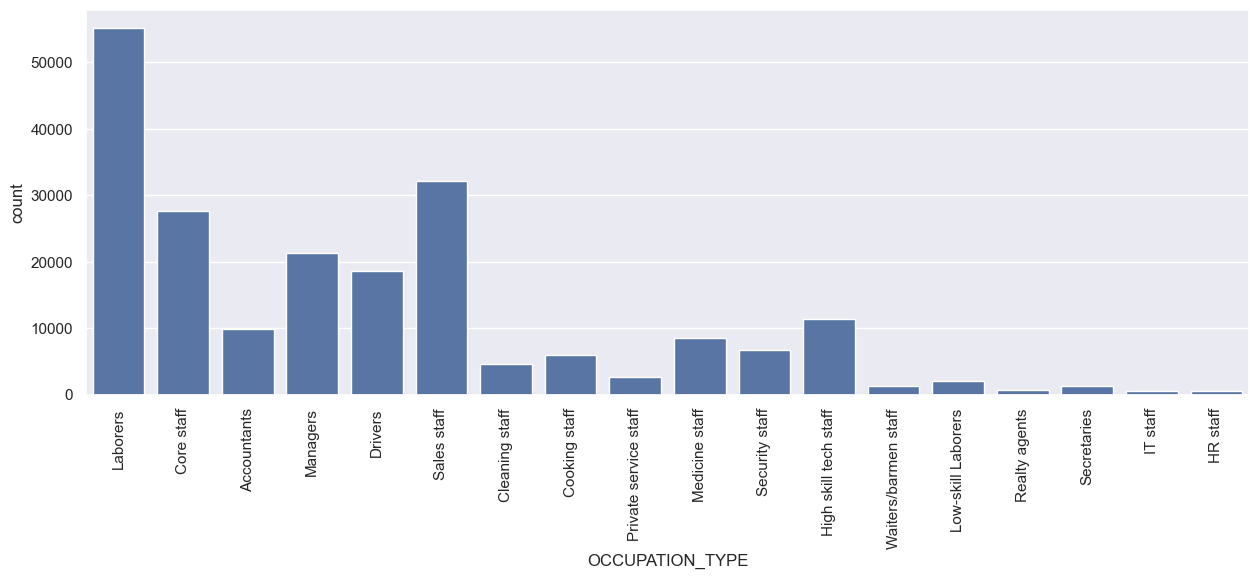

In [107]:
#application_train['OCCUPATION_TYPE'].count.plot.hist()
sns.countplot(x= 'OCCUPATION_TYPE', data = train)
plt.xticks(rotation=90)

### Column: EXT_SOURCE_3

In [108]:
# Display the first 10 rows of the 'EXT_SOURCE_3' column in the DataFrame 'train'
train['EXT_SOURCE_3'].head(10)

0    0.139376
1         NaN
2    0.729567
3         NaN
4         NaN
5    0.621226
6    0.492060
7    0.540654
8    0.751724
9         NaN
Name: EXT_SOURCE_3, dtype: float64

<Axes: ylabel='Frequency'>

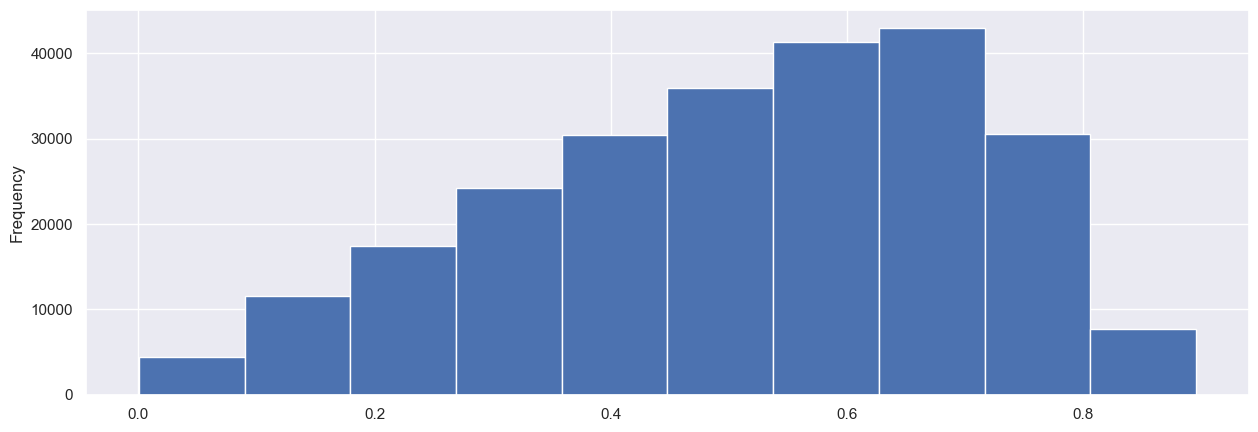

In [109]:
# Plotting the distribution
train['EXT_SOURCE_3'].plot.hist()

In [110]:
# Calculate the mean of the 'EXT_SOURCE_3' column in the DataFrame 'train'
train['EXT_SOURCE_3'].mean()

0.5108529061799658

In [111]:
# Calculate the mode (most frequent value) of the 'EXT_SOURCE_3' column in the DataFrame 'train'
train['EXT_SOURCE_3'].mode()

0    0.7463
Name: EXT_SOURCE_3, dtype: float64

This data is a skewed normal distribution

### Column: AMT_REQ_CREDIT_BUREAU_QRT

In [112]:
# Display the first few rows of the 'AMT_REQ_CREDIT_BUREAU_QRT' column in the DataFrame 'train'
train['AMT_REQ_CREDIT_BUREAU_QRT'].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

<Axes: ylabel='Frequency'>

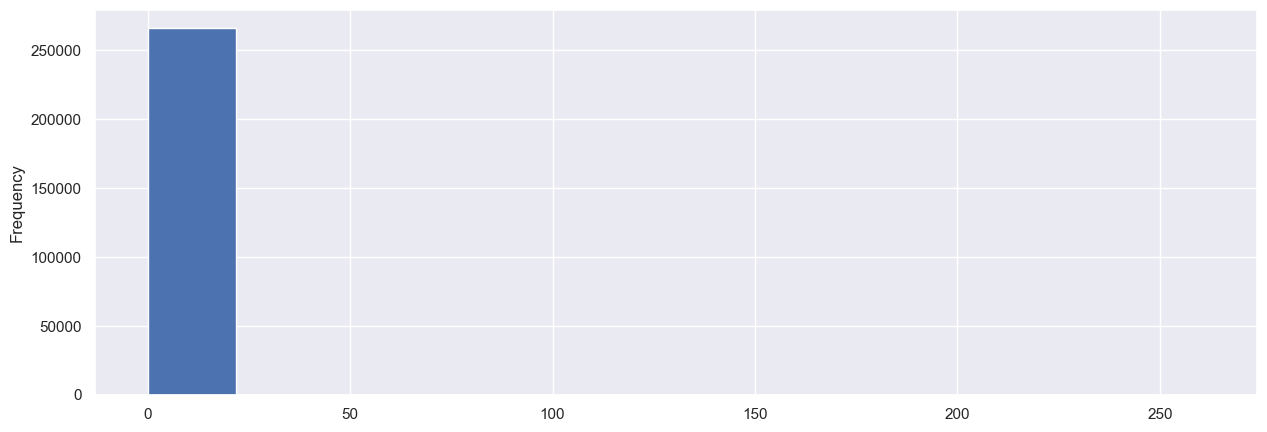

In [113]:
# Calculate the number of unique values in the 'AMT_REQ_CREDIT_BUREAU_QRT' column
num_unique_values = len(train.AMT_REQ_CREDIT_BUREAU_QRT.unique())

# Plot a histogram of the 'AMT_REQ_CREDIT_BUREAU_QRT' column with bins equal to the number of unique values
train['AMT_REQ_CREDIT_BUREAU_QRT'].plot.hist(bins=num_unique_values)

In [114]:
# Count the occurrences of each unique value in the 'AMT_REQ_CREDIT_BUREAU_QRT' column
train.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

AMT_REQ_CREDIT_BUREAU_QRT
0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: count, dtype: int64

In [115]:
# Calculate the mean (average) of the values in the 'AMT_REQ_CREDIT_BUREAU_QRT' column
train['AMT_REQ_CREDIT_BUREAU_QRT'].mean()

0.26547414959848414

In [116]:
# Calculate the mode (most frequent value) of the 'AMT_REQ_CREDIT_BUREAU_QRT' column
train['AMT_REQ_CREDIT_BUREAU_QRT'].mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

Since the column only takes discrete values, 1 or 0, so we cannot replace it by mean value. Here, we will replace it by mode.

### Column: AMT_REQ_CREDIT_BUREAU_YEAR

In [117]:
# Display the first 10 rows of the 'AMT_REQ_CREDIT_BUREAU_YEAR' column in the DataFrame 'train'
train['AMT_REQ_CREDIT_BUREAU_YEAR'].head(10)

0    1.0
1    0.0
2    0.0
3    NaN
4    0.0
5    1.0
6    2.0
7    0.0
8    1.0
9    NaN
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

<Axes: ylabel='Frequency'>

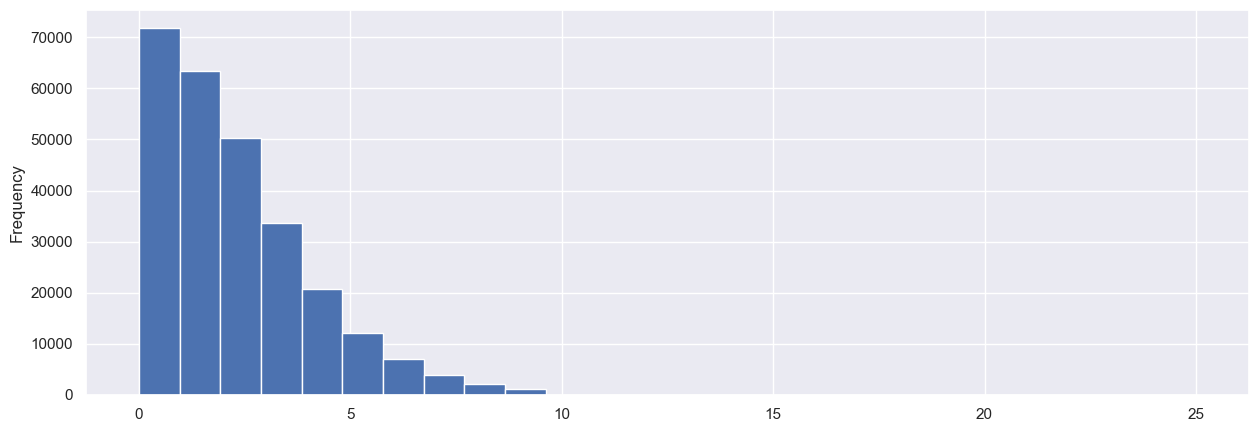

In [118]:
# Calculate the number of unique values in the 'AMT_REQ_CREDIT_BUREAU_YEAR' column
num_unique_values = len(train.AMT_REQ_CREDIT_BUREAU_YEAR.unique())

# Plot a histogram of the 'AMT_REQ_CREDIT_BUREAU_YEAR' column with bins equal to the number of unique values
train['AMT_REQ_CREDIT_BUREAU_YEAR'].plot.hist(bins=num_unique_values)

As you can see that the values are only integers, either 0,1,2 or something else. If we will replace, we will replace by mode value and not mean value because mean value will give an decimal value.

In [119]:
# Calculate the mean (average) of the values in the 'AMT_REQ_CREDIT_BUREAU_YEAR' column
train['AMT_REQ_CREDIT_BUREAU_YEAR'].mean()

1.899974435321363

In [120]:
# Calculate the mode (most frequent value) of the 'AMT_REQ_CREDIT_BUREAU_YEAR' column
train['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

### Column: AMT_REQ_CREDIT_BUREAU_WEEK

In [121]:
# Display the first 10 rows of the 'AMT_REQ_CREDIT_BUREAU_WEEK' column in the DataFrame 'train'
train['AMT_REQ_CREDIT_BUREAU_WEEK'].head(10)

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    NaN
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

<Axes: ylabel='Frequency'>

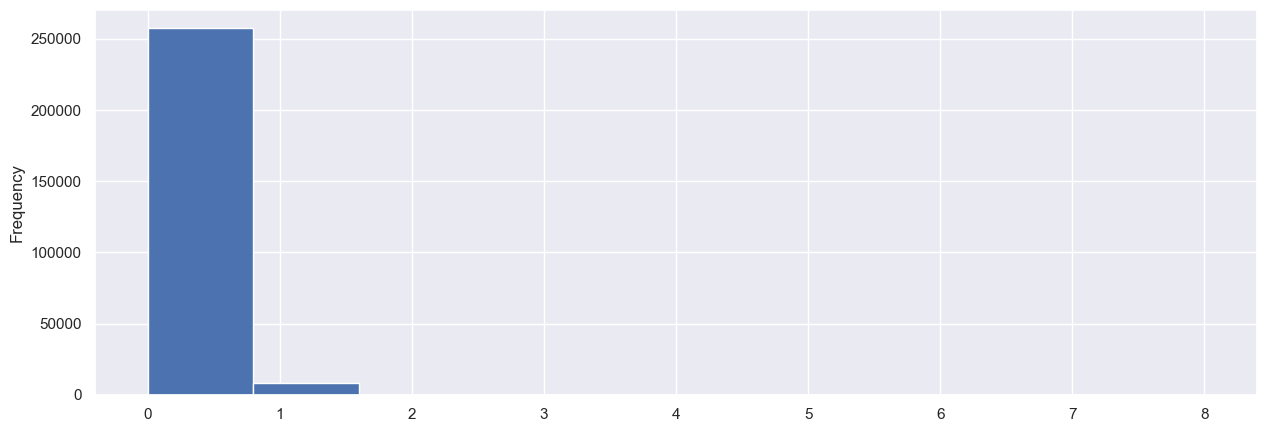

In [122]:
# Calculate the number of unique values in the 'AMT_REQ_CREDIT_BUREAU_WEEK' column
num_unique_values = len(train.AMT_REQ_CREDIT_BUREAU_WEEK.unique())

# Plot a histogram of the 'AMT_REQ_CREDIT_BUREAU_WEEK' column with bins equal to the number of unique values
train['AMT_REQ_CREDIT_BUREAU_WEEK'].plot.hist(bins=num_unique_values)

As you can see, mostly the values are 0's. So, this column is mostly acting as a constant and has no variation. So, we can ignore this column for analysis.

### Column: AMT_REQ_CREDIT_BUREAU_MON

In [123]:
# Display the first 10 rows of the 'AMT_REQ_CREDIT_BUREAU_MON' column in the DataFrame 'train'
train['AMT_REQ_CREDIT_BUREAU_MON'].head(10)

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
5    0.0
6    1.0
7    0.0
8    0.0
9    NaN
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

<Axes: ylabel='Frequency'>

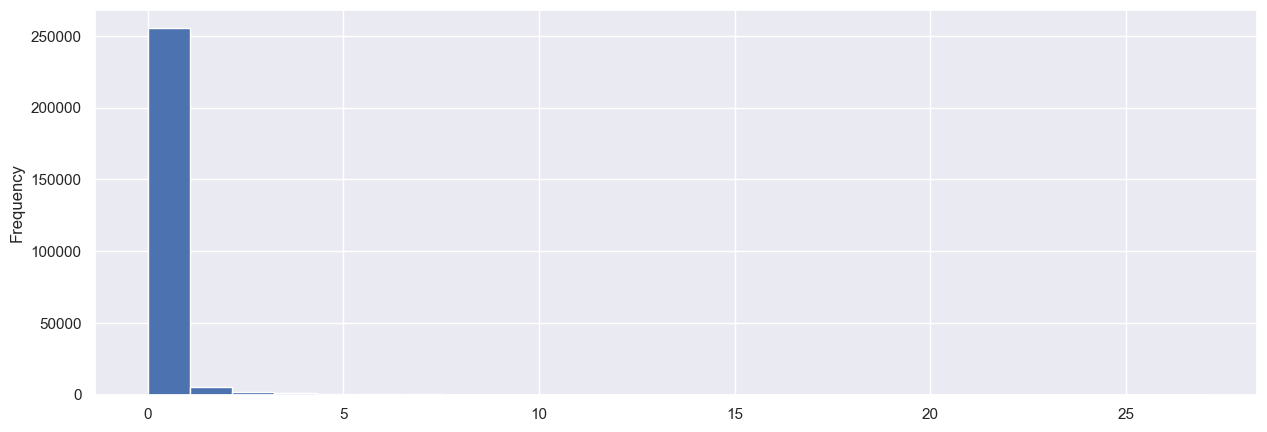

In [124]:
# Calculate the number of unique values in the 'AMT_REQ_CREDIT_BUREAU_MON' column
num_unique_values = len(train.AMT_REQ_CREDIT_BUREAU_MON.unique())

# Plot a histogram of the 'AMT_REQ_CREDIT_BUREAU_MON' column with bins equal to the number of unique values
train['AMT_REQ_CREDIT_BUREAU_MON'].plot.hist(bins=num_unique_values)


Again the same observation that mostly the values are 0's. So, this column is mostly acting as a constant and has no variation. So, we can ignore this column.

### Column: AMT_REQ_CREDIT_BUREAU_DAY

In [125]:
# Display the first 10 rows of the 'AMT_REQ_CREDIT_BUREAU_DAY' column in the DataFrame 'train'
train['AMT_REQ_CREDIT_BUREAU_DAY'].head(10)

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    NaN
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

<Axes: ylabel='Frequency'>

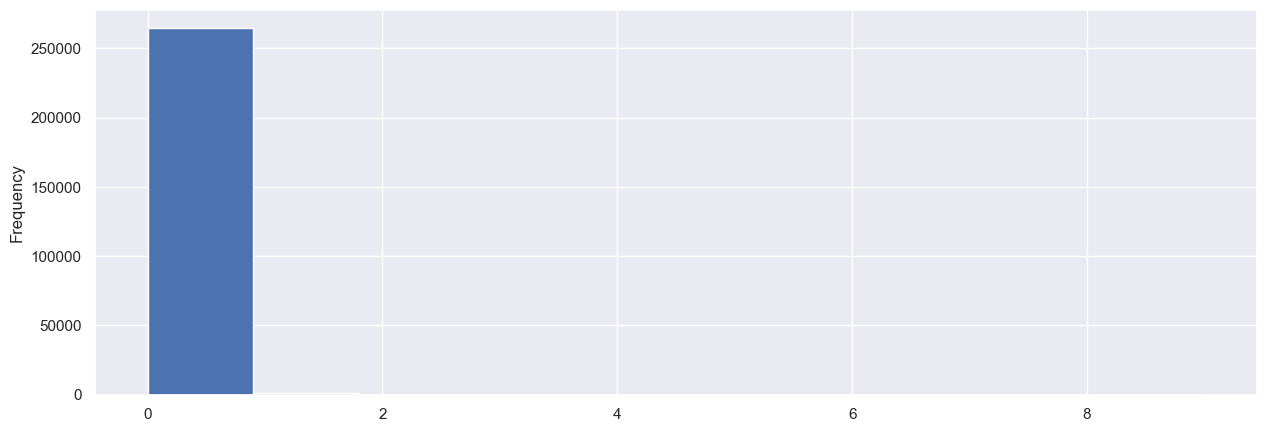

In [126]:
# Calculate the number of unique values in the 'AMT_REQ_CREDIT_BUREAU_DAY' column
num_unique_values = len(train.AMT_REQ_CREDIT_BUREAU_DAY.unique())

# Plot a histogram of the 'AMT_REQ_CREDIT_BUREAU_DAY' column with bins equal to the number of unique values
train['AMT_REQ_CREDIT_BUREAU_DAY'].plot.hist(bins=num_unique_values)

In [127]:
# Count the occurrences of each unique value in the 'AMT_REQ_CREDIT_BUREAU_DAY' column
train.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()

AMT_REQ_CREDIT_BUREAU_DAY
0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: count, dtype: int64

As you can see, all the values are 0's. So, we can ignore this column.

### Column: AMT_REQ_CREDIT_BUREAU_HOUR

In [128]:
# Display the first 10 rows of the 'AMT_REQ_CREDIT_BUREAU_HOUR' column in the DataFrame 'train'
train['AMT_REQ_CREDIT_BUREAU_HOUR'].head(10)

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    NaN
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

<Axes: ylabel='Frequency'>

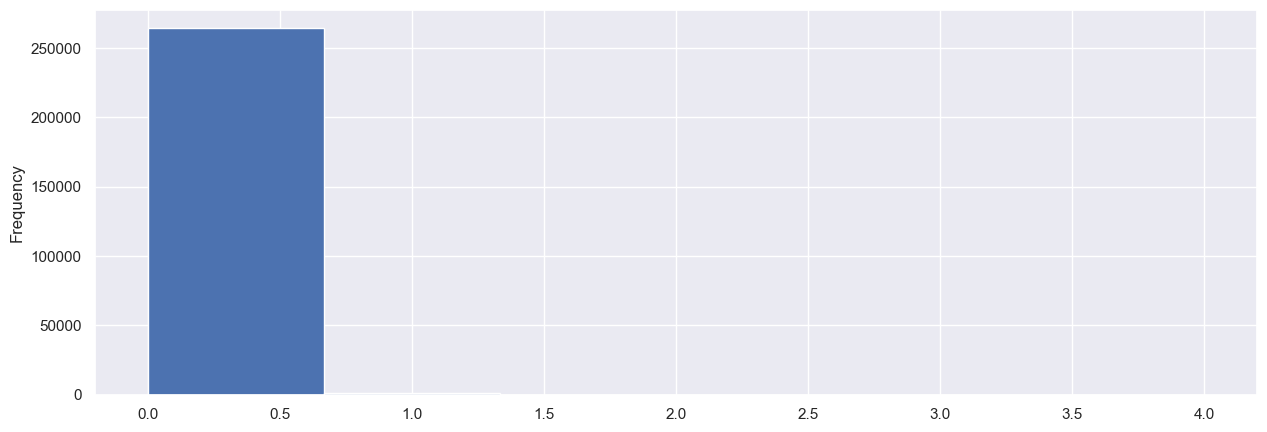

In [129]:
# Calculate the number of unique values in the 'AMT_REQ_CREDIT_BUREAU_HOUR' column
num_unique_values = len(train.AMT_REQ_CREDIT_BUREAU_HOUR.unique())

# Plot a histogram of the 'AMT_REQ_CREDIT_BUREAU_HOUR' column with bins equal to the number of unique values
train['AMT_REQ_CREDIT_BUREAU_HOUR'].plot.hist(bins=num_unique_values)

In [130]:
# Count the occurrences of each unique value in the 'AMT_REQ_CREDIT_BUREAU_HOUR' column
train.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: count, dtype: int64

Again, we can ignore this column.

In [131]:
# Get the names of all columns in the DataFrame 'train'
train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG',

### Column: DAYS_BIRTH

This column represents the client's age in days relative to the application date, displayed as negative values. For clarity and ease of understanding, we are converting these values into years. We use the -round() function to transform the negative values into positive ones. We plan to apply the same transformation method to other date-related data.

In [132]:
# Display the first few rows of the 'DAYS_BIRTH' column in the DataFrame 'train'
train['DAYS_BIRTH'].head()


0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
Name: DAYS_BIRTH, dtype: int64

In [133]:
# Convert the values in the 'DAYS_BIRTH' column from days to years and display the first few rows
train['DAYS_BIRTH'] = -round(train['DAYS_BIRTH'] / 365, 0)
train['DAYS_BIRTH'].head()

0    26.0
1    46.0
2    52.0
3    52.0
4    55.0
Name: DAYS_BIRTH, dtype: float64

In [134]:
# Convert the values in the 'DAYS_REGISTRATION' column from days to years and display the first few rows
train['DAYS_REGISTRATION'] = -round(train['DAYS_REGISTRATION'] / 365, 0)
train['DAYS_REGISTRATION'].head()

0    10.0
1     3.0
2    12.0
3    27.0
4    12.0
Name: DAYS_REGISTRATION, dtype: float64

In [135]:
# Convert the values in the 'DAYS_ID_PUBLISH' column from days to years and display the first few rows
train['DAYS_ID_PUBLISH'] = -round(train['DAYS_ID_PUBLISH'] / 365, 0)
train['DAYS_ID_PUBLISH'].head()

0    6.0
1    1.0
2    7.0
3    7.0
4    9.0
Name: DAYS_ID_PUBLISH, dtype: float64

In [136]:
# Get the data types of each column in the DataFrame 'train'
train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 81, dtype: object

### Target

### Total users

In [137]:
# Count the number of non-null values in the 'TARGET' column of the DataFrame 'train'
train['TARGET'].count()

307511

### Client with payment difficulties

In [138]:
# Count the number of records where the value in the 'TARGET' column is equal to 1
(train['TARGET'] == 1).sum()

24825

### Other clients

In [139]:
# Count the number of records where the value in the 'TARGET' column is equal to 0
(train['TARGET'] == 0).sum()

282686

### Ratio


In [140]:
# Calculate the ratio of records with 'TARGET' value equal to 0 to records with 'TARGET' value equal to 1
(train['TARGET'] == 0).sum() / (train['TARGET'] == 1).sum()

11.387150050352467

### Data Imbalance Analysis

Imbalance Ratio (1:0): 0.09


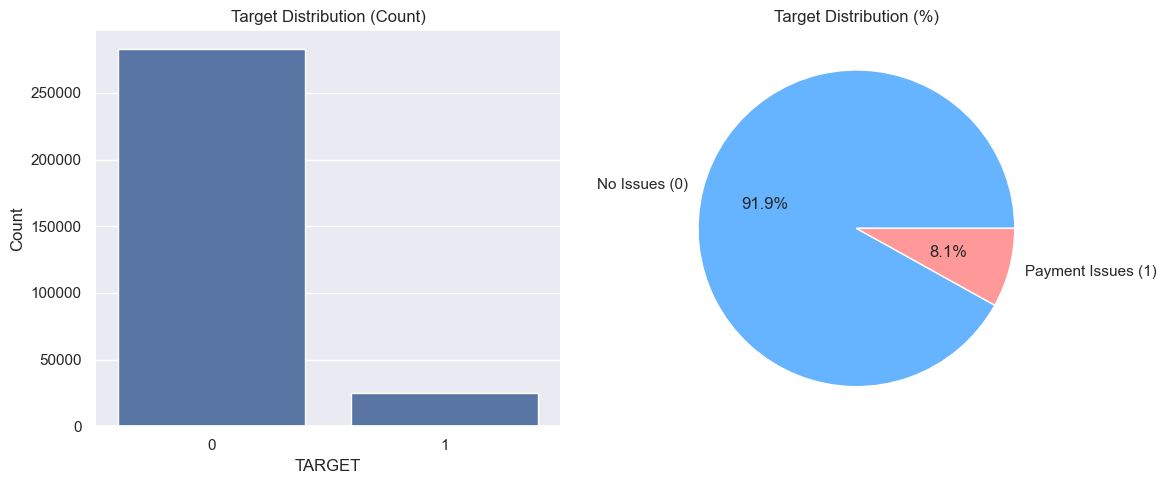

In [141]:
# Target distribution
target_counts = application_train['TARGET'].value_counts()
print(f"Imbalance Ratio (1:0): {target_counts[1]/target_counts[0]:.2f}")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot
sns.barplot(x=target_counts.index, y=target_counts.values, ax=ax1)
ax1.set_title('Target Distribution (Count)')
ax1.set_ylabel('Count')

# Pie chart (use ax2.pie() instead of plt.pie())
ax2.pie(
    target_counts, 
    labels=['No Issues (0)', 'Payment Issues (1)'], 
    autopct='%1.1f%%', 
    colors=['#66b3ff','#ff9999']
)
ax2.set_title('Target Distribution (%)')

plt.tight_layout()
plt.show()

# Analysing Categorical and Numerical data.


### Analysing Categorial Data

In [142]:
# Create a subset of the DataFrame 'train' containing records where the 'TARGET' column is equal to 0
train_0 = train.loc[train['TARGET'] == 0]

# Create a subset of the DataFrame 'train' containing records where the 'TARGET' column is equal to 1
train_1 = train.loc[train['TARGET'] == 1]

####  We utilized three distinct plots for analysis:

**Pie plot**:
- This displays all the values present in a column as percentages, where the sum of these percentages equals 100.

**Countplot**:
- Here, we depicted the count of different categories. Consequently, Target=0 will typically have a higher count than Target=1.

**Barplot**:
- To create this plot, we initially divided the dataset into two subsets based on the target variable: Target=0 and Target=1. Next, we further subdivided each subset into different categories. We then plotted these categories as percentages. Notably, you'll observe that the values for Target=0 and Target=1 are mostly equal. For a deeper understanding, please refer to the code of this plot.

In [143]:
def plotting(train, train0, train1, column):
    """
    Plots three types of visualizations for a given column in the dataset:
    a pie chart of overall distribution, a countplot by category, and a bar plot of percentage distribution by target variable.

    Parameters:
    - train: DataFrame containing the entire dataset.
    - train0: DataFrame filtered by the target variable with value 0.
    - train1: DataFrame filtered by the target variable with value 1.
    - column: The name of the column to be visualized.
    """

    # Assigning dataframes to local variables (This step might be redundant as we can directly use the function arguments)
    train = train
    train_0 = train0
    train_1 = train1
    col = column

    # Initialize figure with a specific size
    fig = plt.figure(figsize=(13,10))

    # Create a subplot for the pie chart
    ax1 = plt.subplot(221)
    # Plotting pie chart for overall distribution of the column
    train[col].value_counts().plot.pie(autopct="%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: ' + column)

    # Create a subplot for the countplot
    ax2 = plt.subplot(222)
    # Plotting count plot by category with hue as TARGET
    sns.countplot(x=column, hue='TARGET', data=train, ax=ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')

    # Create a subplot for the bar plot
    ax3 = plt.subplot(223)
    # Preparing data for percentage distribution by target variable
    df = pd.DataFrame()
    df['0'] = ((train_0[col].value_counts())/len(train_0))
    df['1'] = ((train_1[col].value_counts())/len(train_1))
    # Plotting bar plot for percentage distribution
    df.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')

    # Adjust layout to prevent overlap
    fig.tight_layout()

    # Display the plots
    plt.show()

In [144]:
# Create a list to get all the Categorical columns
train_categorical = train.select_dtypes(include=['object']).columns

In [145]:
train_categorical

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')

# Univariate Analysis of the Categorical data

### Visualizing Data Distribution
Take, for instance, the column "NAME_CONTRACT_TYPE". The visualizations produced offer insightful data distributions:

#### Pie Chart (First Plot):
- It reveals that 90% of the entries are 'Cash loans', while the remaining 10% are 'Revolving loans'. This chart provides a straightforward view of the overall category proportions within the column.

#### Count Plot (Second Plot):
- This visualization differentiates between 'Cash loans' and 'Revolving loans' based on the TARGET variable. For TARGET=0 (no default), there are approximately 250,000 'Cash loans' and around 2,500 'Revolving loans'. The plot offers a similar breakdown for TARGET=1 (default), enabling a comparison of counts between the two TARGET categories.

#### Percentage Bar Plot (Third Plot):
- In this plot, the data is presented in terms of percentage, focusing on the relative distribution within each TARGET category. The 'Cash loans' and 'Revolving loans' are stacked (in blue for TARGET=0 and orange for TARGET=1), with the sum of the percentages for each loan type within a TARGET category equating to 100%. This plot emphasizes the proportionate representation of each loan type within the groups defined by the TARGET variable.

Plotting  NAME_CONTRACT_TYPE


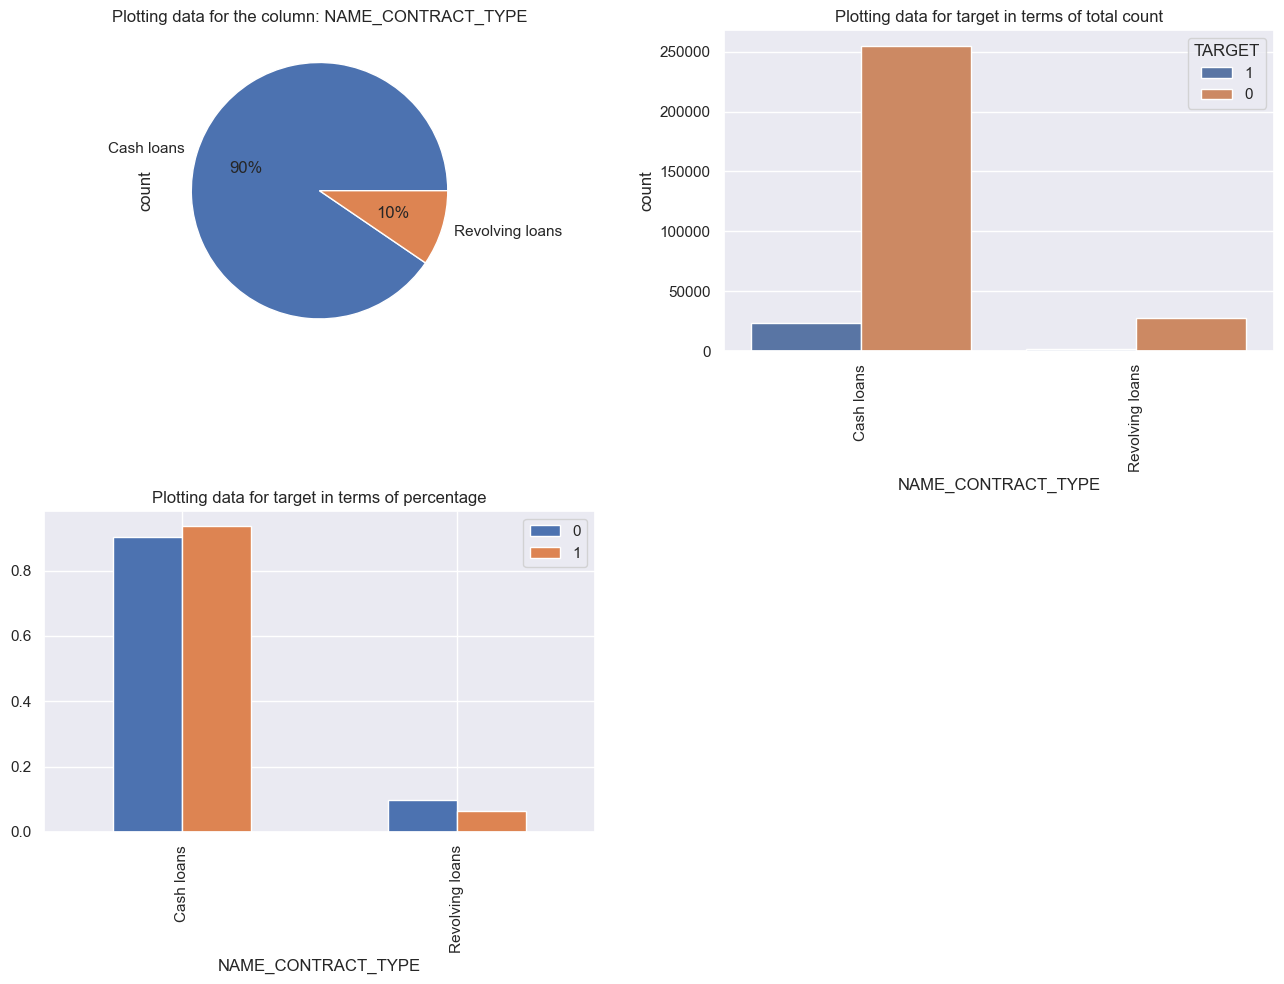

----------------------------------------------------------------------------------------------
Plotting  CODE_GENDER


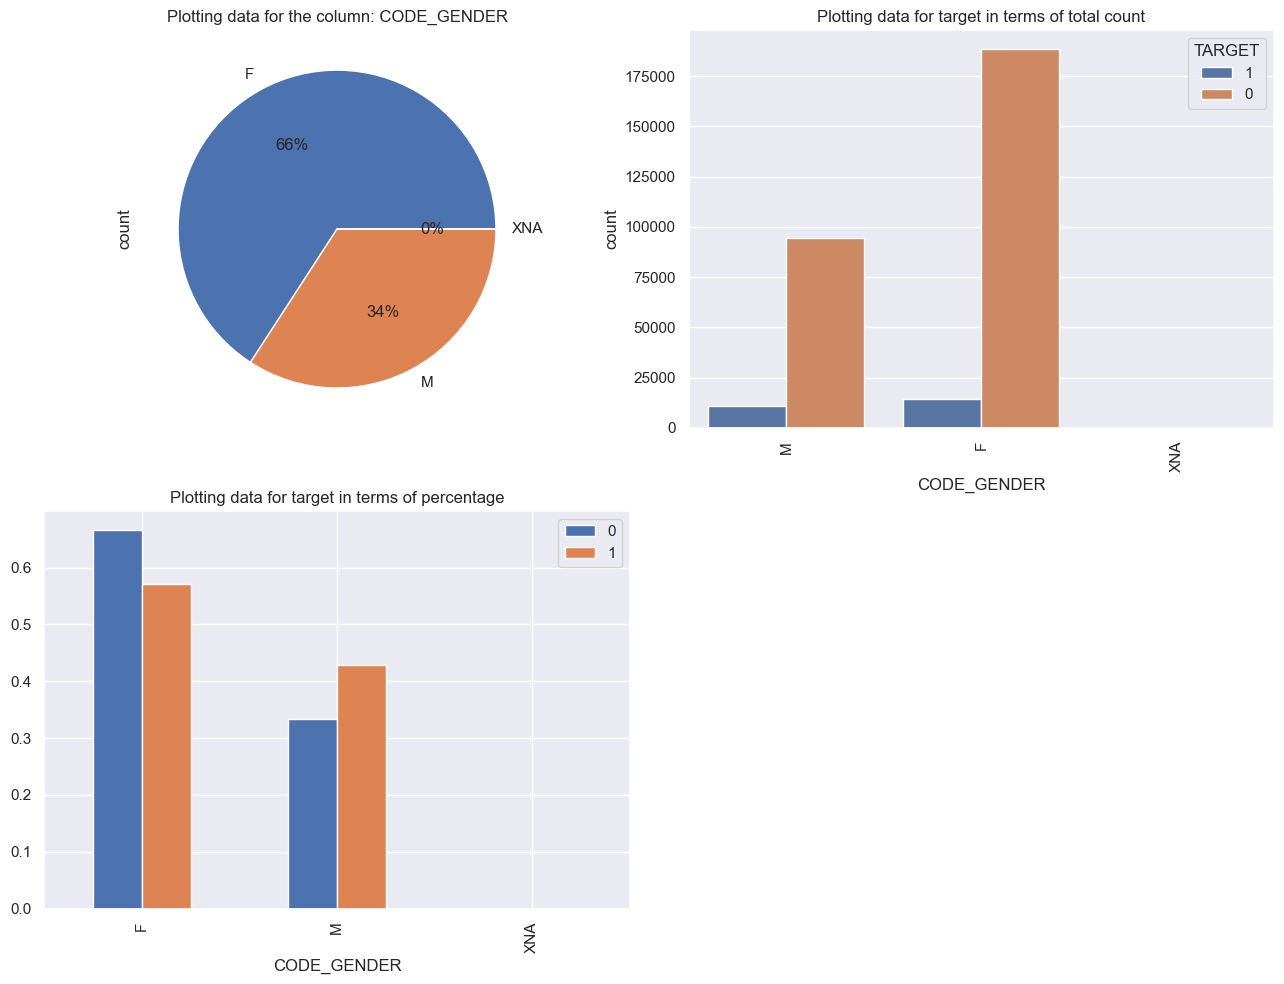

----------------------------------------------------------------------------------------------
Plotting  FLAG_OWN_CAR


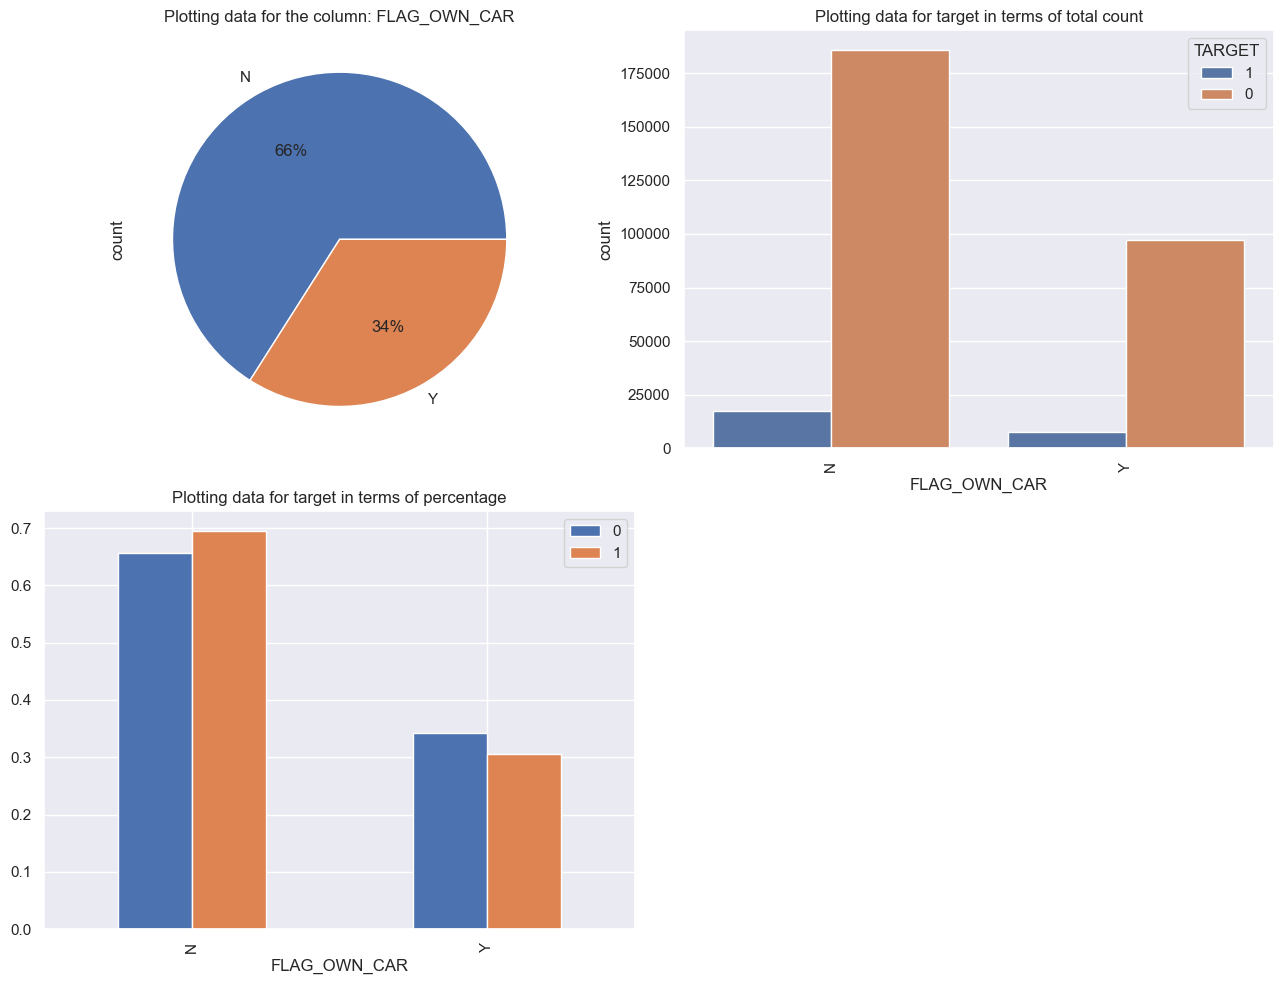

----------------------------------------------------------------------------------------------
Plotting  FLAG_OWN_REALTY


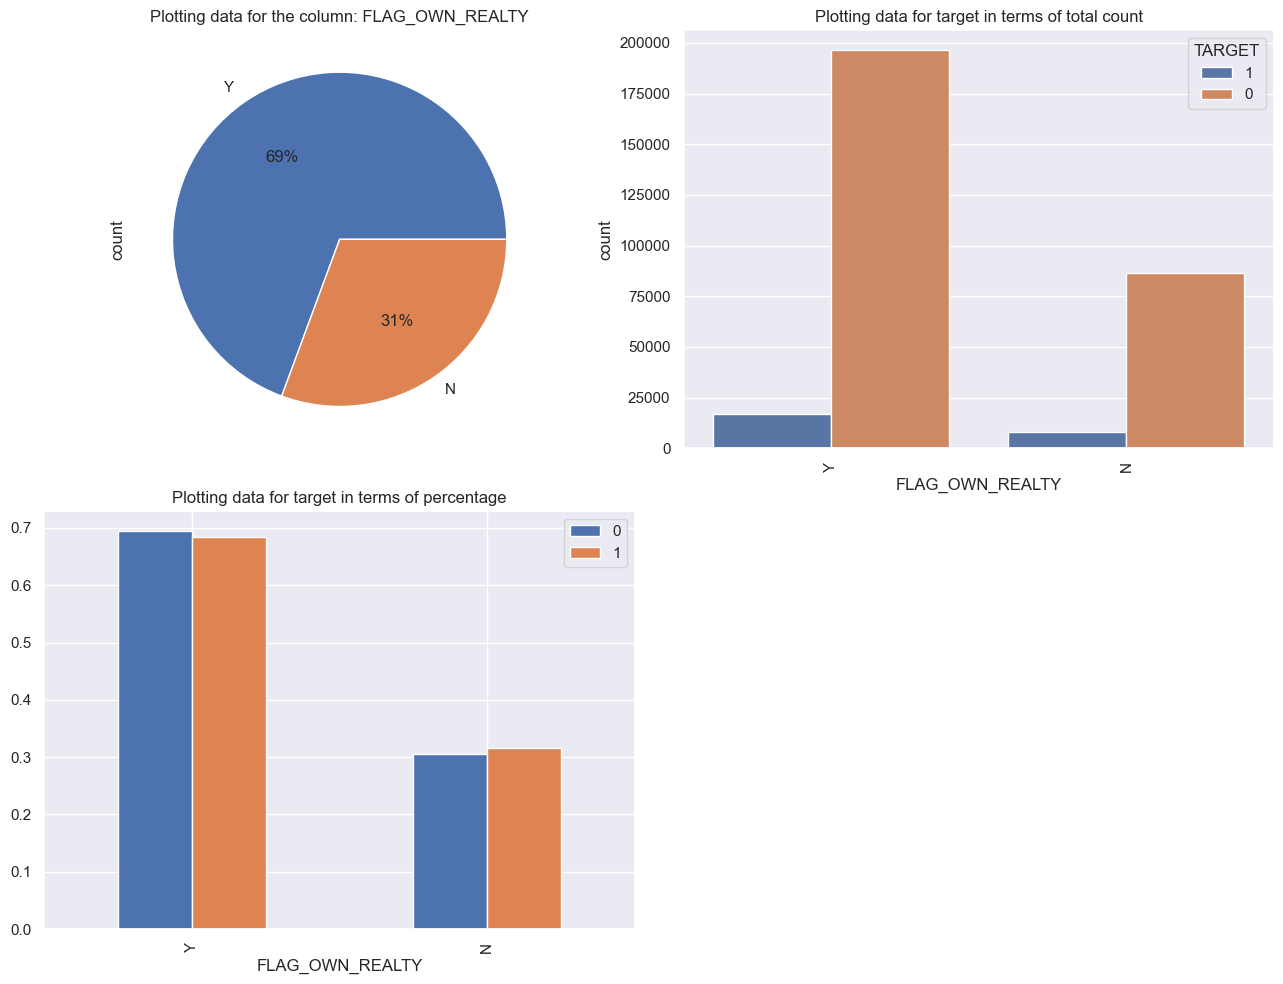

----------------------------------------------------------------------------------------------
Plotting  NAME_TYPE_SUITE


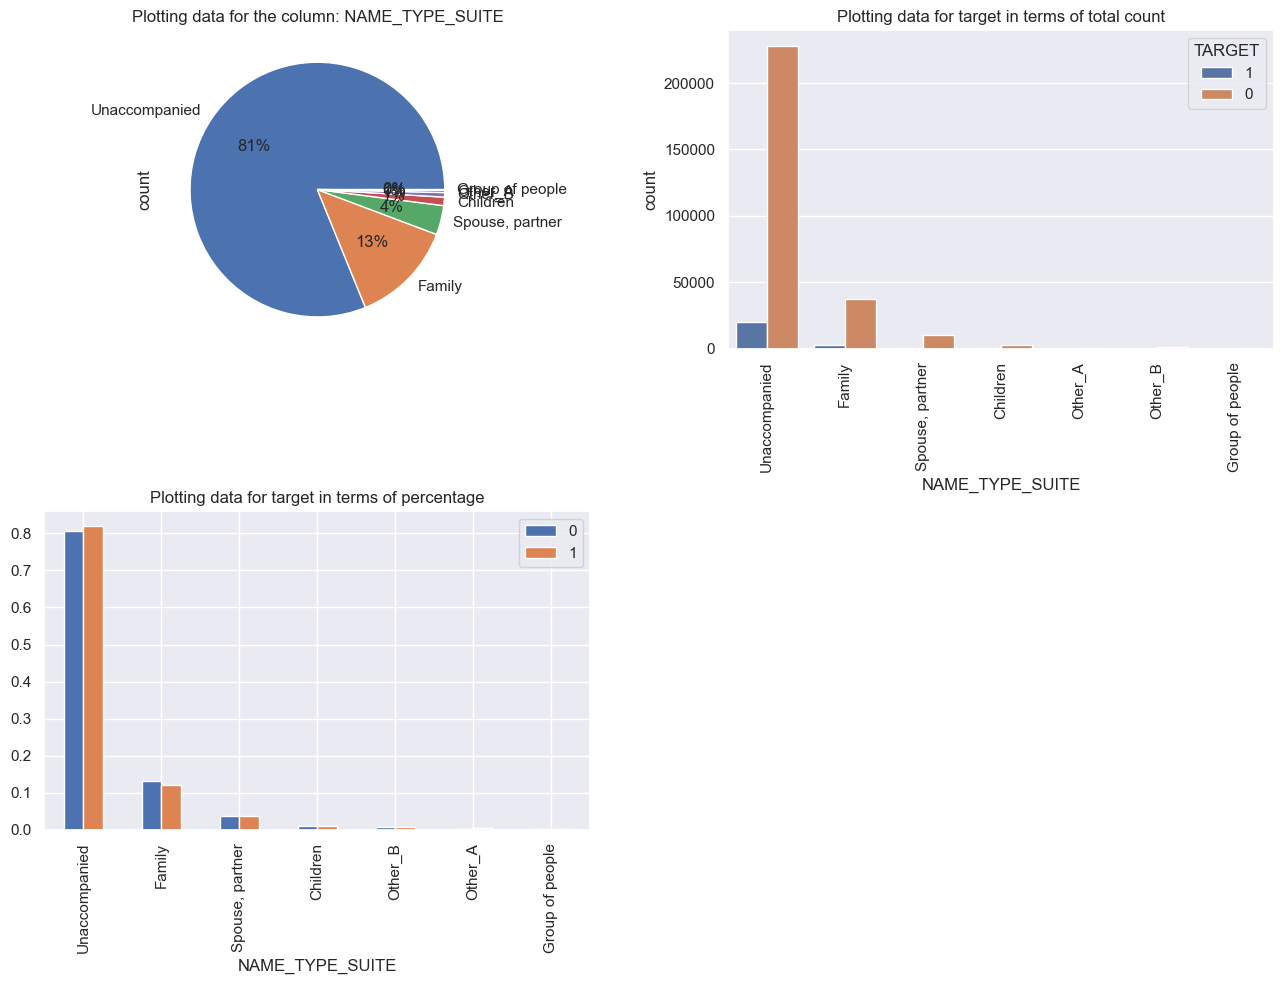

----------------------------------------------------------------------------------------------
Plotting  NAME_INCOME_TYPE


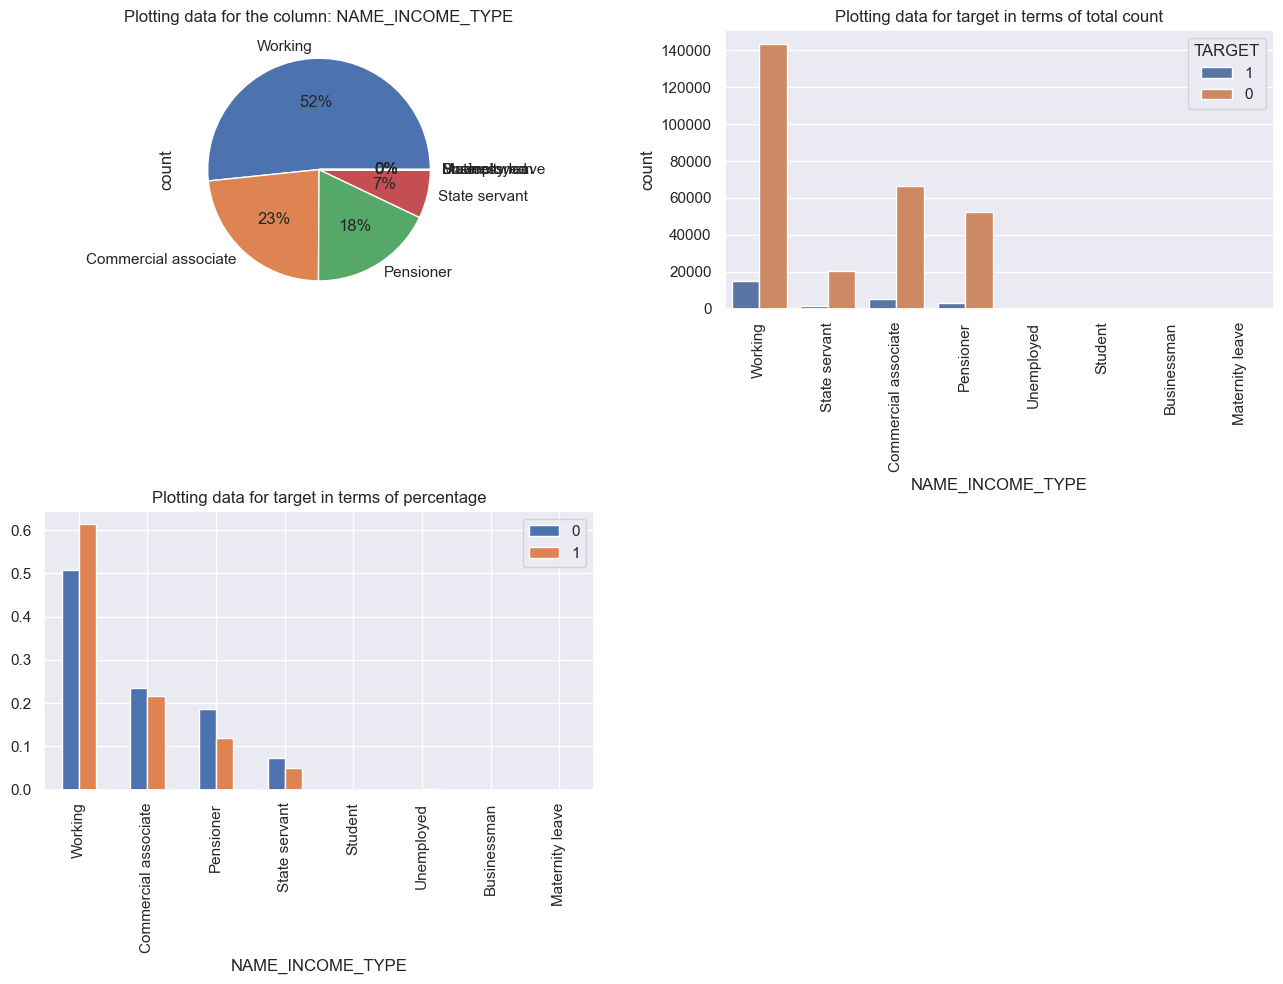

----------------------------------------------------------------------------------------------
Plotting  NAME_EDUCATION_TYPE


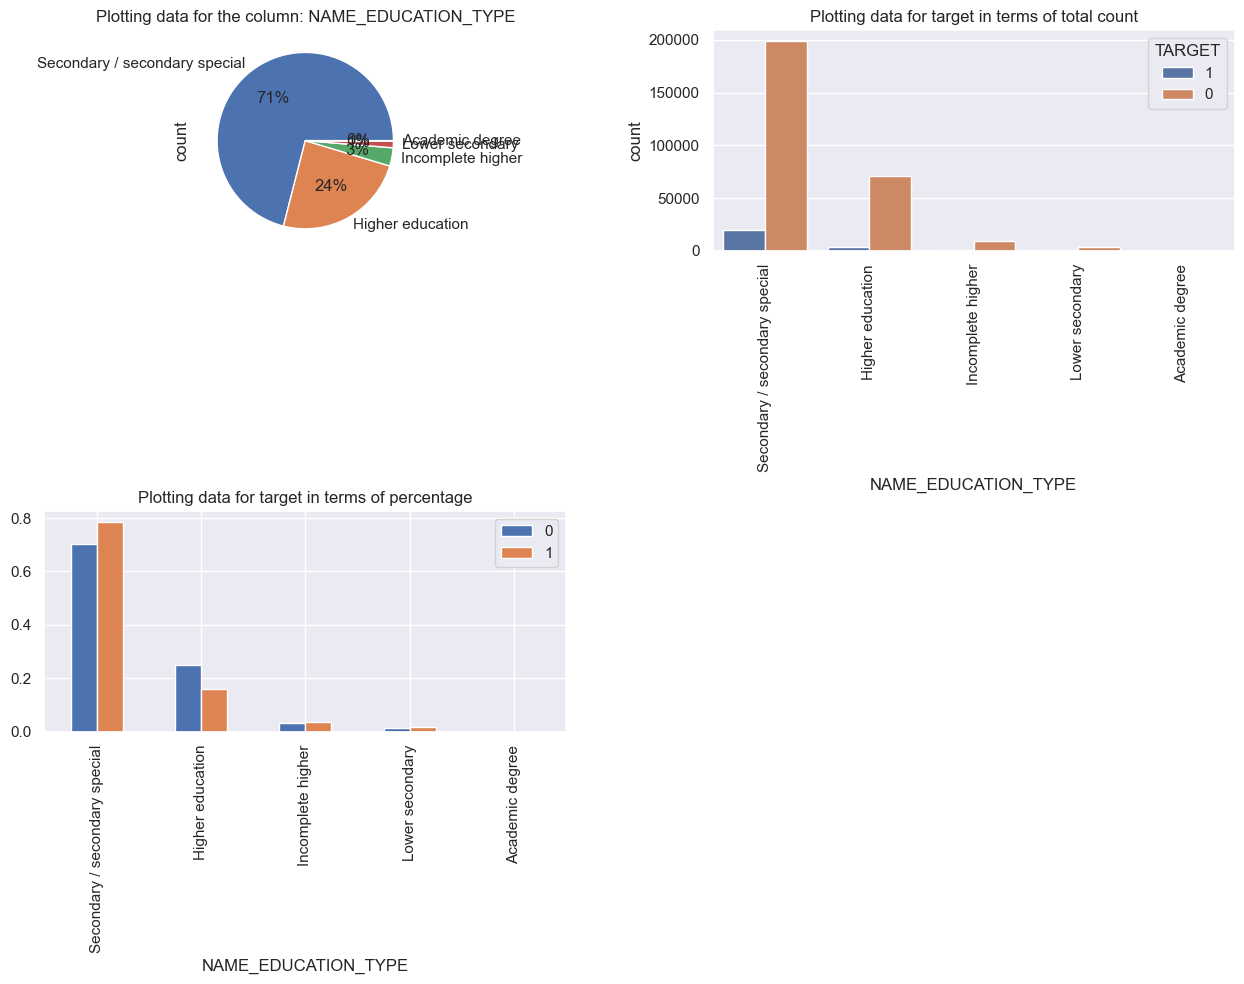

----------------------------------------------------------------------------------------------
Plotting  NAME_FAMILY_STATUS


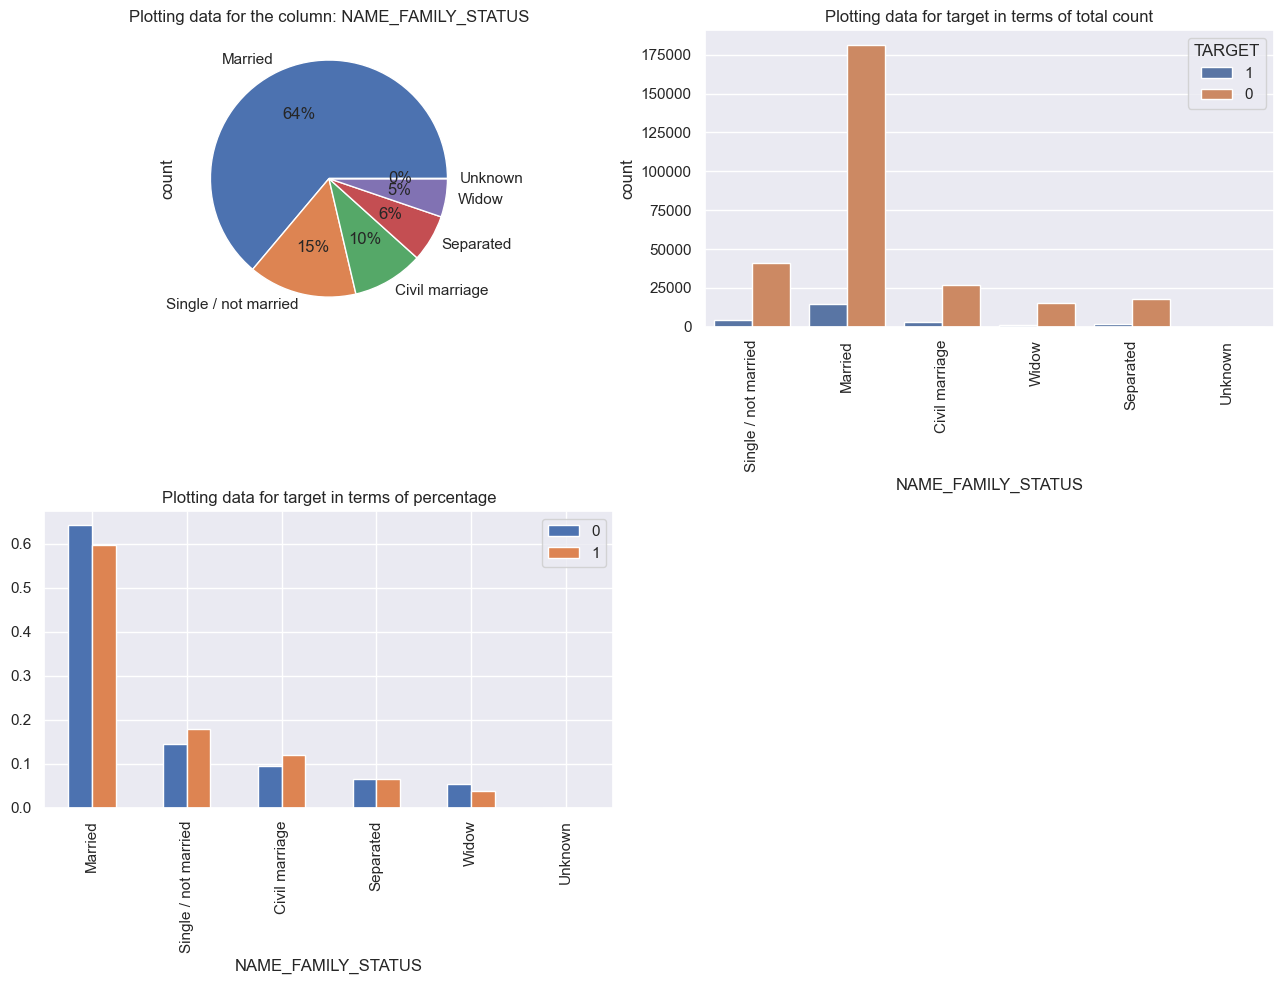

----------------------------------------------------------------------------------------------
Plotting  NAME_HOUSING_TYPE


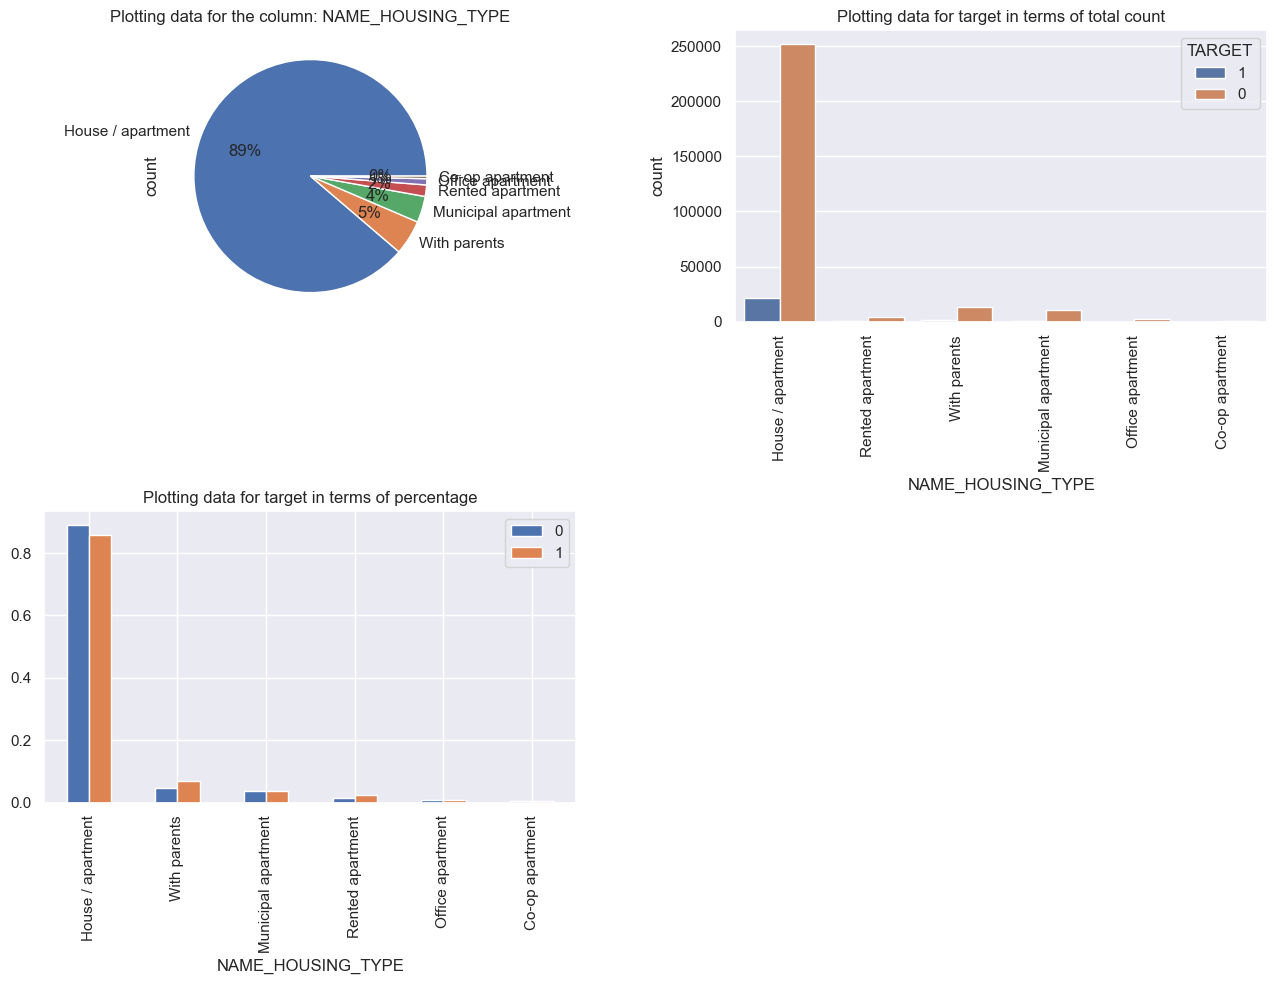

----------------------------------------------------------------------------------------------
Plotting  OCCUPATION_TYPE


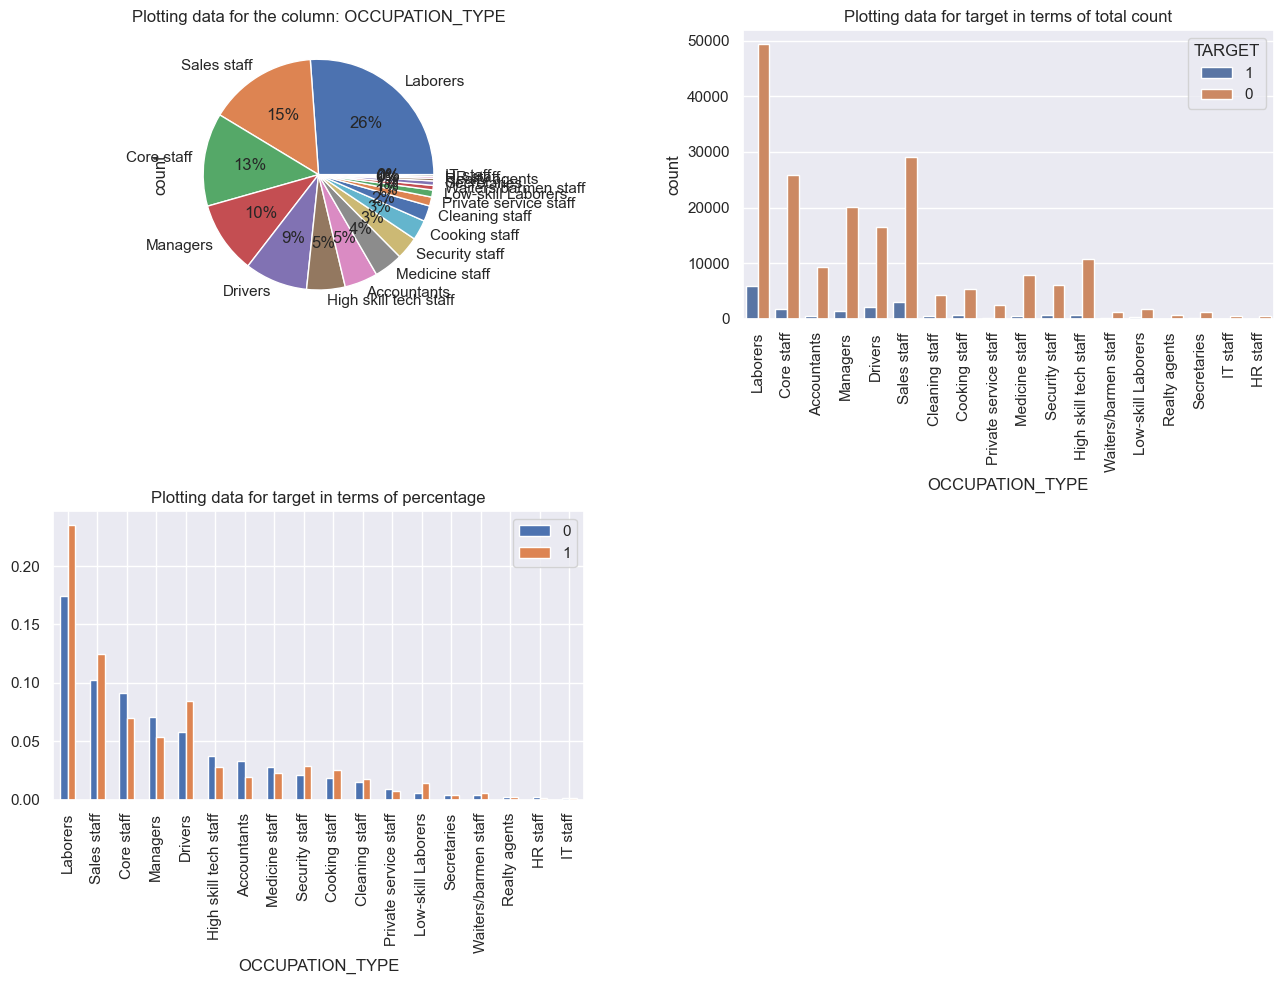

----------------------------------------------------------------------------------------------
Plotting  WEEKDAY_APPR_PROCESS_START


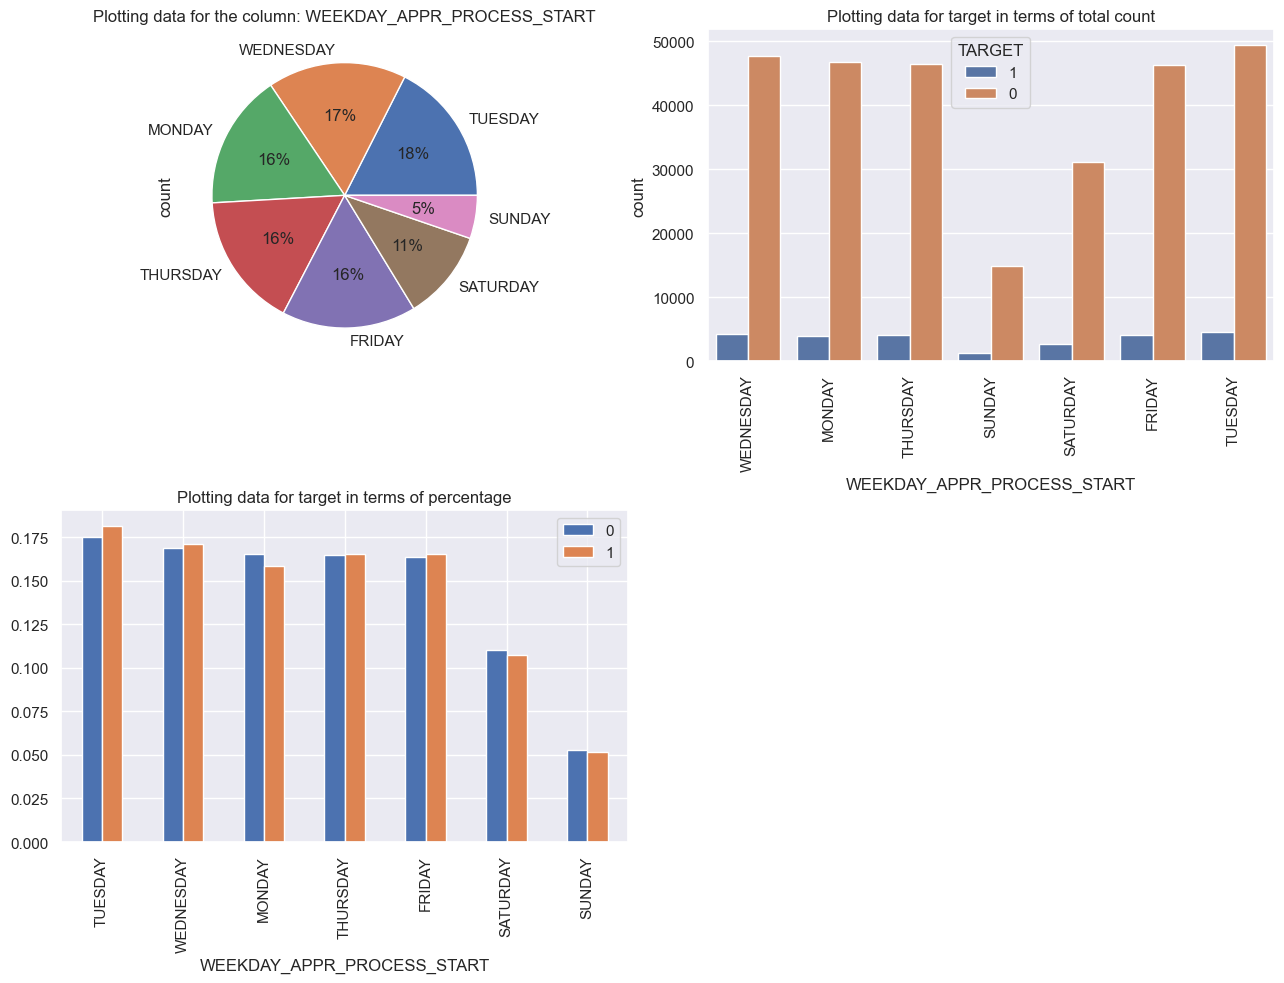

----------------------------------------------------------------------------------------------
Plotting  ORGANIZATION_TYPE


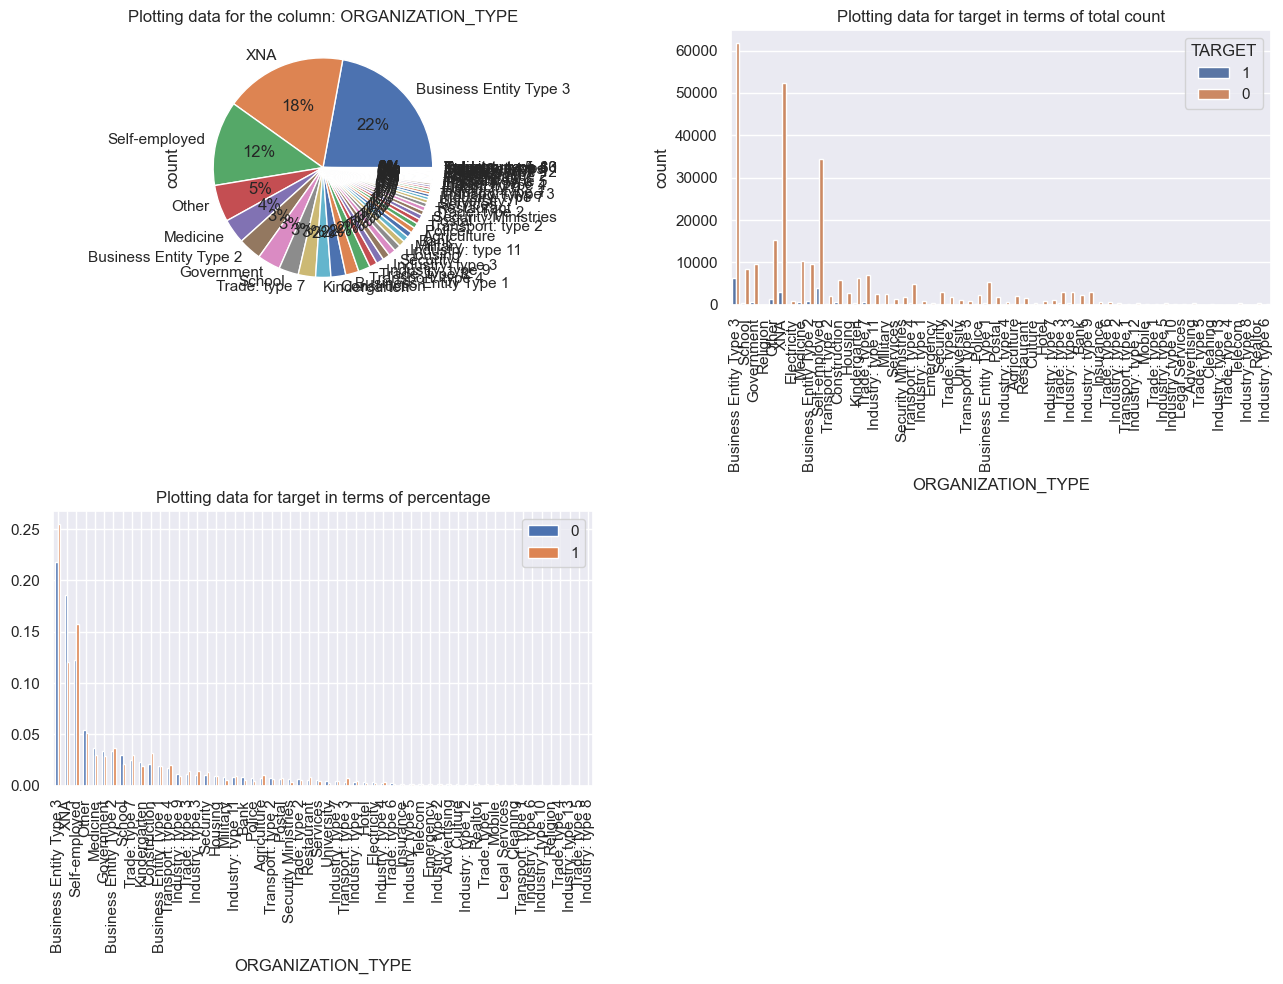

----------------------------------------------------------------------------------------------
Plotting  EMERGENCYSTATE_MODE


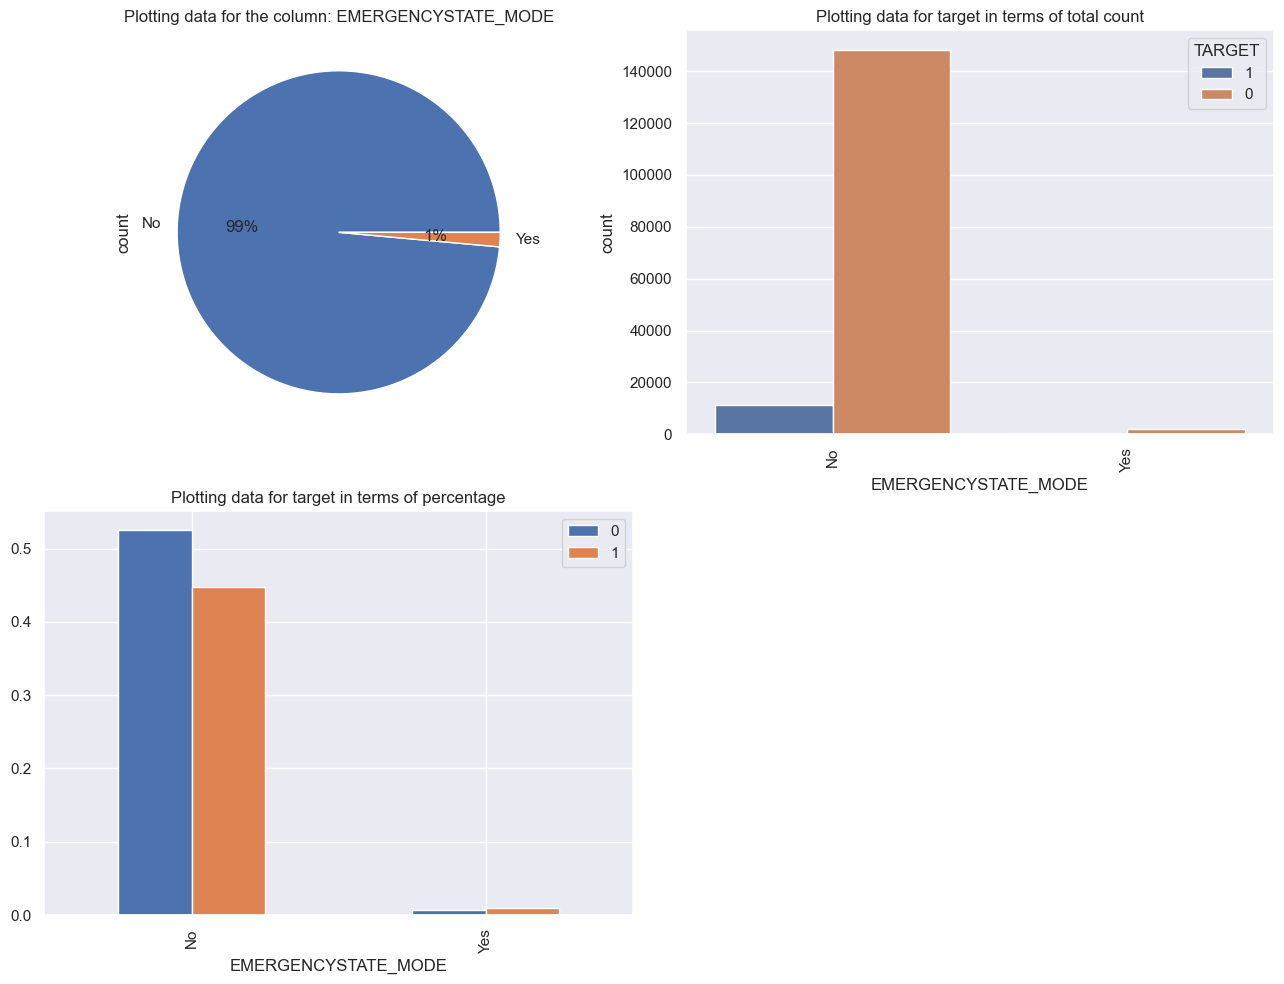

----------------------------------------------------------------------------------------------


In [146]:
# Convert 'TARGET' to a string data type for categorical processing.
train['TARGET'] = train['TARGET'].astype(str)

# Change 'NAME_CONTRACT_TYPE' to a categorical type for optimized storage and plotting.
train['NAME_CONTRACT_TYPE'] = train['NAME_CONTRACT_TYPE'].astype('category')

# Iterate through a list of categorical column names, creating plots for each.
for column in train_categorical:
    # Indicates the column currently being plotted.
    print("Plotting ", column)

    # Generate visualizations for the current column against the TARGET variable.
    plotting(train, train_0, train_1, column)

    # Prints a separator line for readability between plots of different columns.
    print('----------------------------------------------------------------------------------------------')


#### The analysis identifies several key variables that significantly influence loan behavior and default rates:

##### CODE_GENDER:
- Although loans are less frequently taken by males, the data indicates that the proportion of male defaulters is notably higher compared to females. This suggests gender as a potential factor in assessing loan risk.

##### NAME_INCOME_TYPE:
- Pensioners show a lower default rate, implying that despite a potentially fixed or lower income, they maintain a higher reliability in repaying loans.

##### NAME_EDUCATION_TYPE:
- Loans are predominantly sought for secondary education, followed by higher education. However, the default rate among borrowers with secondary education is substantially higher than those with higher education credentials. This points to education level as a significant determinant of loan repayment capacity.

##### NAME_FAMILY_STATUS:
- Married individuals are the most common applicants for loans and tend to have lower default rates. In contrast, singles and those in civil marriages exhibit higher default rates, highlighting the influence of marital status on loan repayment behavior.

##### OCCUPATION_TYPE:
- Laborers and various staff categories are the most frequent loan applicants, yet managers and high-skilled tech staff prove to be the most reliable in terms of repayment. This underscores the role of occupation type in predicting loan default risk.

# Analyzing Numerical columns

### Non-defaulter correlation

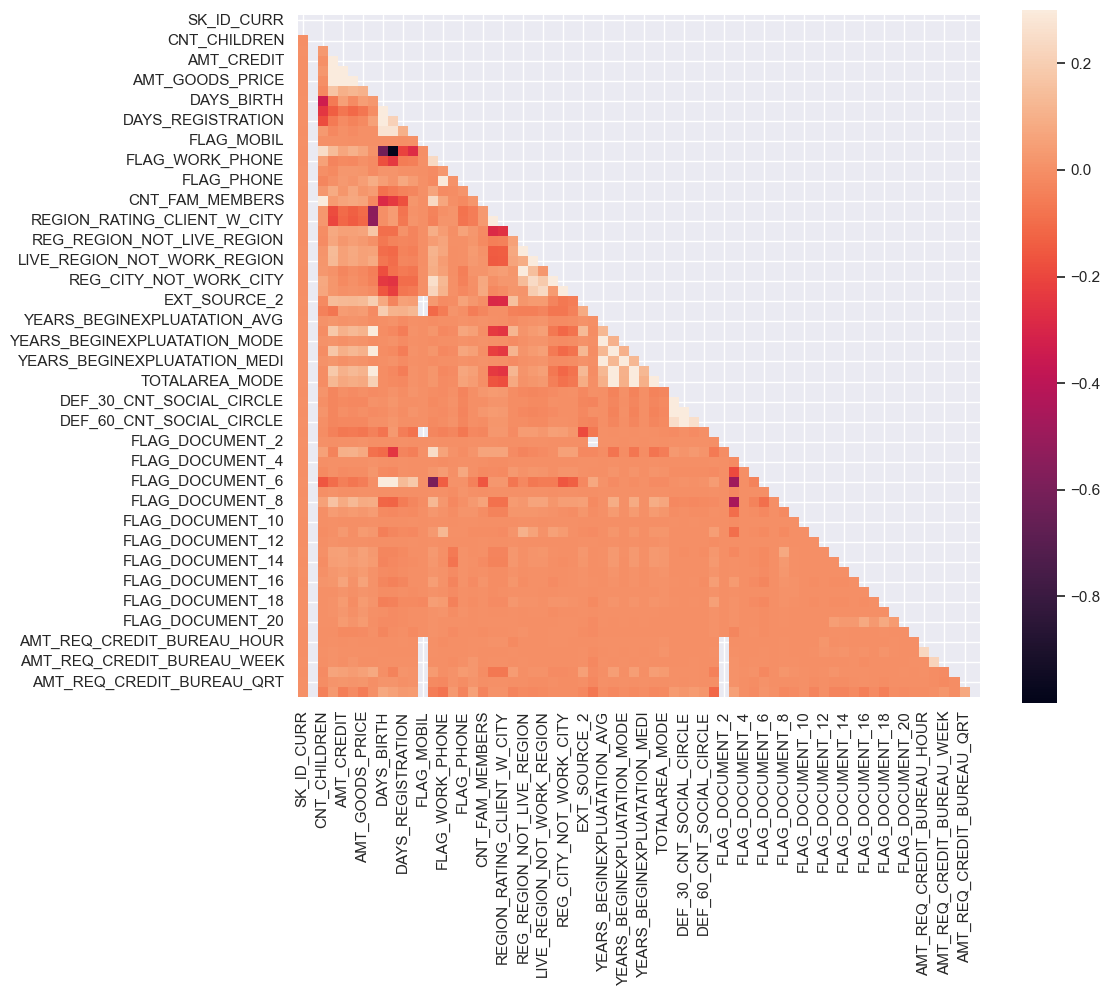

In [147]:

# Filter only numeric columns from train_0 for correlation analysis.
numeric_cols = train_0.select_dtypes(include=[np.number]).columns
train_0_numeric = train_0[numeric_cols]

# Handle missing values, if necessary, by filling them with the median of each column.
# train_0_numeric = train_0_numeric.fillna(train_0_numeric.median())

# Calculate the correlation matrix for the numeric columns.
corr = train_0_numeric.corr()

# Prepare a mask to hide the upper triangle of the heatmap, for readability.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plotting setup: define the figure size and style.
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style("white"):
    # Create a heatmap with the correlation matrix, masked upper triangle, and specific aesthetic choices.
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

This method starts by narrowing down your DataFrame to only include columns with numeric data. Following this, it computes the correlation matrix using the filtered DataFrame.

###  Finding top 10 correlation


In [148]:
# Select only the numeric columns from the DataFrame
numeric_df = train_0.select_dtypes(include=[np.number])

# Optionally, you can handle missing values if necessary, for example, by filling them
# numeric_df = numeric_df.fillna(method='ffill').fillna(method='bfill')

# Now calculate the absolute correlation matrix for the numeric columns
correlation_0 = numeric_df.corr().abs()

# Unstack and sort the correlation pairs
correlation_0 = correlation_0.unstack().sort_values(kind="quicksort", ascending=False)

# Optionally, drop NA values if there were any missing correlations due to missing data
correlation_0 = correlation_0.dropna()

# Display or process your sorted correlation pairs
print(correlation_0)

SK_ID_CURR                    SK_ID_CURR                      1.000000
REGION_RATING_CLIENT          REGION_RATING_CLIENT            1.000000
FLOORSMAX_MODE                FLOORSMAX_MODE                  1.000000
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_MODE    1.000000
FLOORSMAX_AVG                 FLOORSMAX_AVG                   1.000000
                                                                ...   
FLAG_DOCUMENT_4               YEARS_BEGINEXPLUATATION_MEDI    0.000008
FLAG_MOBIL                    FLAG_DOCUMENT_12                0.000005
FLAG_DOCUMENT_12              FLAG_MOBIL                      0.000005
FLAG_DOCUMENT_2               EXT_SOURCE_2                    0.000004
EXT_SOURCE_2                  FLAG_DOCUMENT_2                 0.000004
Length: 4457, dtype: float64


#### Top correlations
'''
EXT_SOURCE_1                 DAYS_BIRTH                     0.601210

DAYS_EMPLOYED                DAYS_BIRTH                     0.618048

AMT_CREDIT                   AMT_ANNUITY                    0.771309

AMT_GOODS_PRICE              AMT_ANNUITY                    0.776686

LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.830381

LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.861861

CNT_FAM_MEMBERS              CNT_CHILDREN                   0.878571

REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.950149

AMT_CREDIT                   AMT_GOODS_PRICE                0.987250

DAYS_EMPLOYED                FLAG_EMP_PHONE                 0.999758
'''

### Top correlations for the defaulter
'''
EXT_SOURCE_1                 DAYS_BIRTH                     0.570054

DAYS_EMPLOYED                DAYS_BIRTH                     0.575097

FLAG_EMP_PHONE               DAYS_BIRTH                     0.578519

AMT_CREDIT                   AMT_ANNUITY                    0.752195

AMT_GOODS_PRICE              AMT_ANNUITY                    0.752699

REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.778540

REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.847885

CNT_CHILDREN                 CNT_FAM_MEMBERS                0.885484

REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT           0.956637

AMT_CREDIT                   AMT_GOODS_PRICE                0.983103

DAYS_EMPLOYED                FLAG_EMP_PHONE                 0.999702
'''

### Defaulter correlation

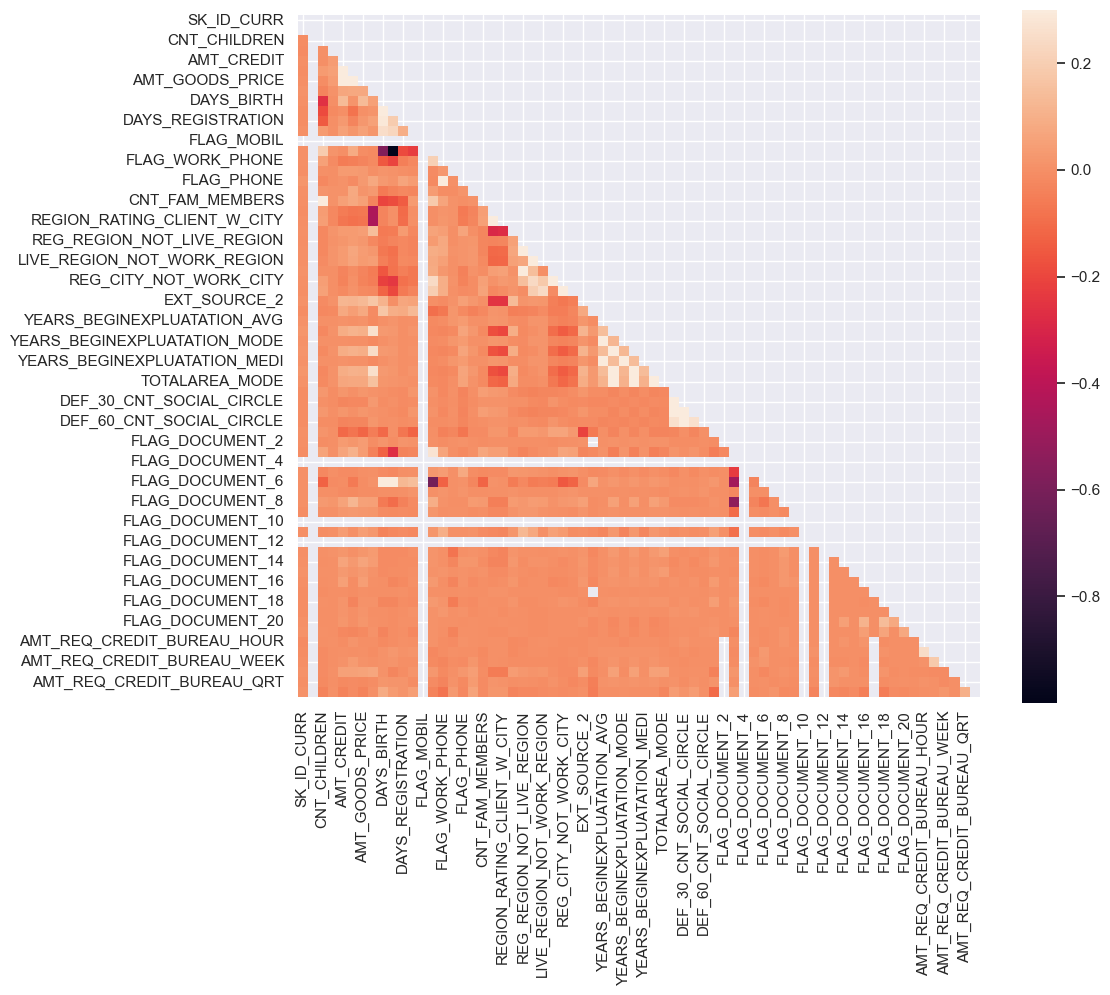

In [149]:
# Step 1: Select only numeric columns from the DataFrame
numeric_train_1 = train_1.select_dtypes(include=[np.number])

# Step 2: Optionally handle missing values. For example, you could fill them with zeros
# numeric_train_1.fillna(0, inplace=True)

# Now you can safely calculate the correlation matrix
corr = numeric_train_1.corr()

# If you wish to continue with masking the upper triangle for plotting:
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

In [150]:
# Select only numeric columns from 'train_1'
numeric_train_1 = train_1.select_dtypes(include=[np.number])

# Optional: Handle missing values. For example, you can fill them with the column mean
# numeric_train_1.fillna(numeric_train_1.mean(), inplace=True)

# Now, compute the absolute correlation matrix
correlation_1 = numeric_train_1.corr().abs()

# If you want to unstack and sort the correlation pairs
correlation_pairs = correlation_1.unstack().sort_values(kind="quicksort", ascending=False)

# Optional: Drop NaN values if any exist
correlation_pairs = correlation_pairs.dropna()
correlation_1 = correlation_1[correlation_1 != 1.0]

print(correlation_1)

                            SK_ID_CURR  TARGET  CNT_CHILDREN  \
SK_ID_CURR                         NaN     NaN      0.005144   
TARGET                             NaN     NaN           NaN   
CNT_CHILDREN                  0.005144     NaN           NaN   
AMT_INCOME_TOTAL              0.010165     NaN      0.004796   
AMT_CREDIT                    0.001290     NaN      0.001675   
...                                ...     ...           ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.007954     NaN      0.013004   
AMT_REQ_CREDIT_BUREAU_WEEK    0.002999     NaN      0.011792   
AMT_REQ_CREDIT_BUREAU_MON     0.006436     NaN      0.012583   
AMT_REQ_CREDIT_BUREAU_QRT     0.000880     NaN      0.018174   
AMT_REQ_CREDIT_BUREAU_YEAR    0.008916     NaN      0.035427   

                            AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                          0.010165    0.001290     0.007578   
TARGET                                   NaN         NaN          NaN   
CNT_CHILDREN

### Analysing through box plot

In [151]:
# Select columns with numerical data types ('int64' and 'float64') from the DataFrame 'train'
train_categorical = train.select_dtypes(include=['int64', 'float64']).columns

# Analysis for the outliers

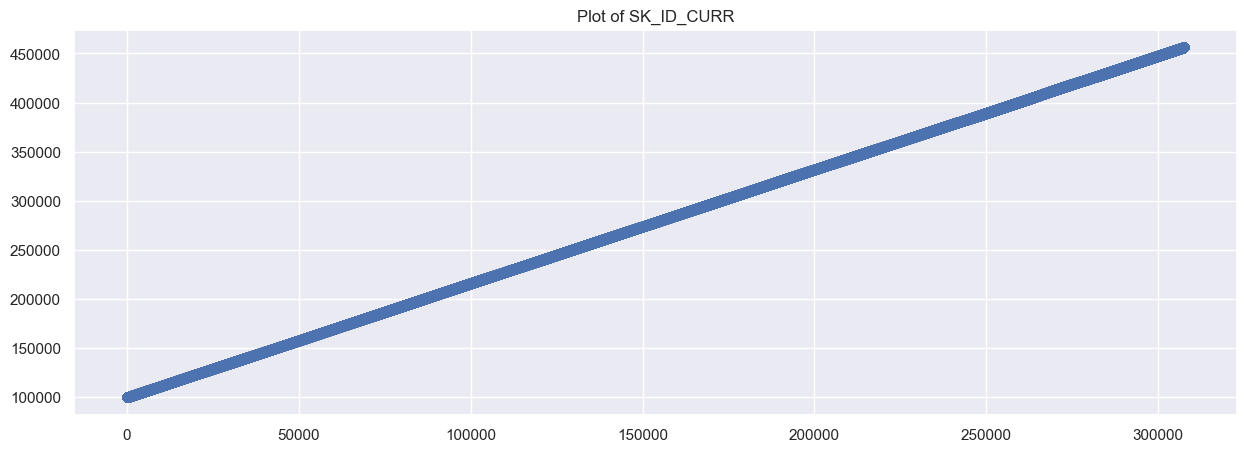

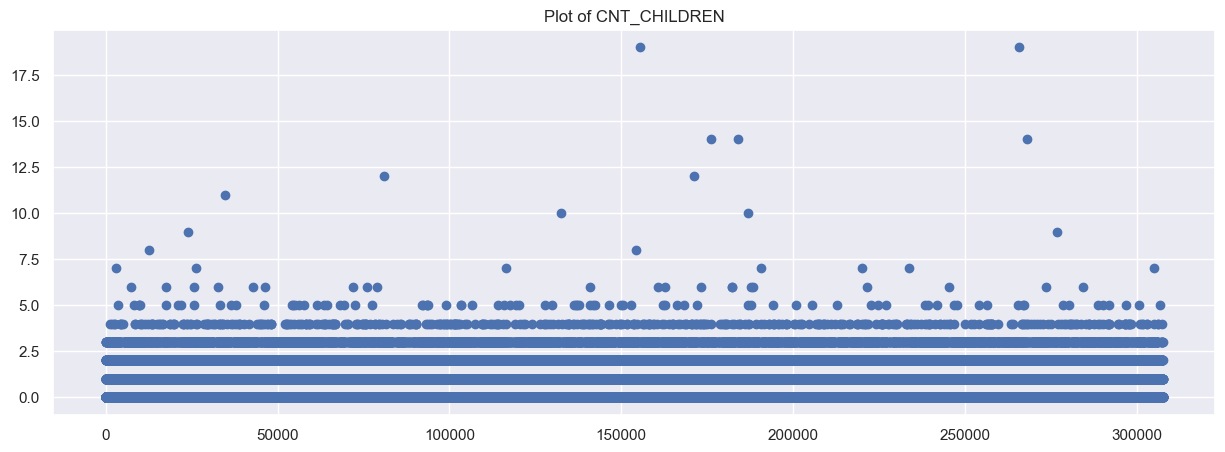

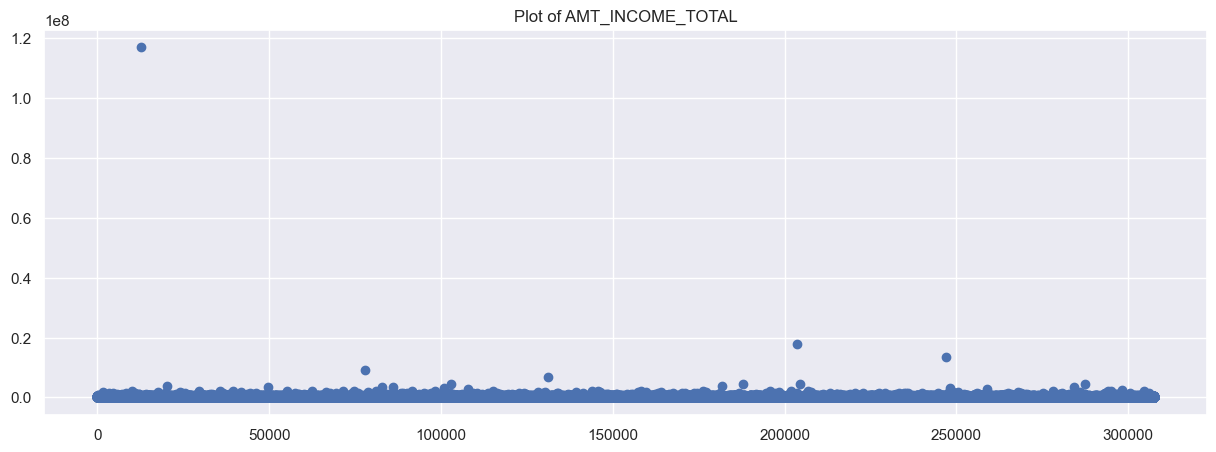

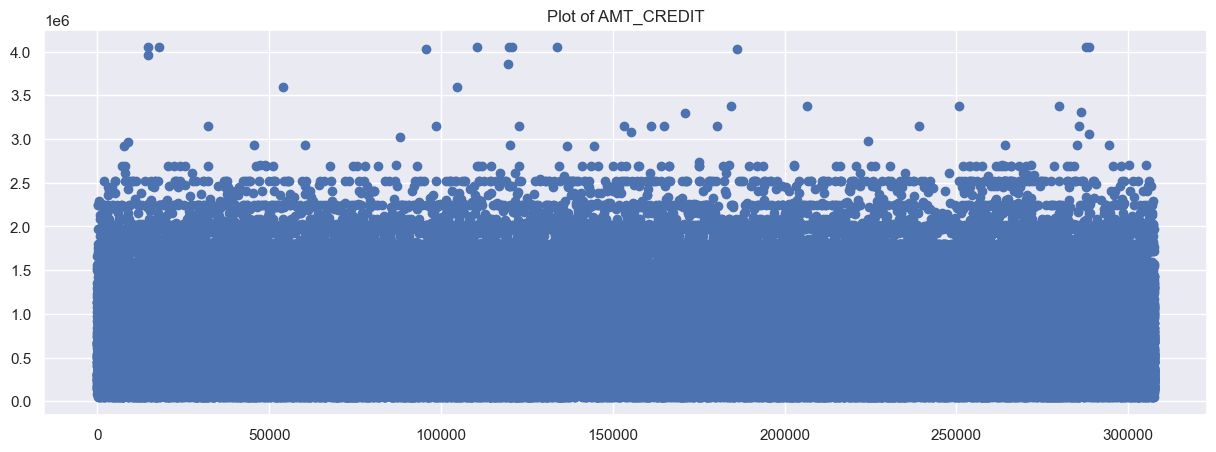

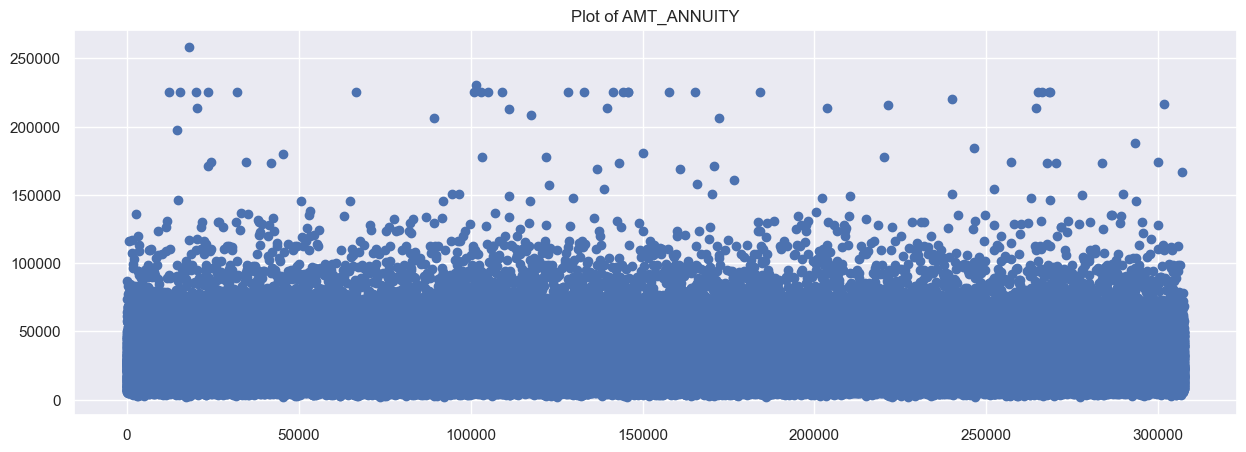

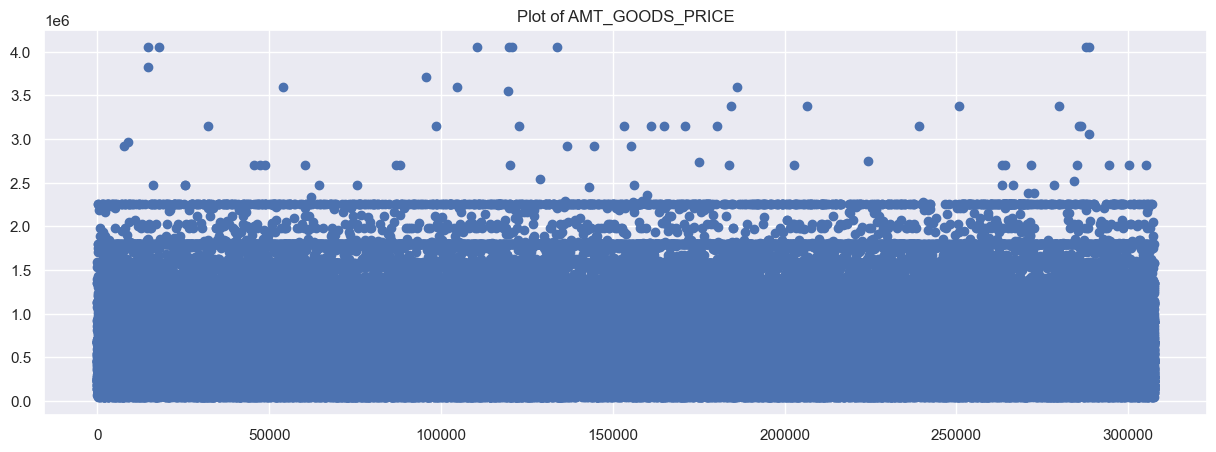

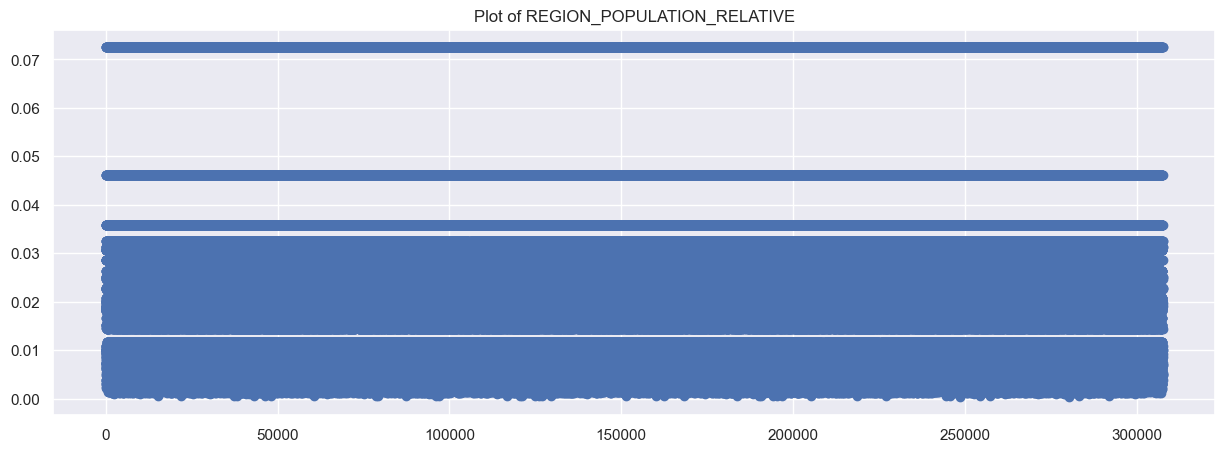

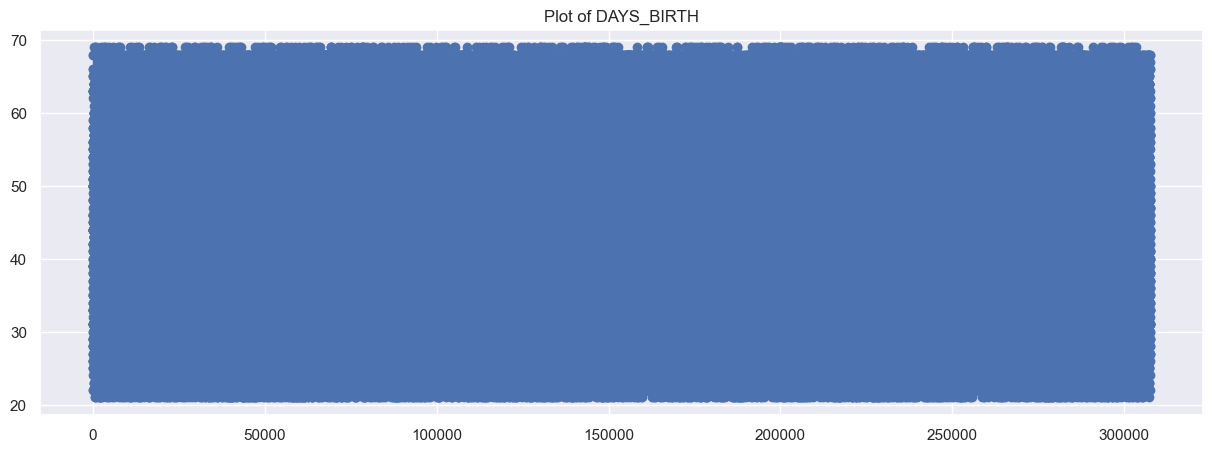

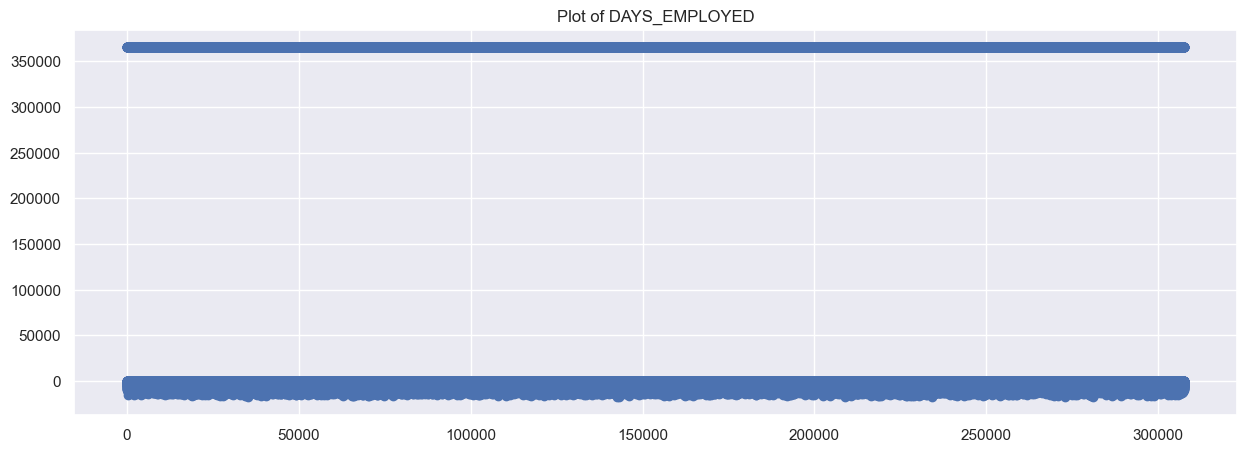

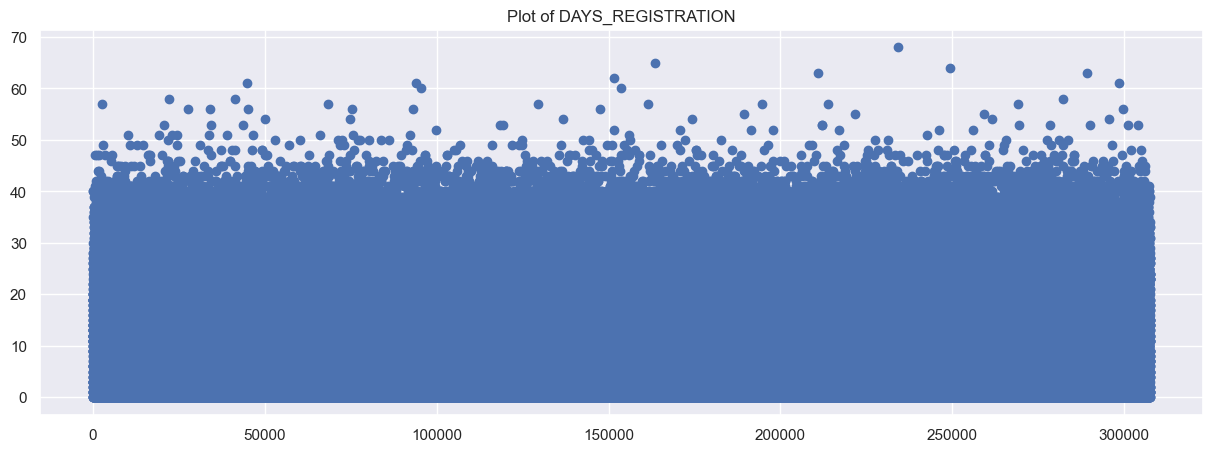

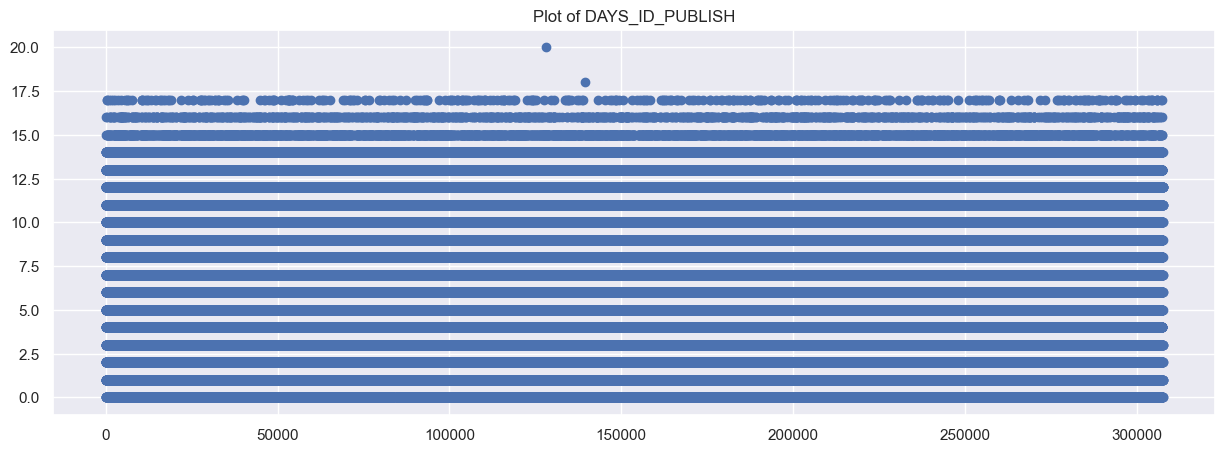

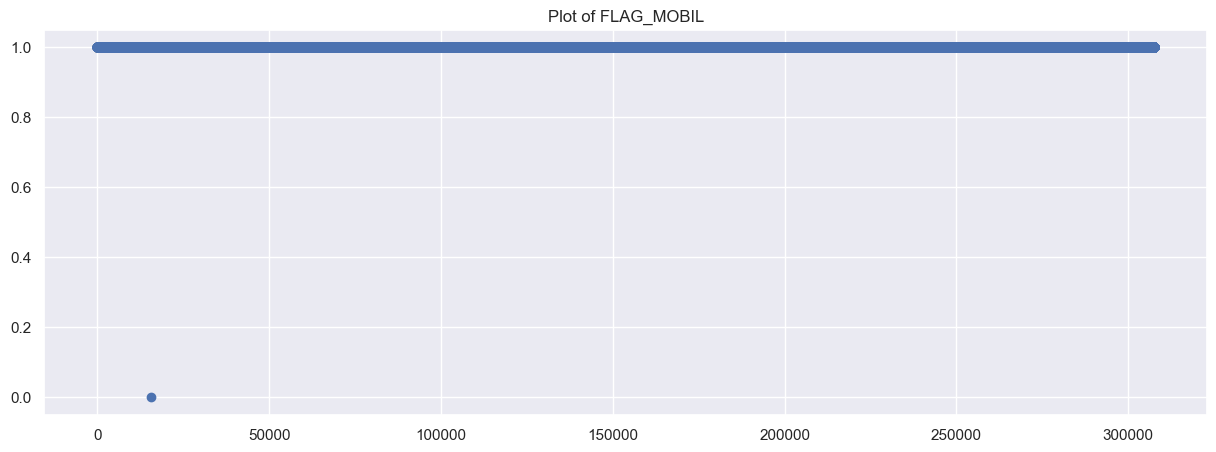

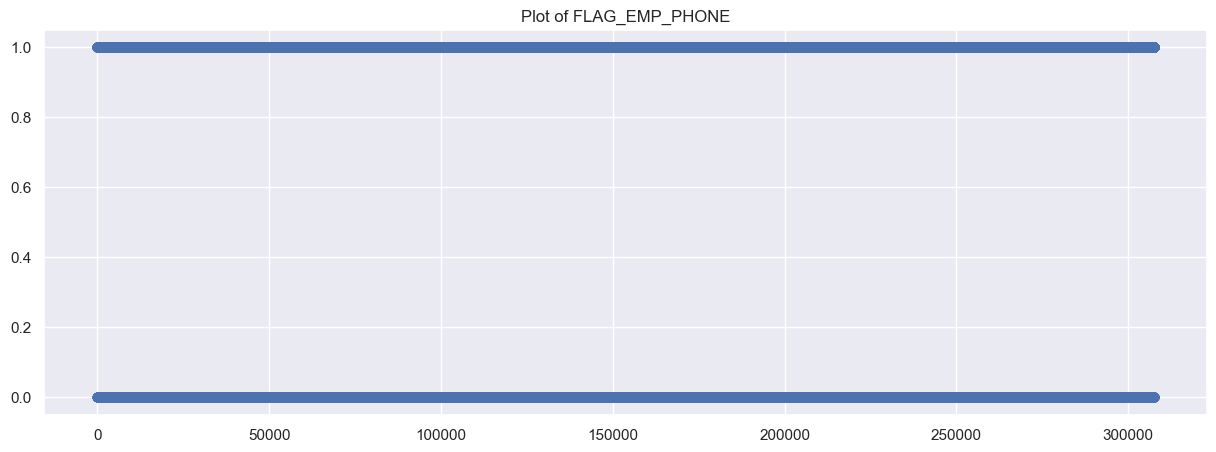

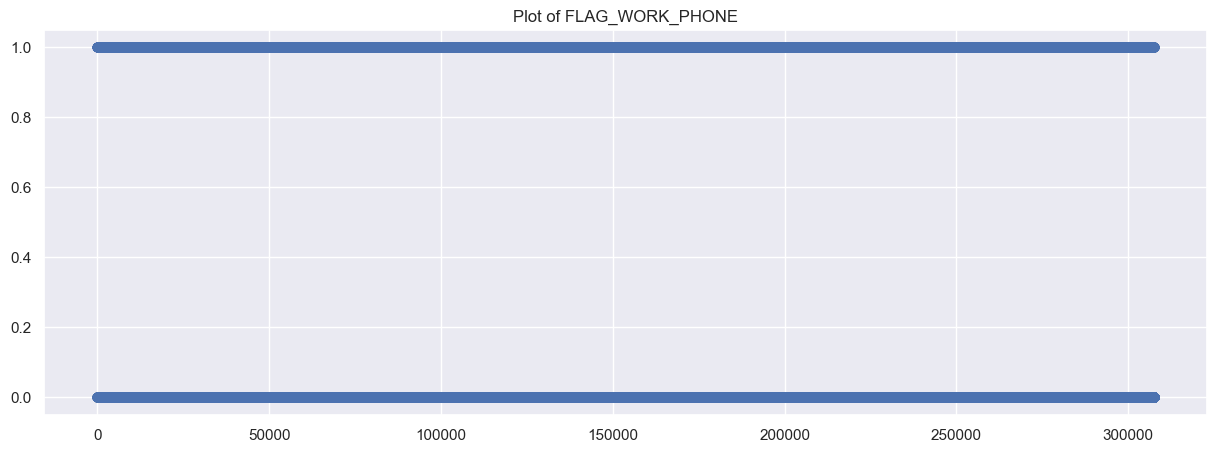

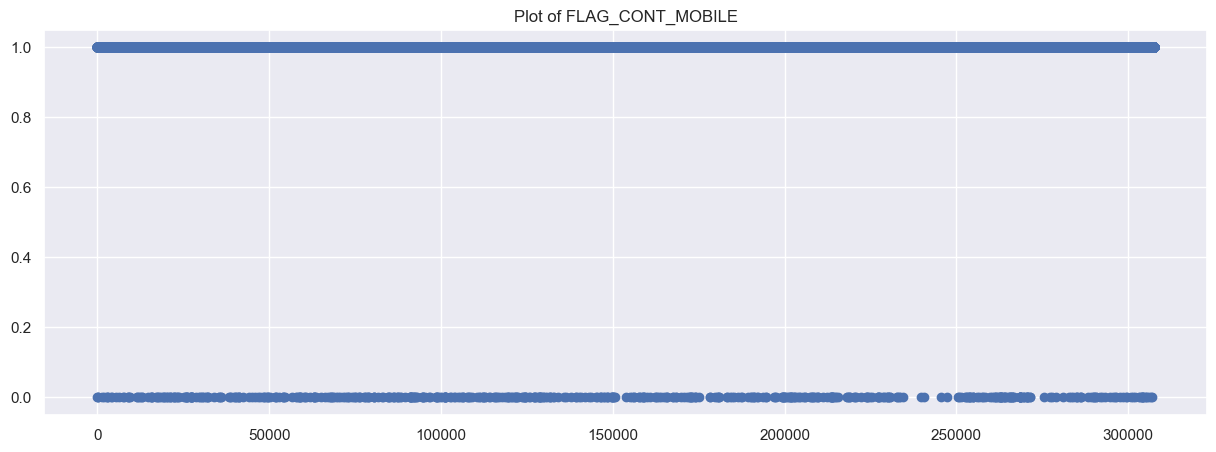

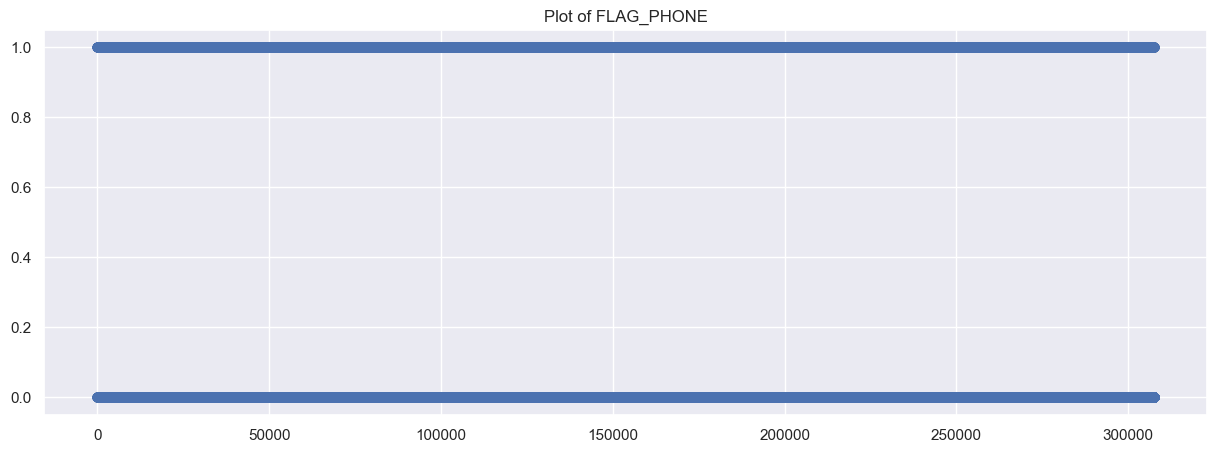

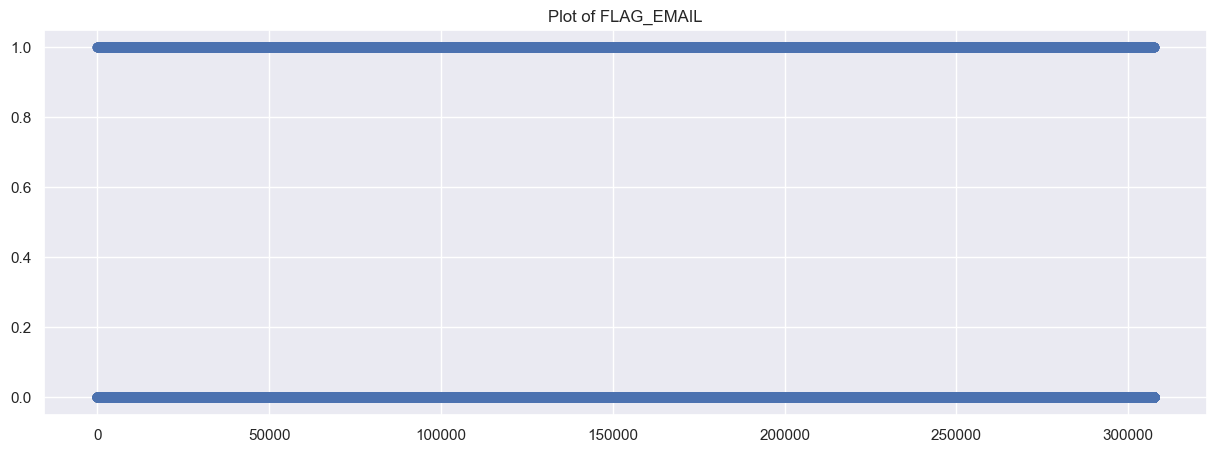

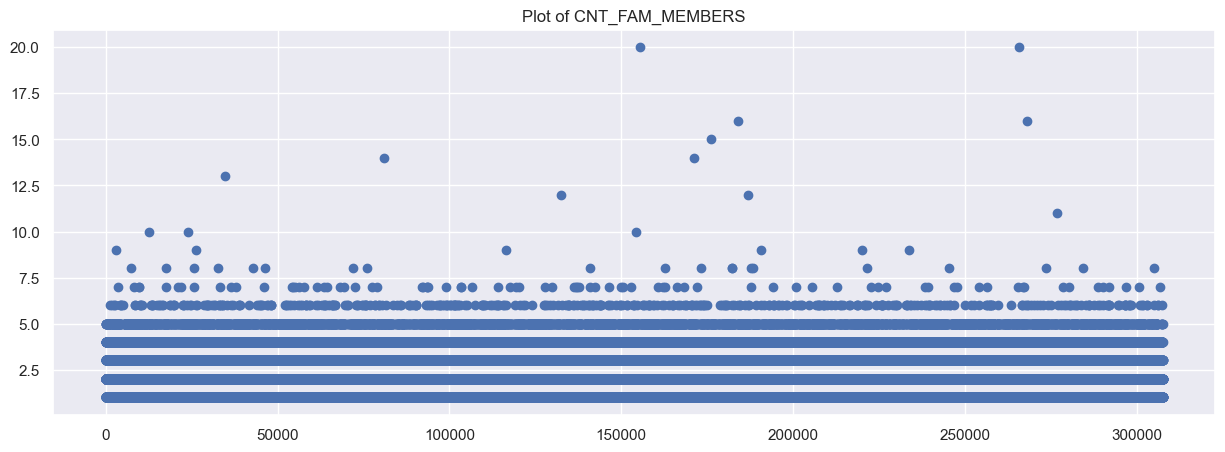

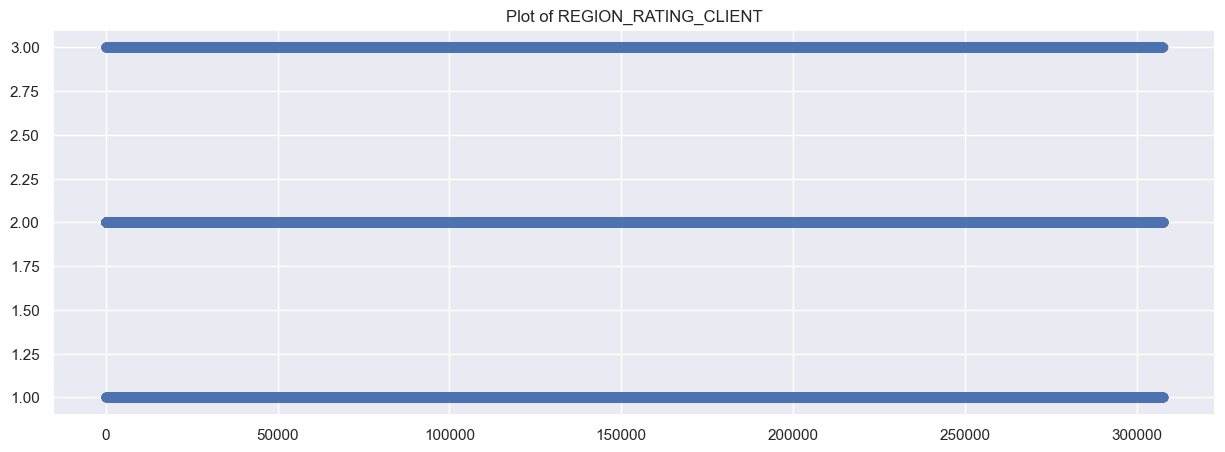

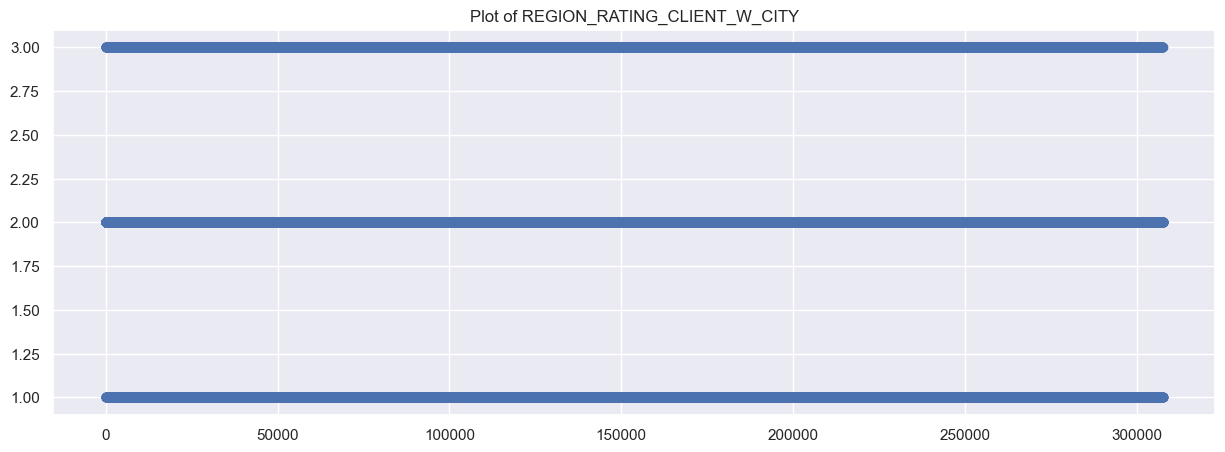

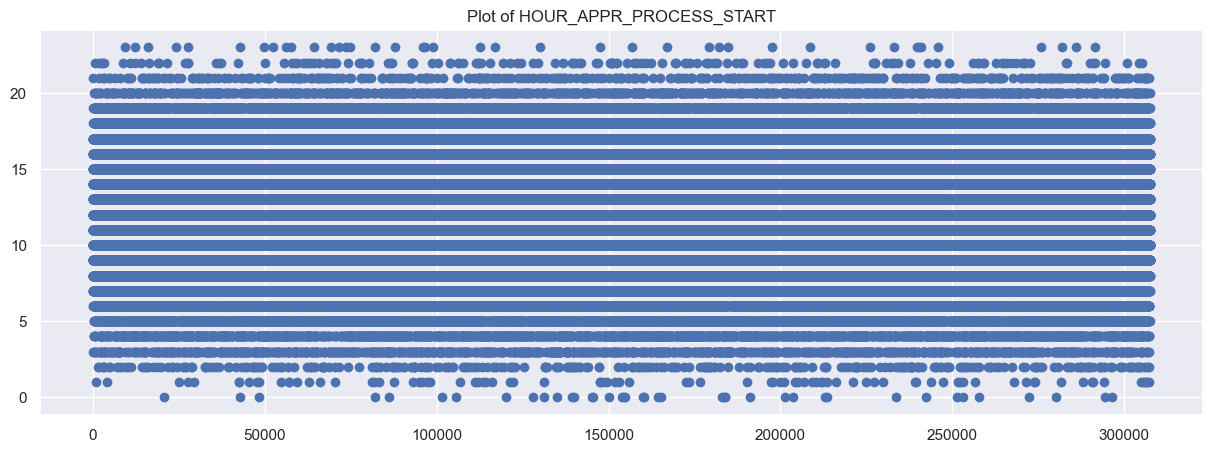

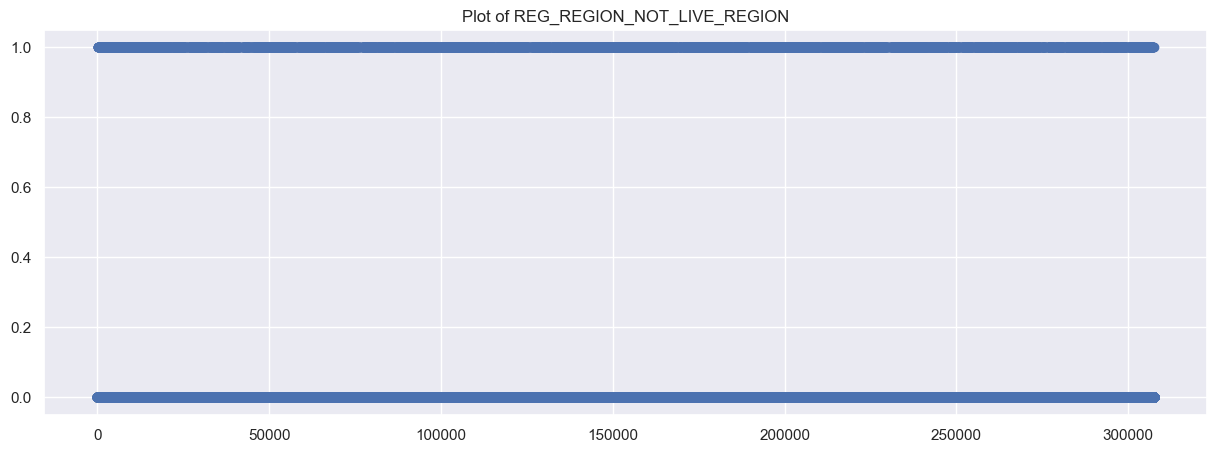

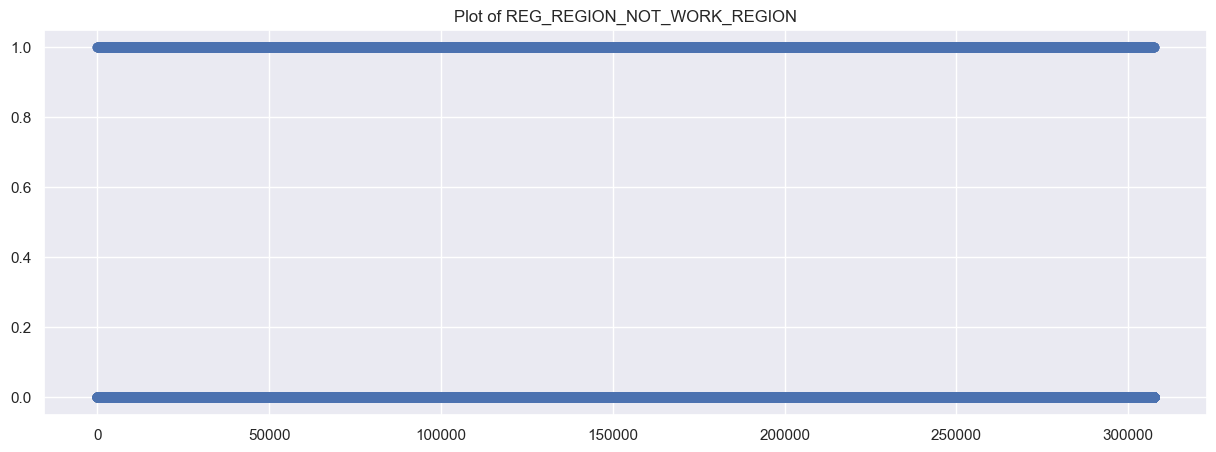

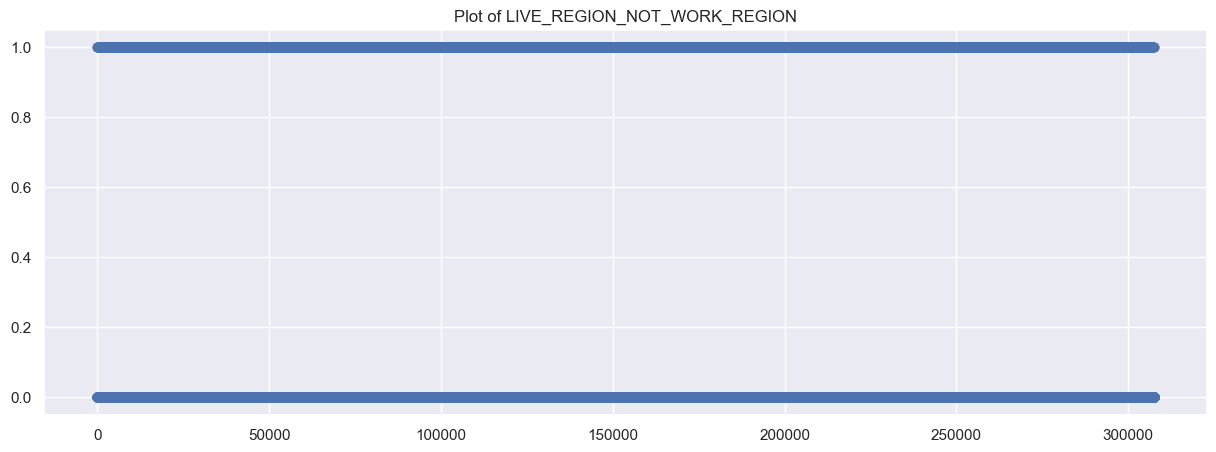

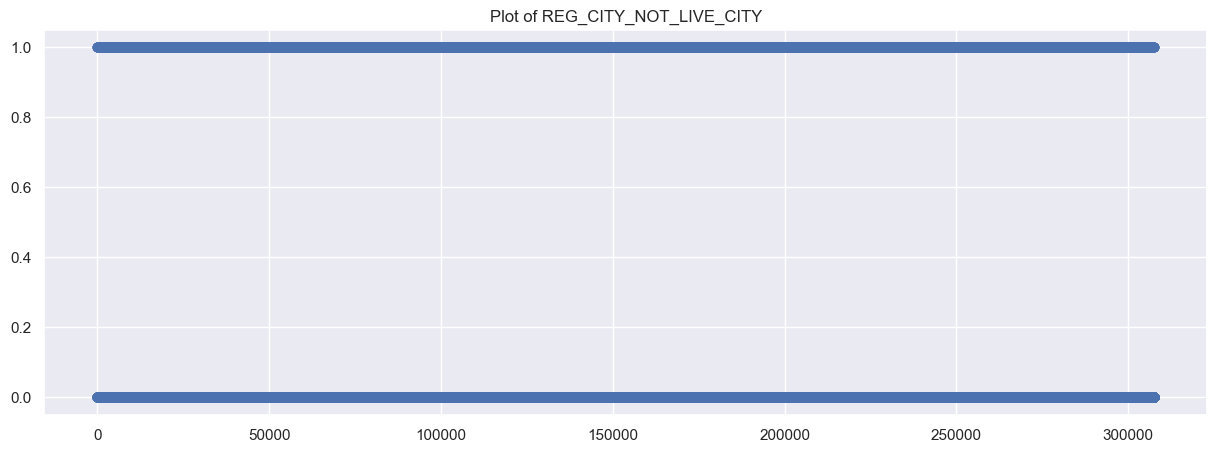

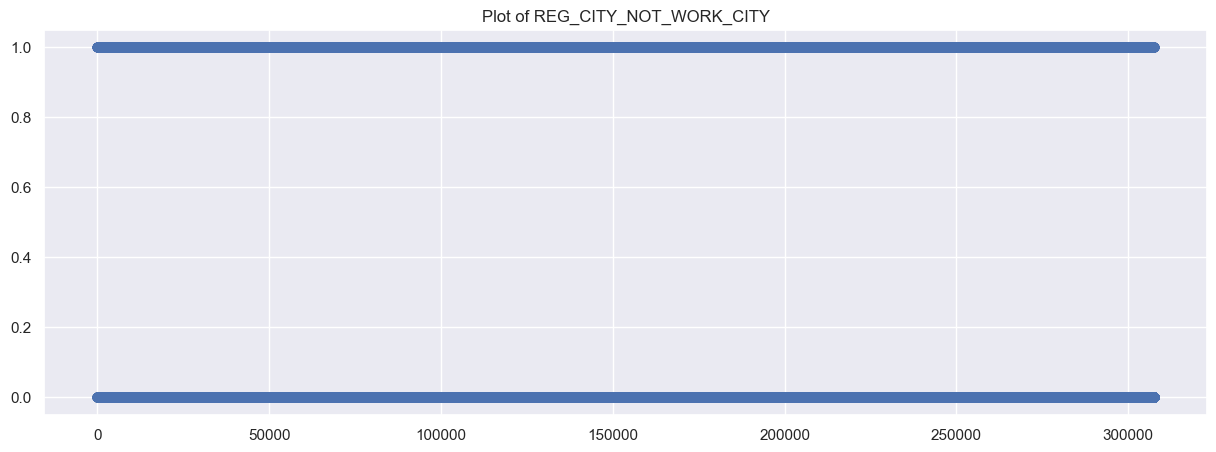

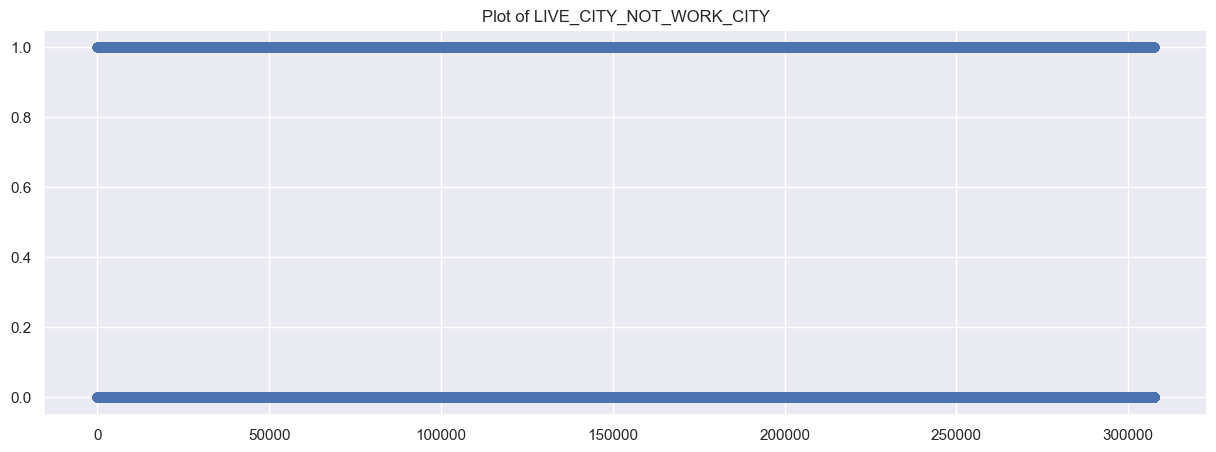

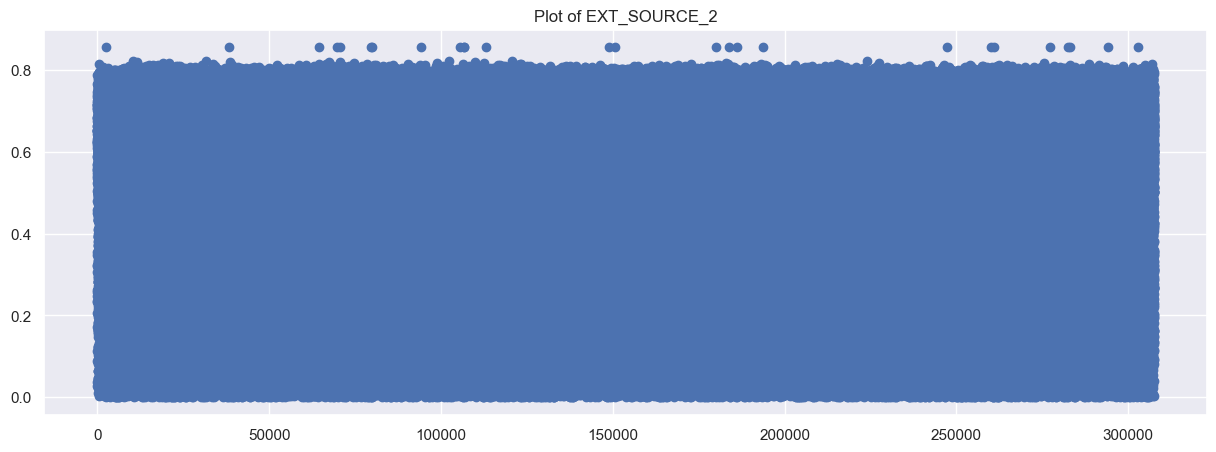

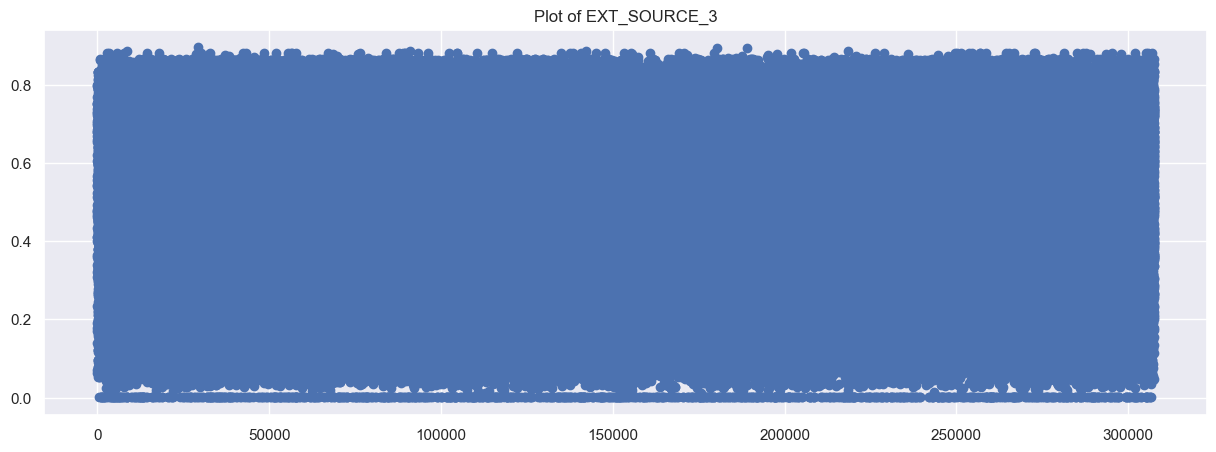

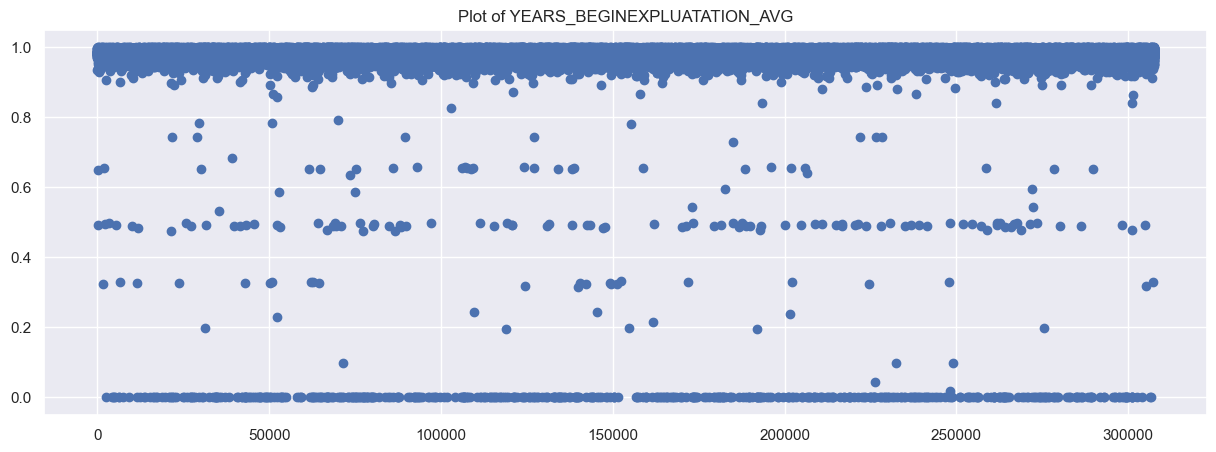

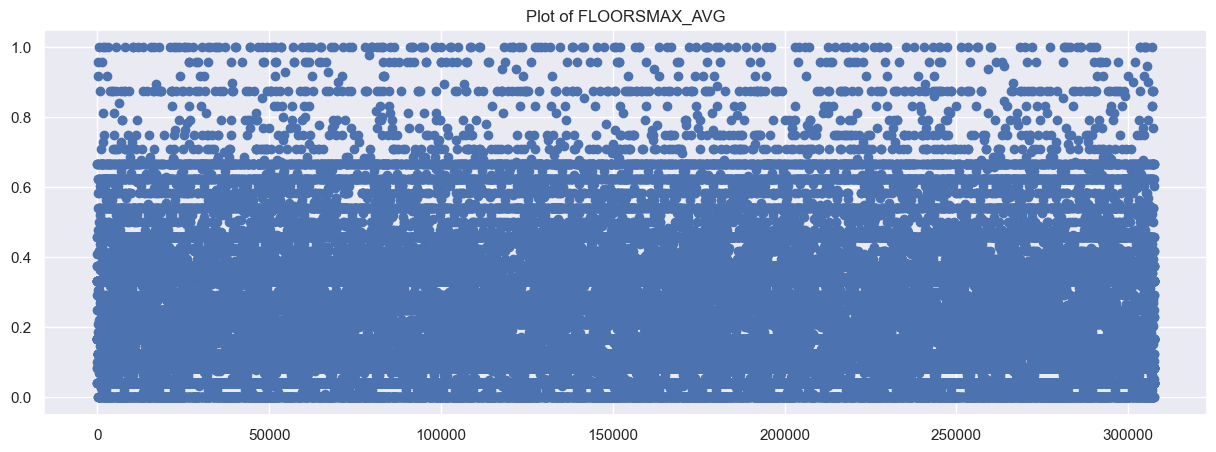

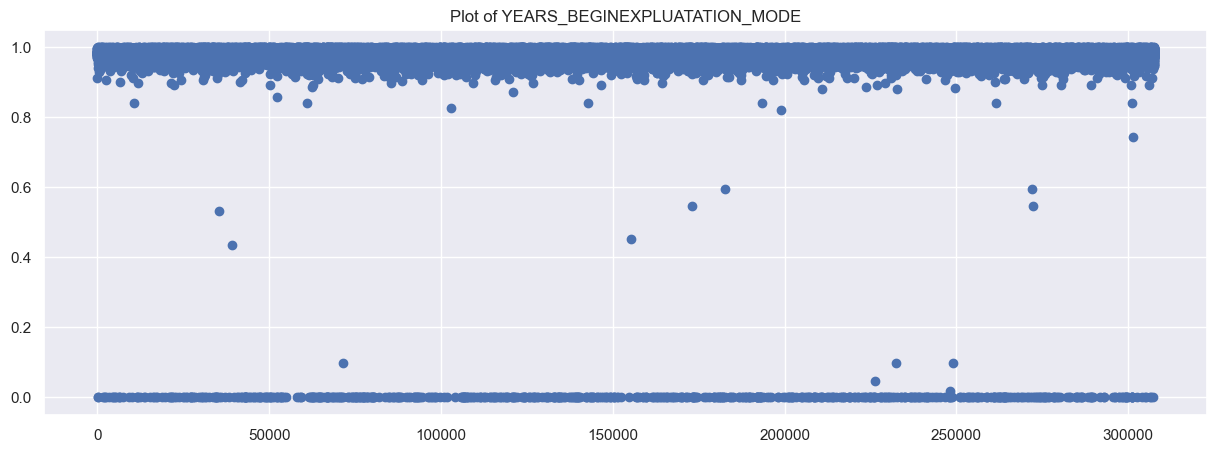

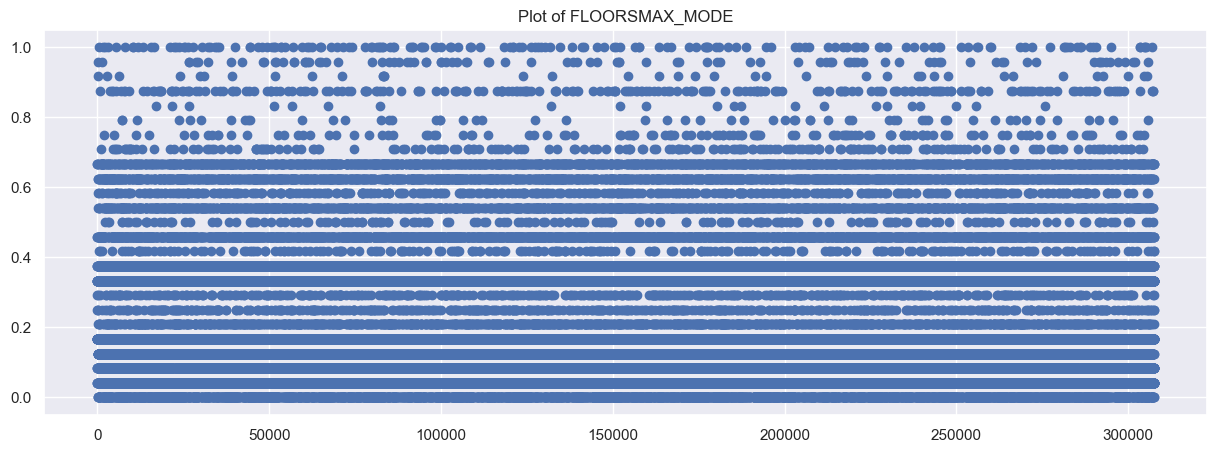

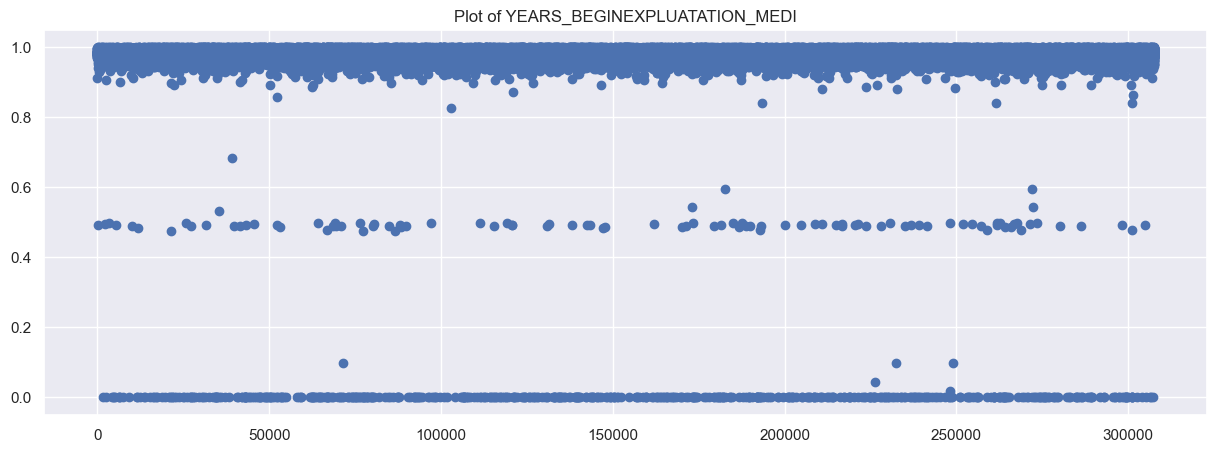

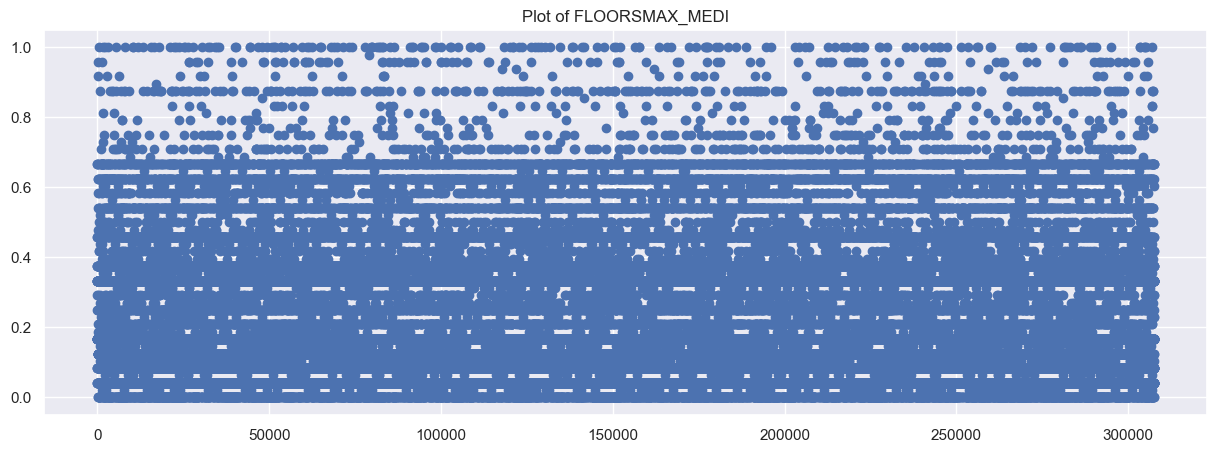

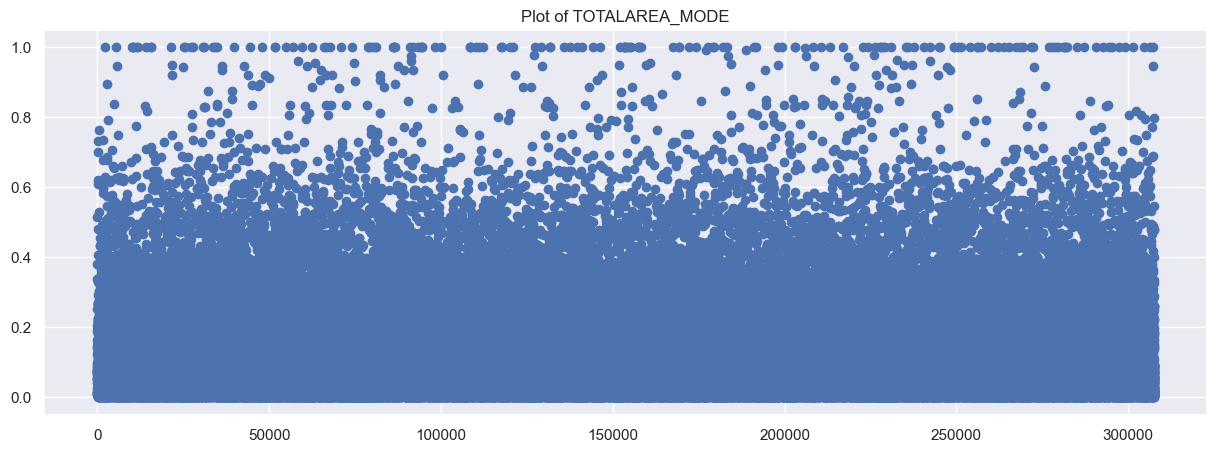

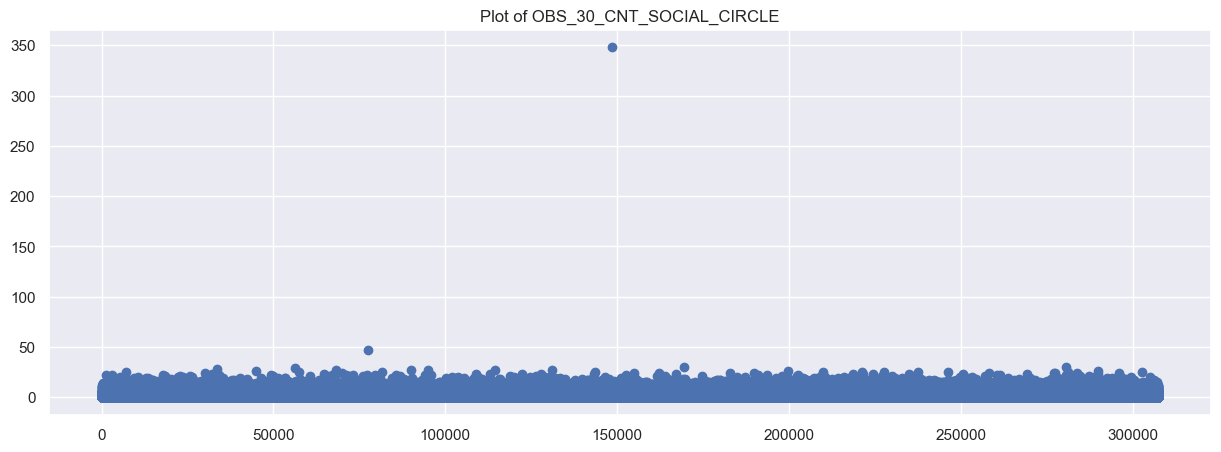

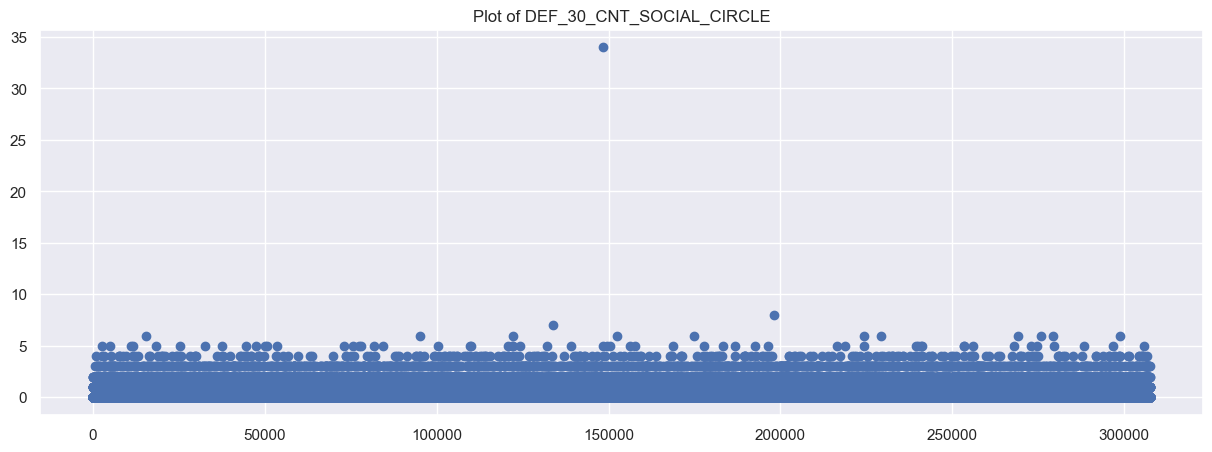

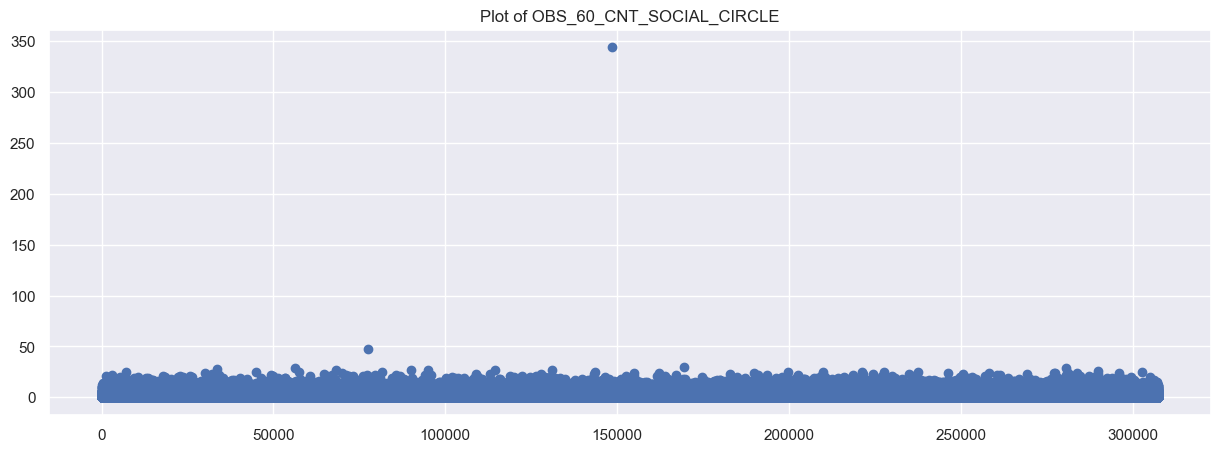

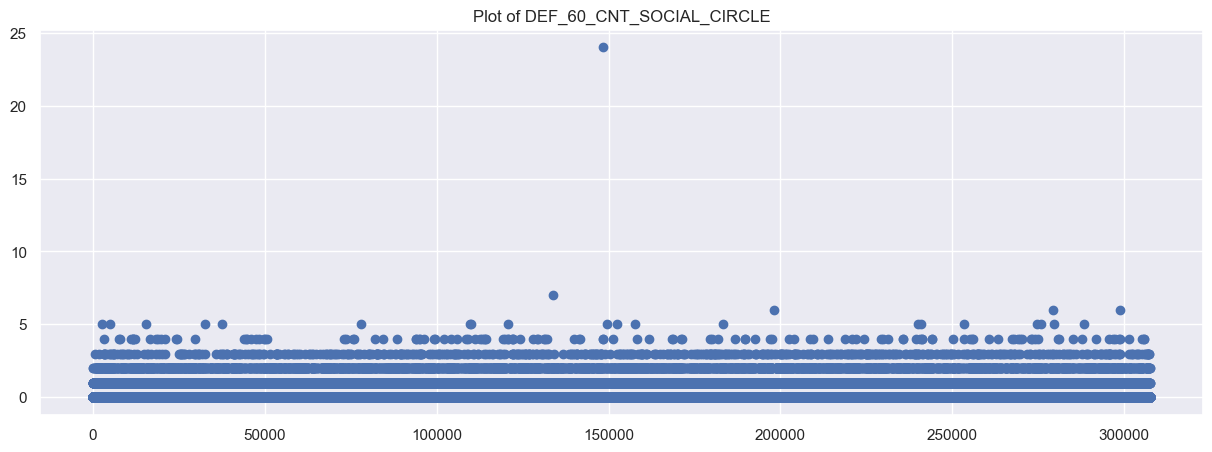

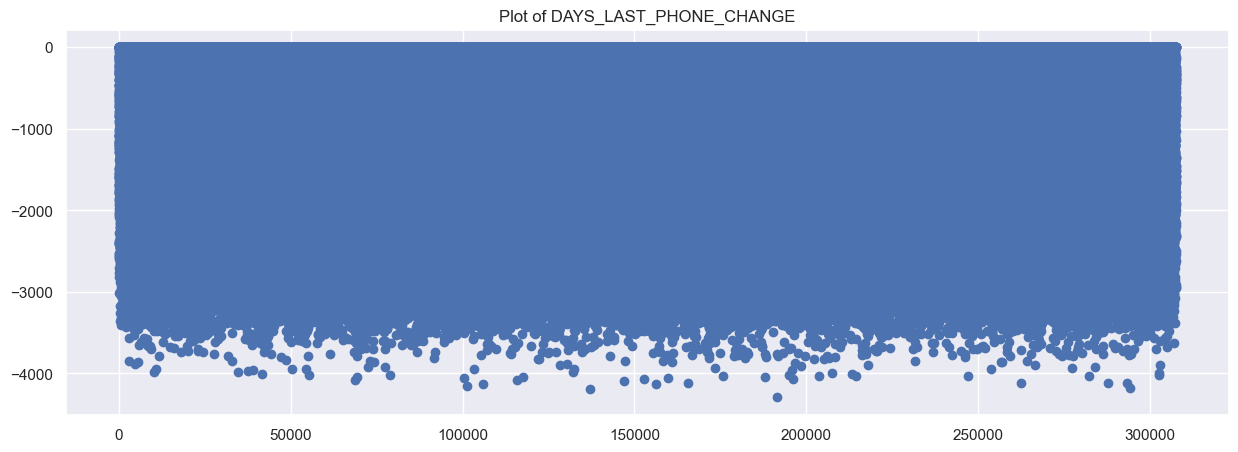

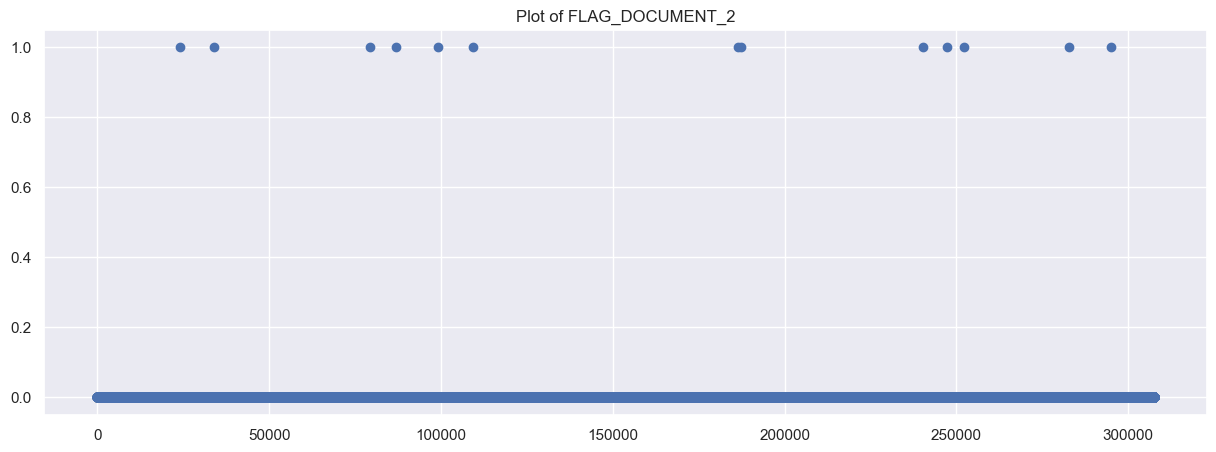

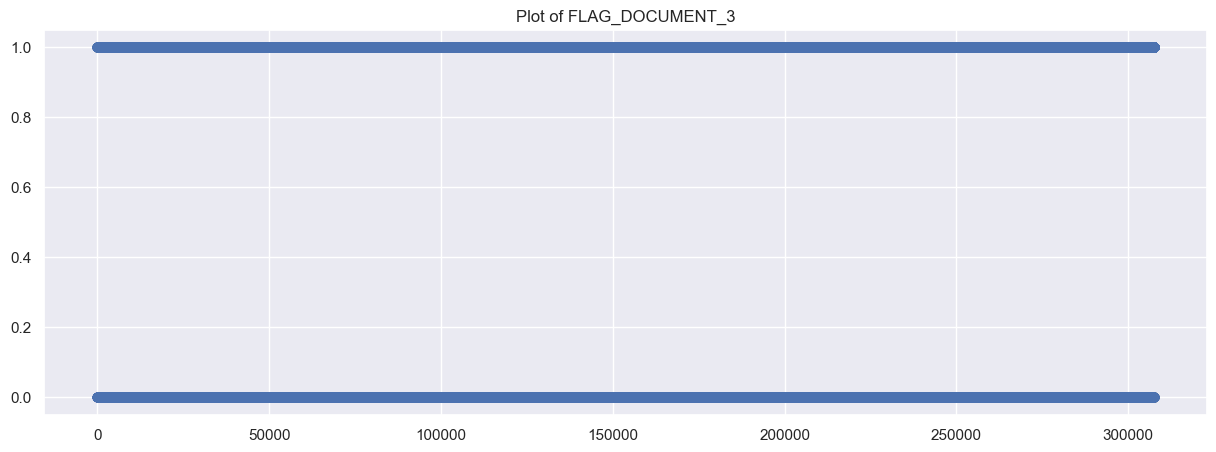

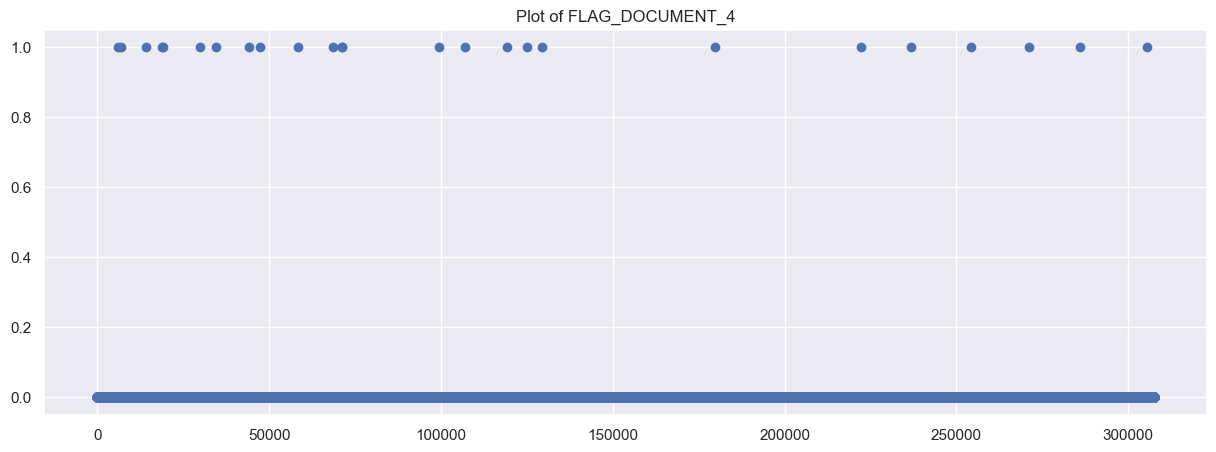

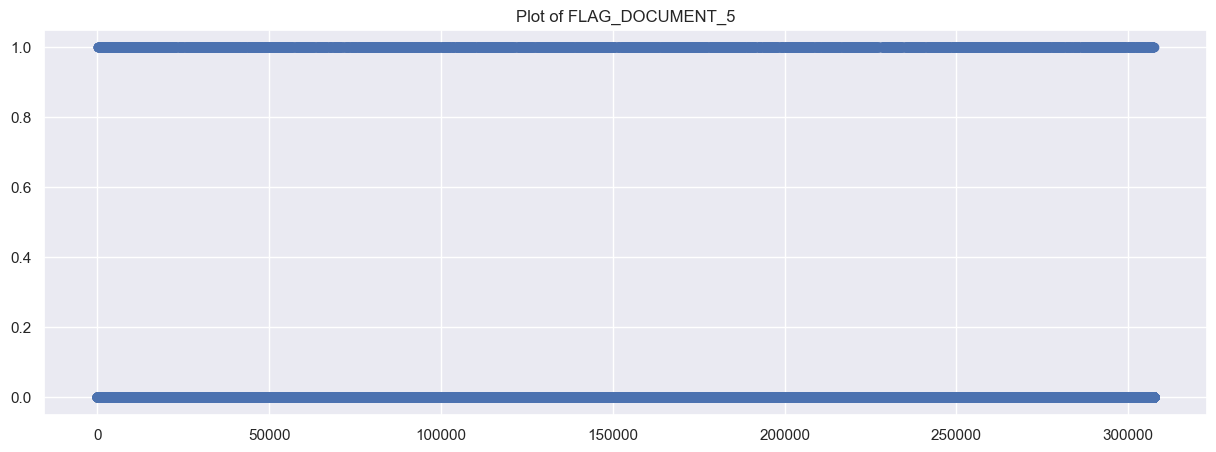

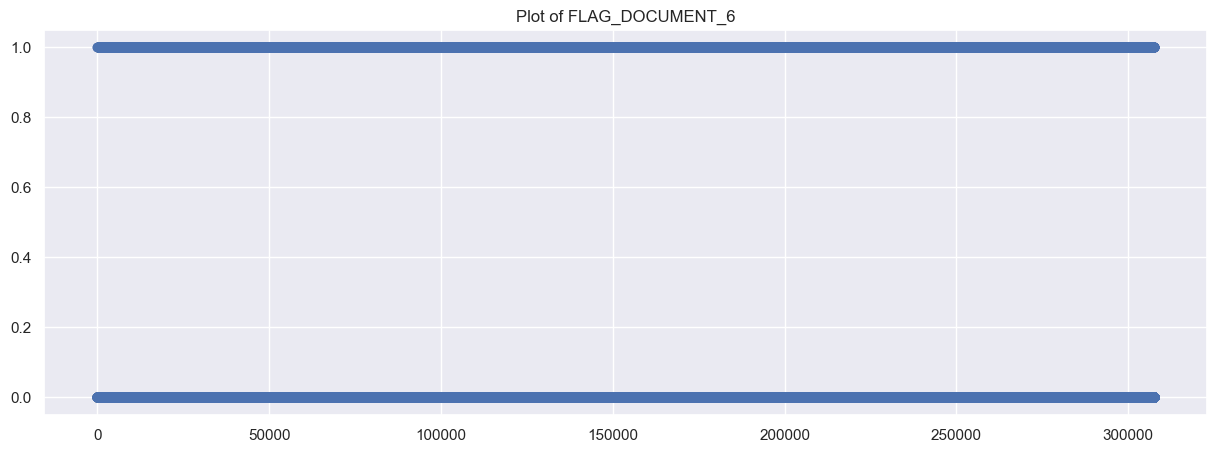

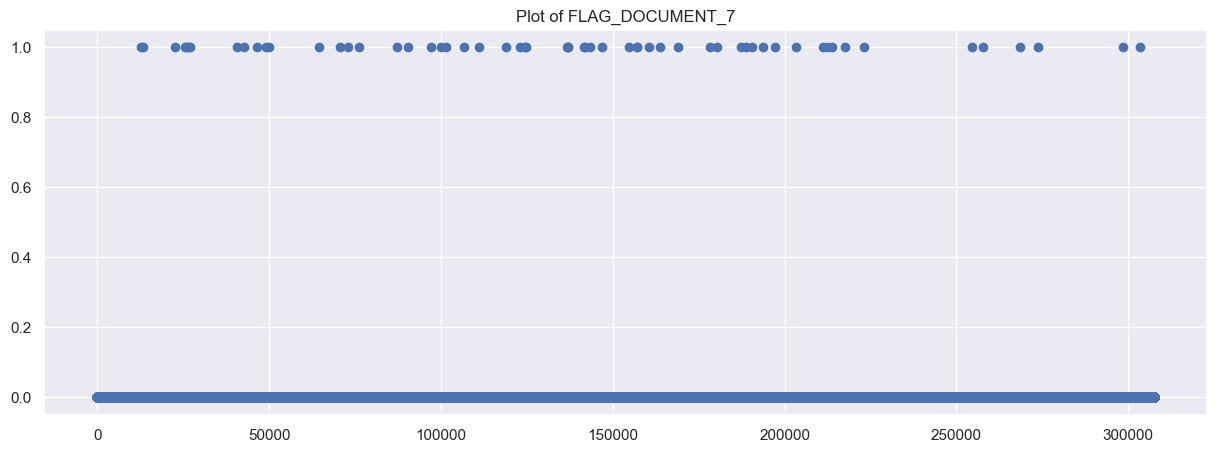

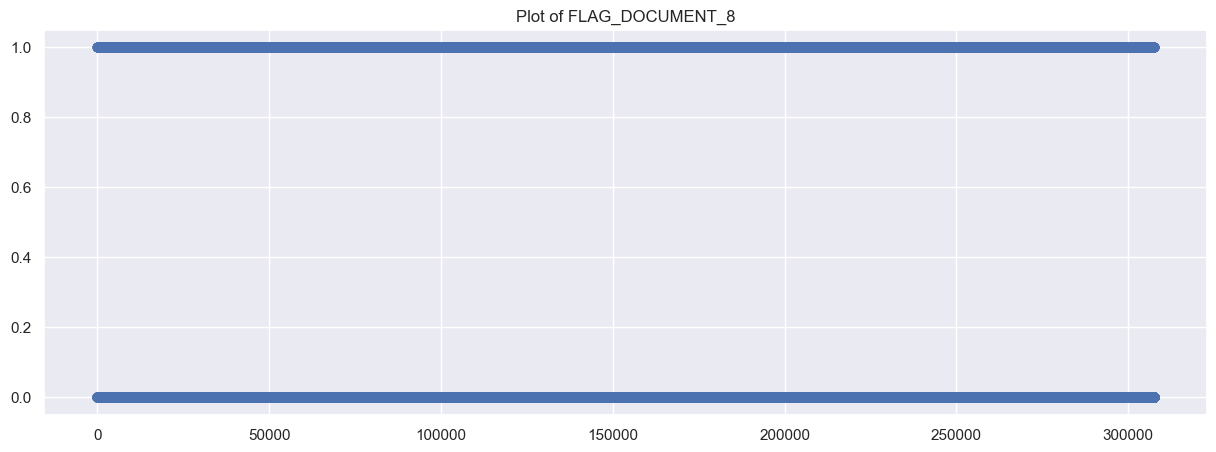

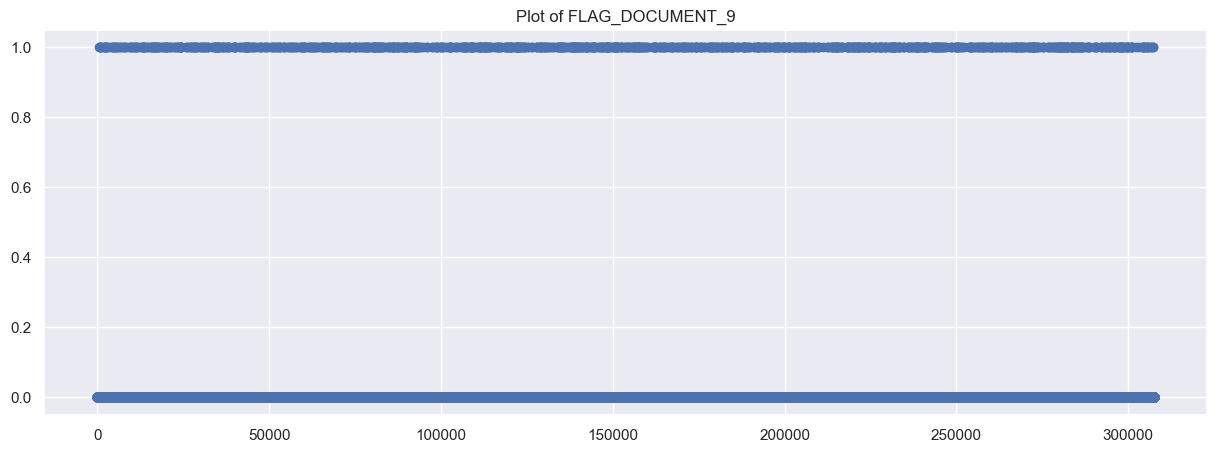

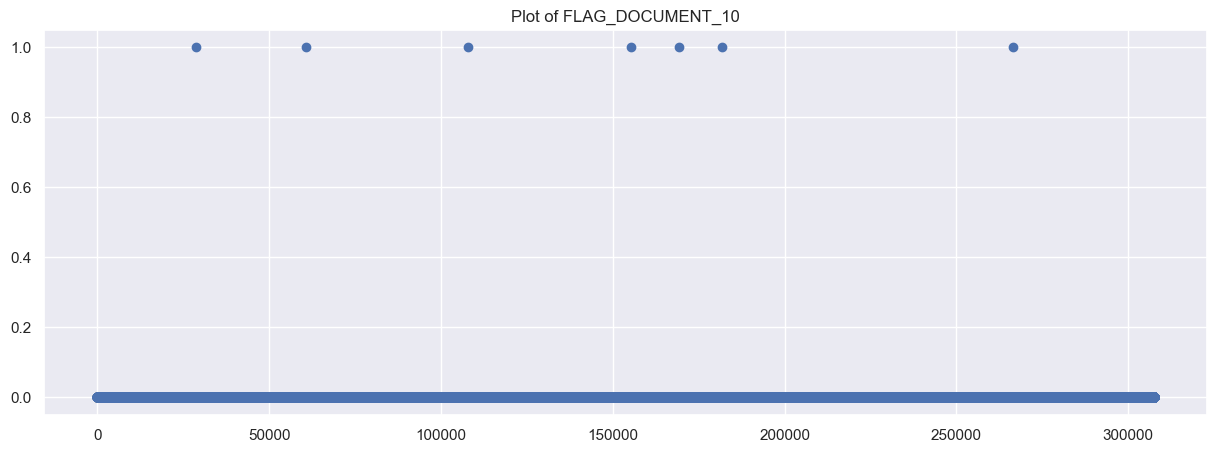

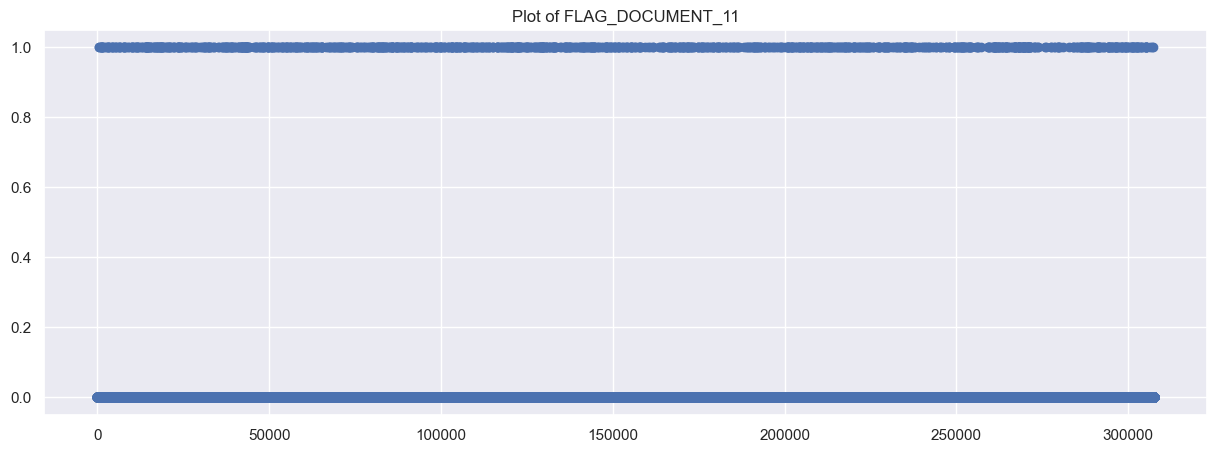

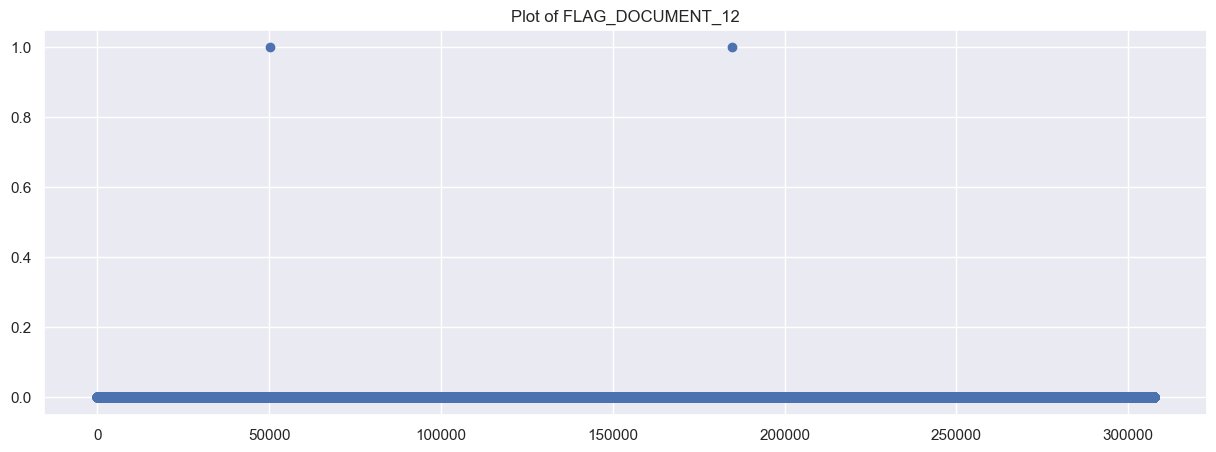

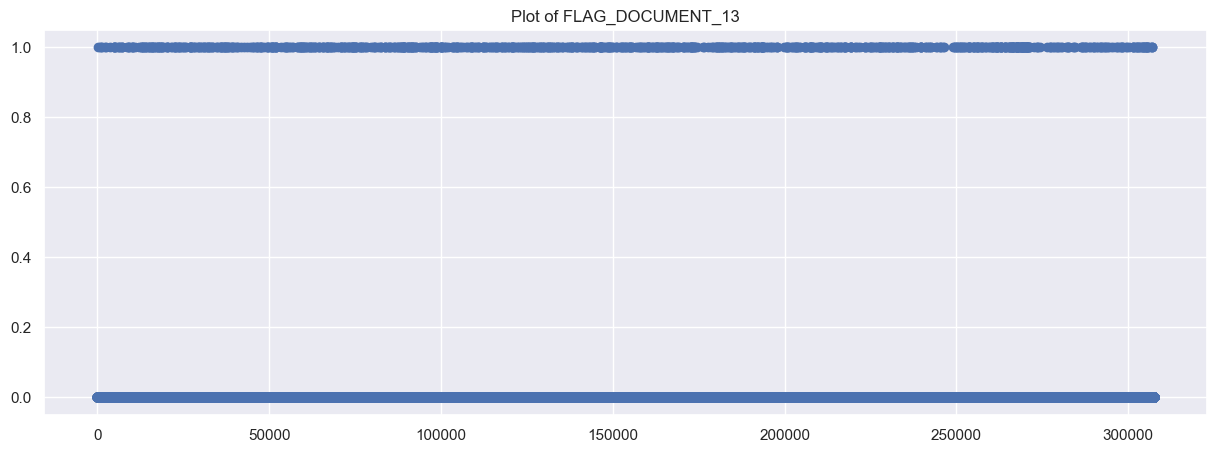

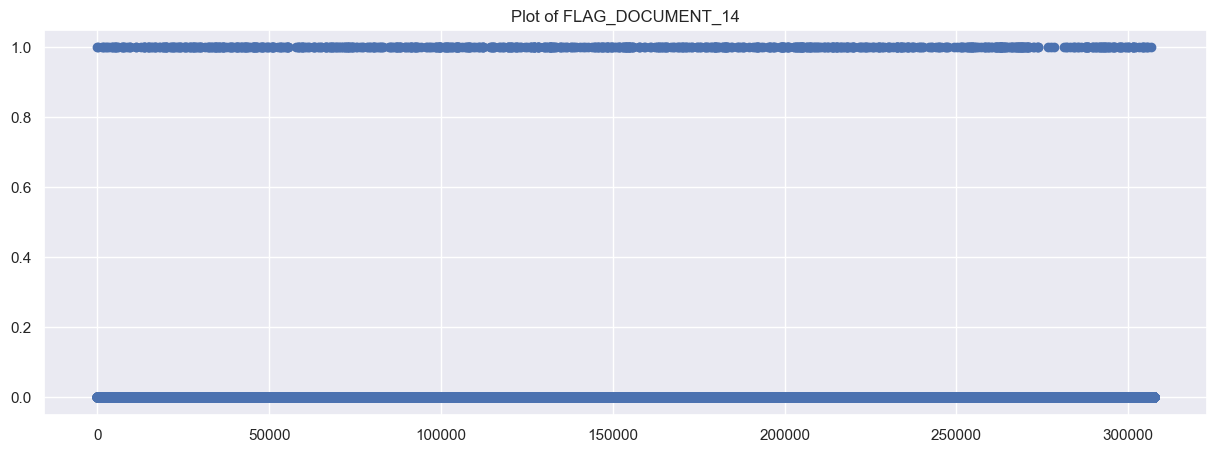

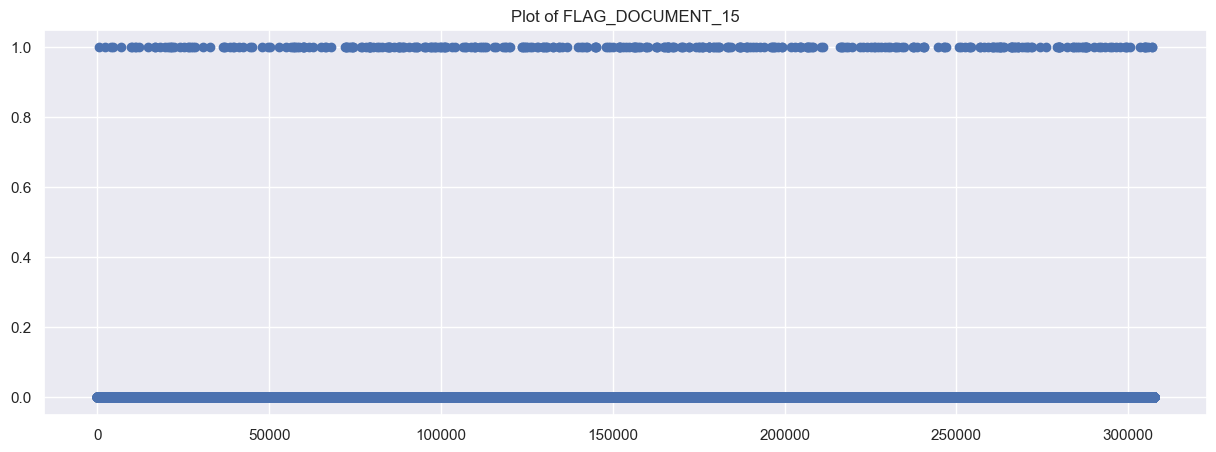

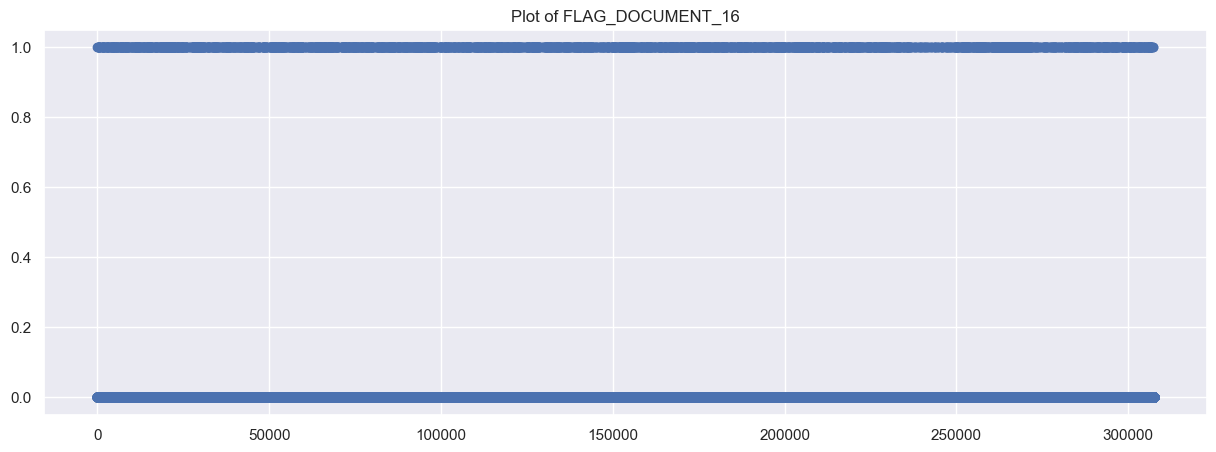

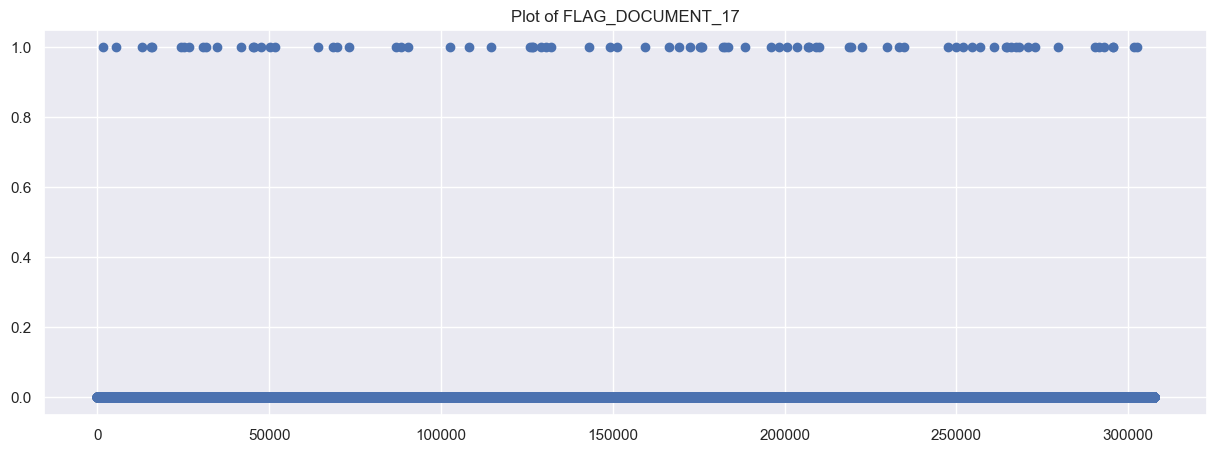

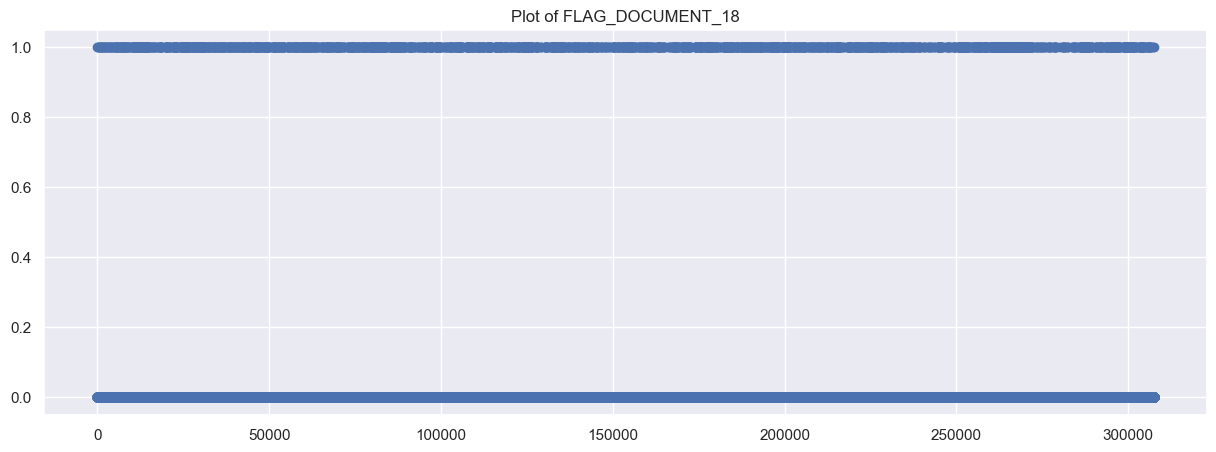

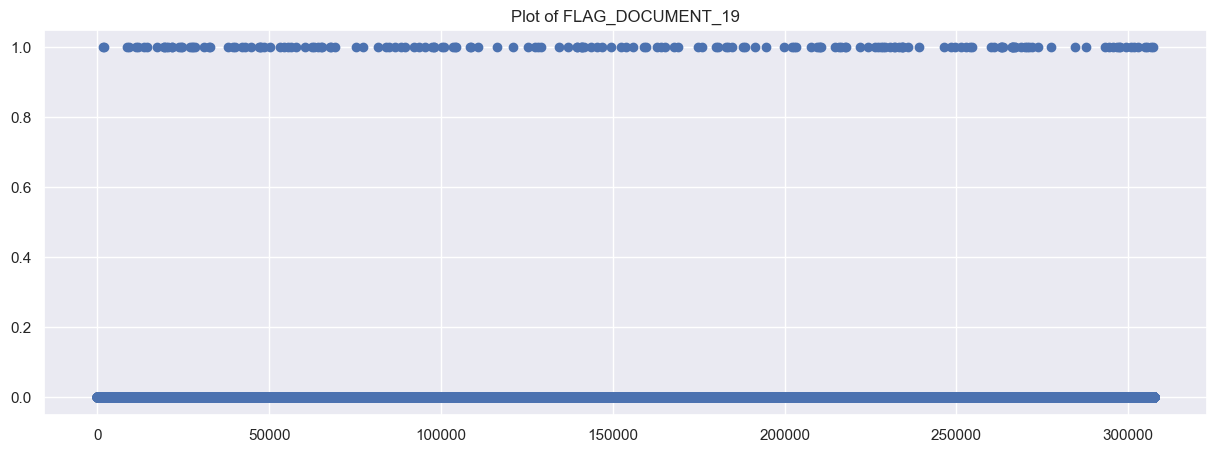

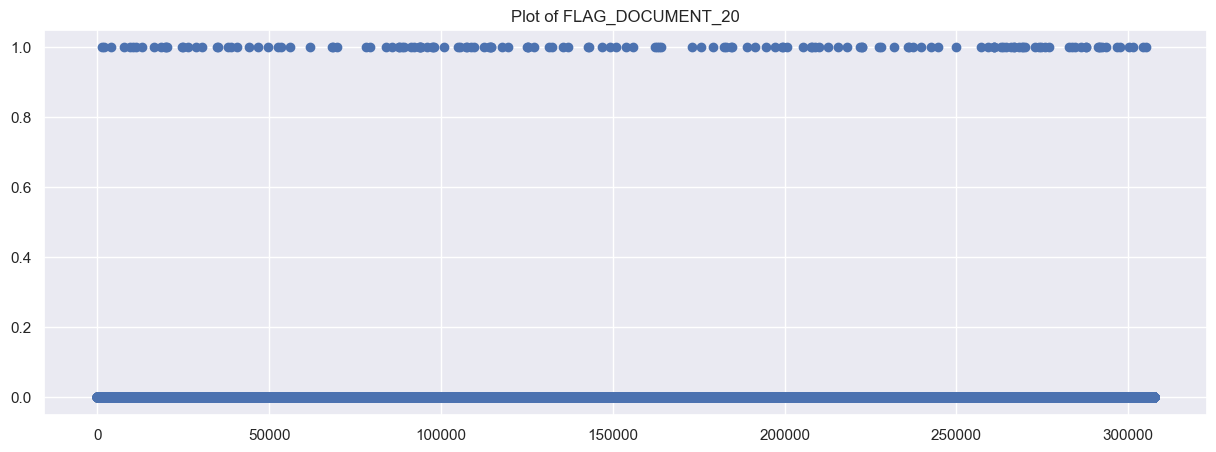

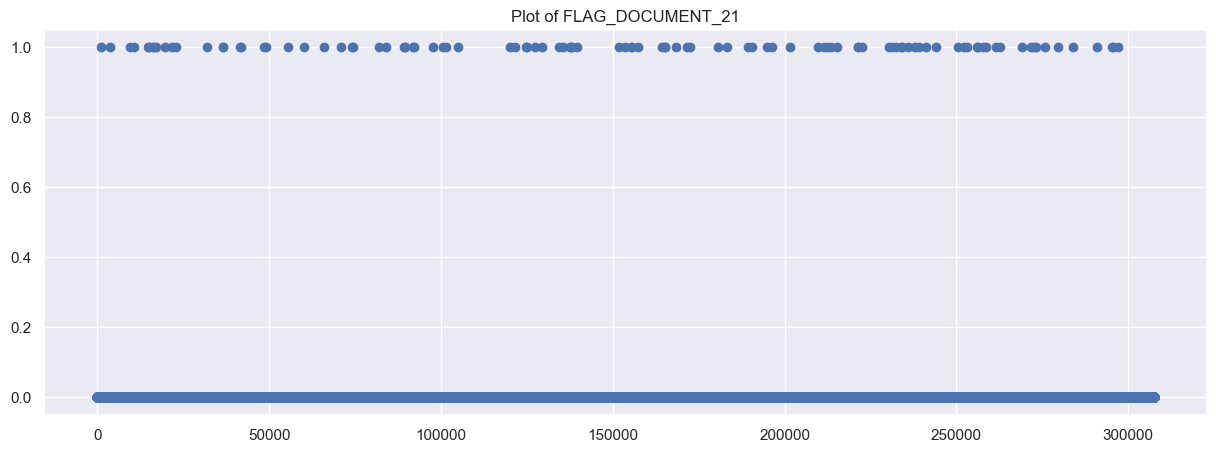

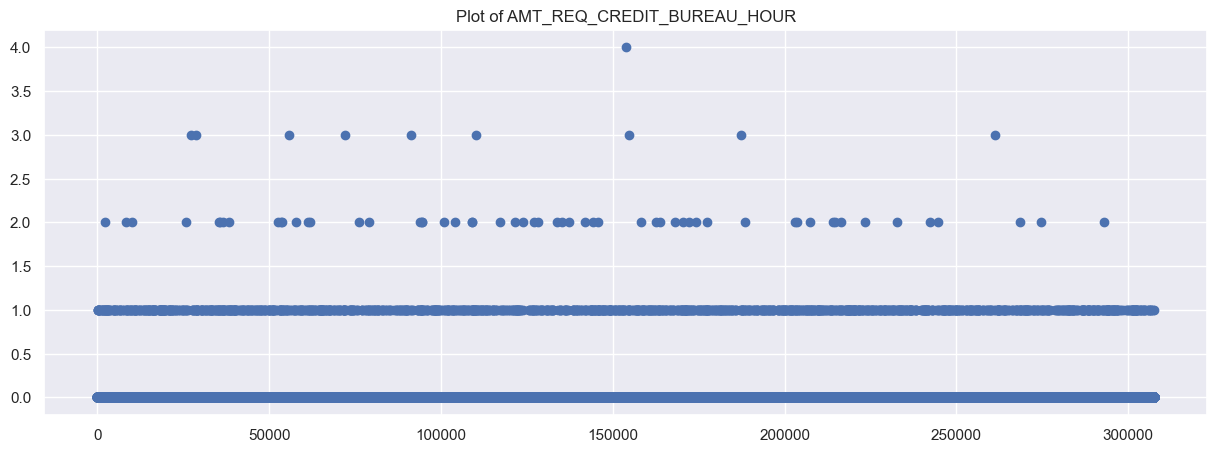

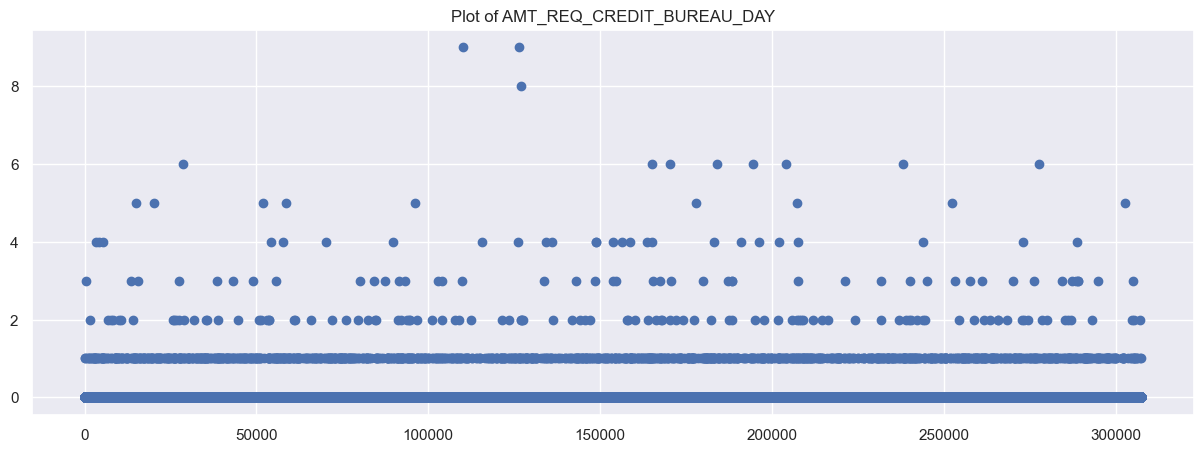

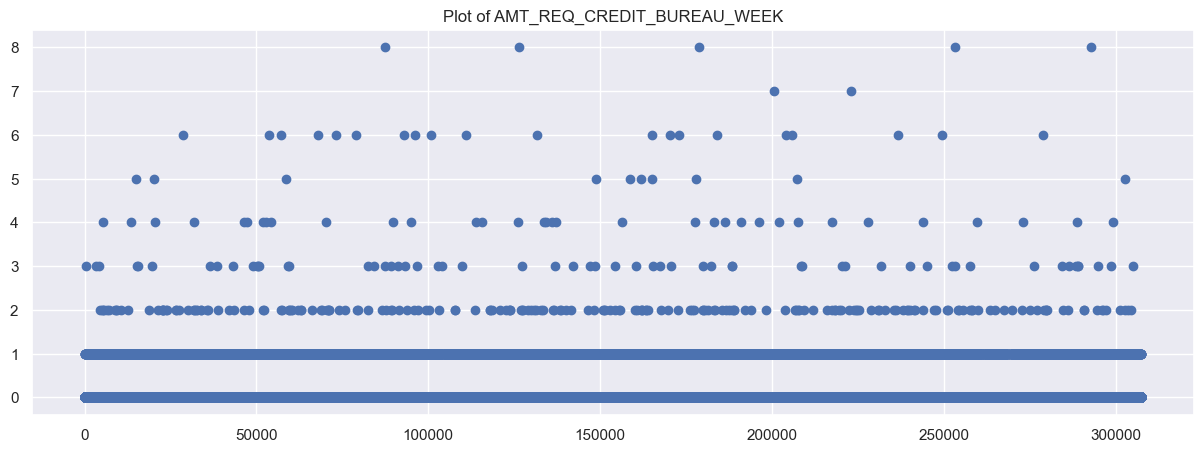

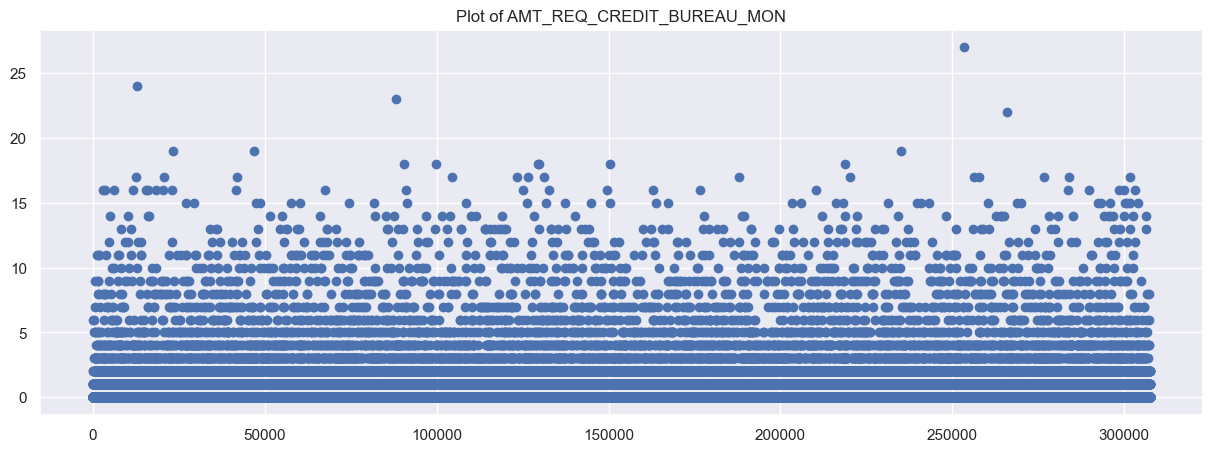

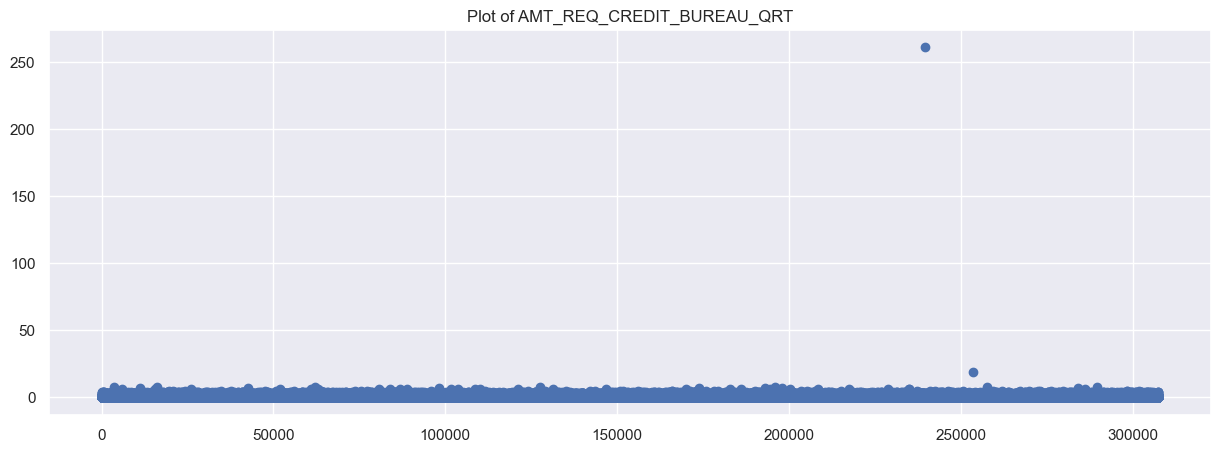

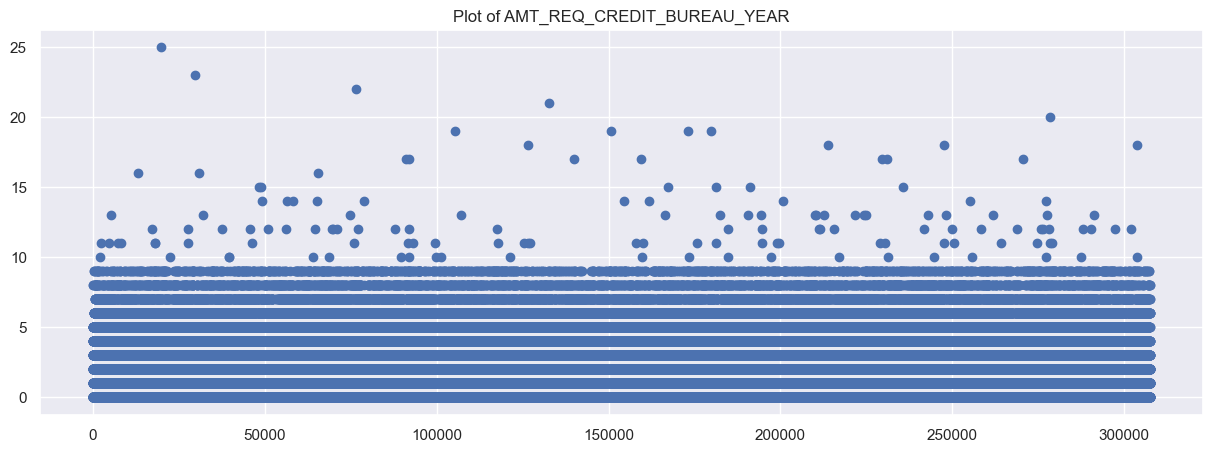

In [152]:
# Plot each numerical column against the index of the DataFrame 'train'
for column in train_categorical:
    title = "Plot of " + column
    plt.scatter(train.index, train[column])
    plt.title(title)
    plt.show()

### Column Insights 

**CNT_CHILDREN**
- This denotes the number of children a client has. Instances of clients with more than 10 children are considered extreme.

**AMT_INCOME_TOTAL**
- This represents the client's income. A particular value around 1.2e8 is notably distant from the rest, suggesting it may be an outlier suitable for removal.

**FLAG_MOBILE**
- This identifies whether a client possesses a mobile phone. Its absence may or may not be considered an outlier.
Other columns such as OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, and OBS_60_CNT_SOCIAL_CIRCLE also merit attention.

## Converting a Numerial Data to Categorical for Analysis

<Axes: xlabel='AMT_ANNUITY', ylabel='Density'>

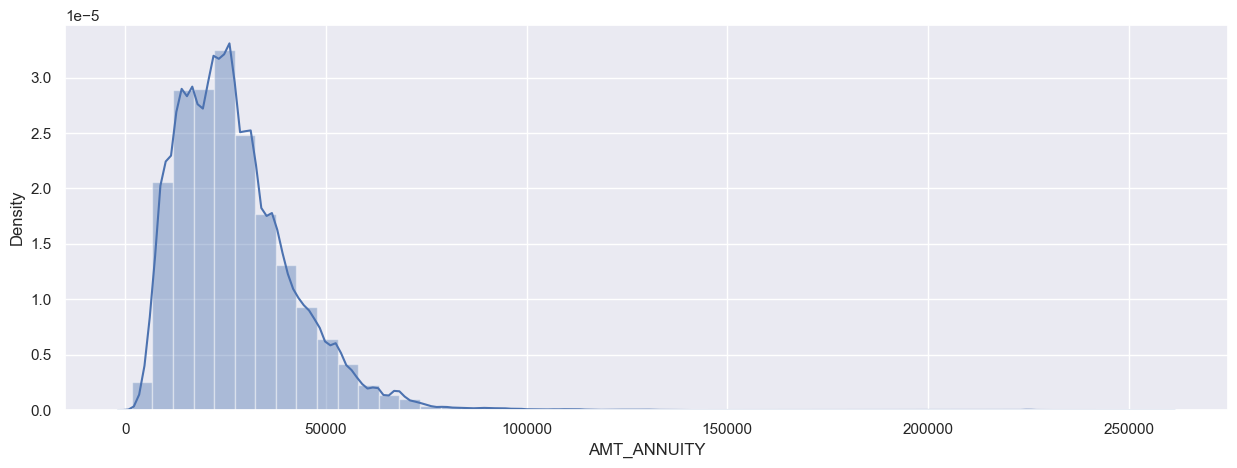

In [153]:
# Plot a distribution plot for the 'AMT_ANNUITY' column after removing any missing values
sns.distplot(train['AMT_ANNUITY'].dropna())

In [154]:
def amt_annuity(x):
    if x <= 20000:
        return 'low'
    elif x > 20000 and x <= 50000:
        return 'medium'
    elif x > 50000 and x <= 100000:
        return 'high'
    else:
        return 'very high'

# Apply the 'amt_annuity' function to create a new categorical column 'amt_annuity_categorical'
train['amt_annuity_categorical'] = train['AMT_ANNUITY'].apply(lambda x: amt_annuity(x))

<Axes: xlabel='amt_annuity_categorical', ylabel='count'>

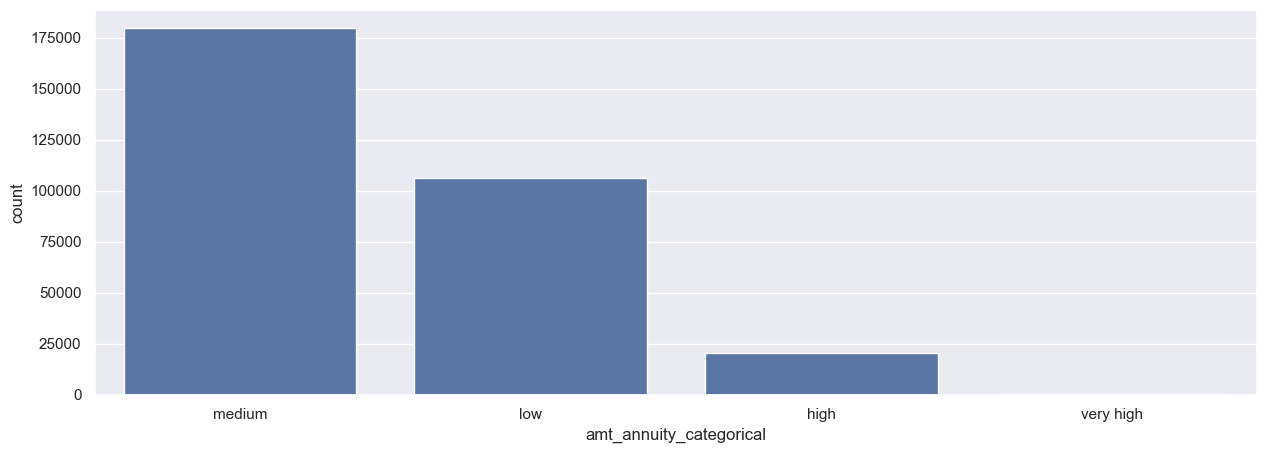

In [155]:
# Plot a count plot of the 'amt_annuity_categorical' column
sns.countplot(x='amt_annuity_categorical', data=train)

# Univariate Analysis for Numerical Data

Plot of SK_ID_CURR


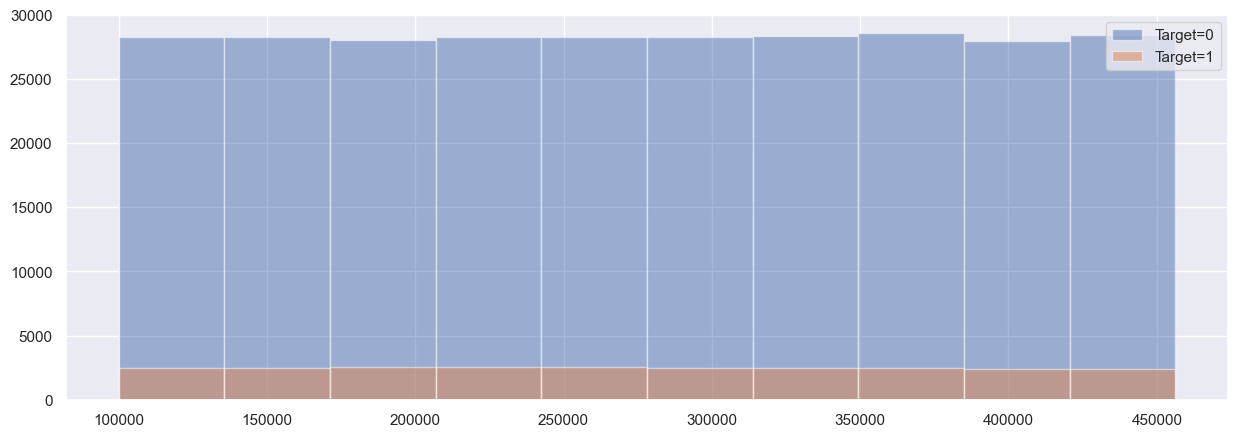

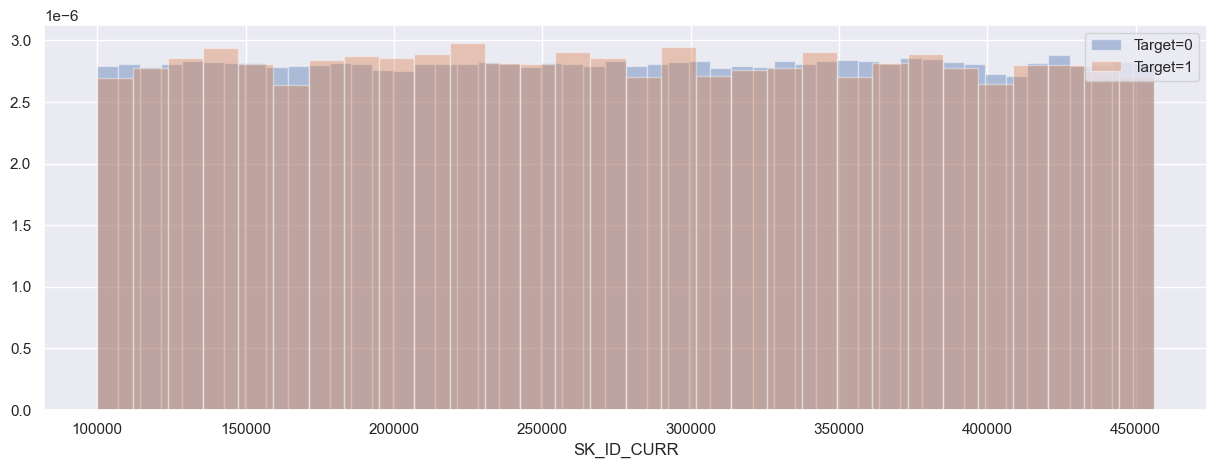

------------------------------------------------------------------------
Plot of CNT_CHILDREN


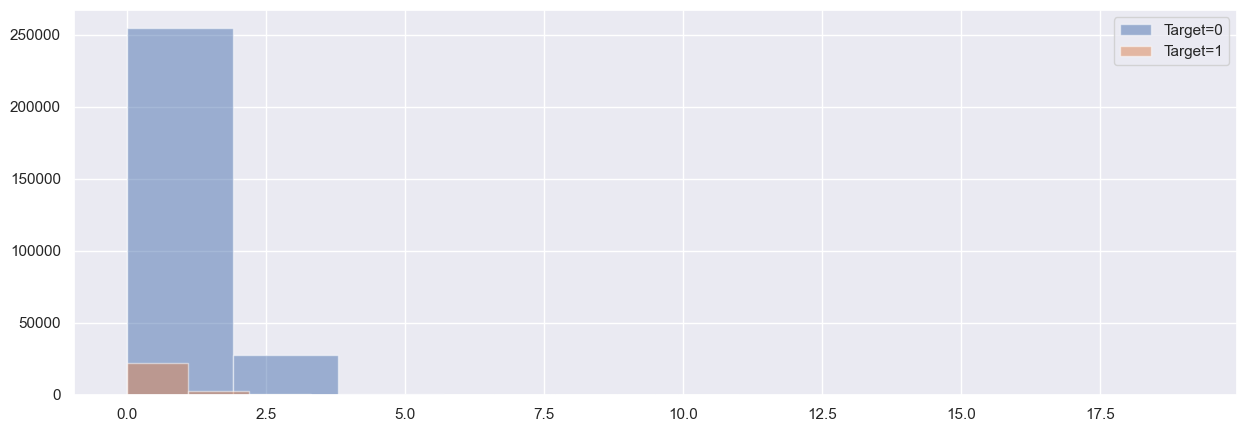

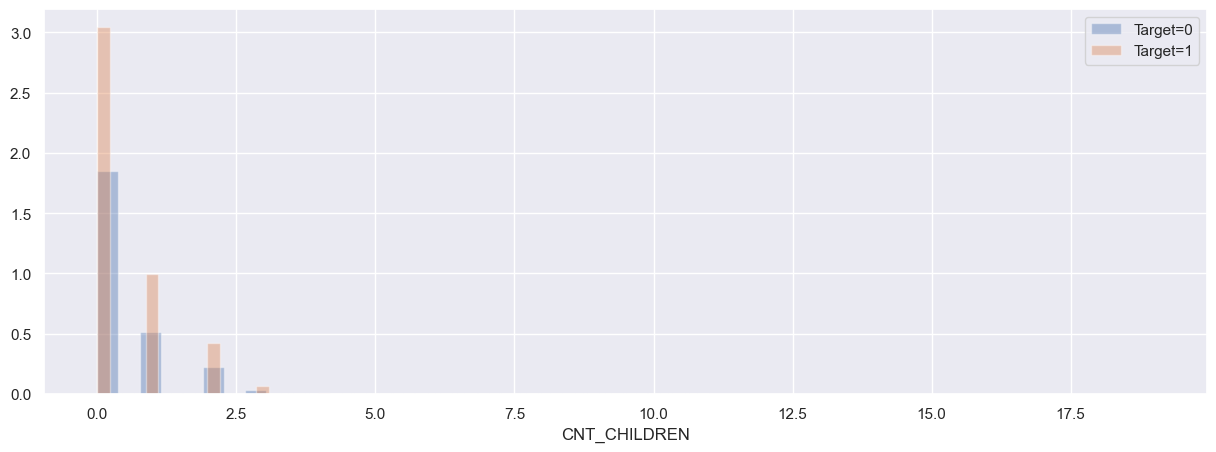

------------------------------------------------------------------------
Plot of AMT_INCOME_TOTAL


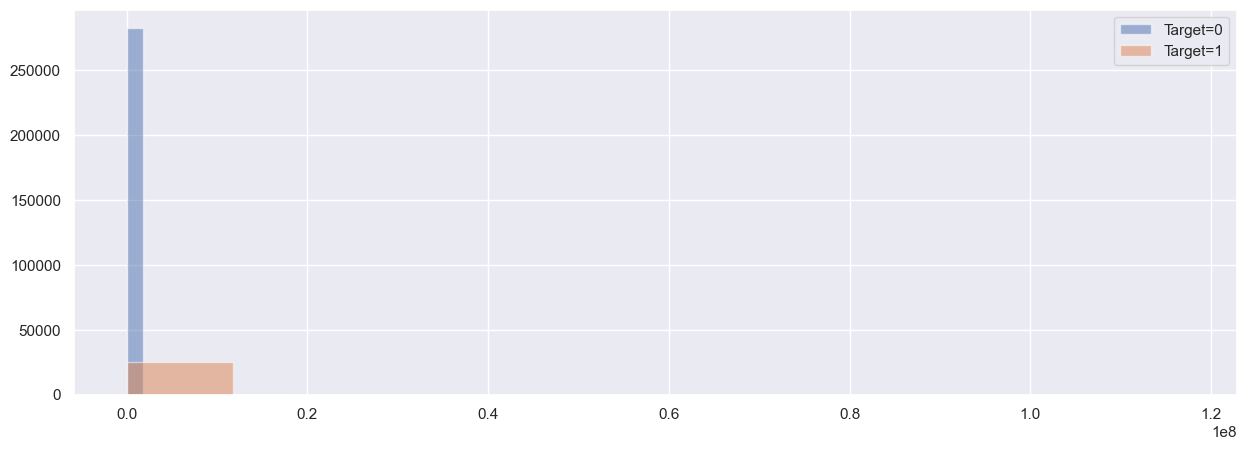

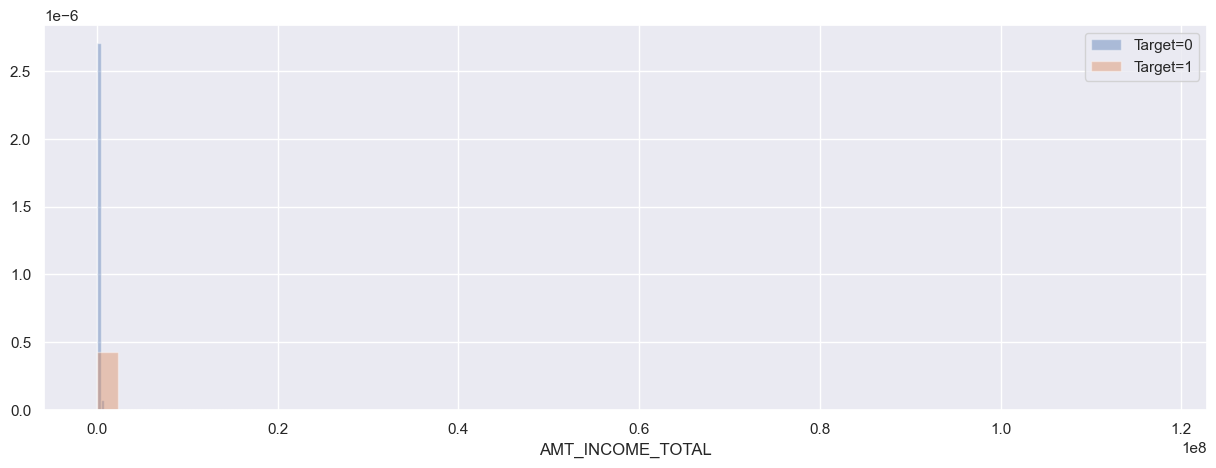

------------------------------------------------------------------------
Plot of AMT_CREDIT


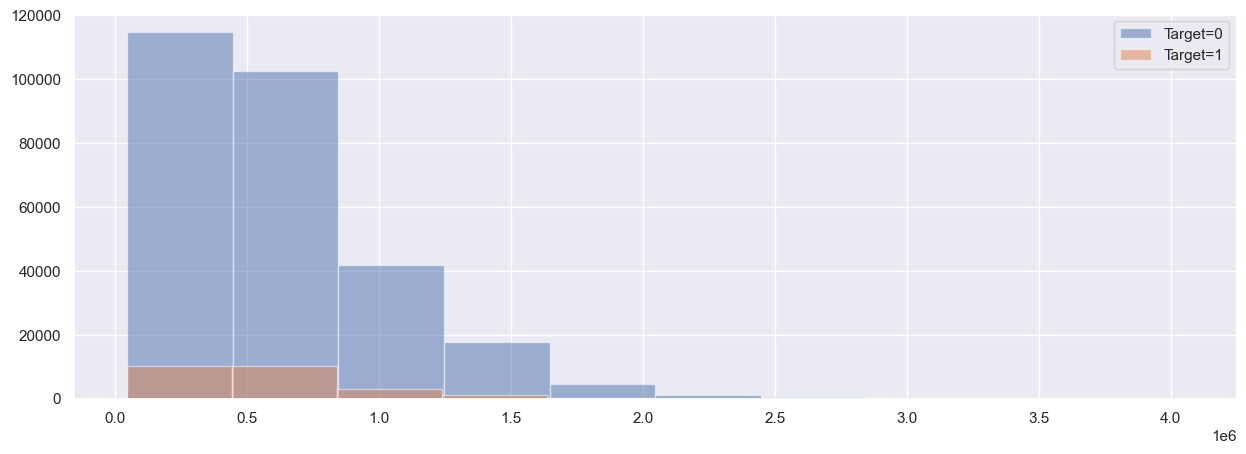

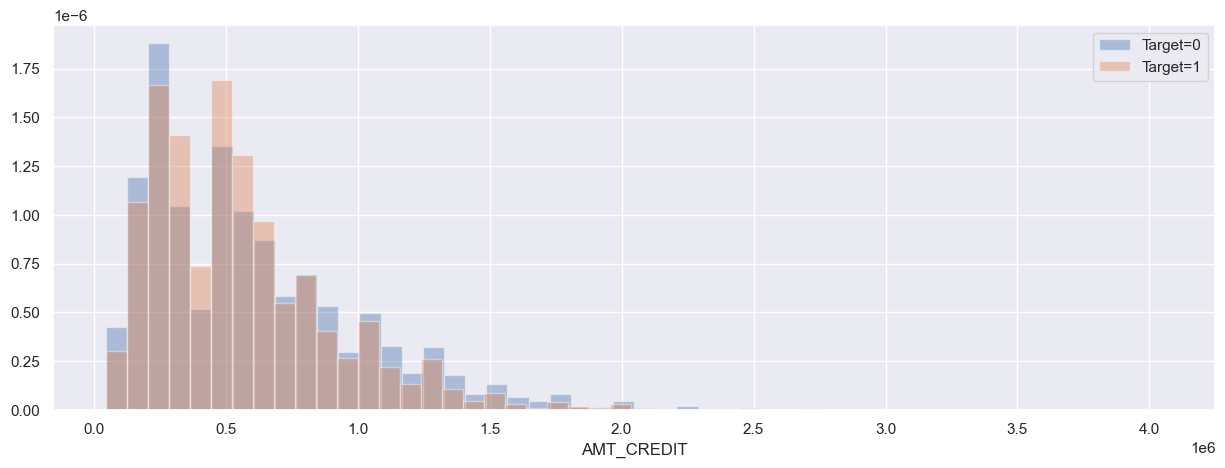

------------------------------------------------------------------------
Plot of AMT_ANNUITY


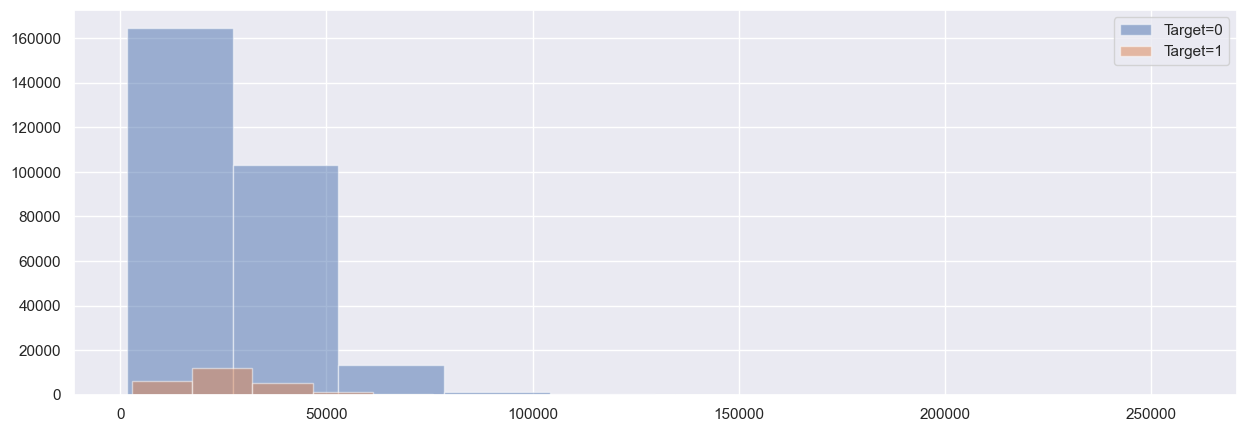

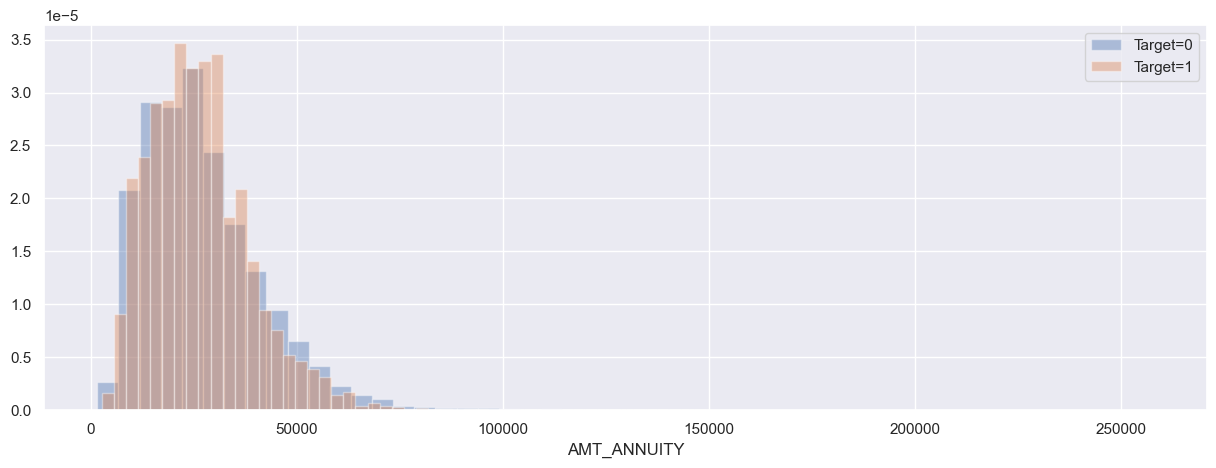

------------------------------------------------------------------------
Plot of AMT_GOODS_PRICE


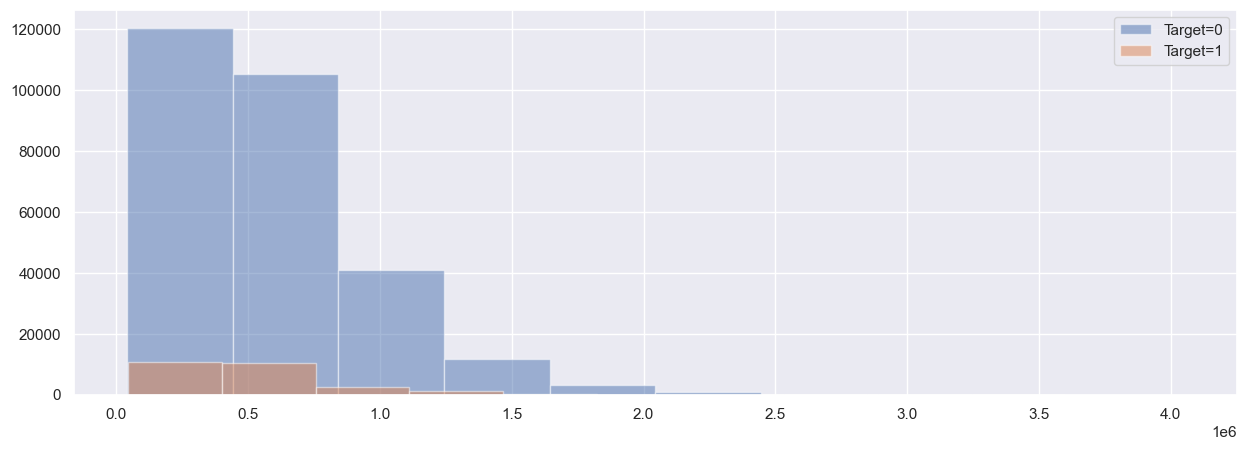

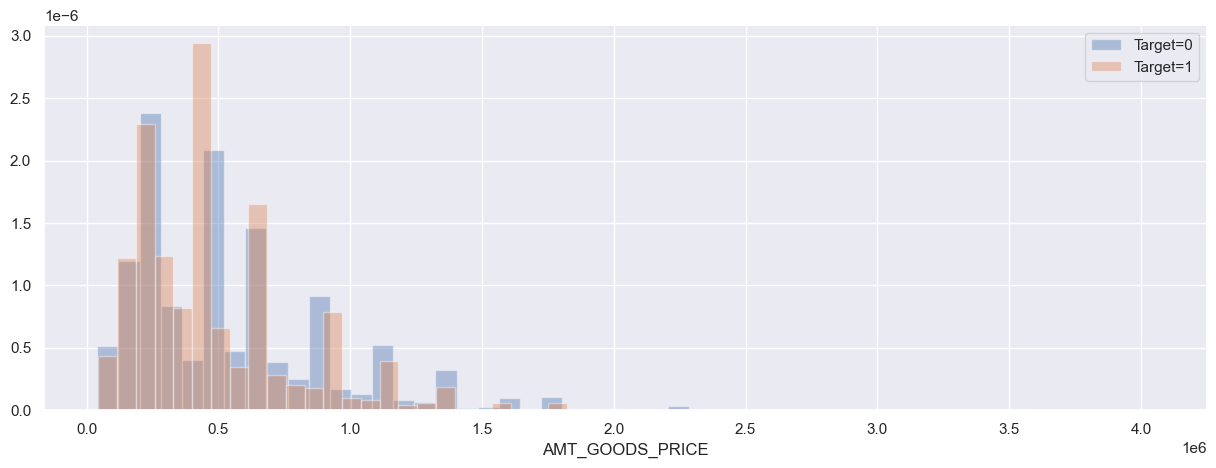

------------------------------------------------------------------------
Plot of REGION_POPULATION_RELATIVE


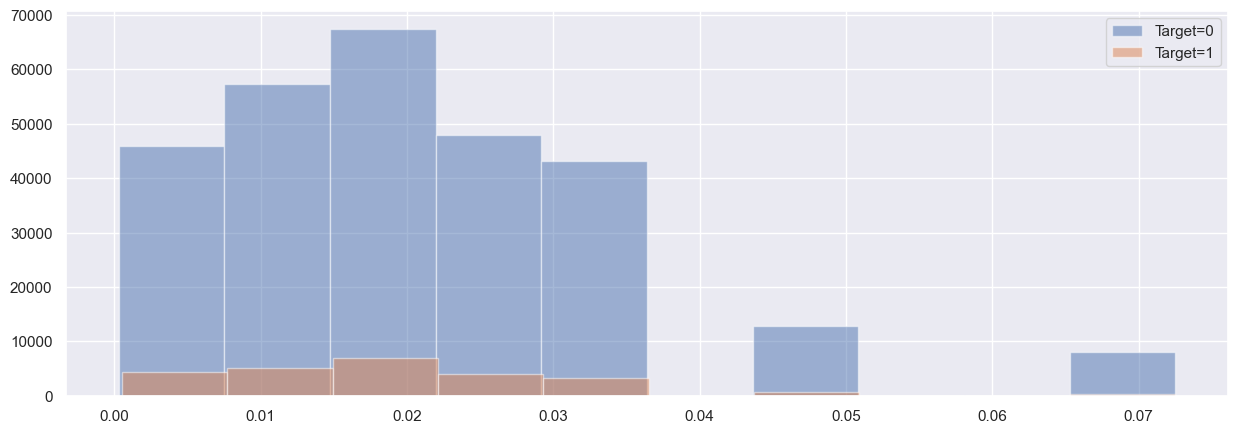

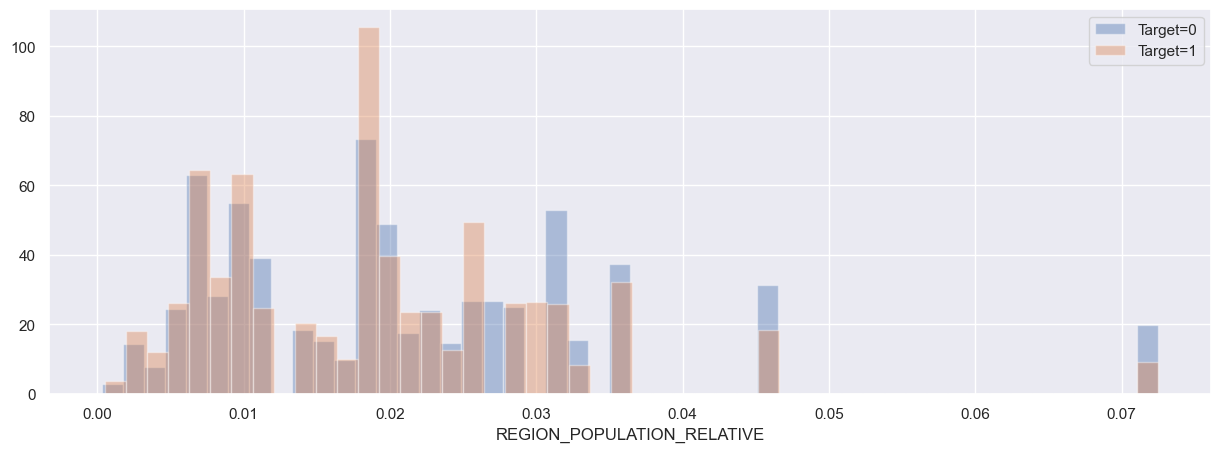

------------------------------------------------------------------------
Plot of DAYS_BIRTH


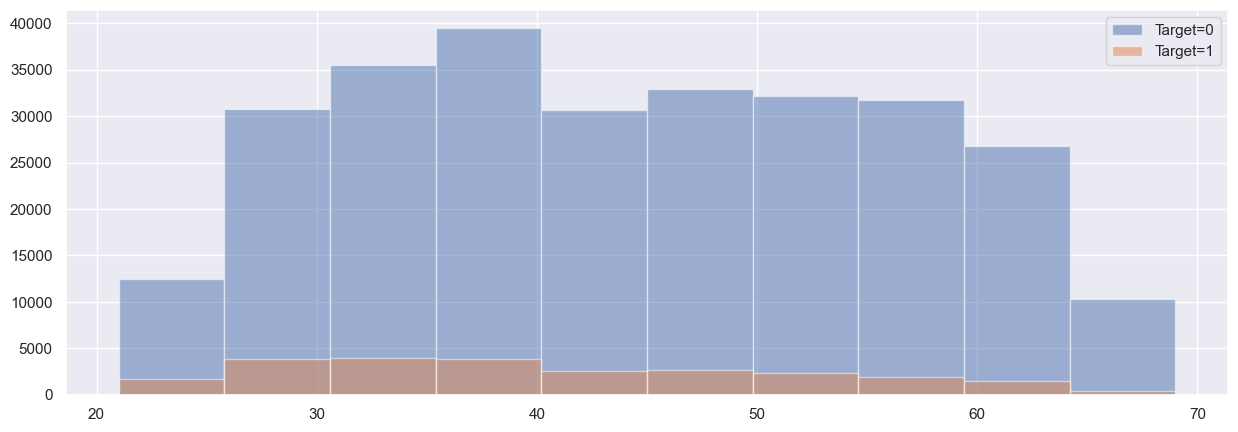

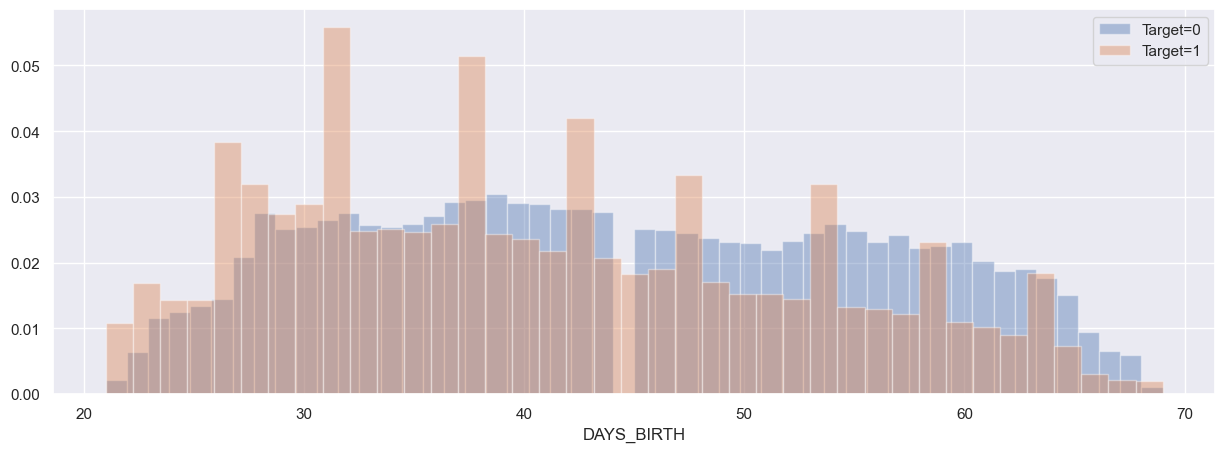

------------------------------------------------------------------------
Plot of DAYS_EMPLOYED


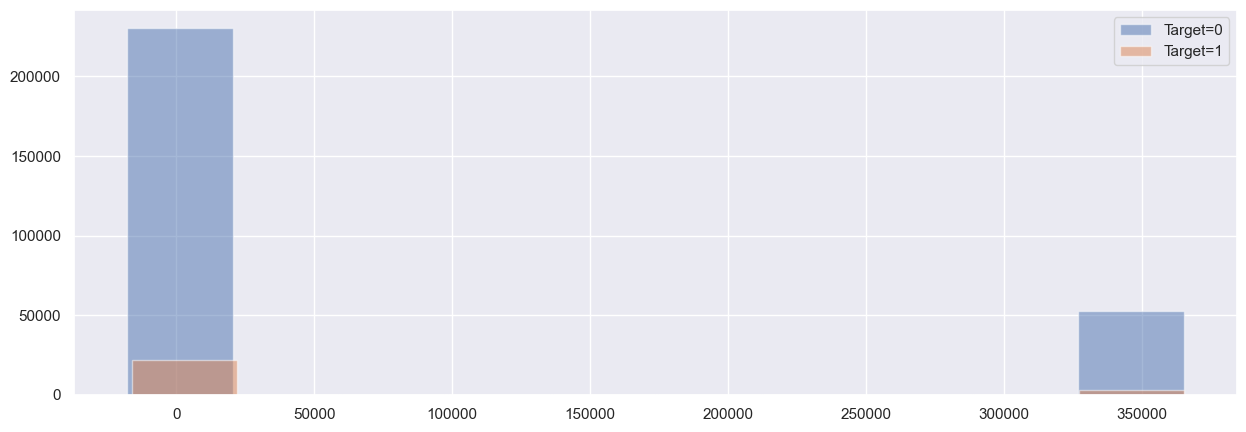

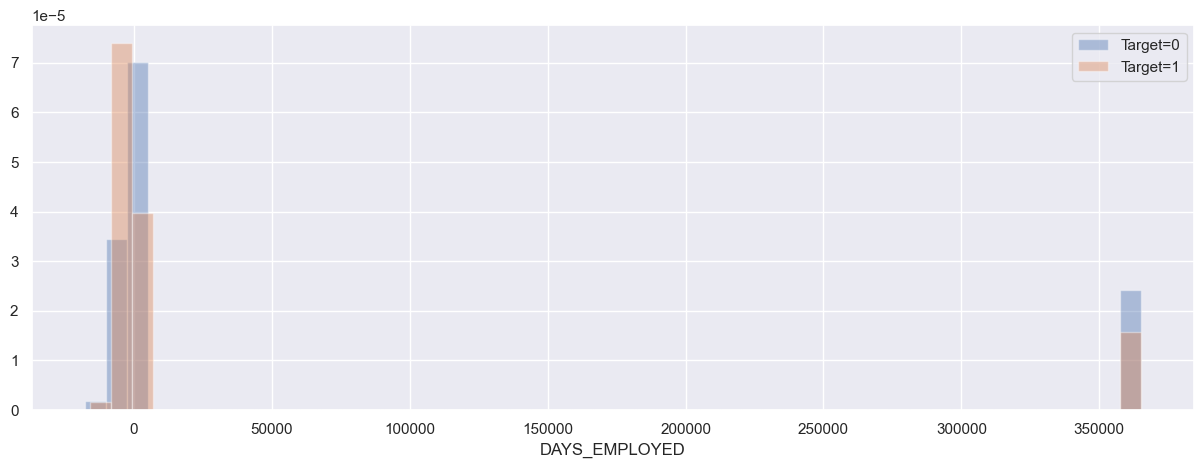

------------------------------------------------------------------------
Plot of DAYS_REGISTRATION


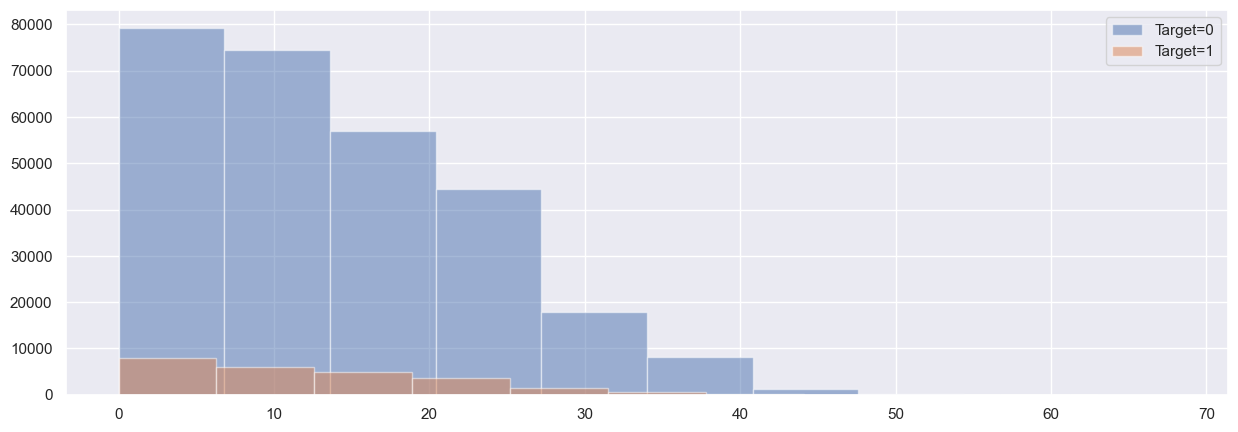

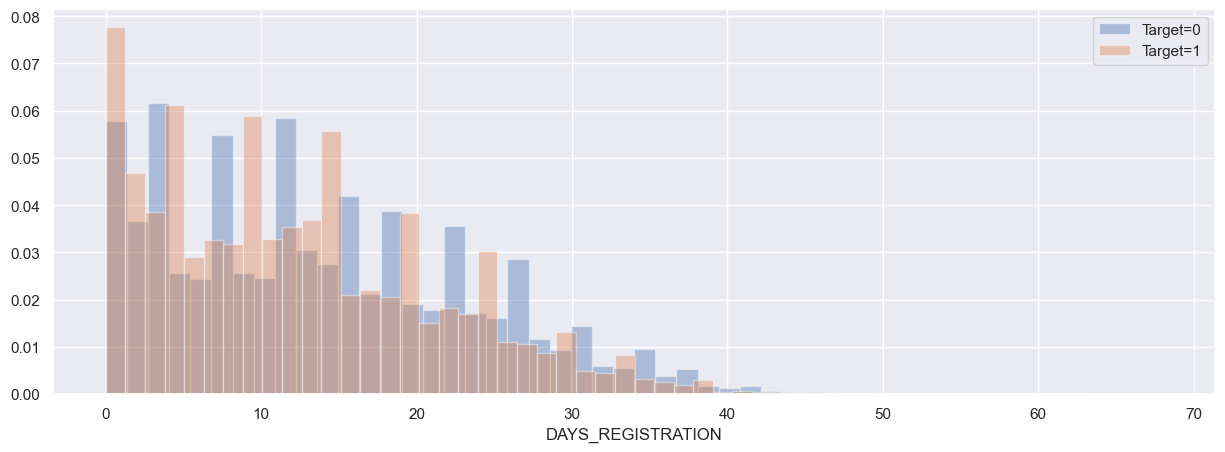

------------------------------------------------------------------------
Plot of DAYS_ID_PUBLISH


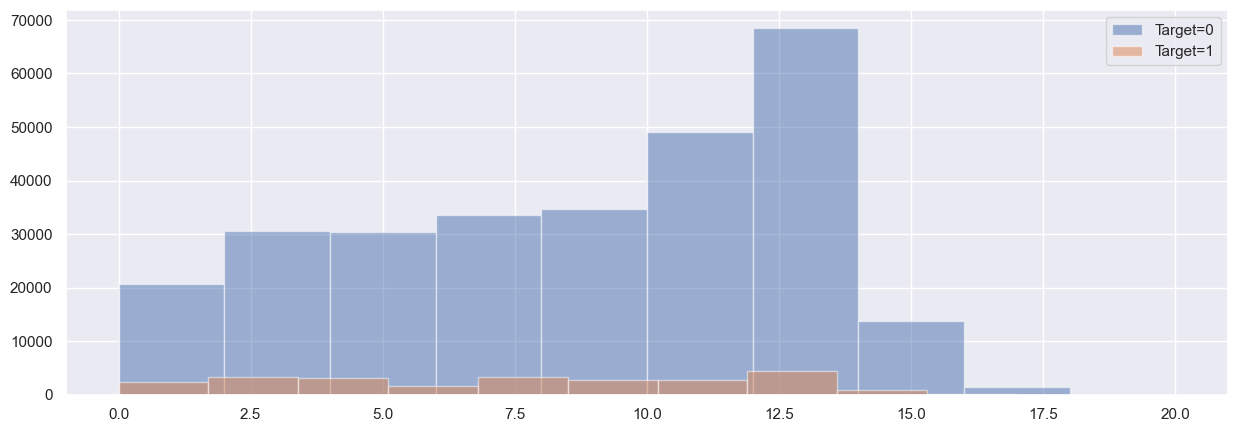

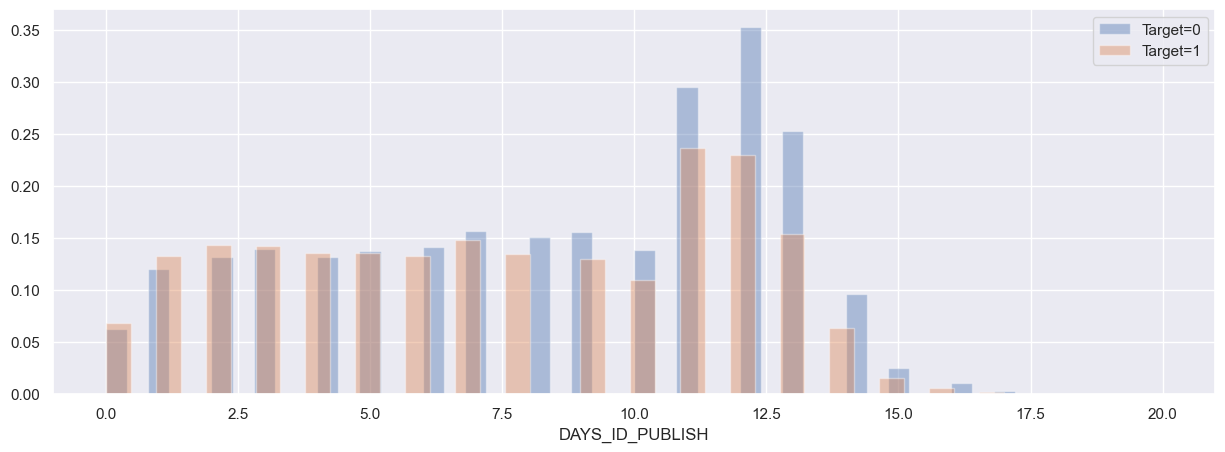

------------------------------------------------------------------------
Plot of FLAG_MOBIL


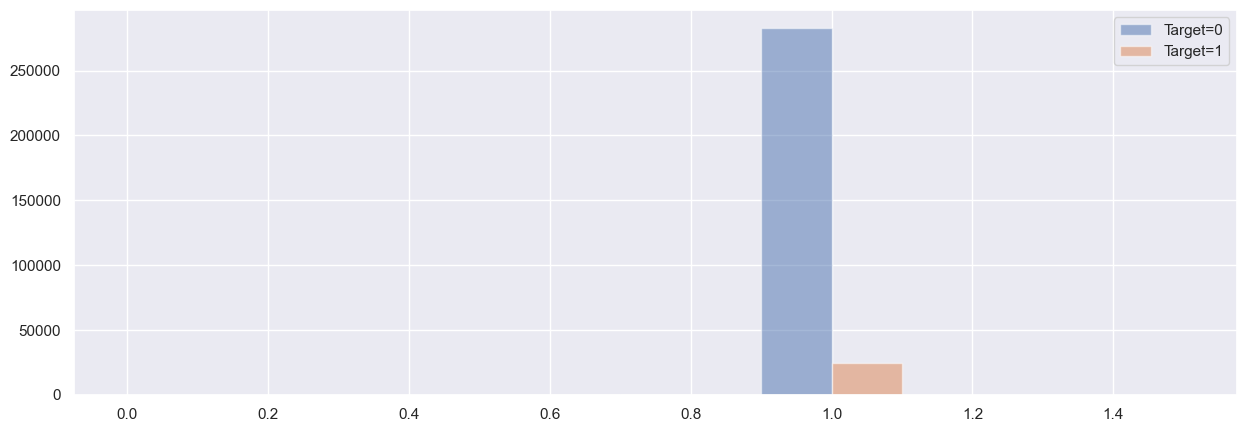

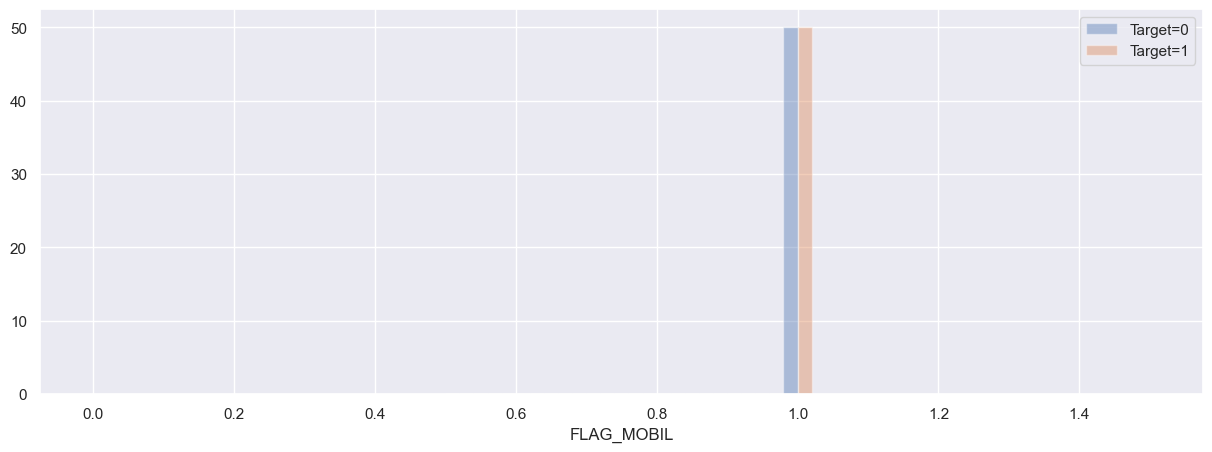

------------------------------------------------------------------------
Plot of FLAG_EMP_PHONE


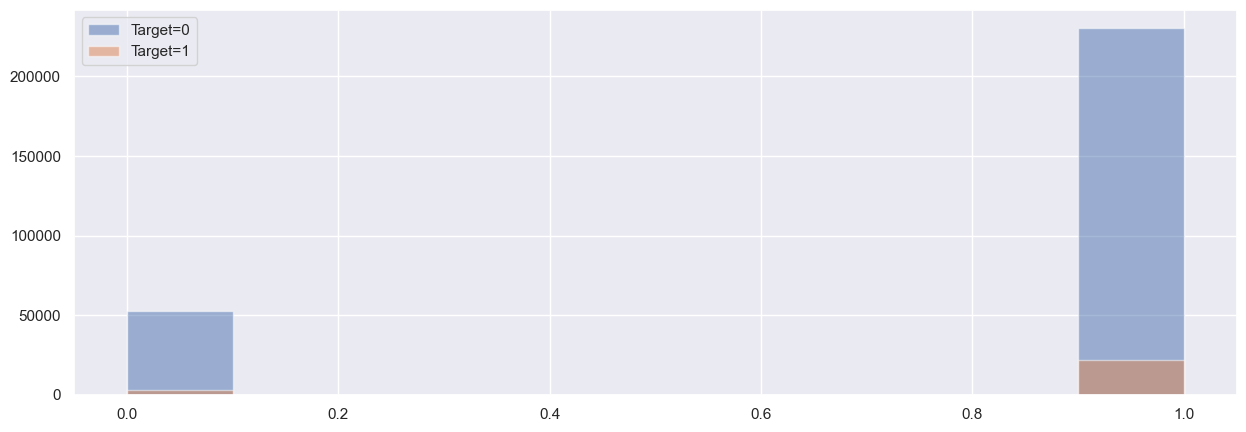

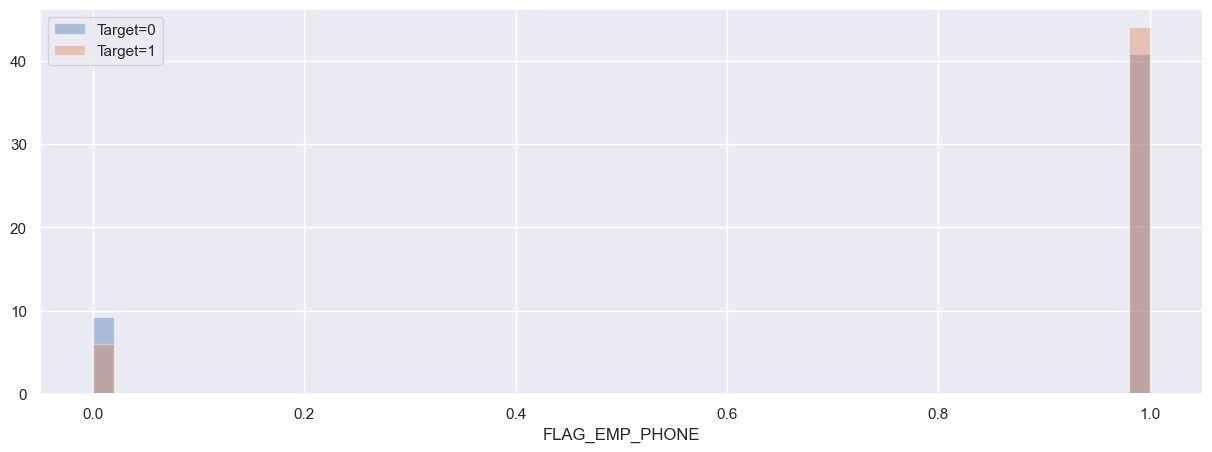

------------------------------------------------------------------------
Plot of FLAG_WORK_PHONE


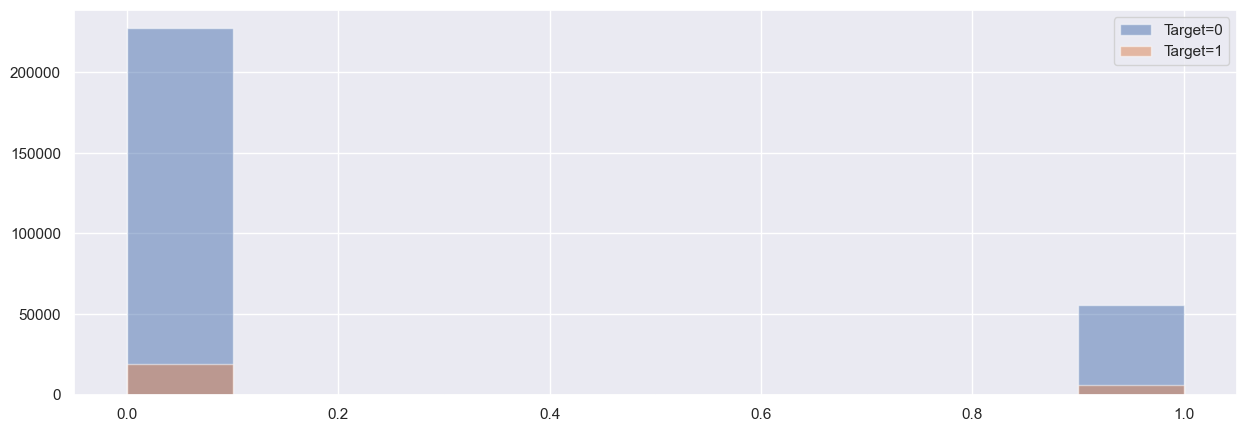

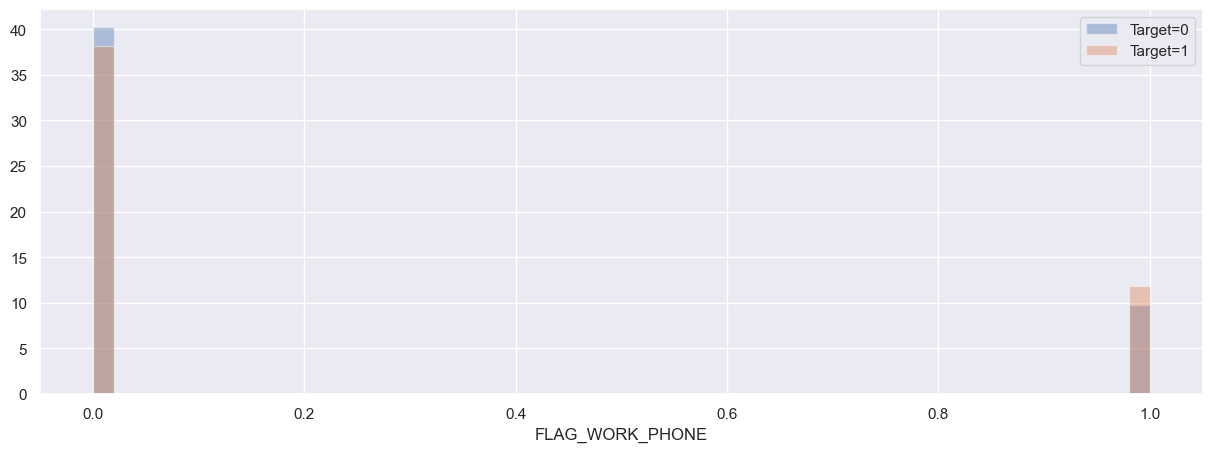

------------------------------------------------------------------------
Plot of FLAG_CONT_MOBILE


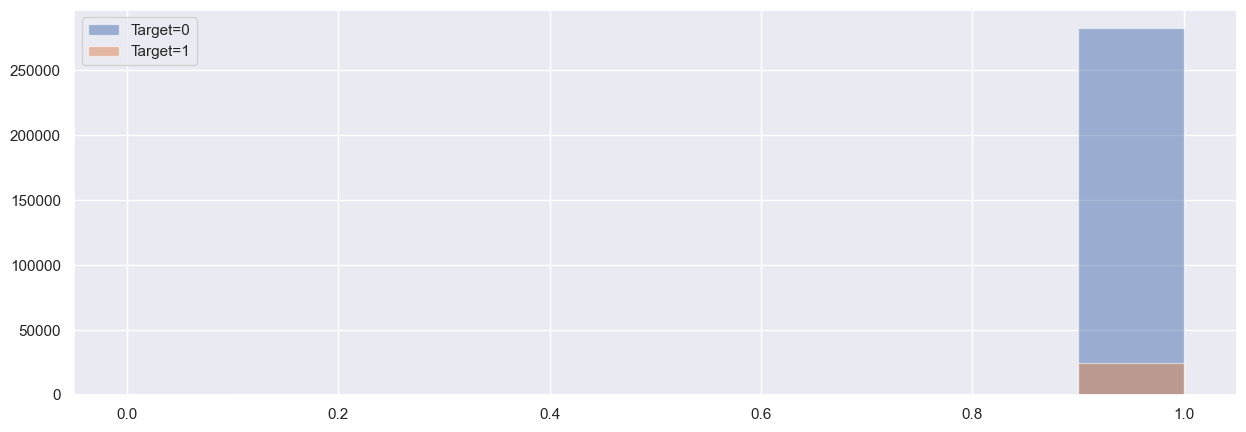

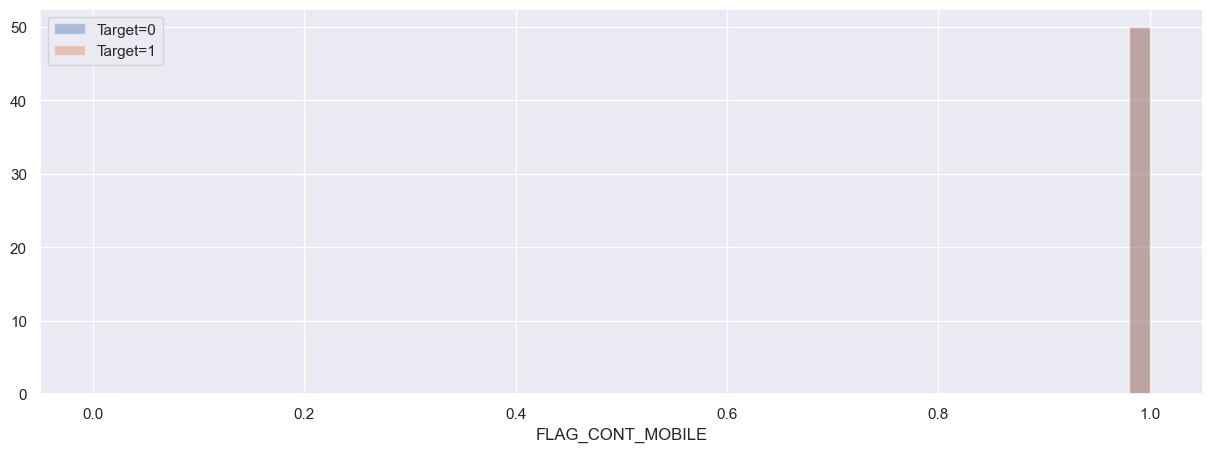

------------------------------------------------------------------------
Plot of FLAG_PHONE


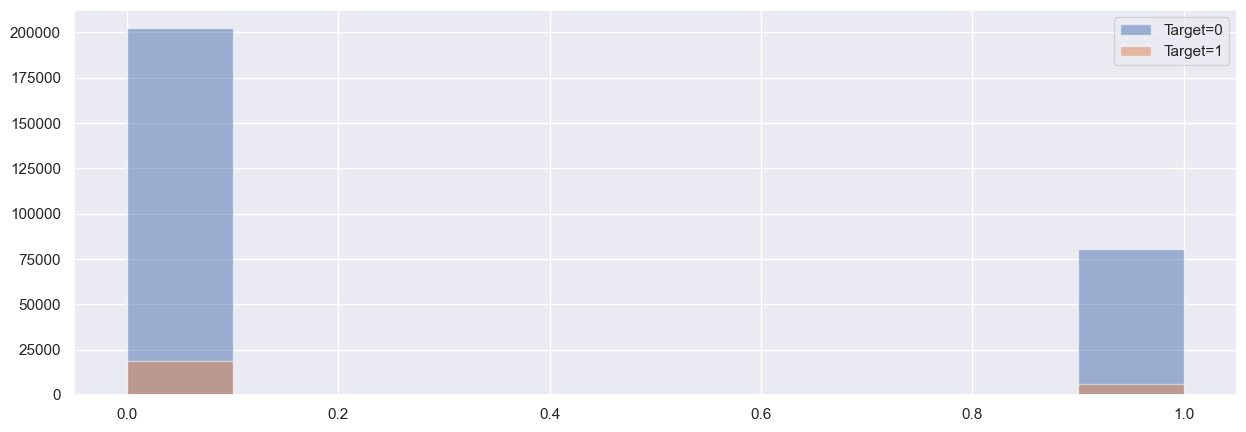

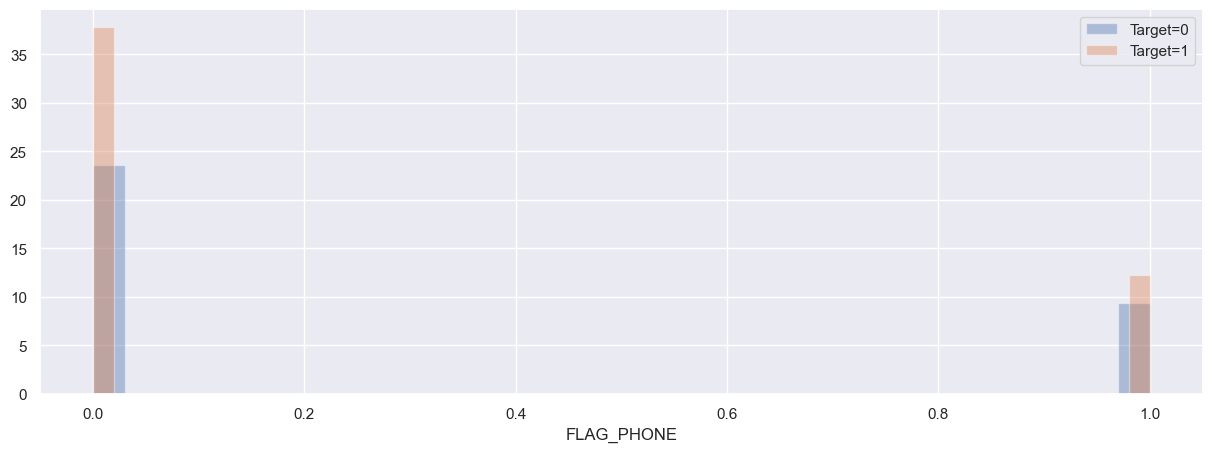

------------------------------------------------------------------------
Plot of FLAG_EMAIL


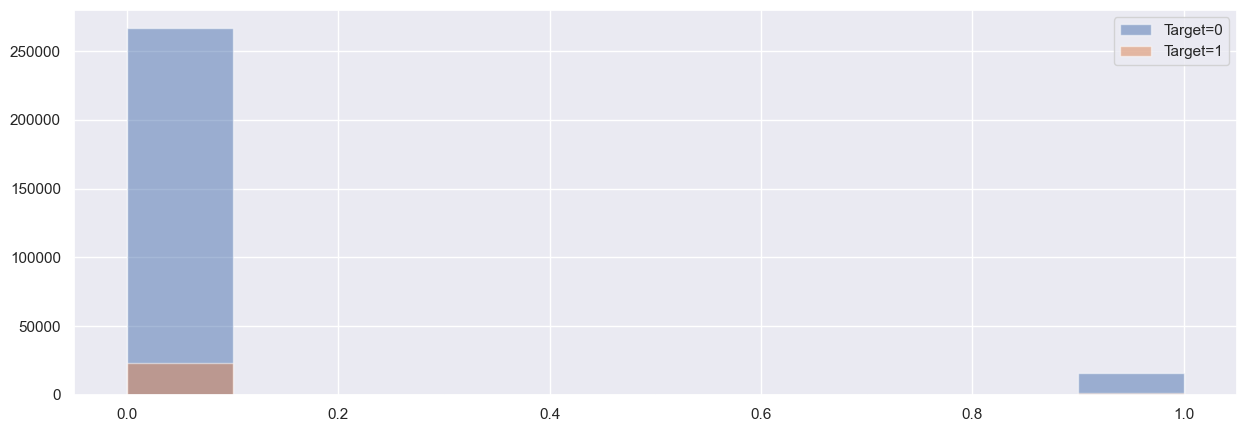

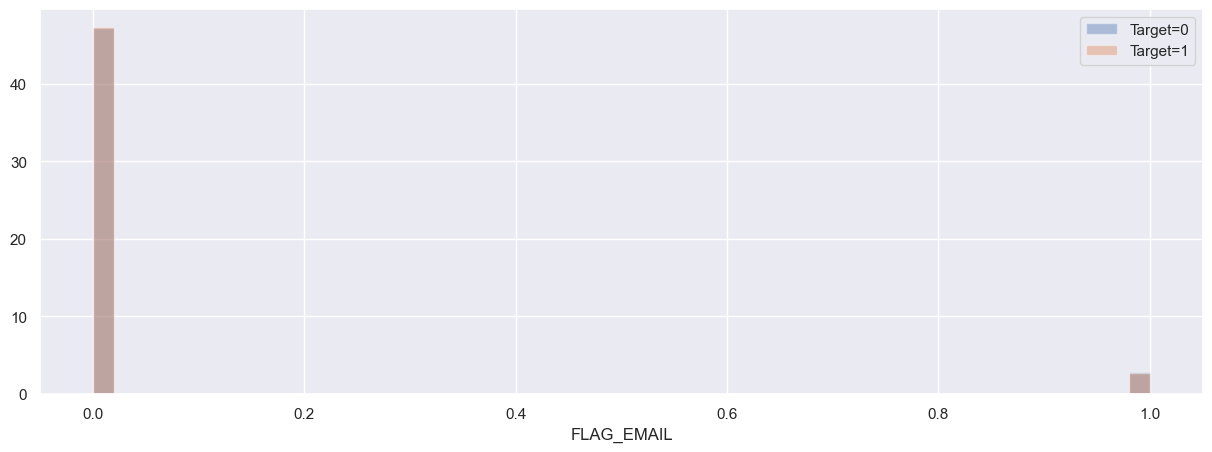

------------------------------------------------------------------------
Plot of CNT_FAM_MEMBERS


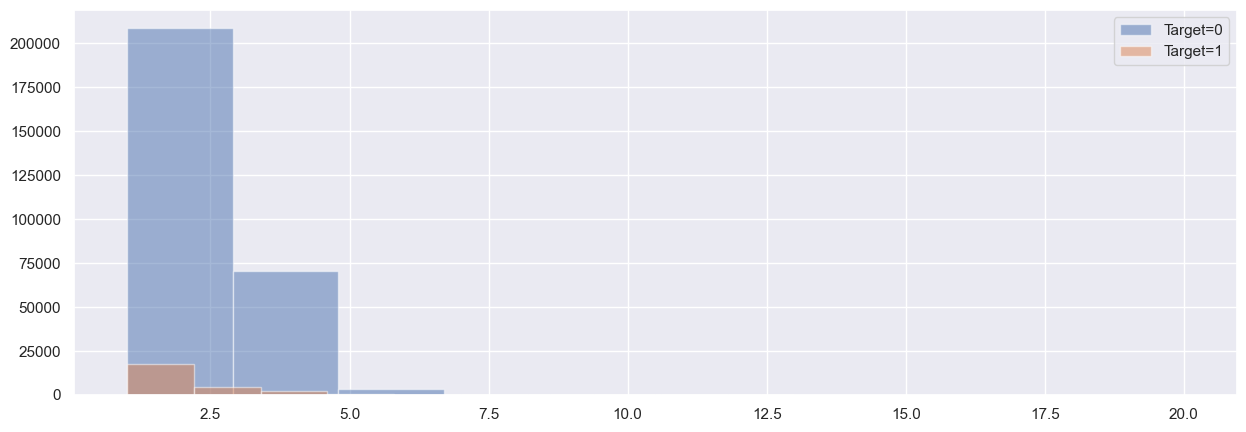

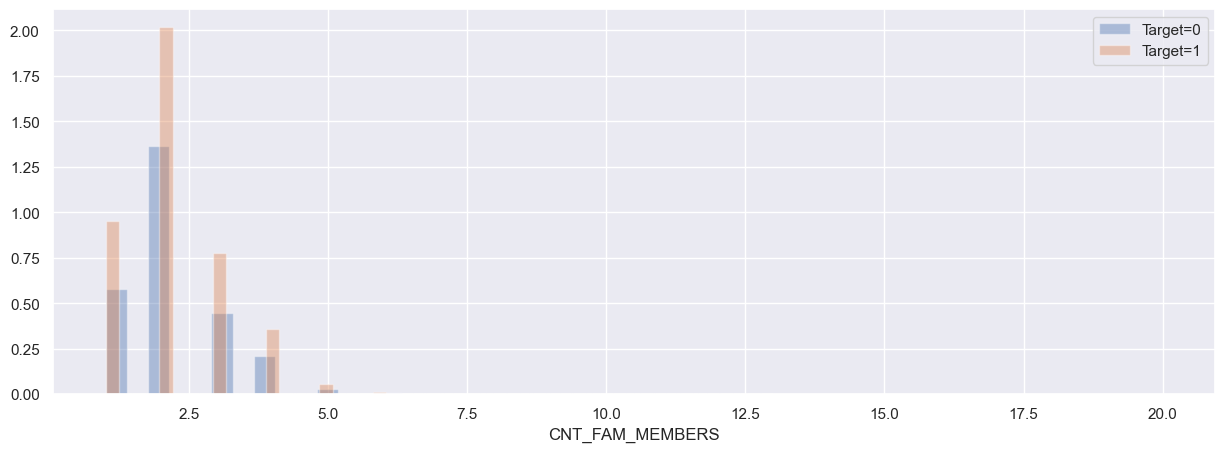

------------------------------------------------------------------------
Plot of REGION_RATING_CLIENT


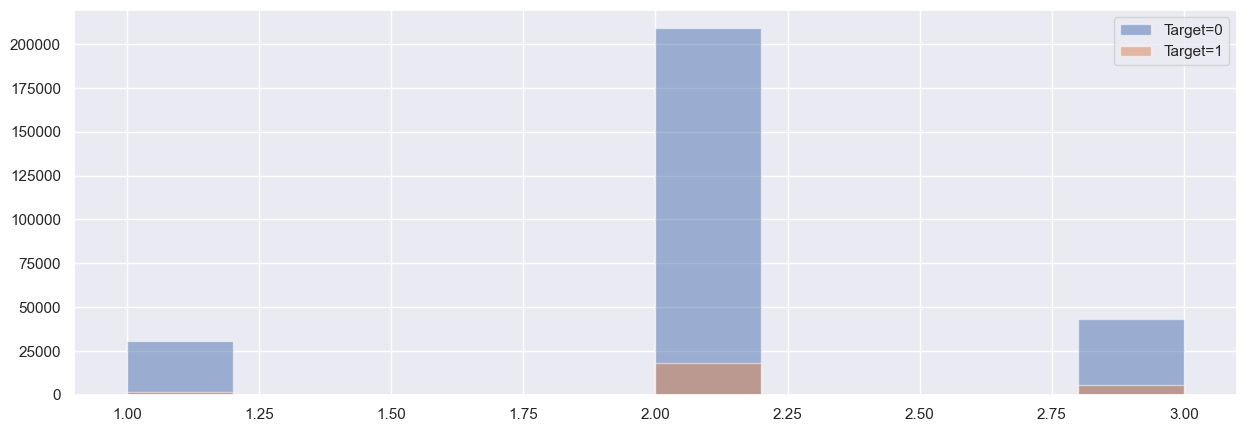

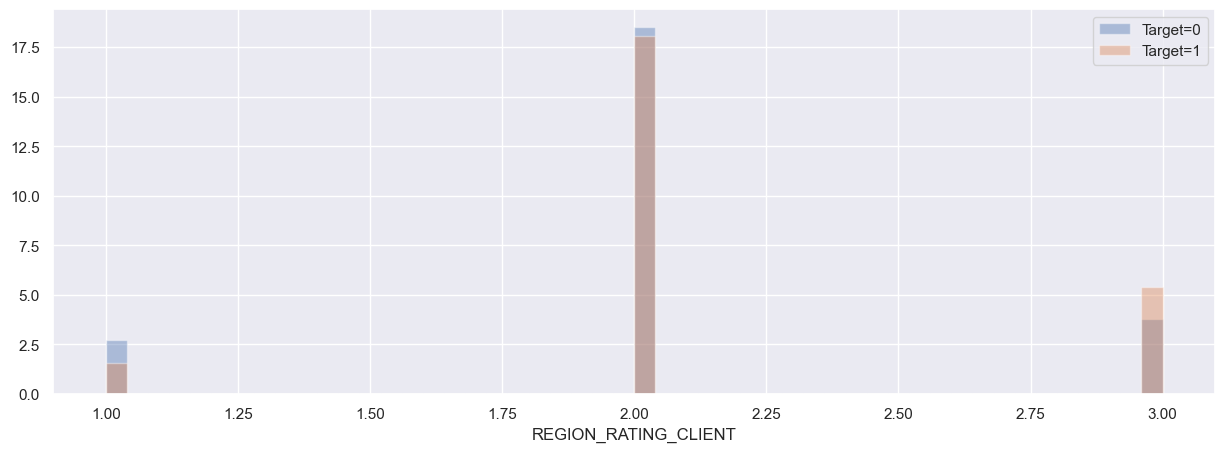

------------------------------------------------------------------------
Plot of REGION_RATING_CLIENT_W_CITY


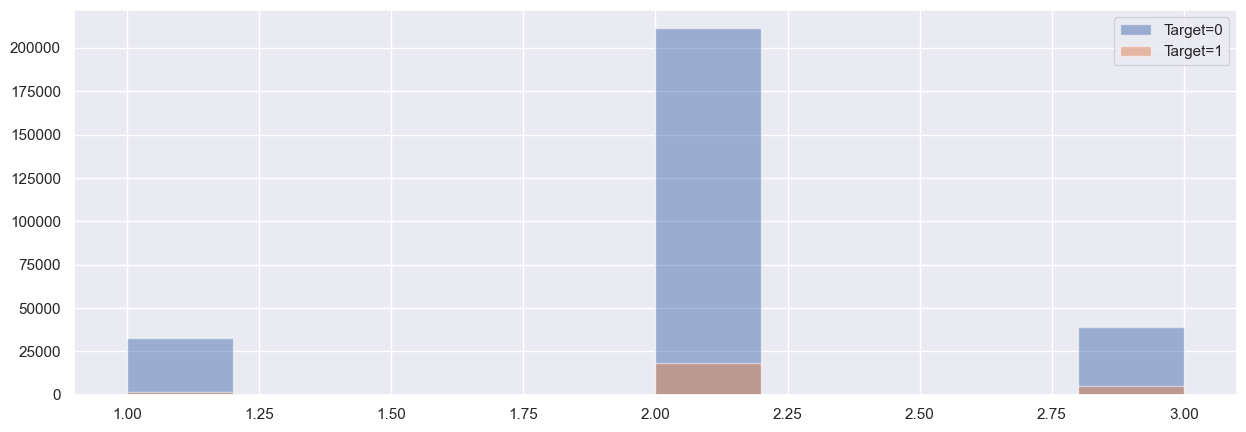

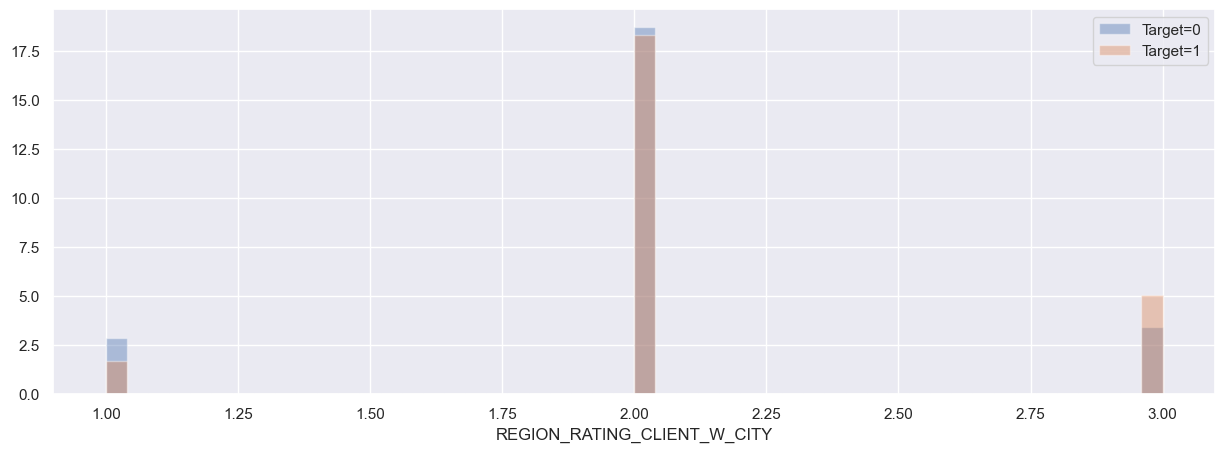

------------------------------------------------------------------------
Plot of HOUR_APPR_PROCESS_START


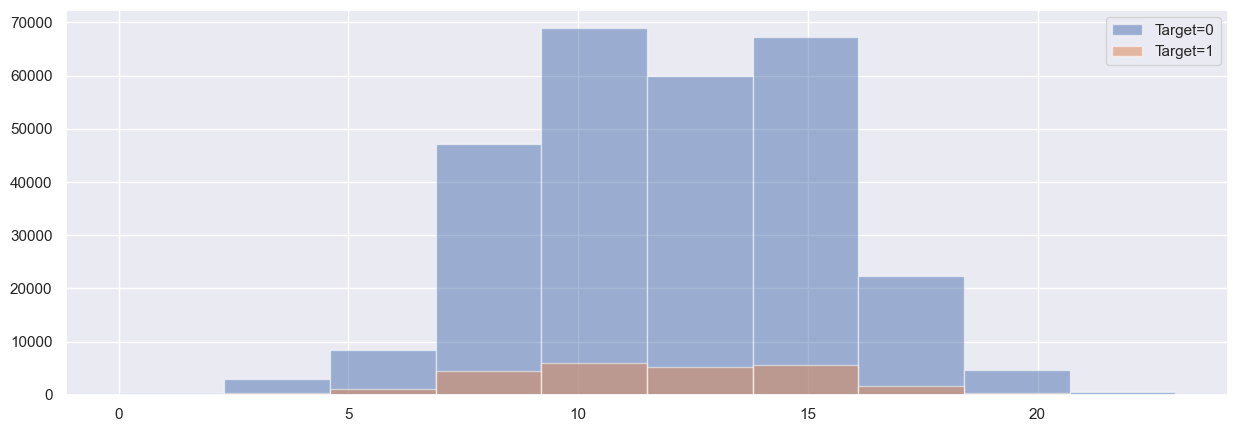

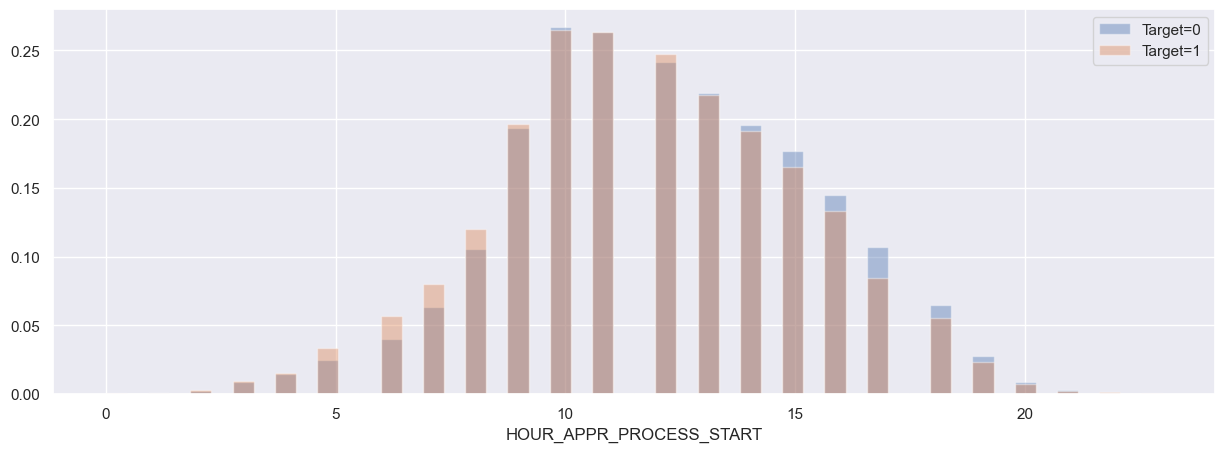

------------------------------------------------------------------------
Plot of REG_REGION_NOT_LIVE_REGION


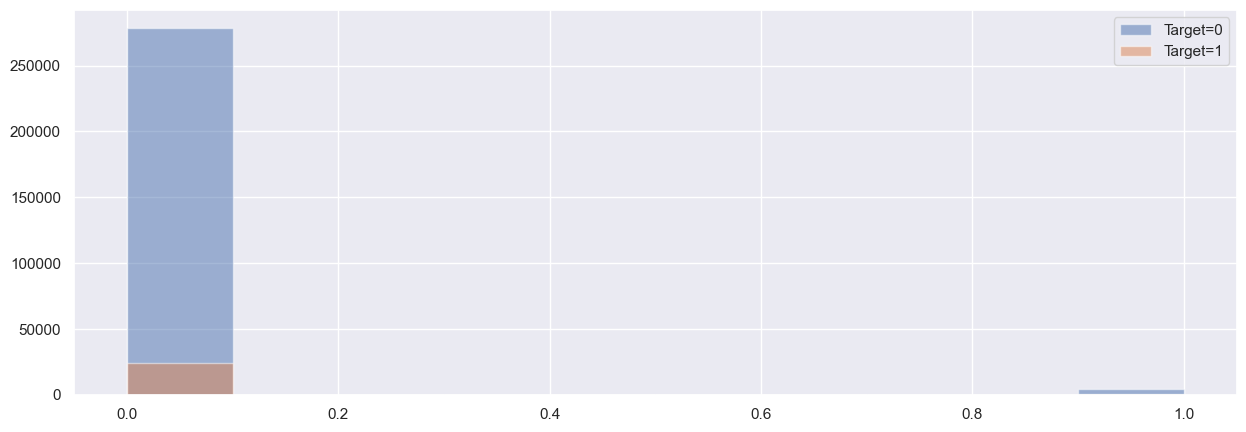

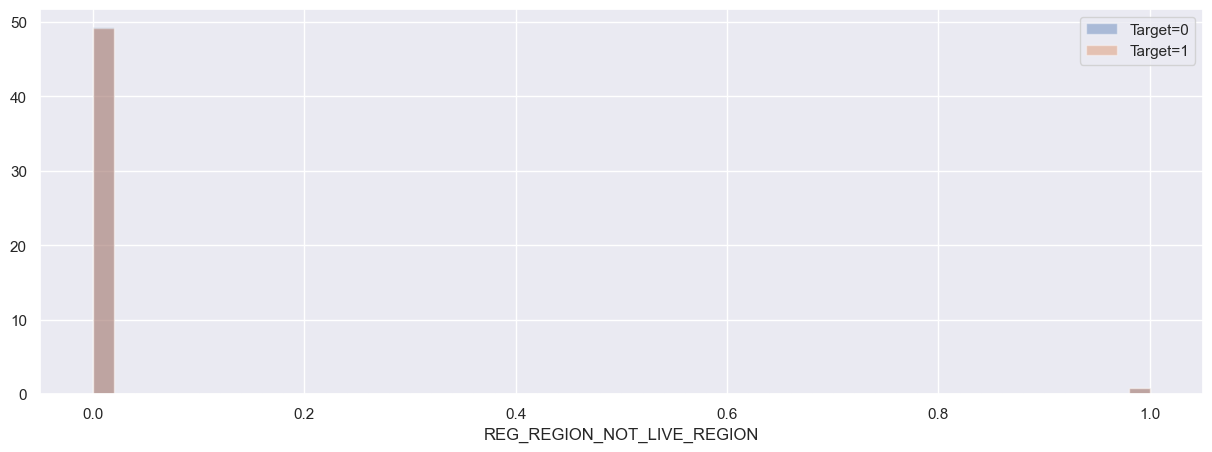

------------------------------------------------------------------------
Plot of REG_REGION_NOT_WORK_REGION


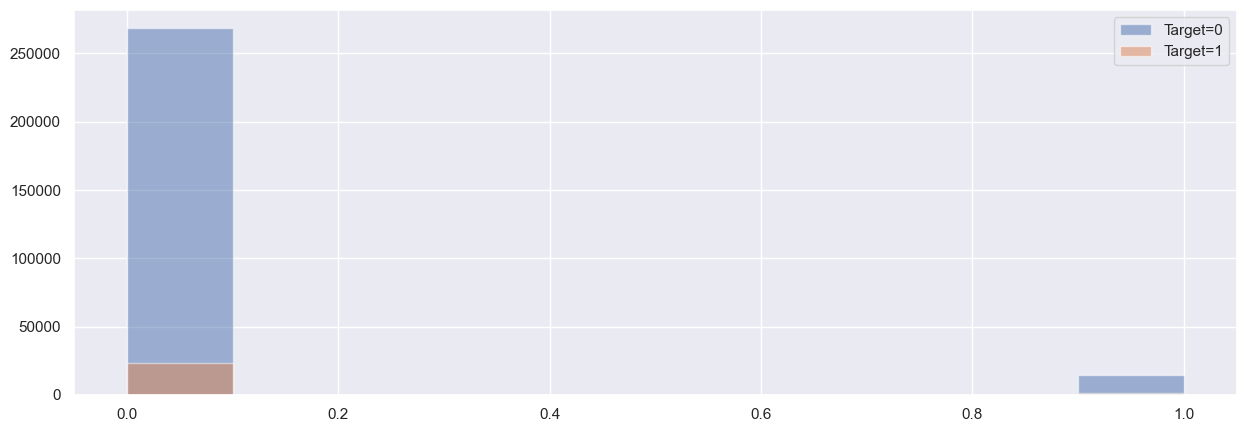

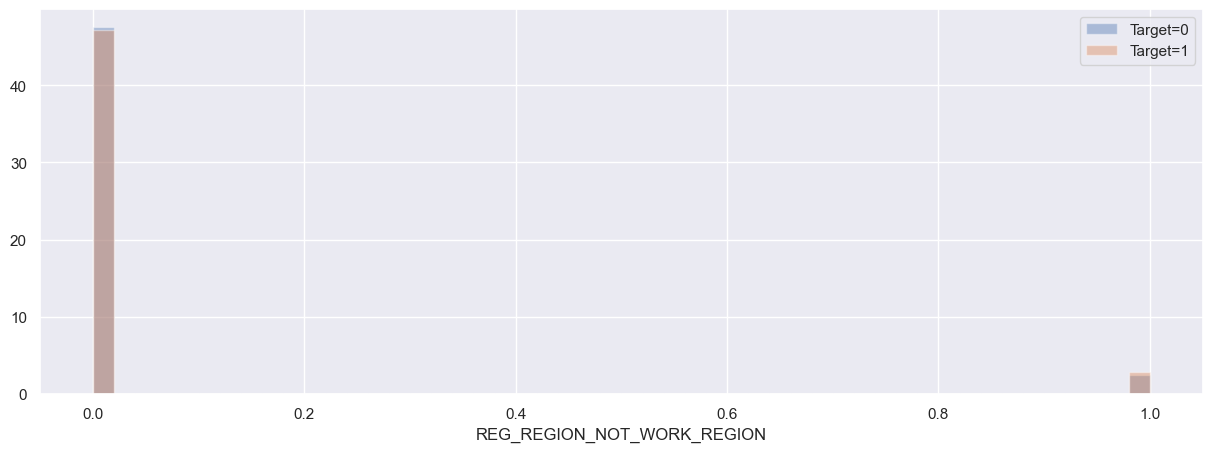

------------------------------------------------------------------------
Plot of LIVE_REGION_NOT_WORK_REGION


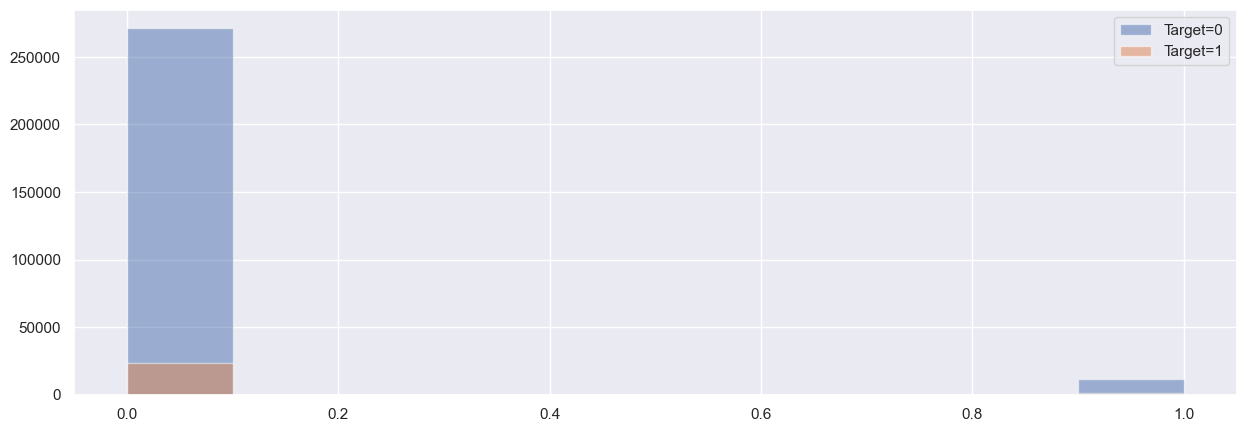

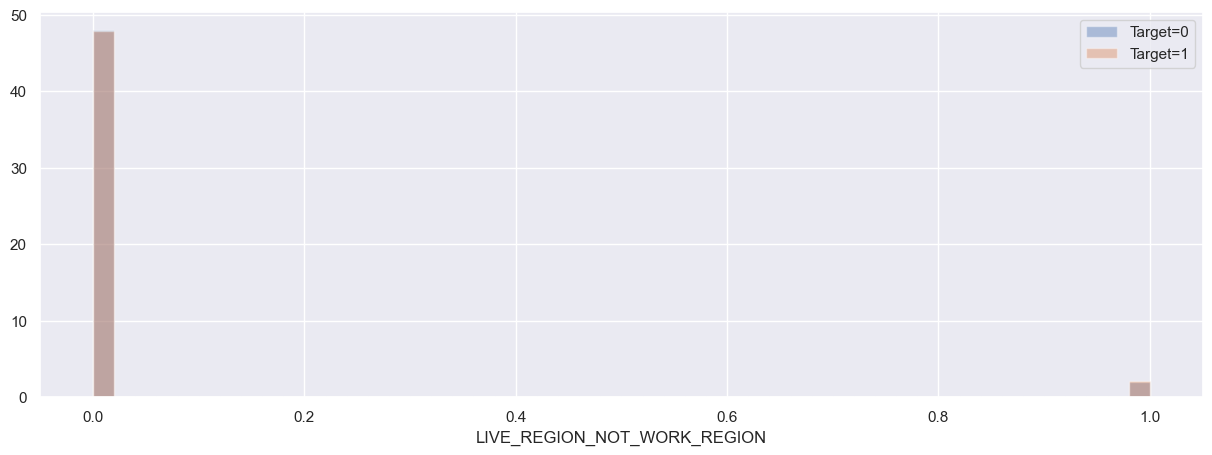

------------------------------------------------------------------------
Plot of REG_CITY_NOT_LIVE_CITY


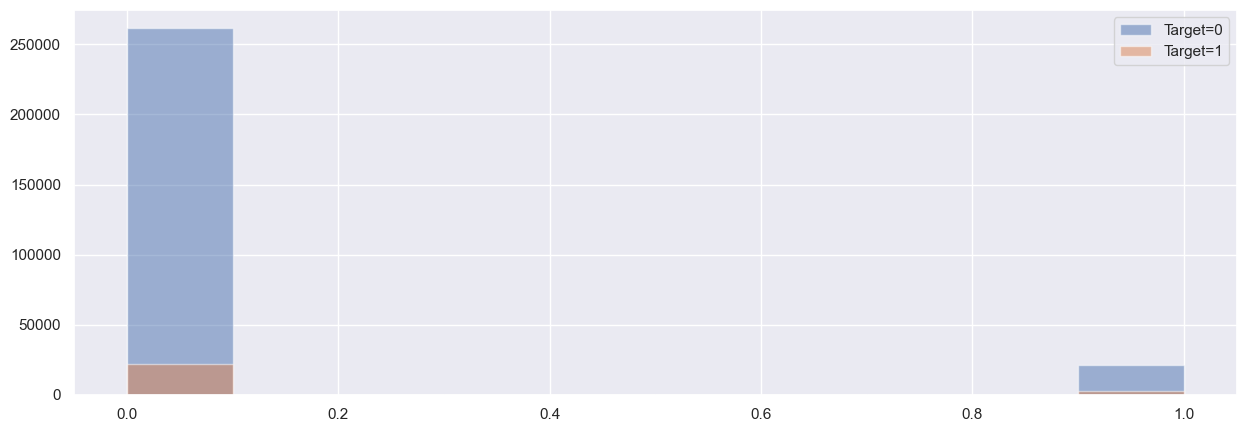

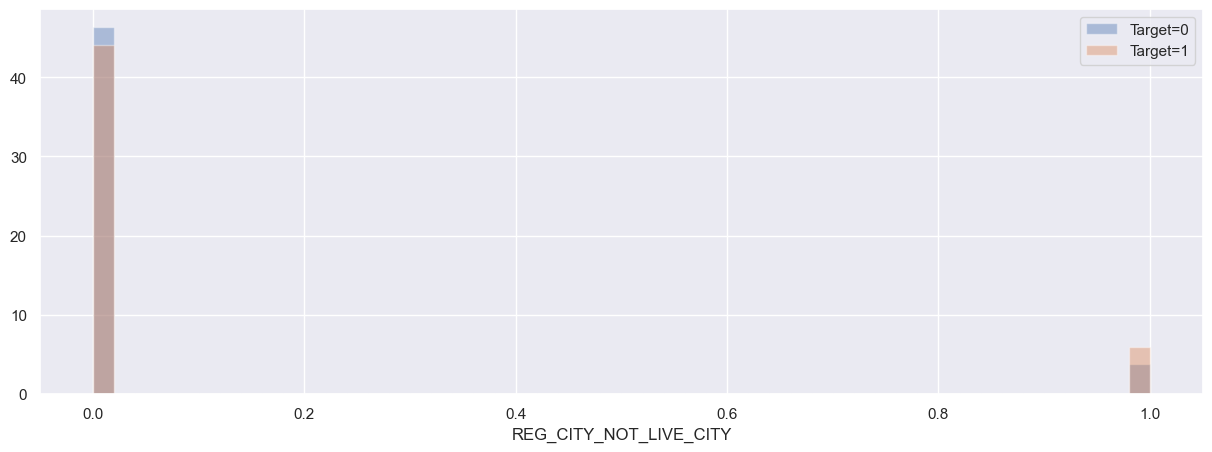

------------------------------------------------------------------------
Plot of REG_CITY_NOT_WORK_CITY


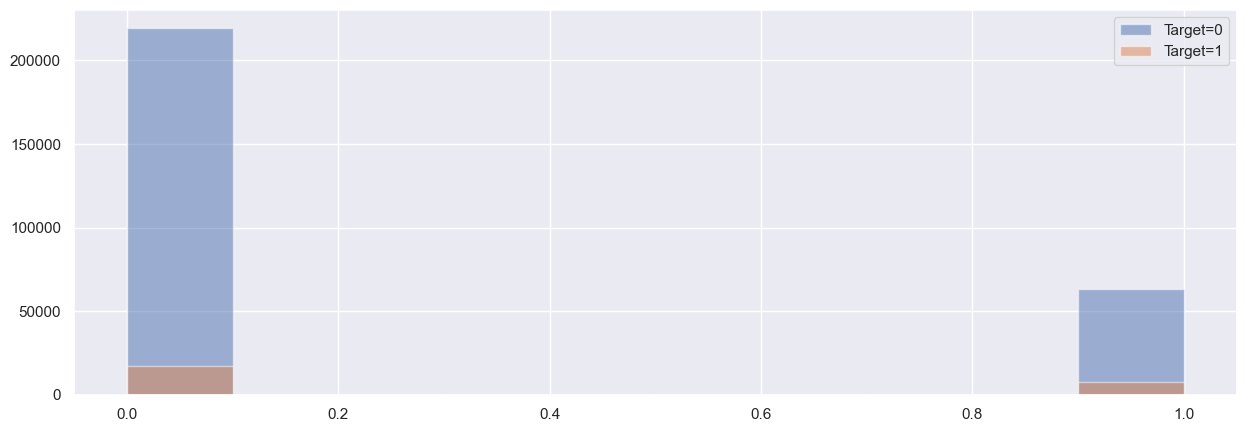

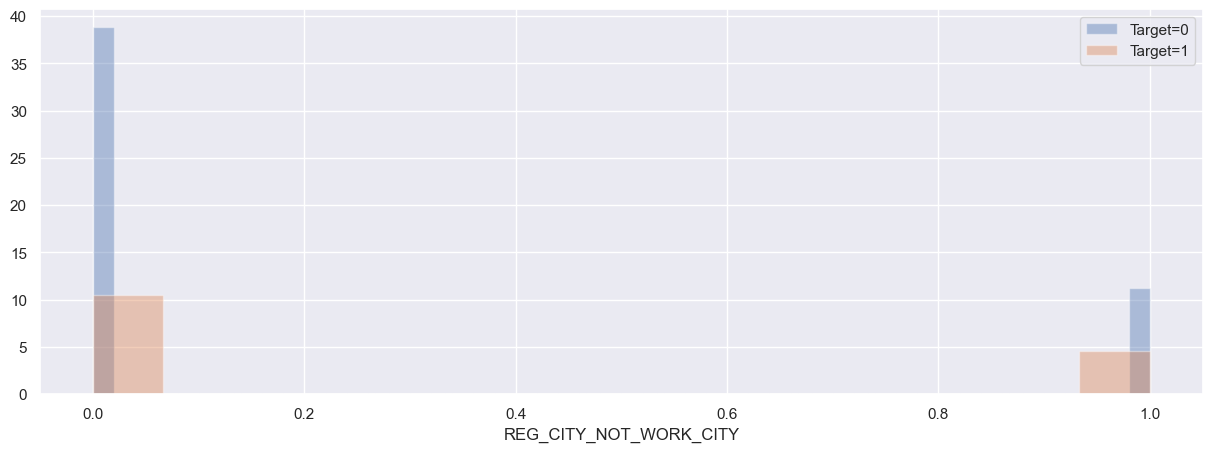

------------------------------------------------------------------------
Plot of LIVE_CITY_NOT_WORK_CITY


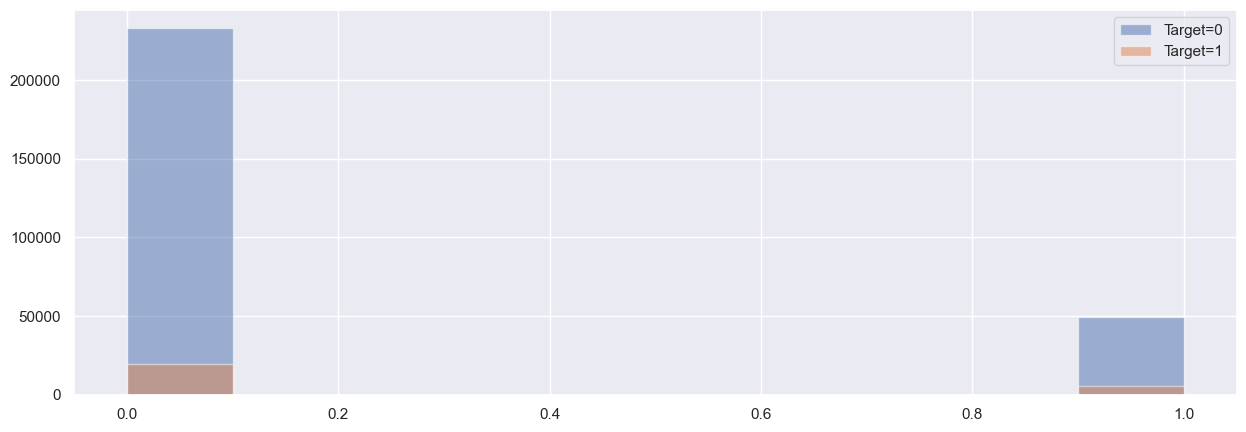

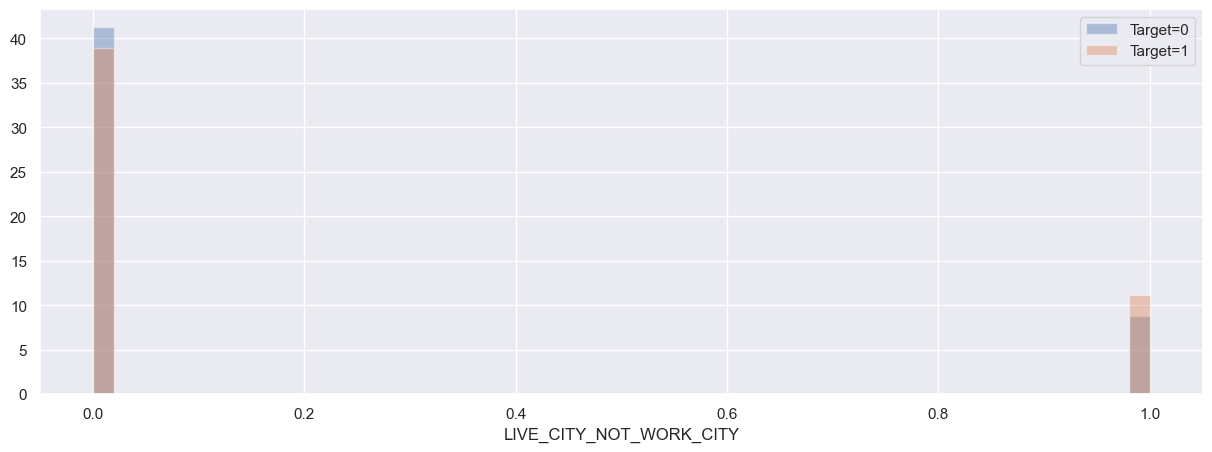

------------------------------------------------------------------------
Plot of EXT_SOURCE_2


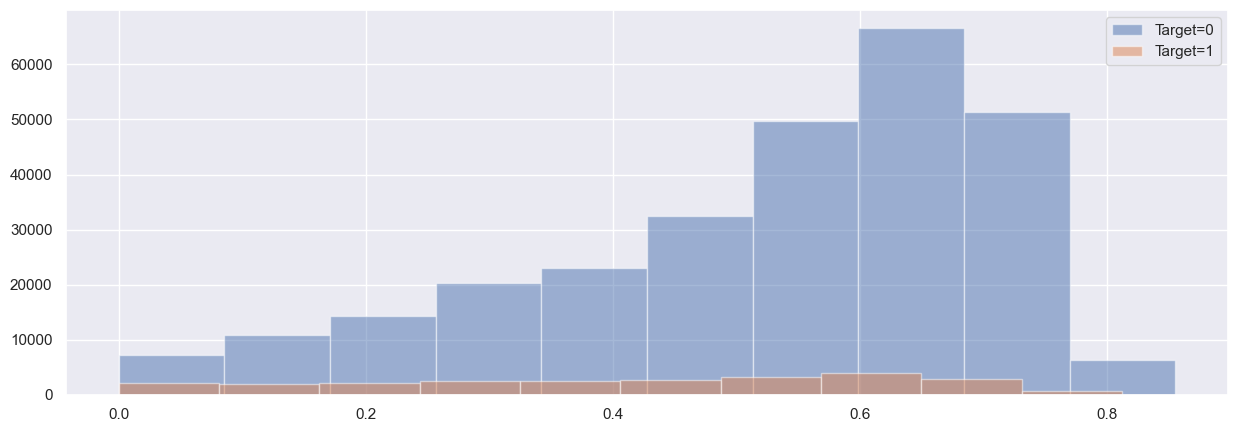

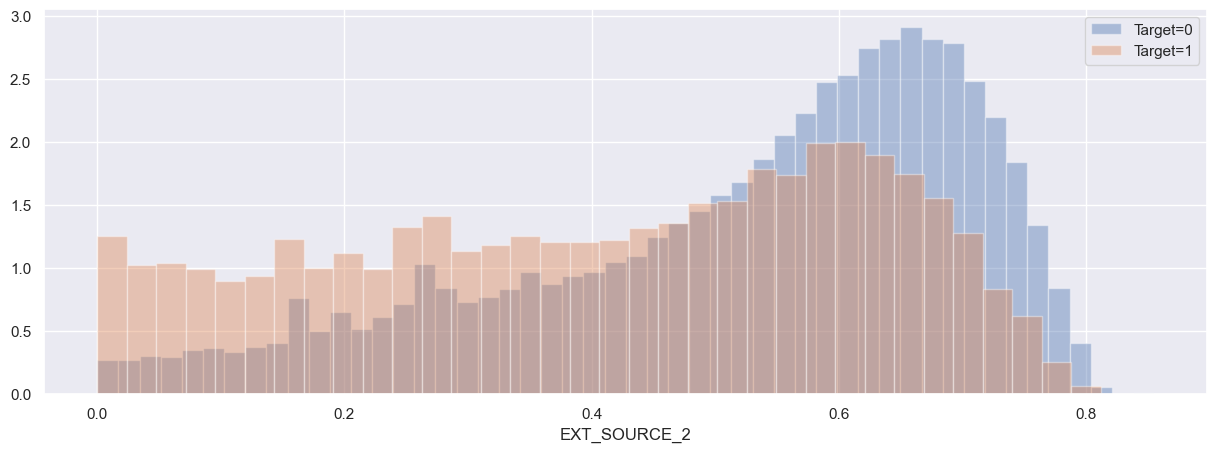

------------------------------------------------------------------------
Plot of EXT_SOURCE_3


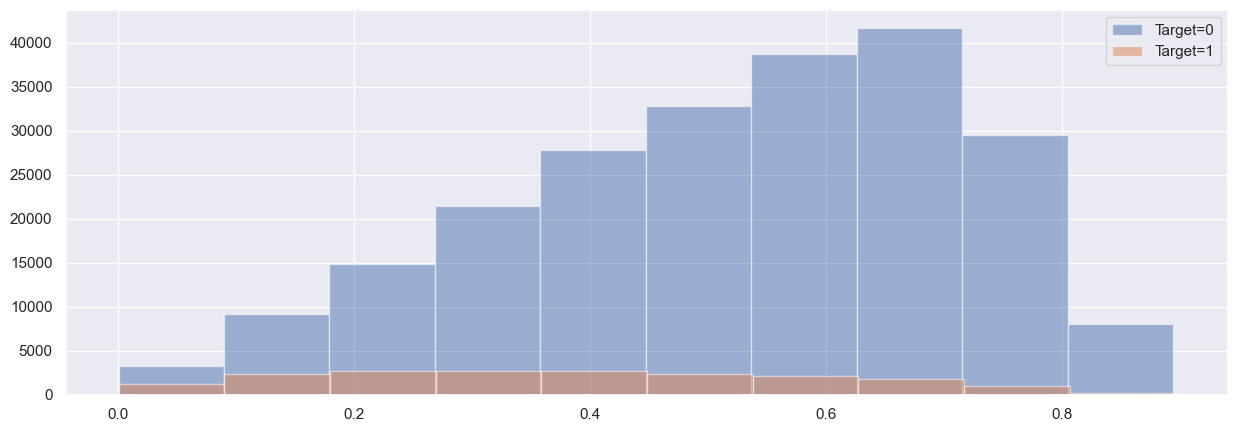

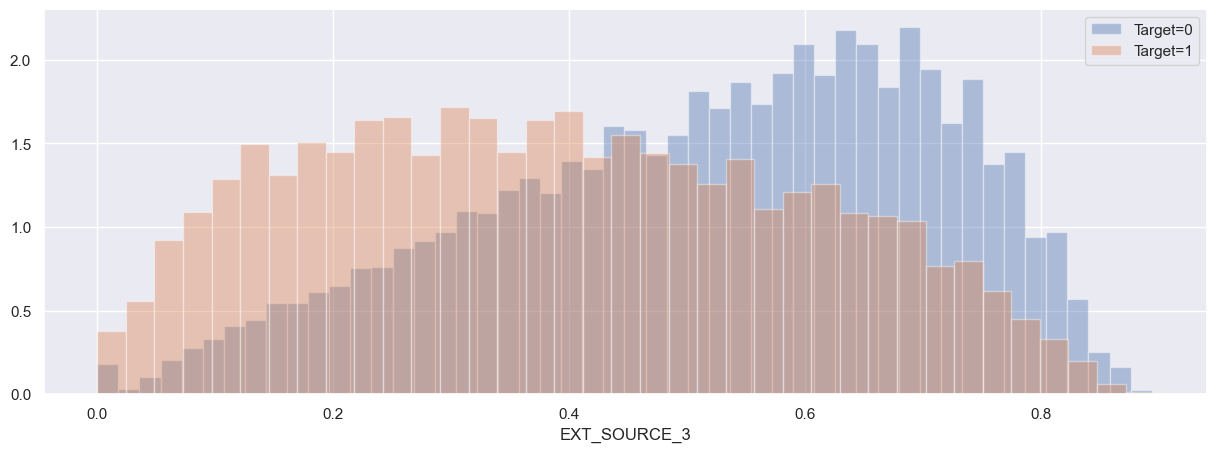

------------------------------------------------------------------------
Plot of YEARS_BEGINEXPLUATATION_AVG


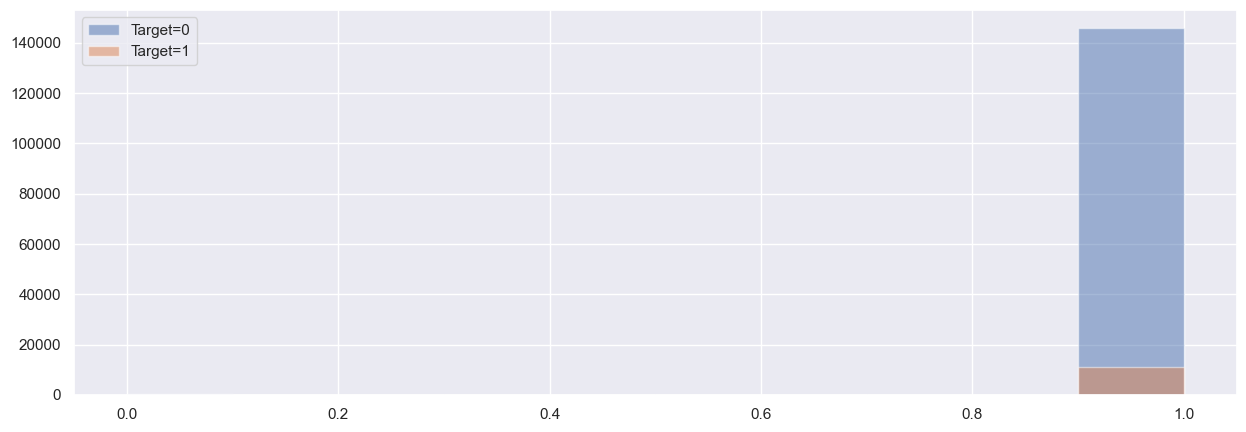

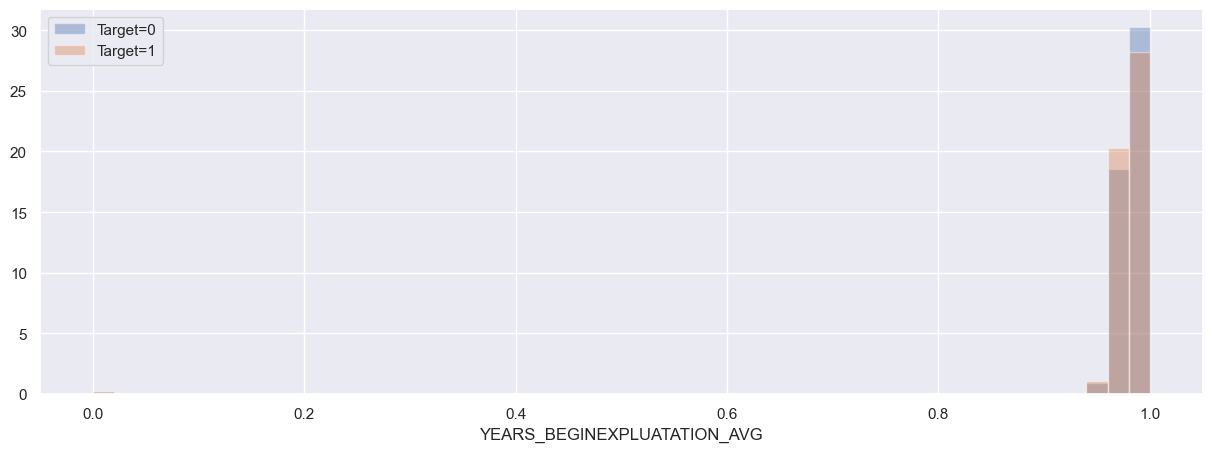

------------------------------------------------------------------------
Plot of FLOORSMAX_AVG


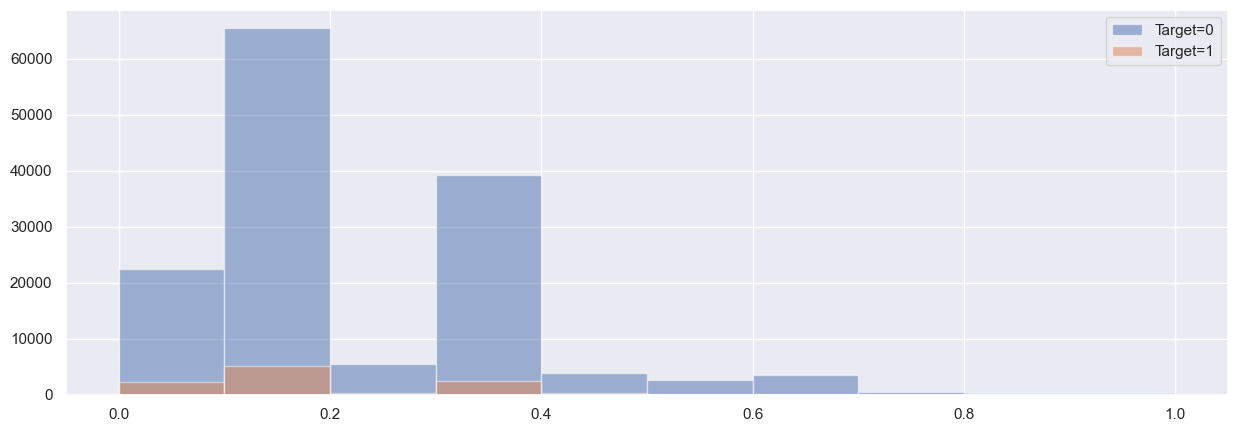

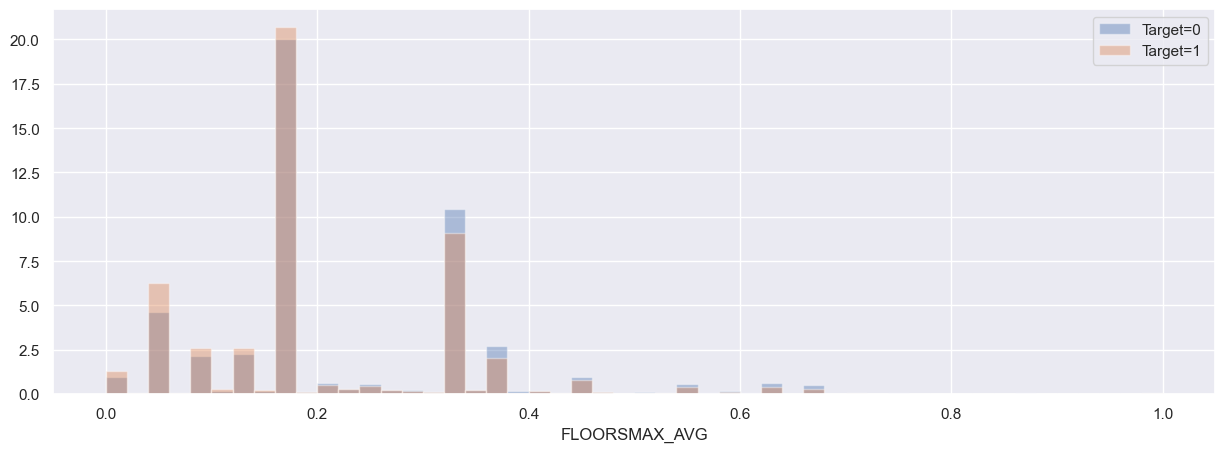

------------------------------------------------------------------------
Plot of YEARS_BEGINEXPLUATATION_MODE


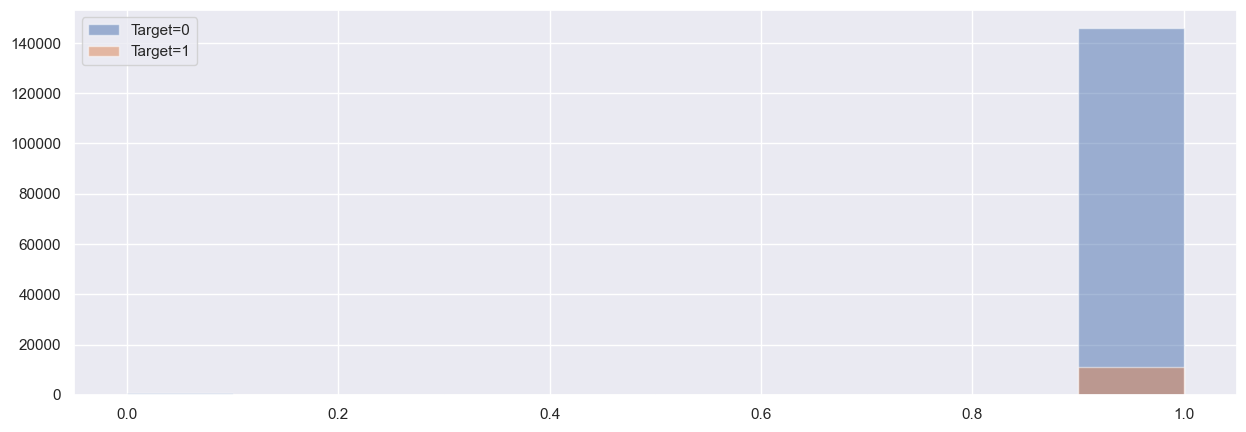

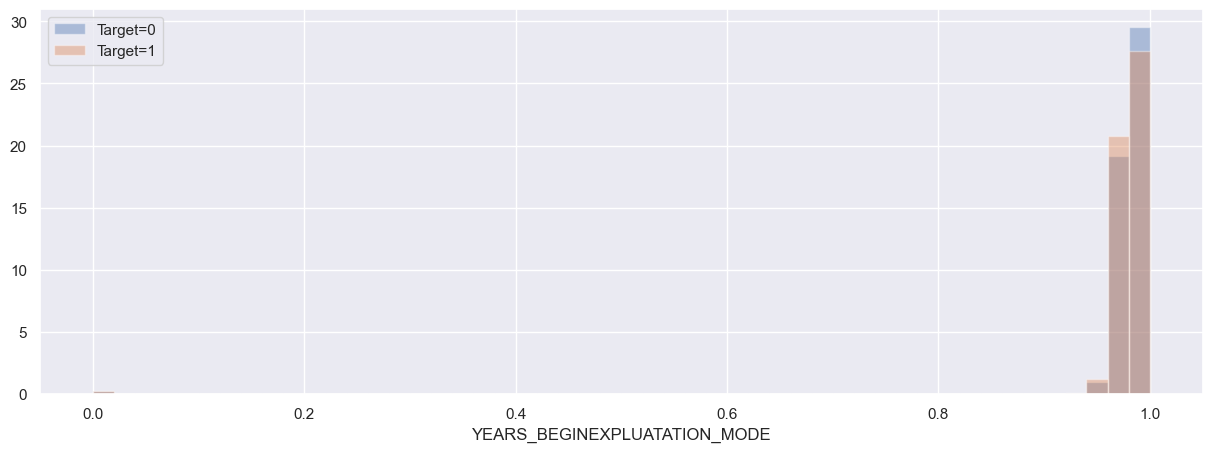

------------------------------------------------------------------------
Plot of FLOORSMAX_MODE


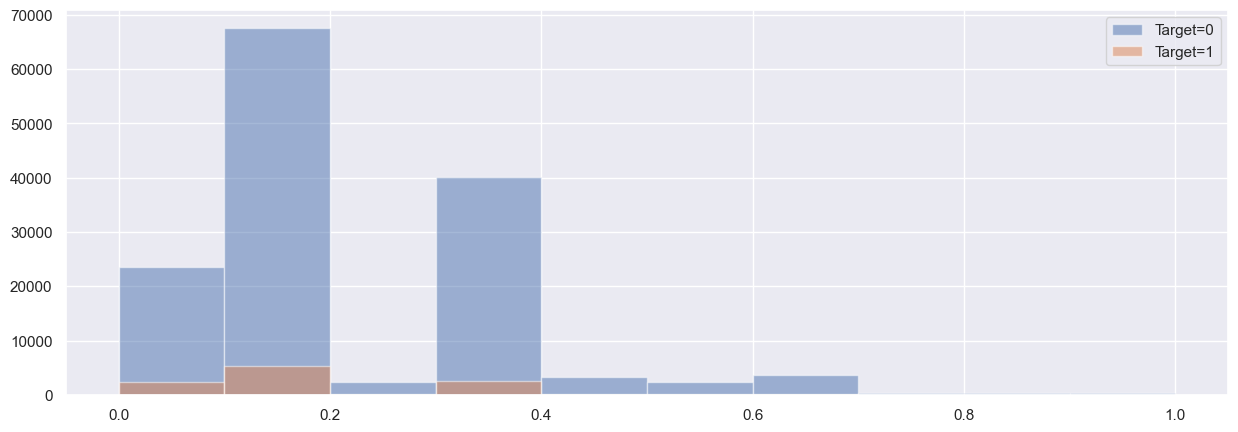

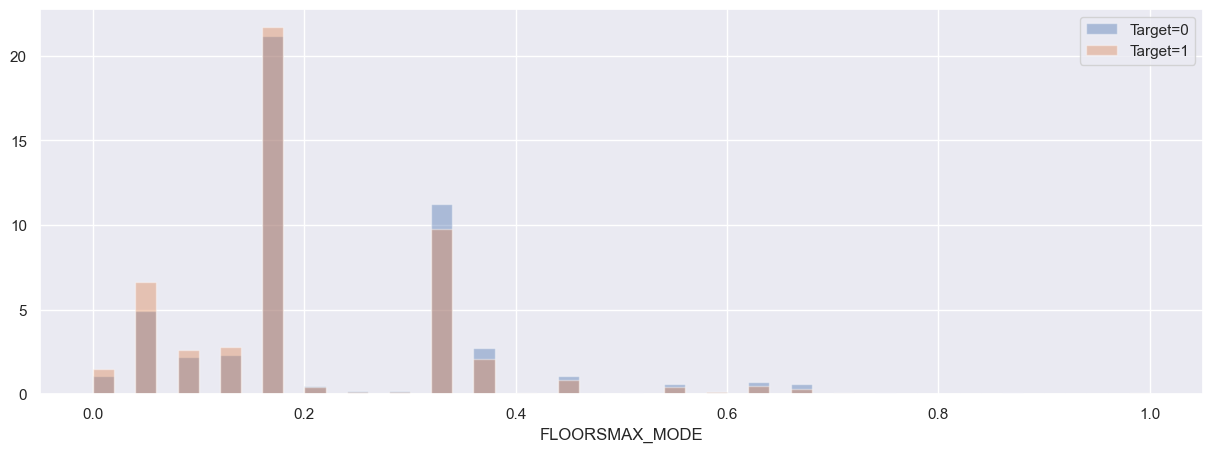

------------------------------------------------------------------------
Plot of YEARS_BEGINEXPLUATATION_MEDI


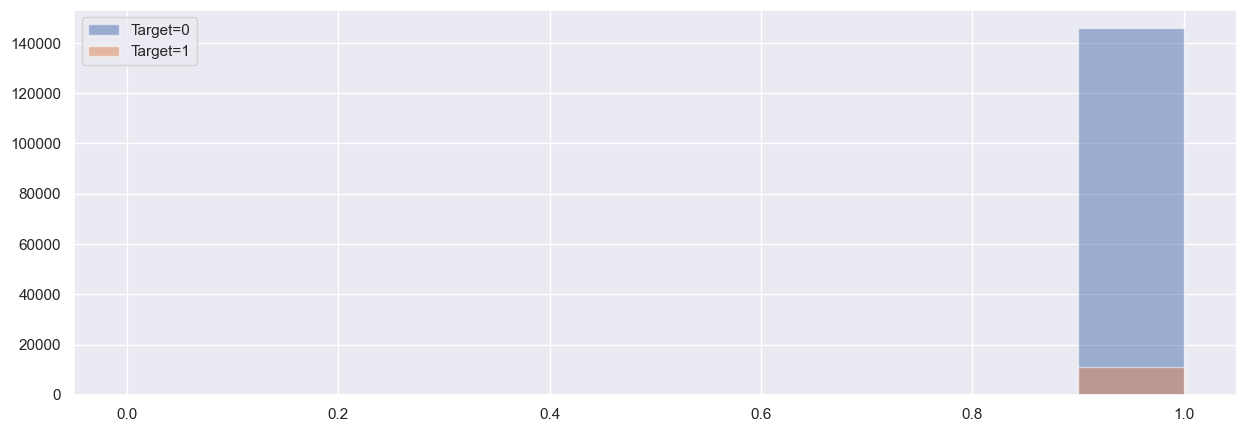

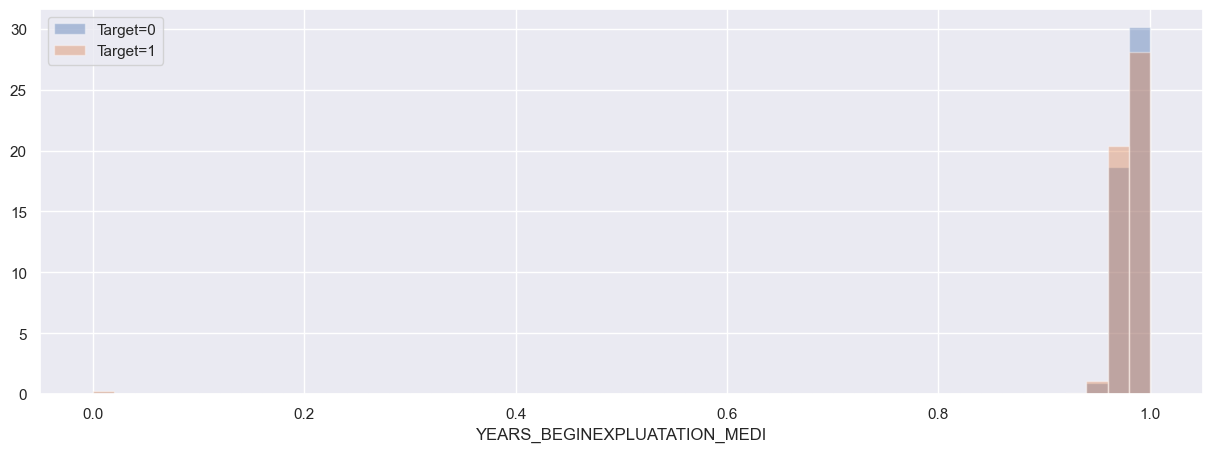

------------------------------------------------------------------------
Plot of FLOORSMAX_MEDI


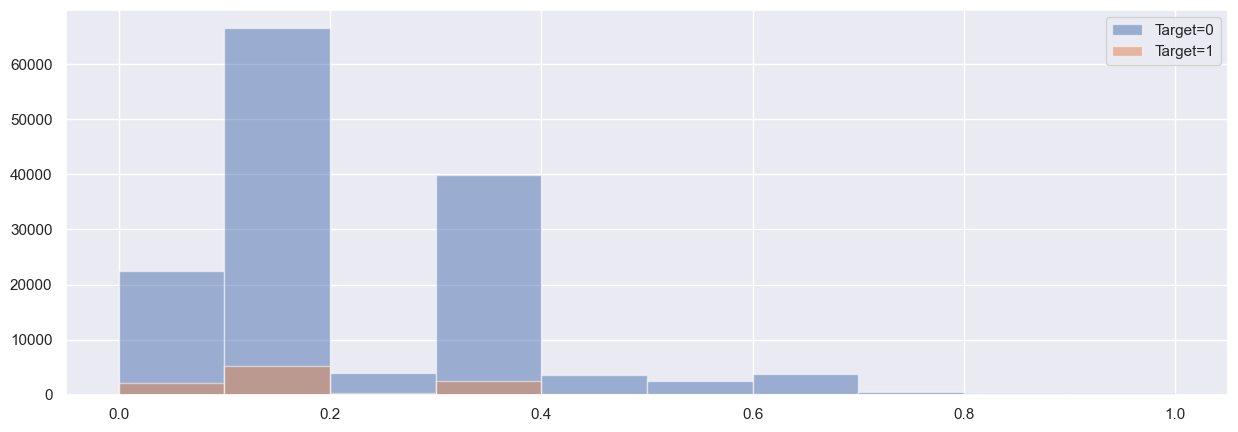

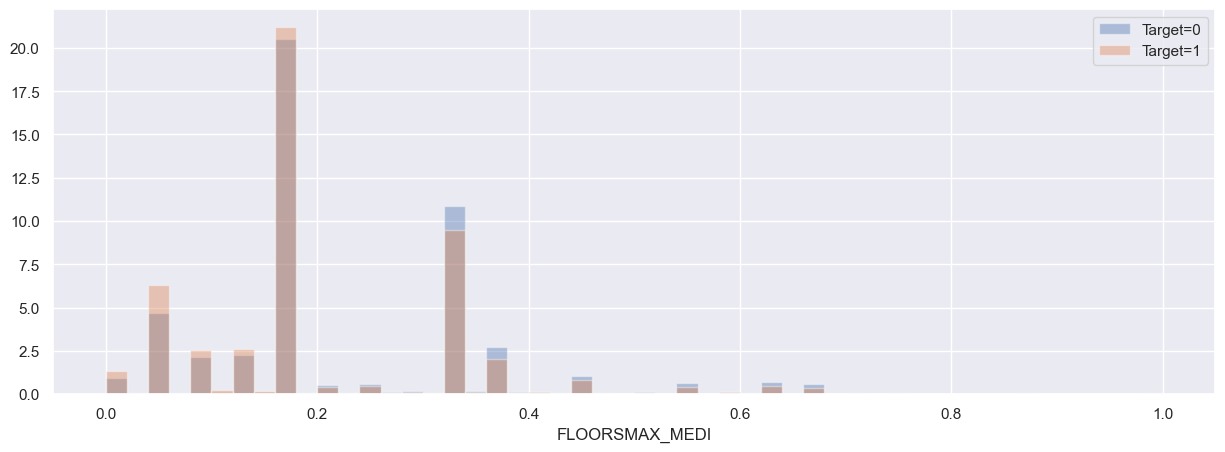

------------------------------------------------------------------------
Plot of TOTALAREA_MODE


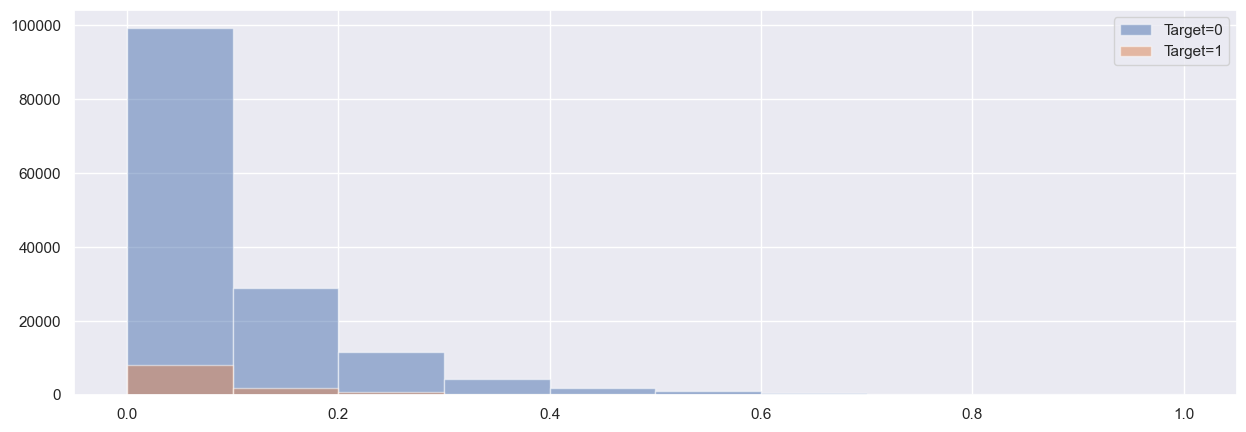

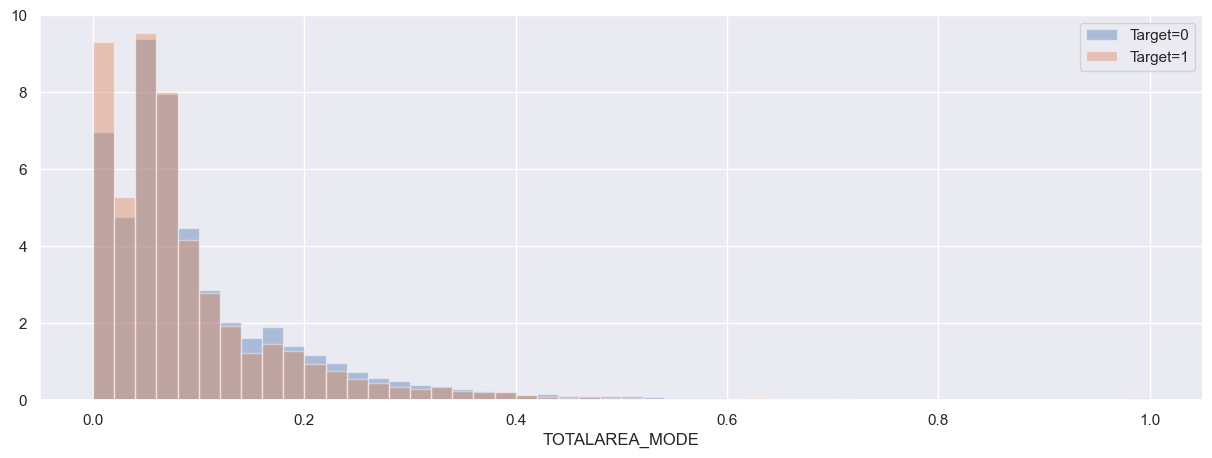

------------------------------------------------------------------------
Plot of OBS_30_CNT_SOCIAL_CIRCLE


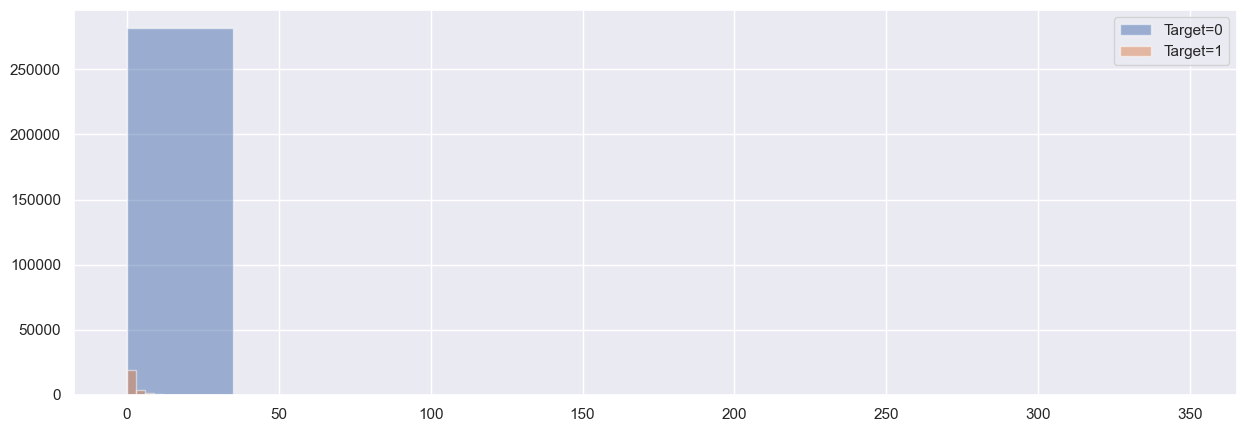

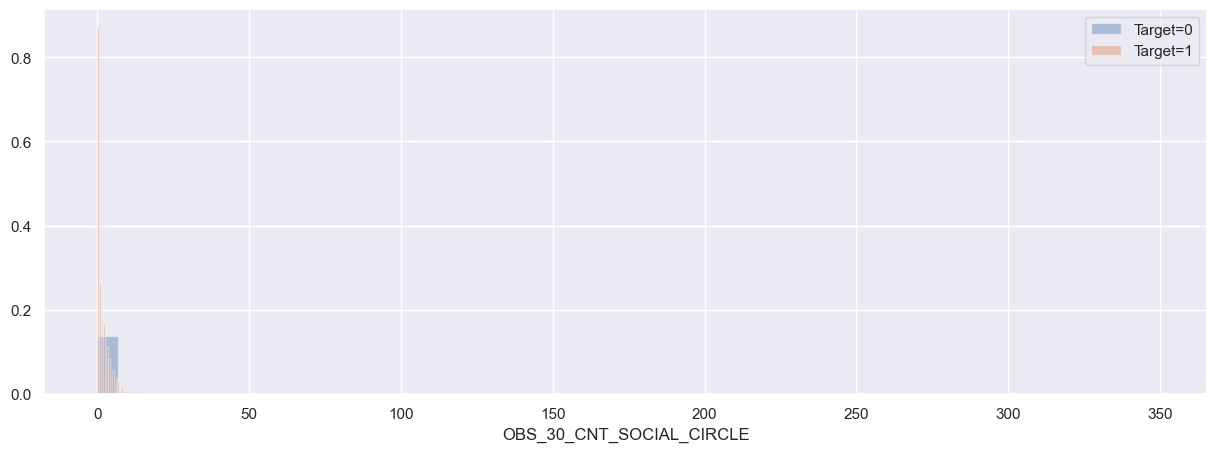

------------------------------------------------------------------------
Plot of DEF_30_CNT_SOCIAL_CIRCLE


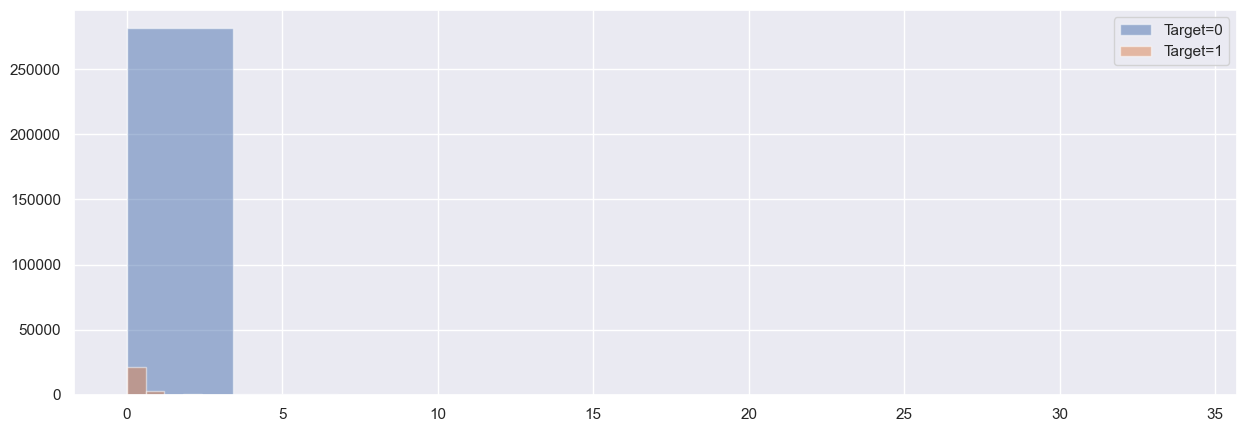

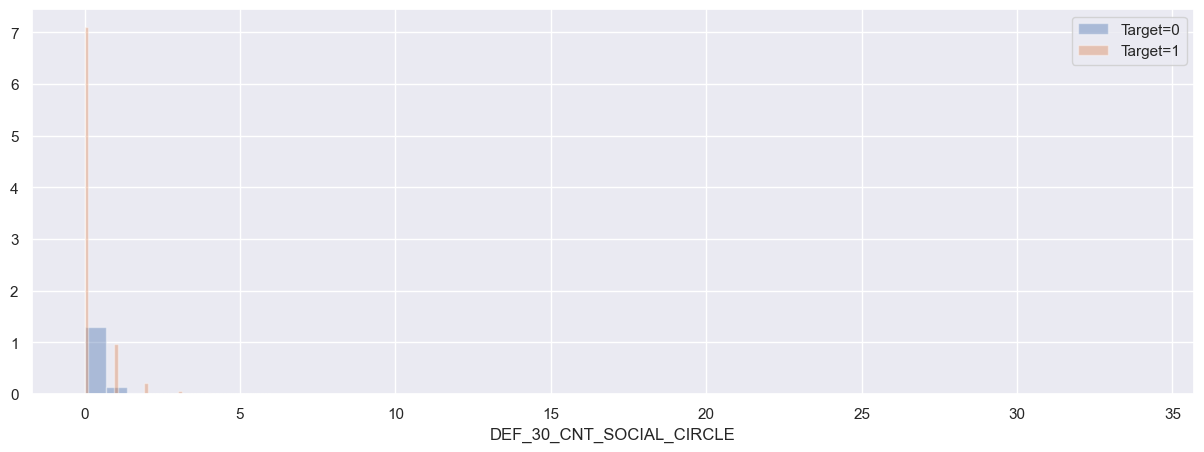

------------------------------------------------------------------------
Plot of OBS_60_CNT_SOCIAL_CIRCLE


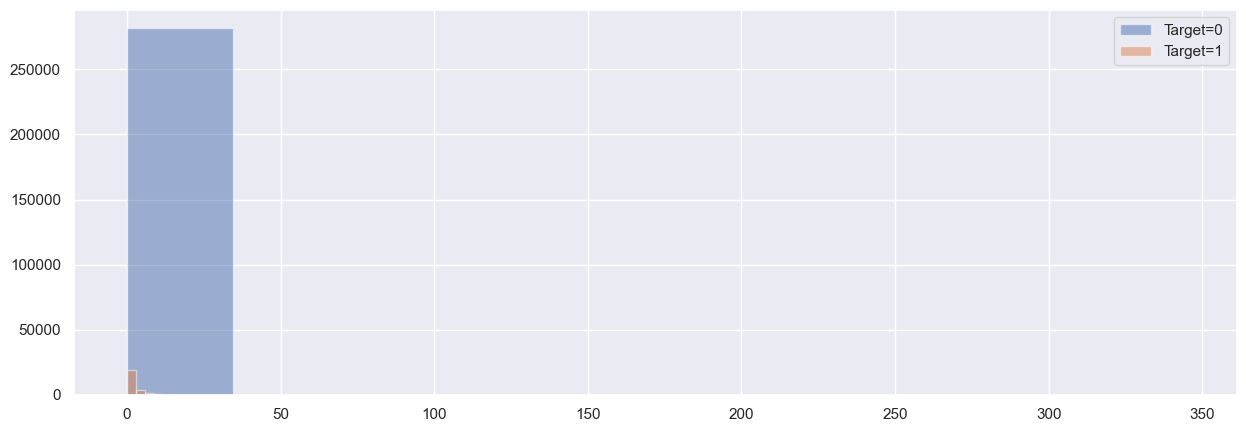

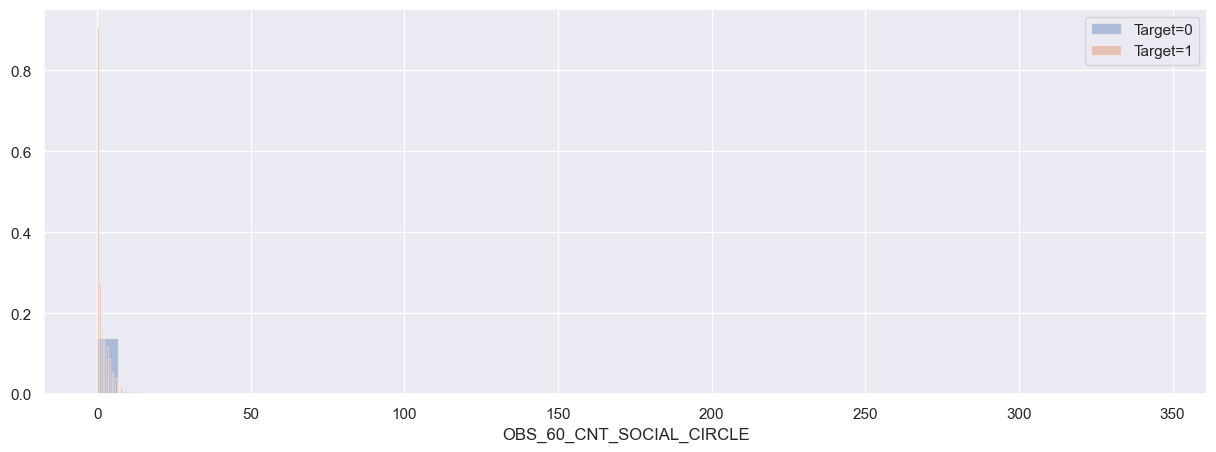

------------------------------------------------------------------------
Plot of DEF_60_CNT_SOCIAL_CIRCLE


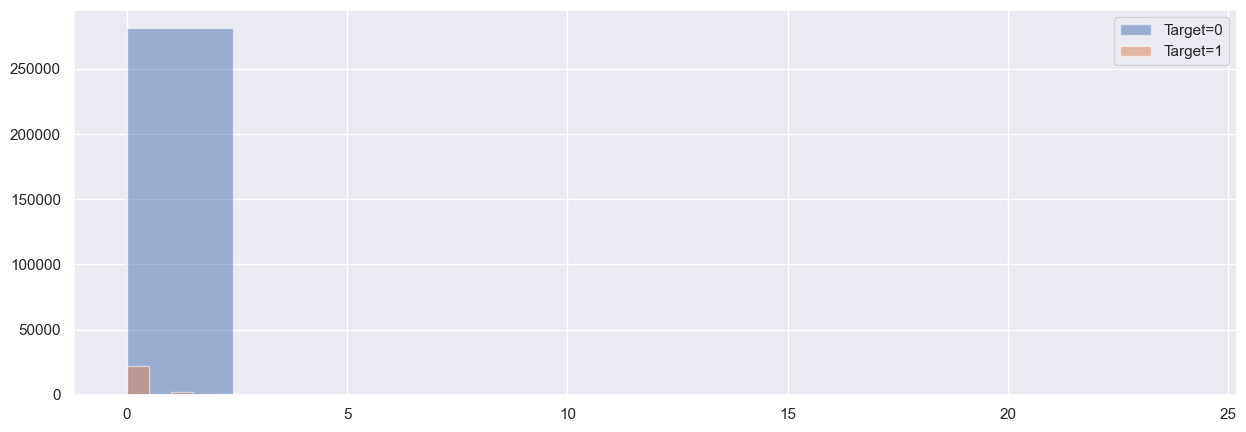

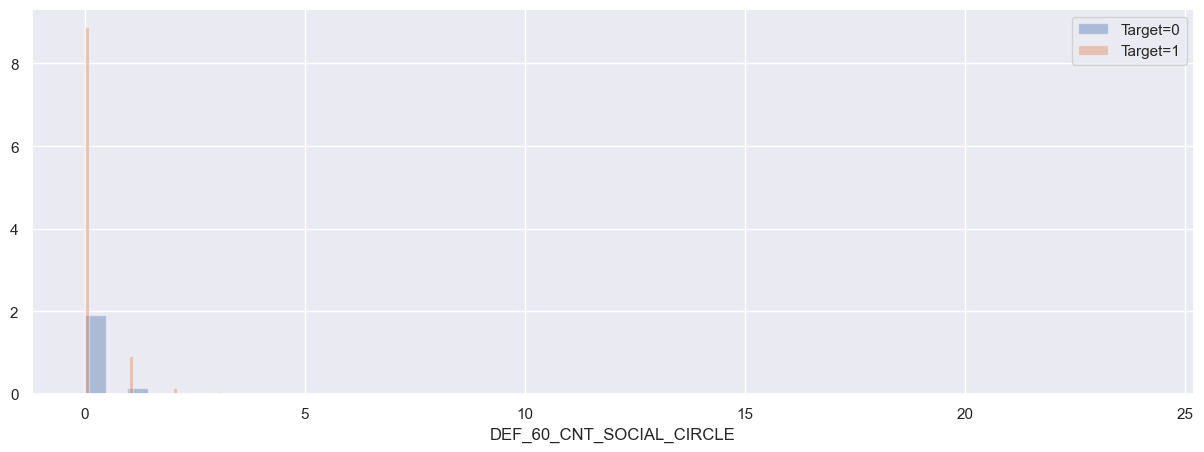

------------------------------------------------------------------------
Plot of DAYS_LAST_PHONE_CHANGE


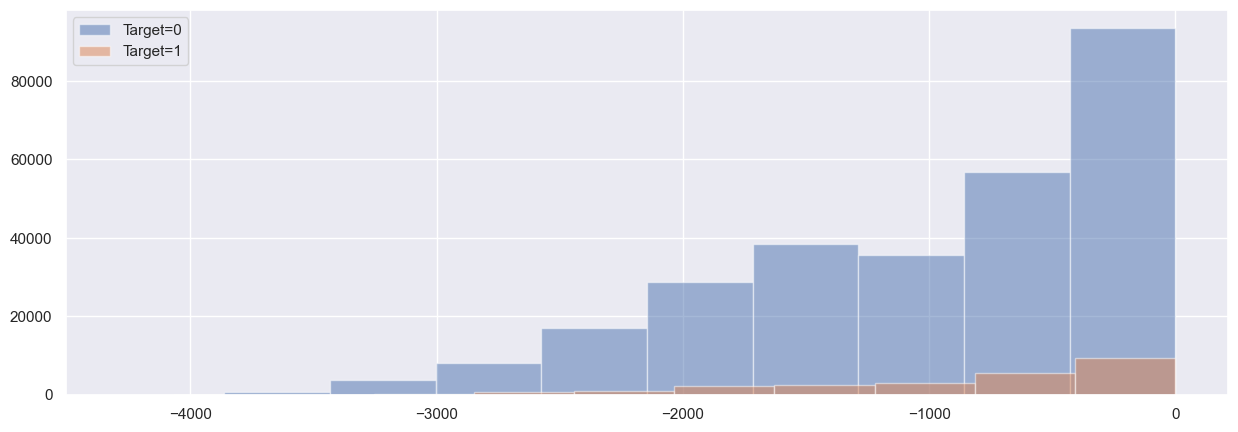

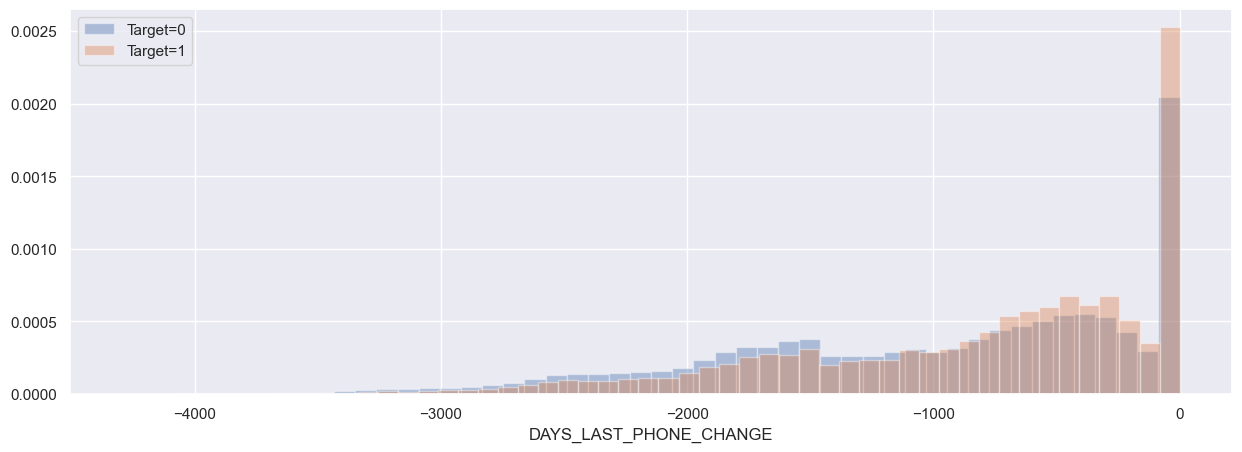

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_2


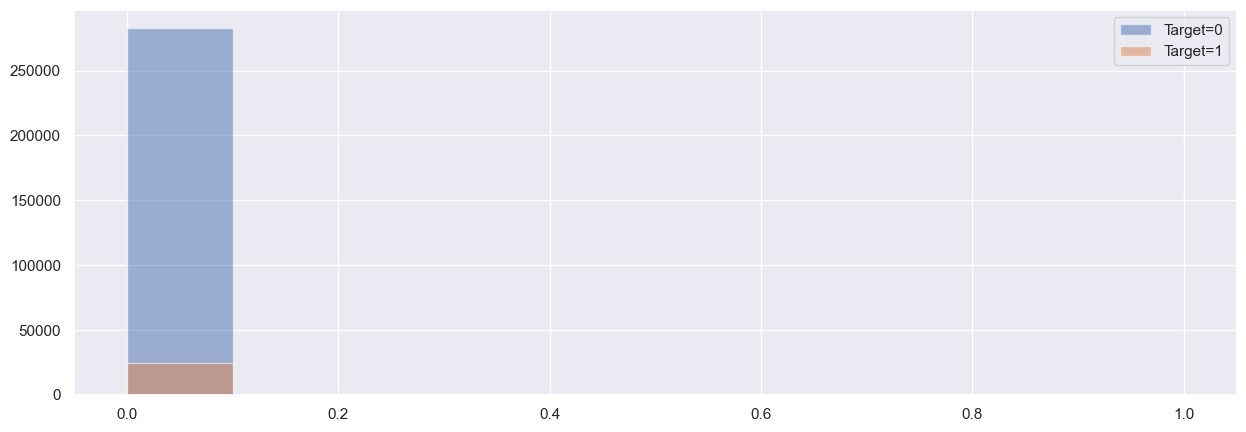

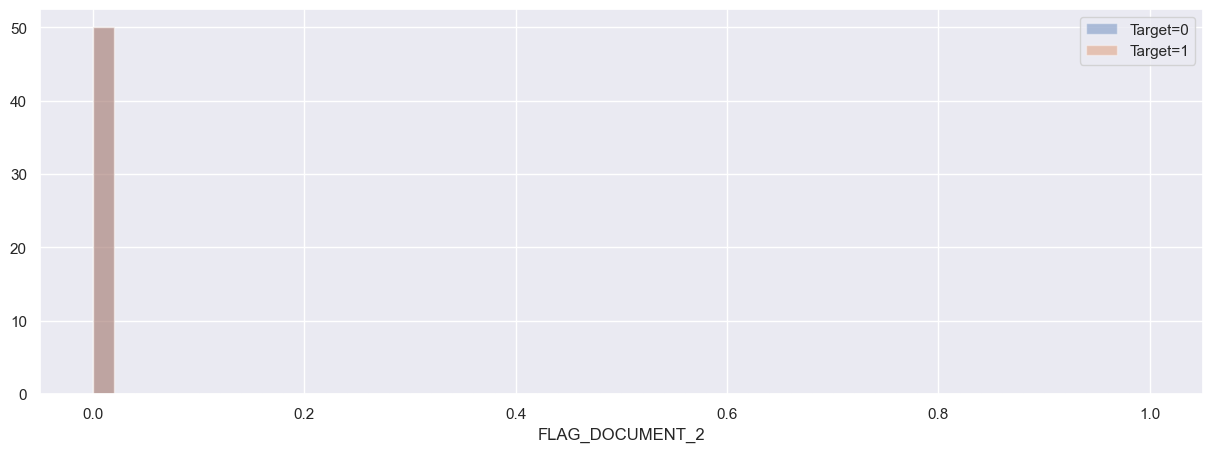

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_3


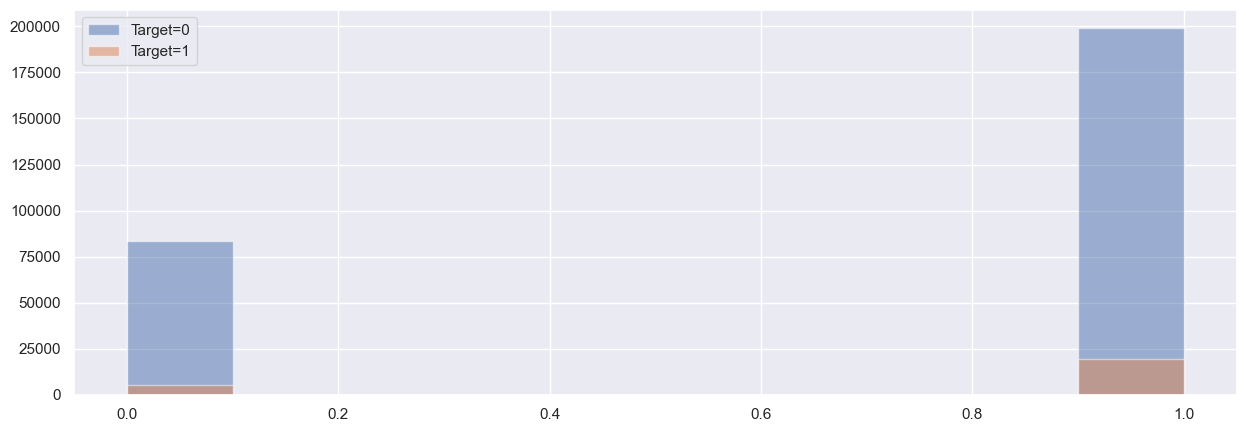

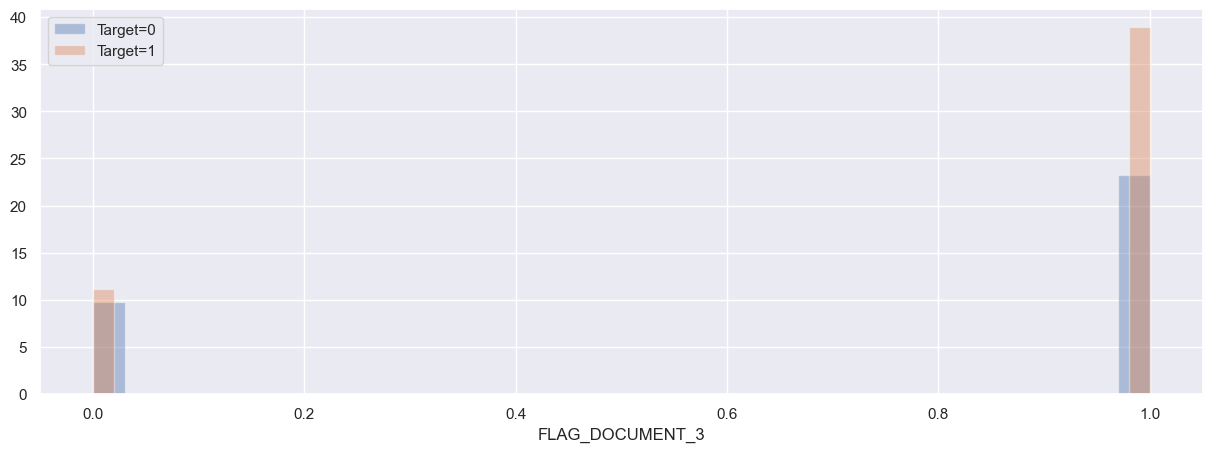

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_4


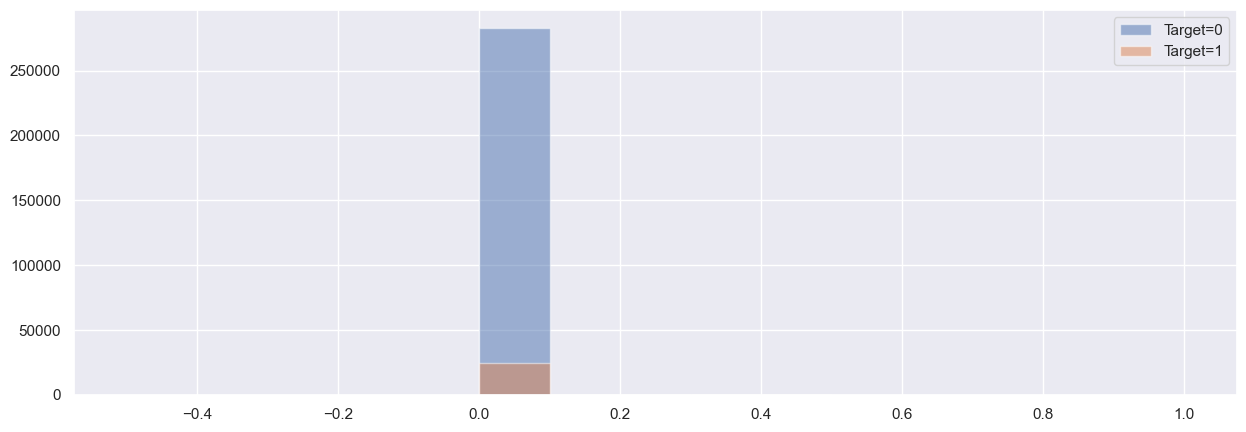

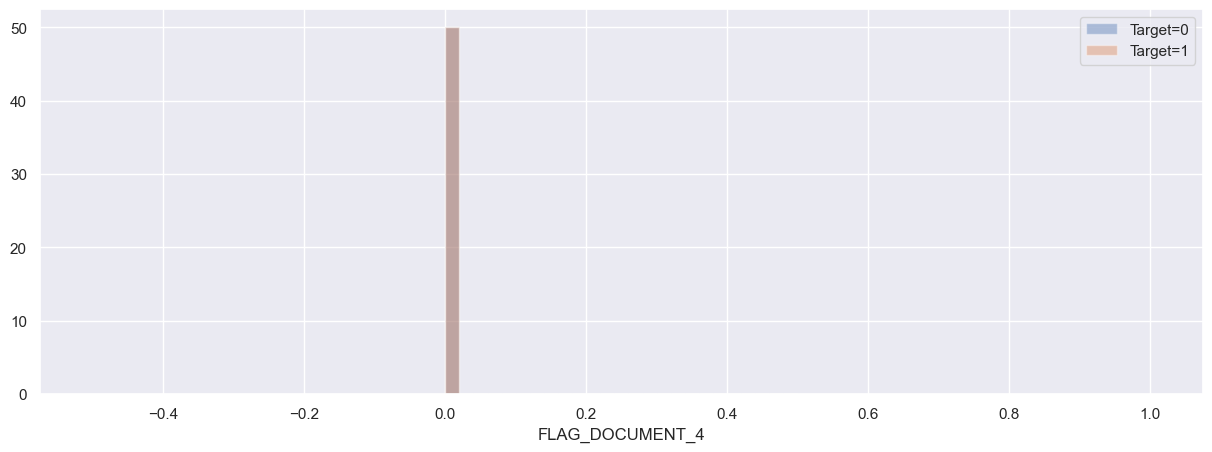

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_5


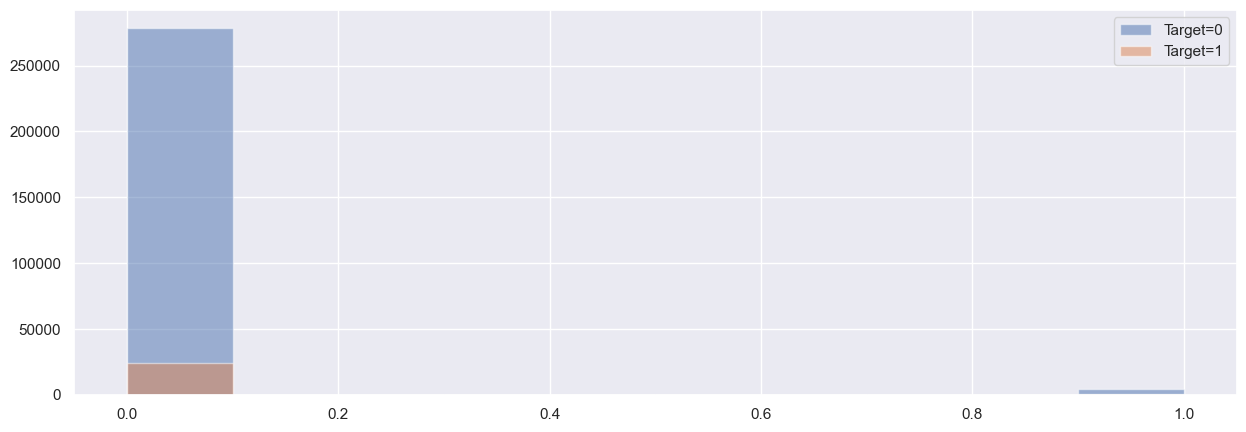

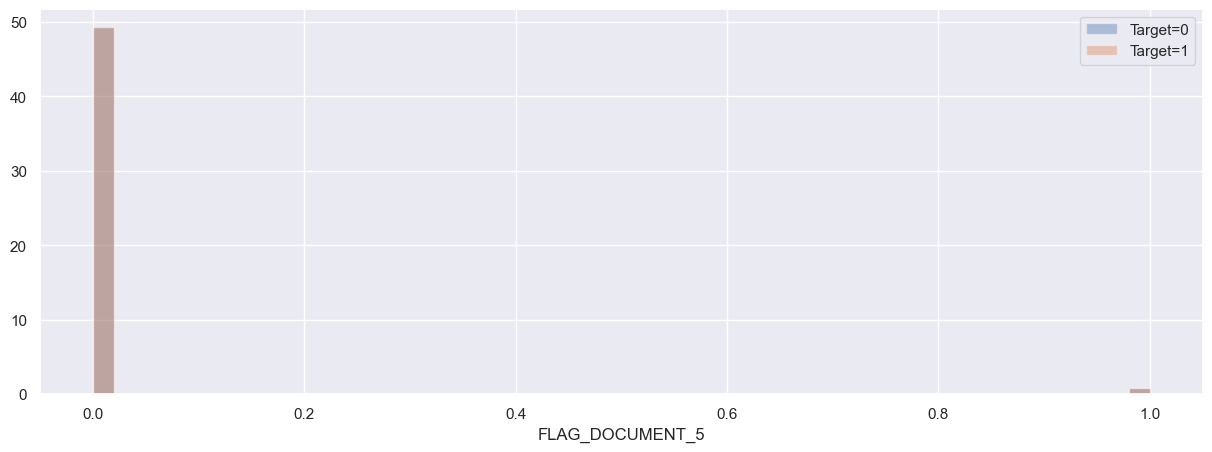

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_6


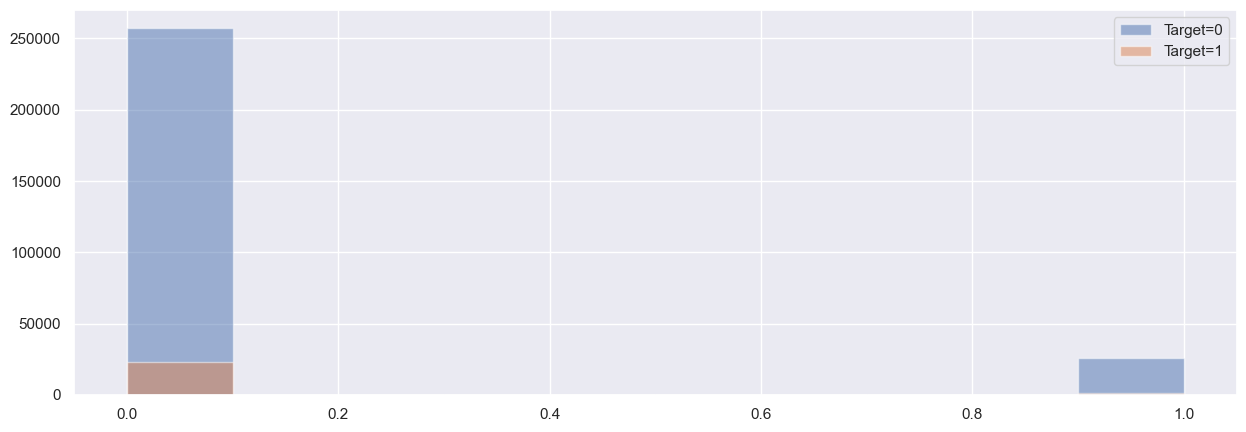

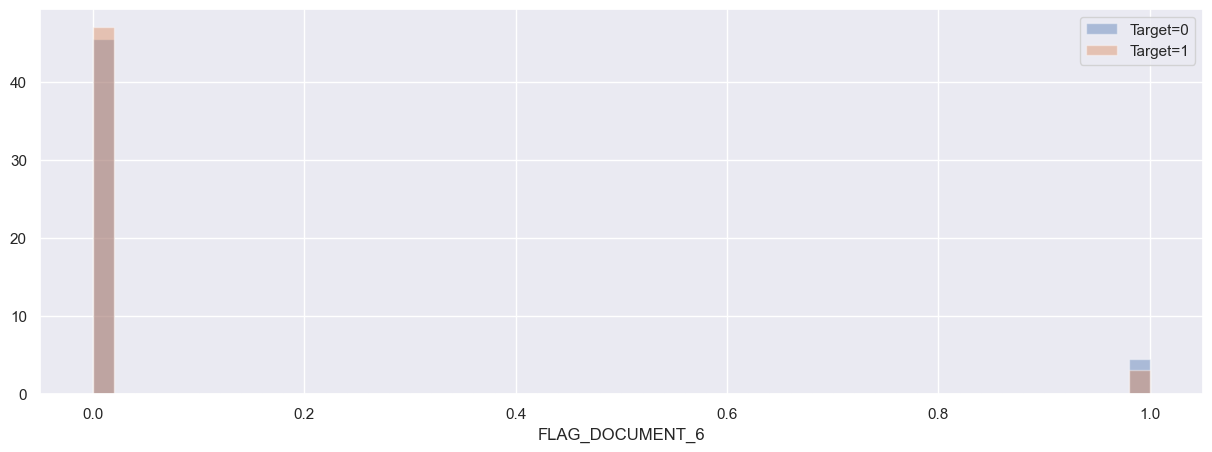

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_7


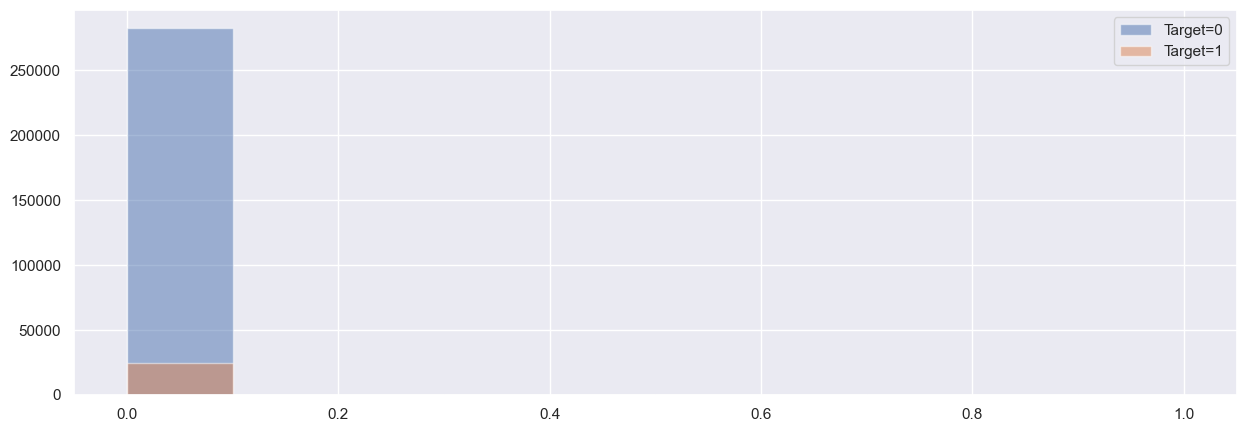

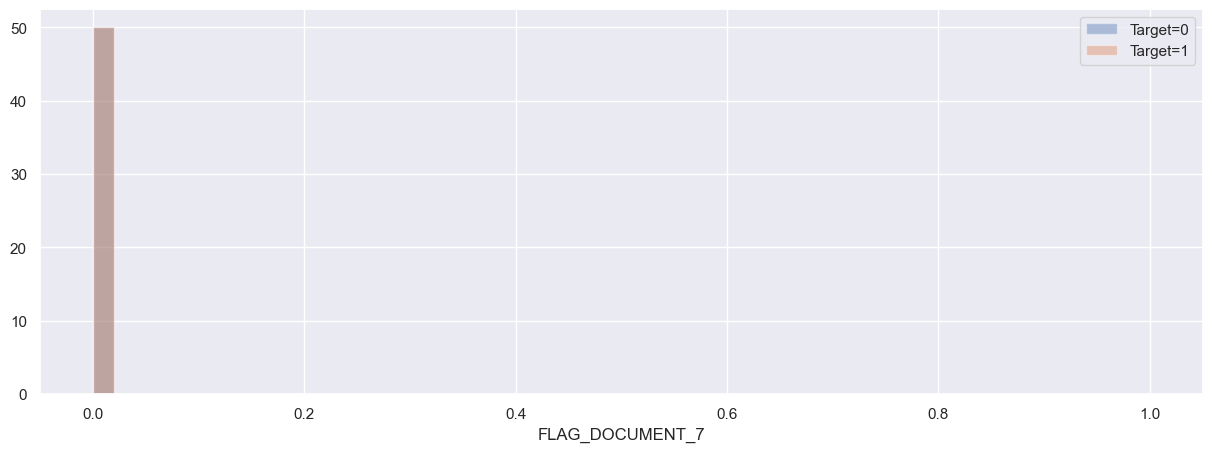

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_8


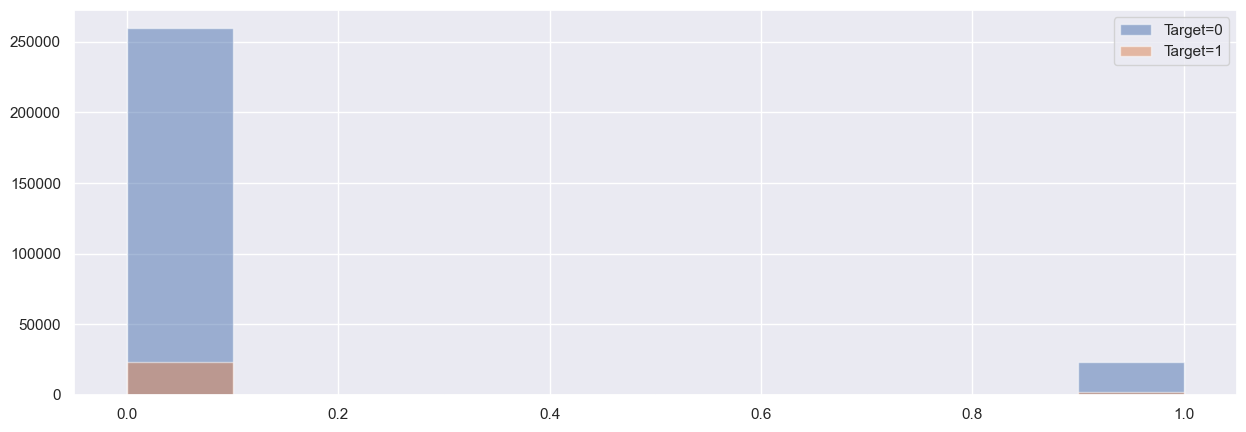

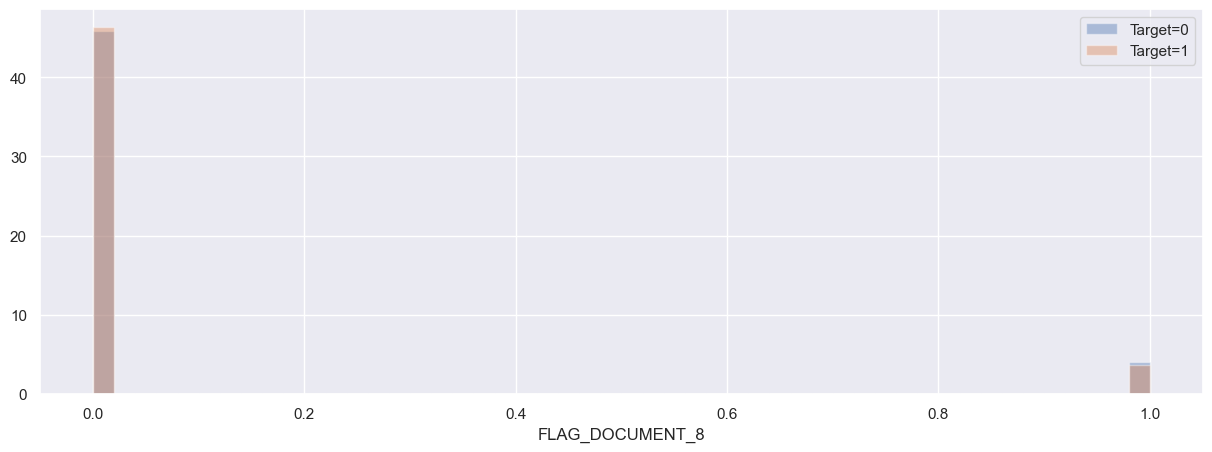

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_9


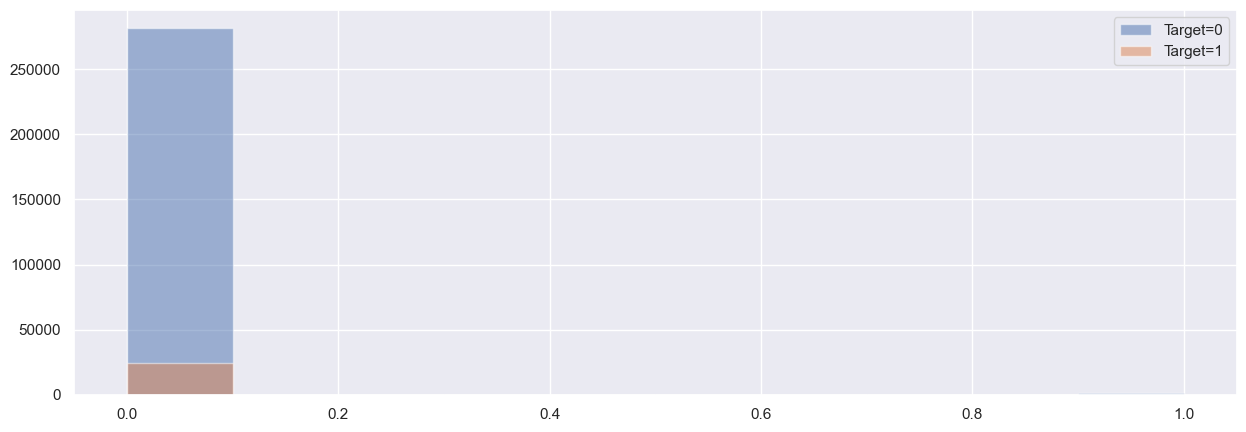

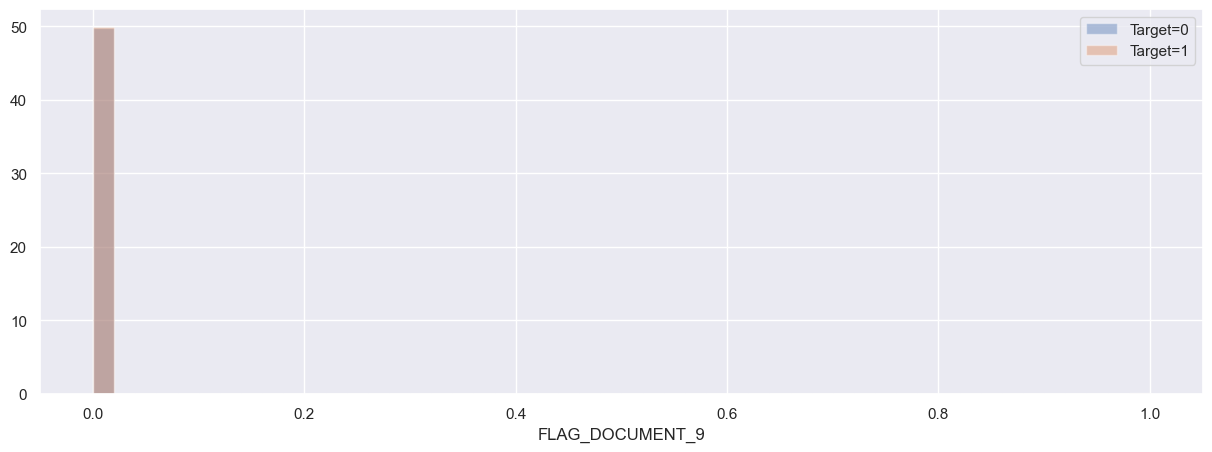

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_10


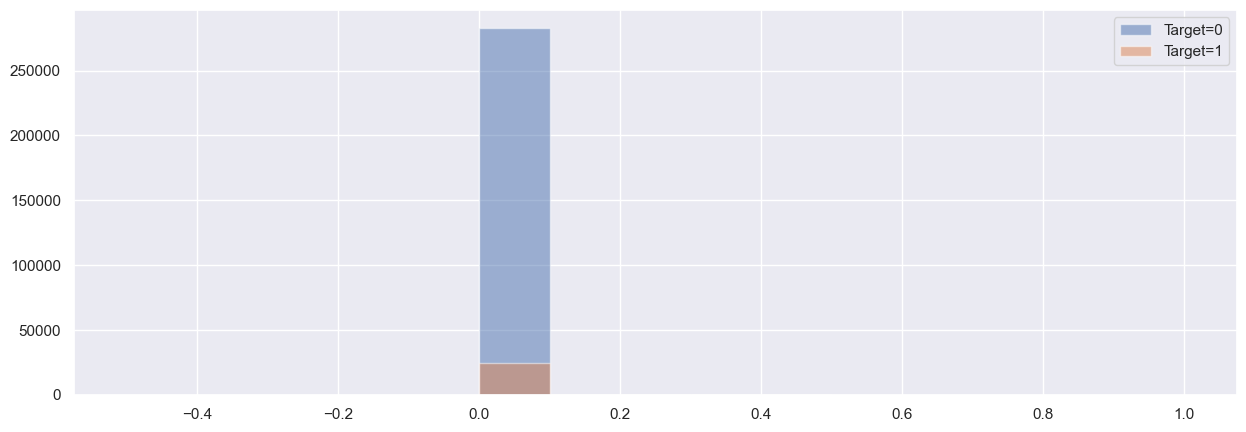

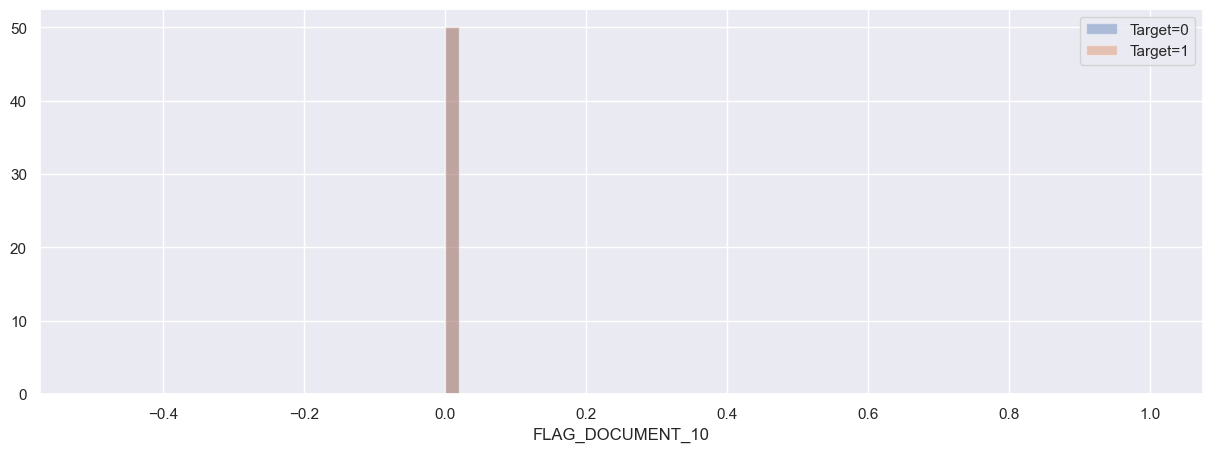

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_11


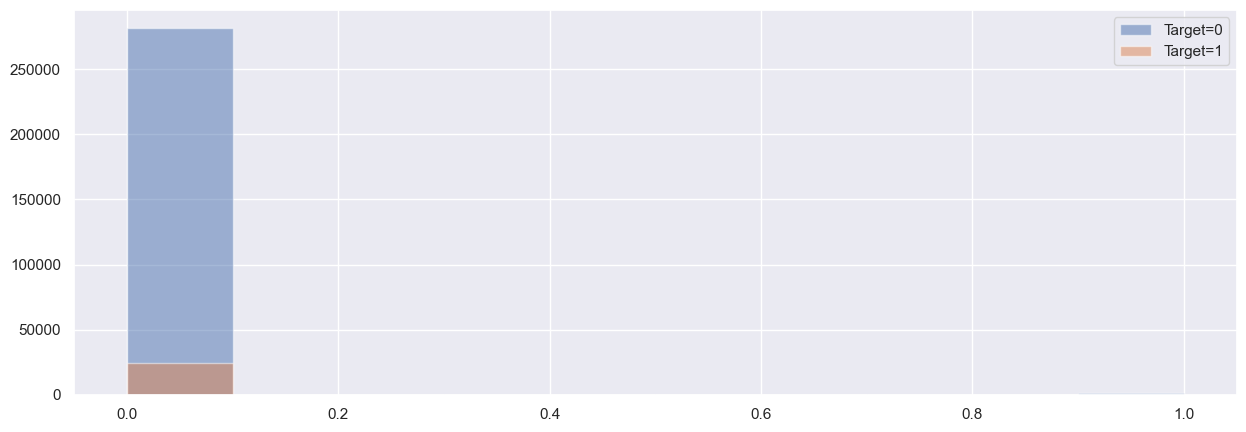

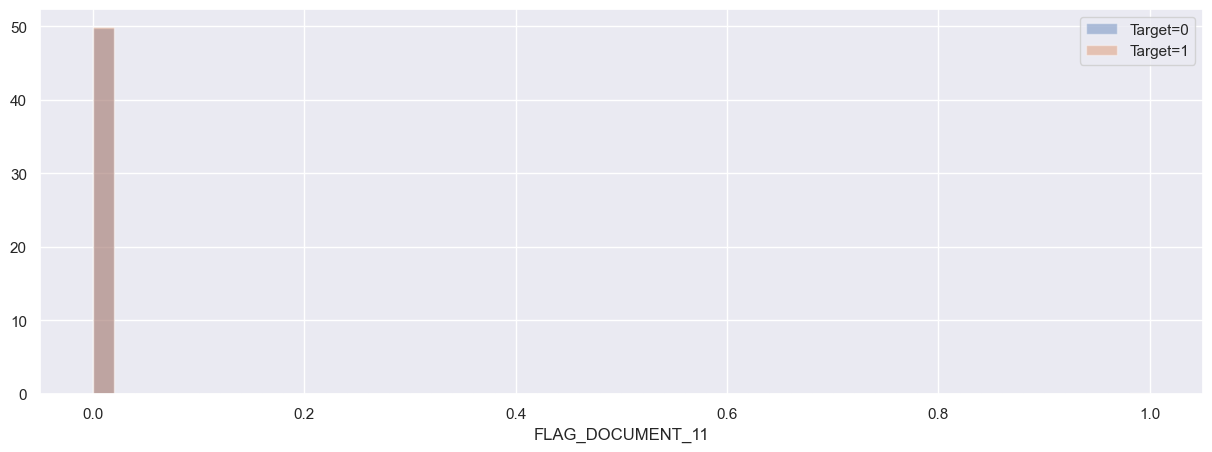

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_12


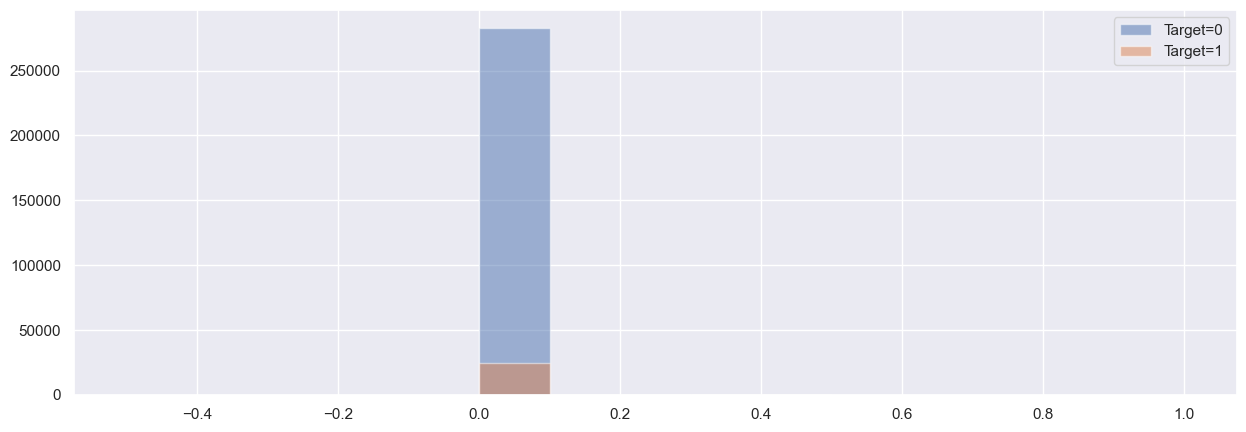

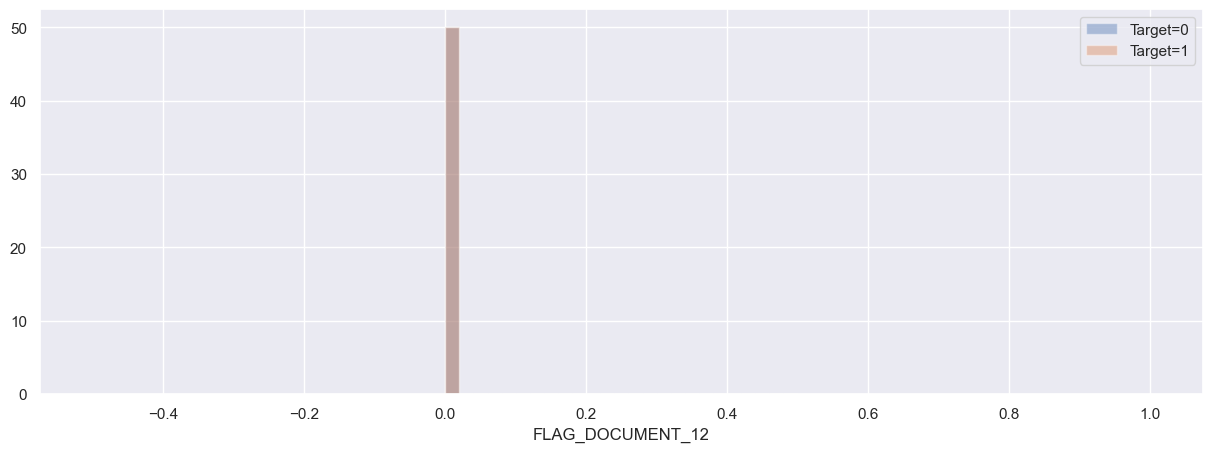

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_13


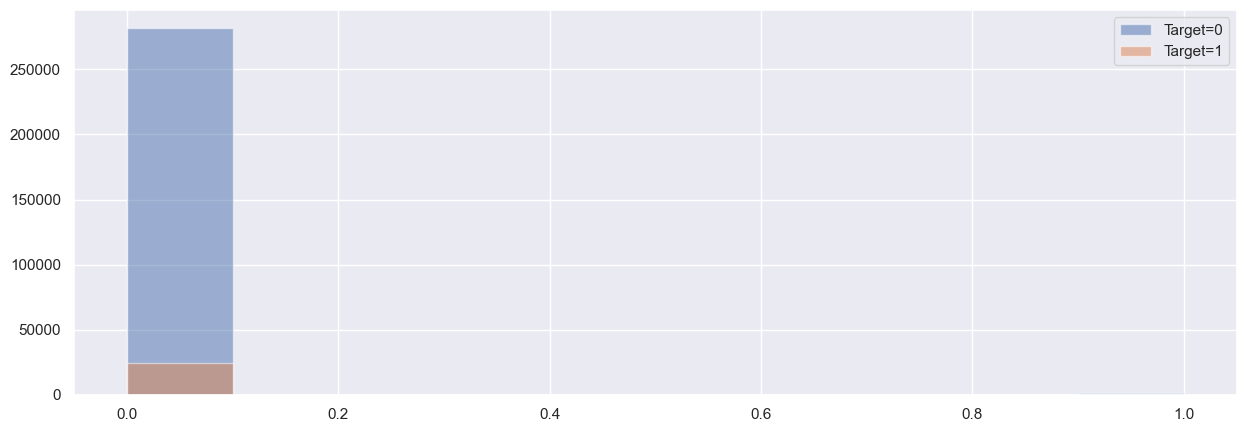

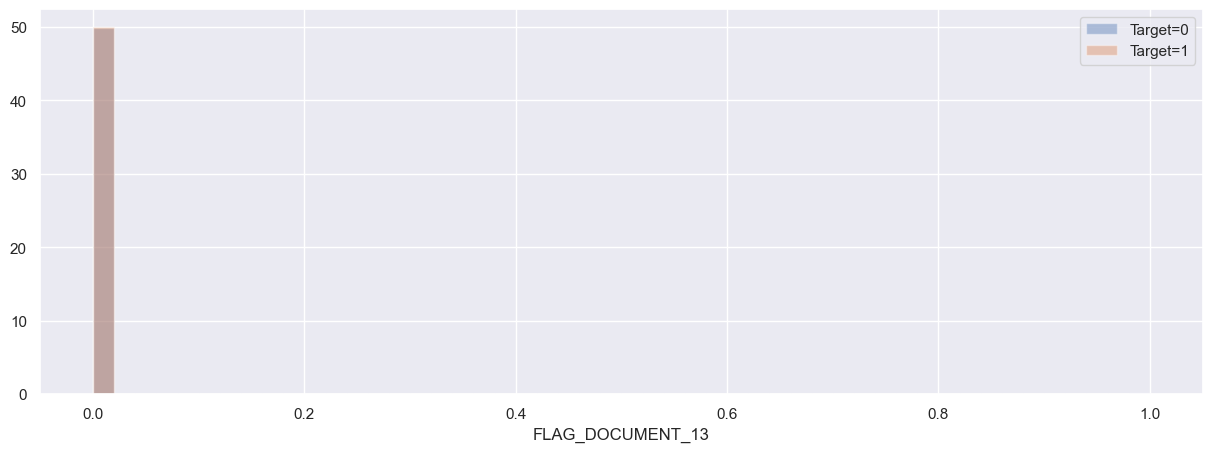

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_14


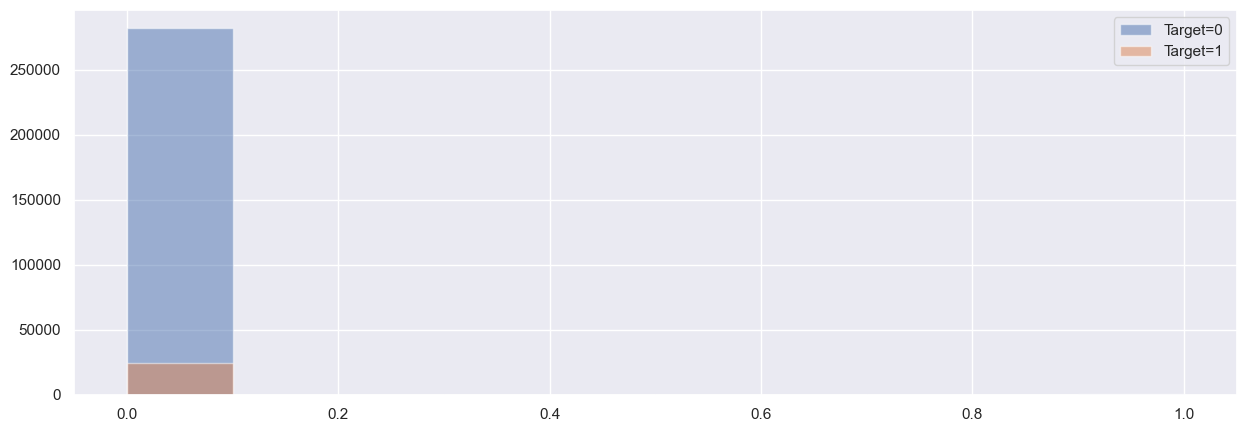

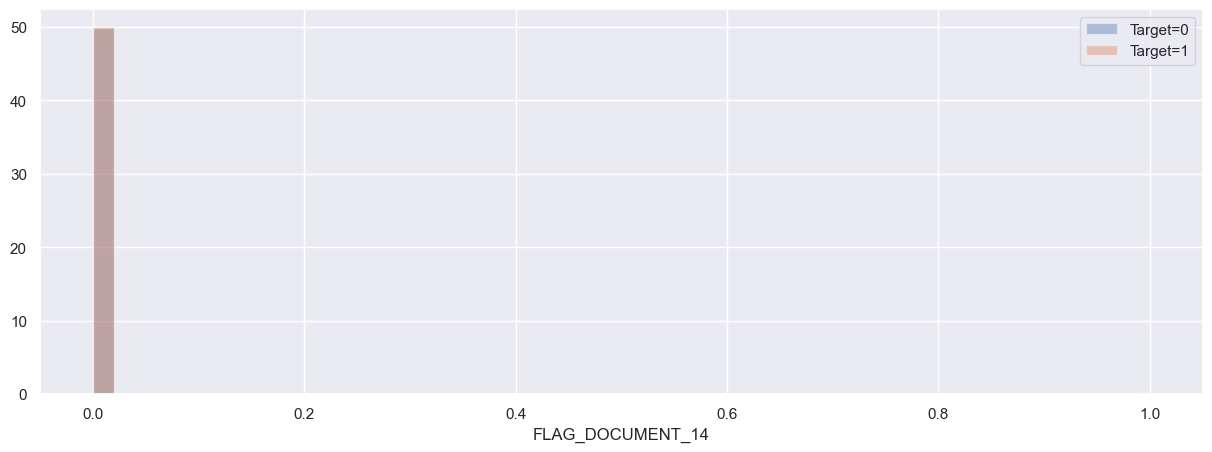

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_15


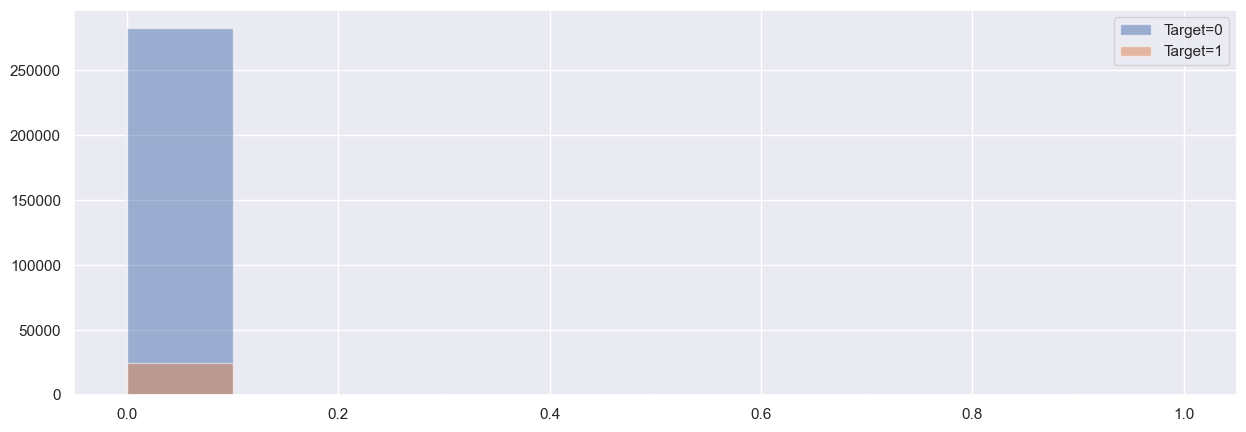

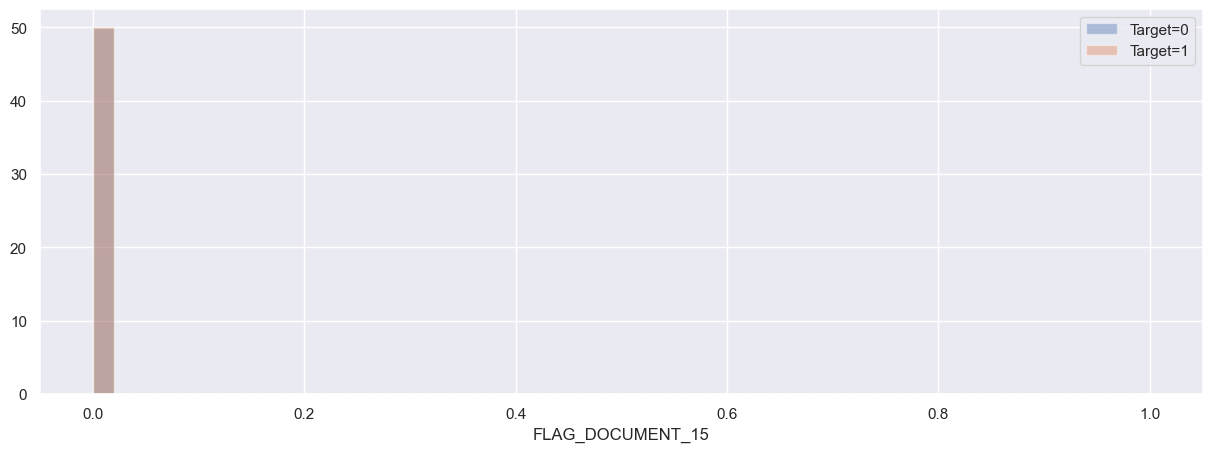

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_16


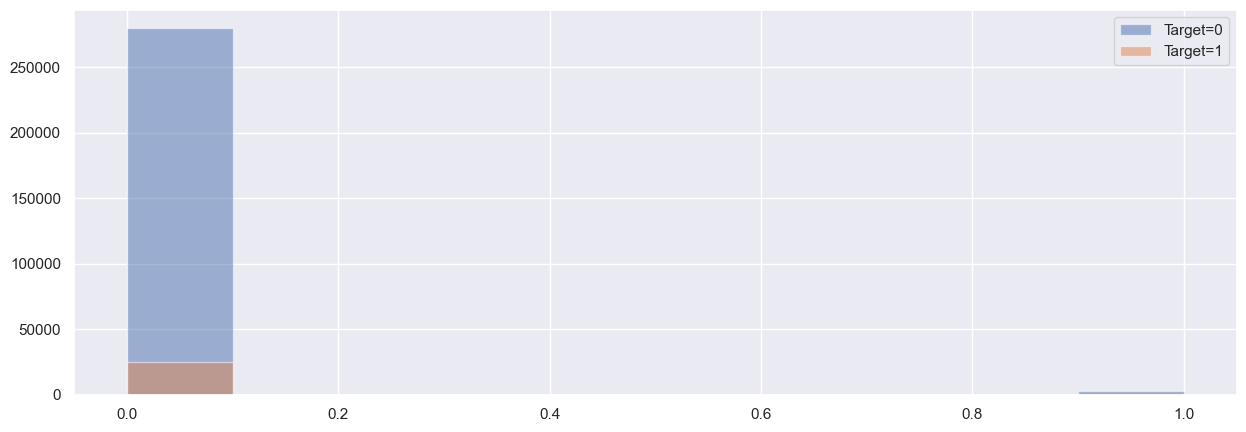

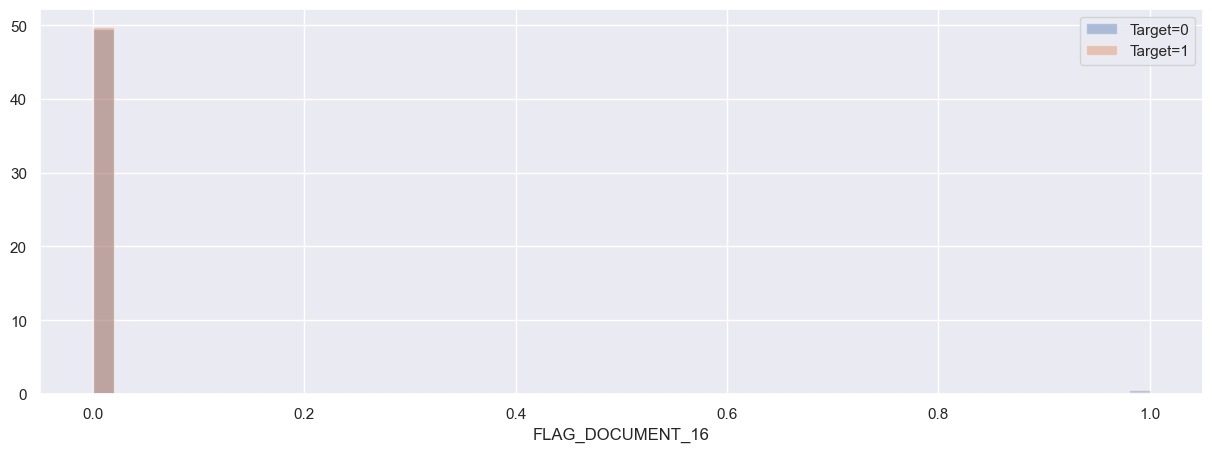

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_17


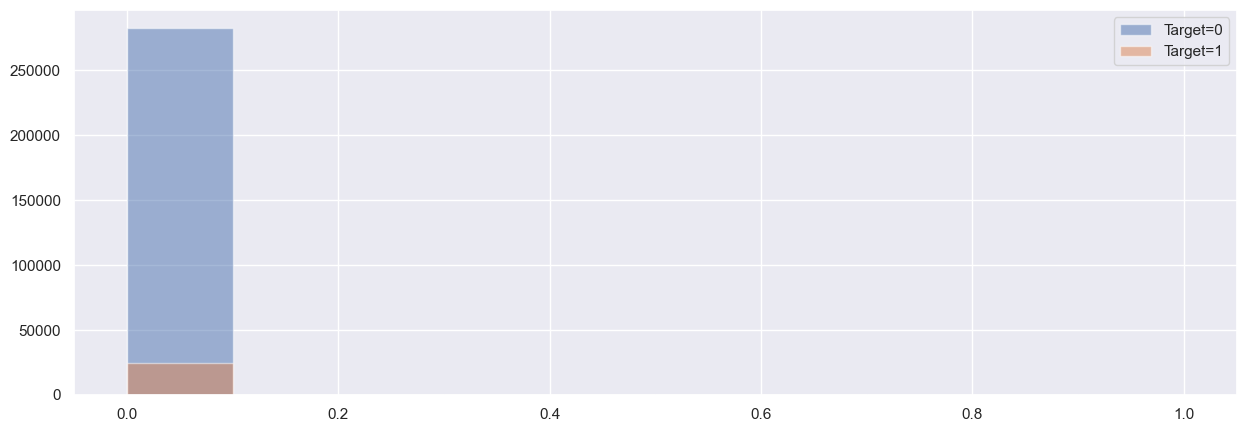

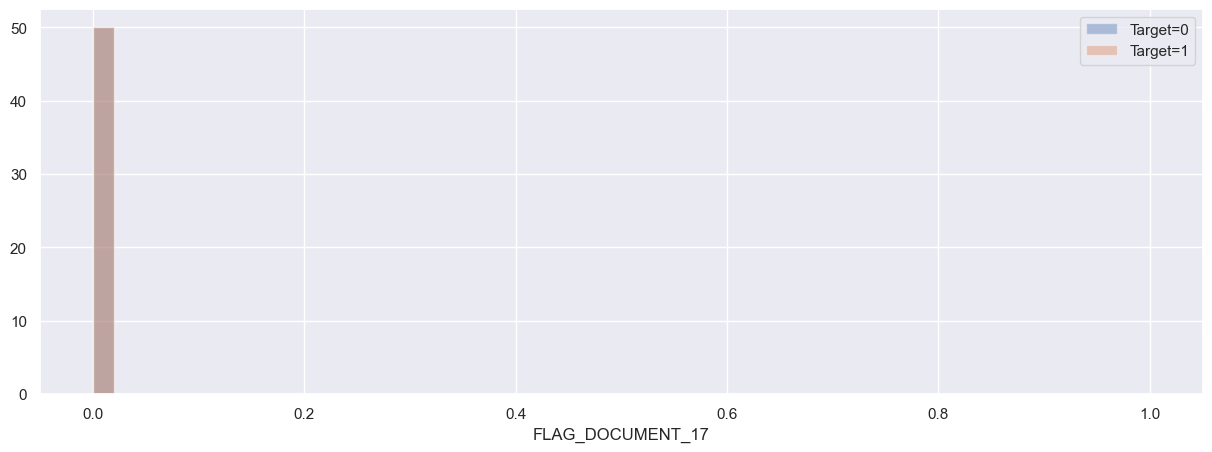

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_18


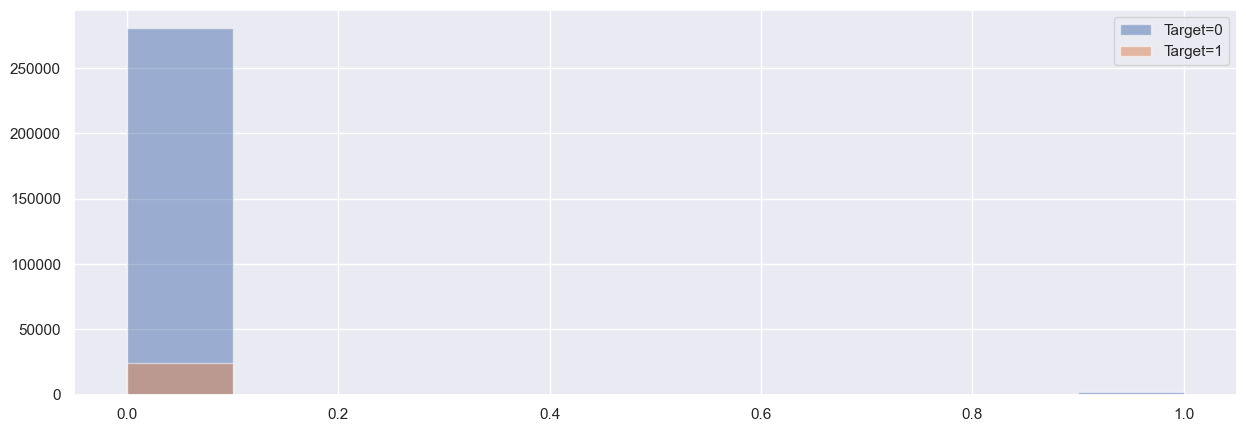

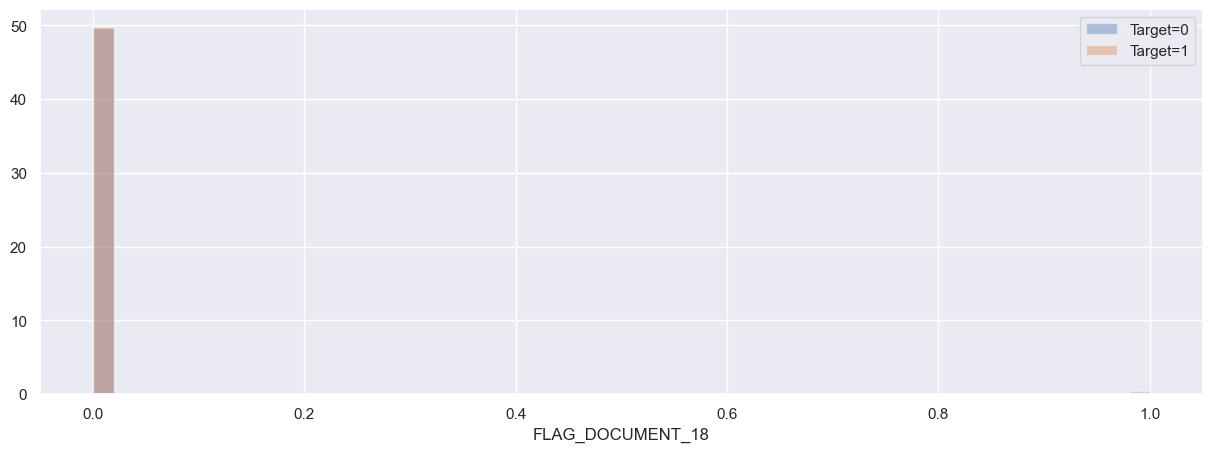

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_19


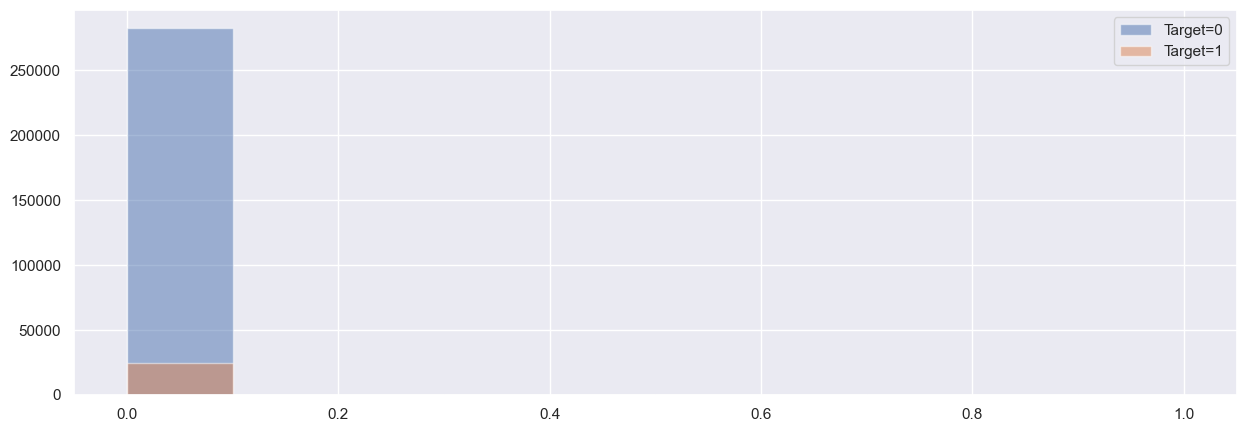

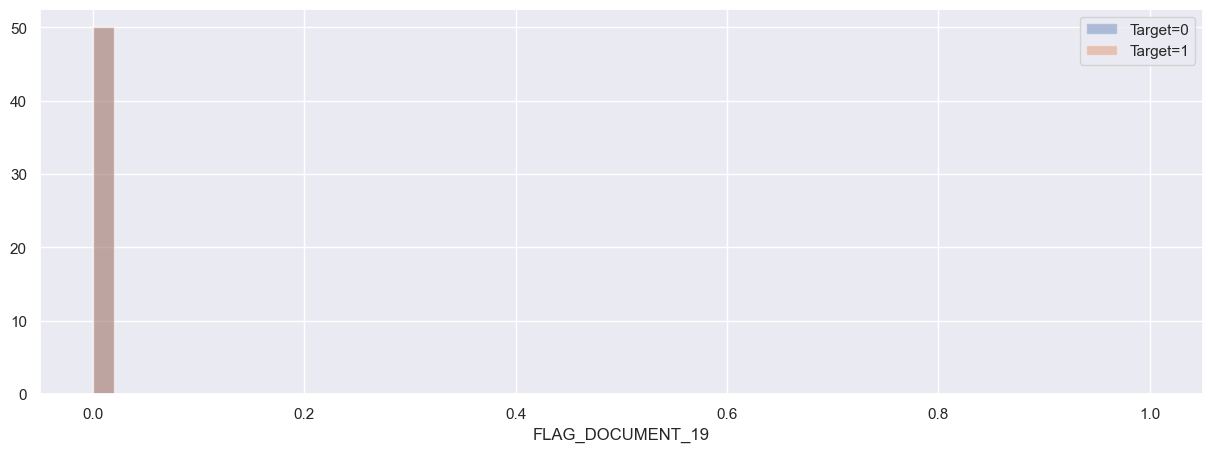

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_20


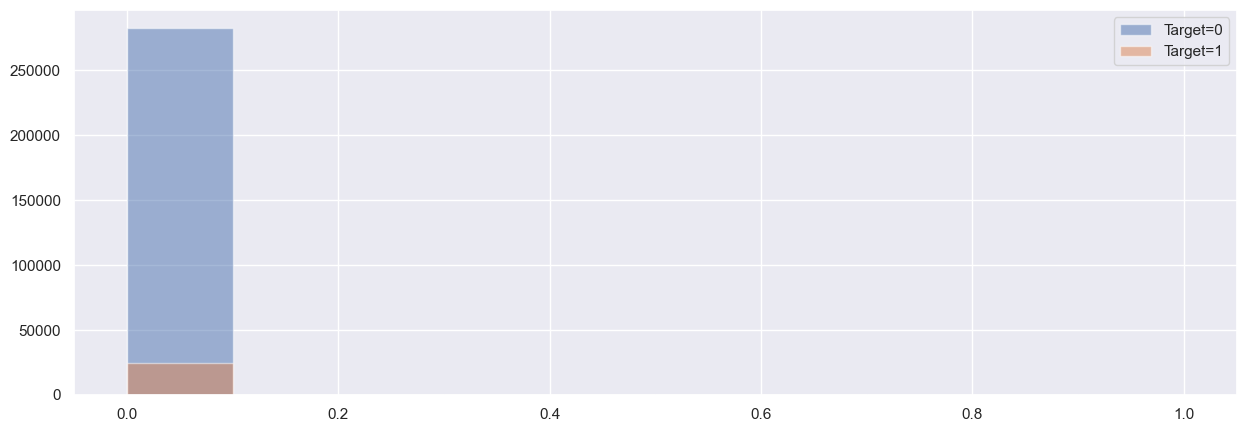

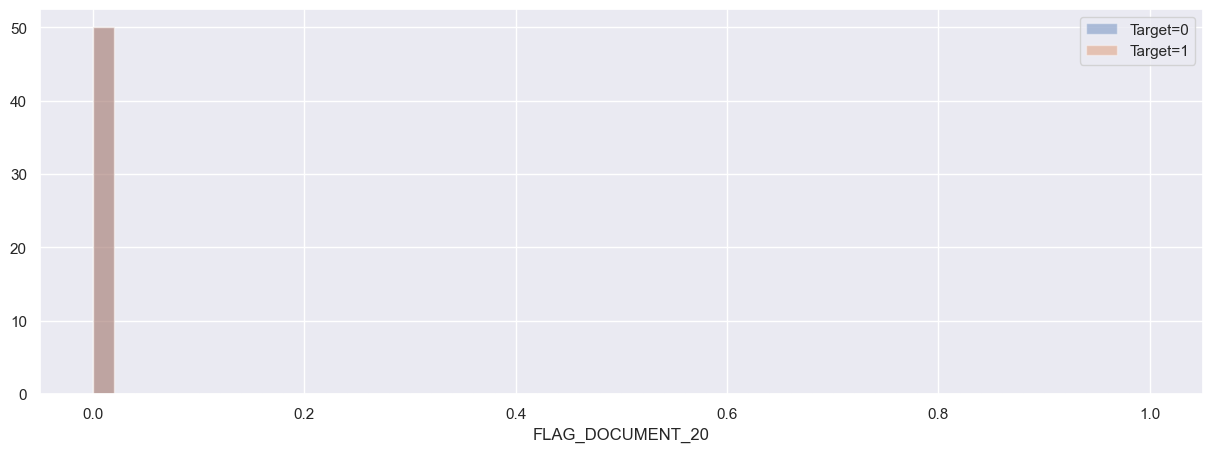

------------------------------------------------------------------------
Plot of FLAG_DOCUMENT_21


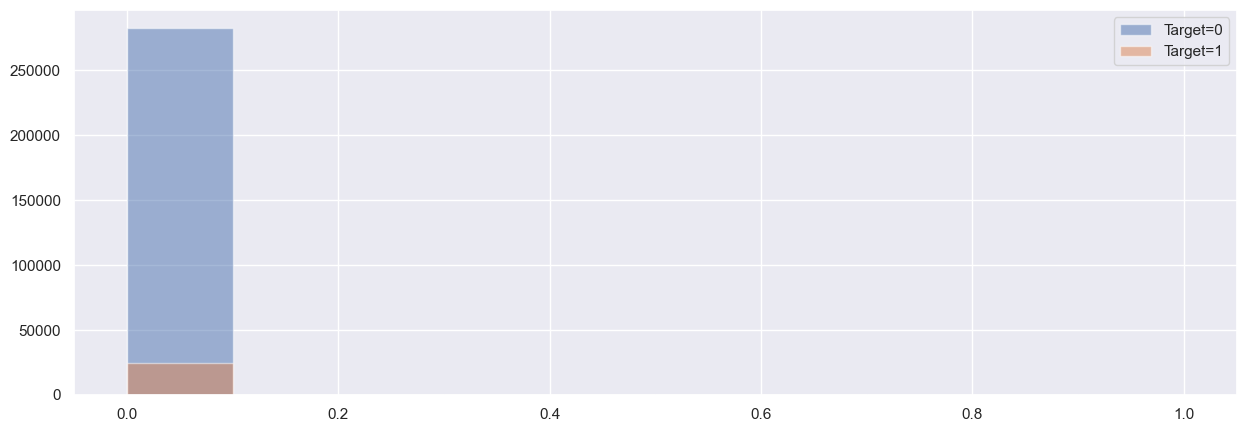

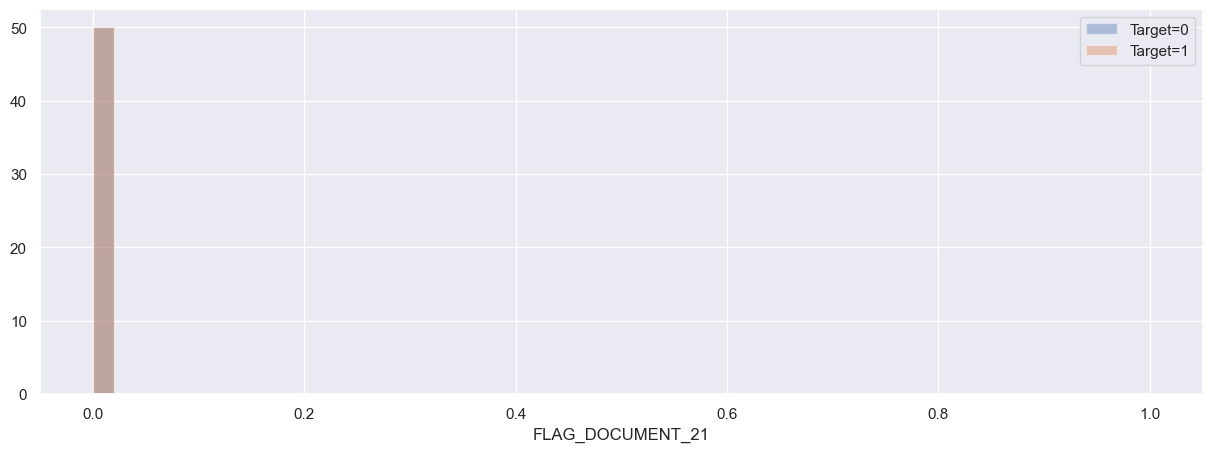

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_HOUR


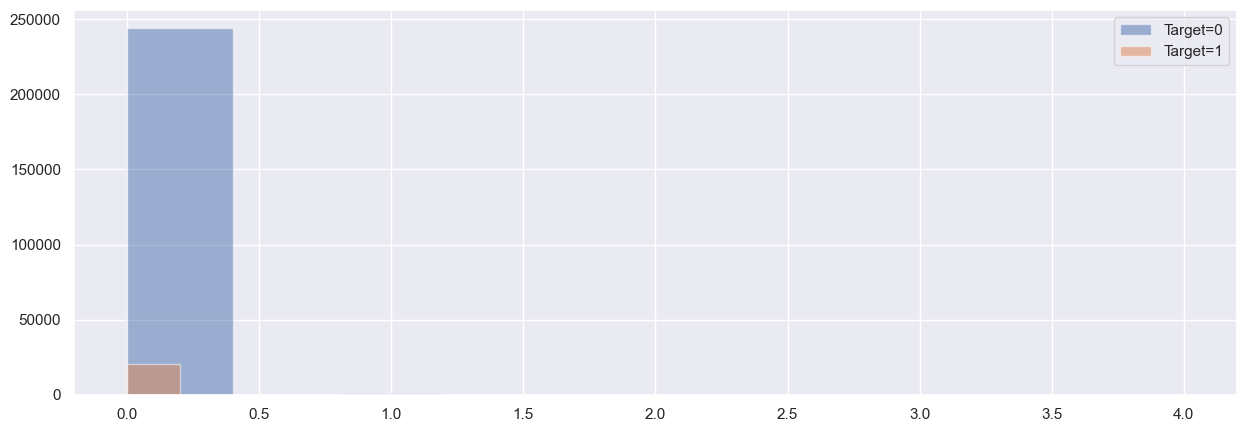

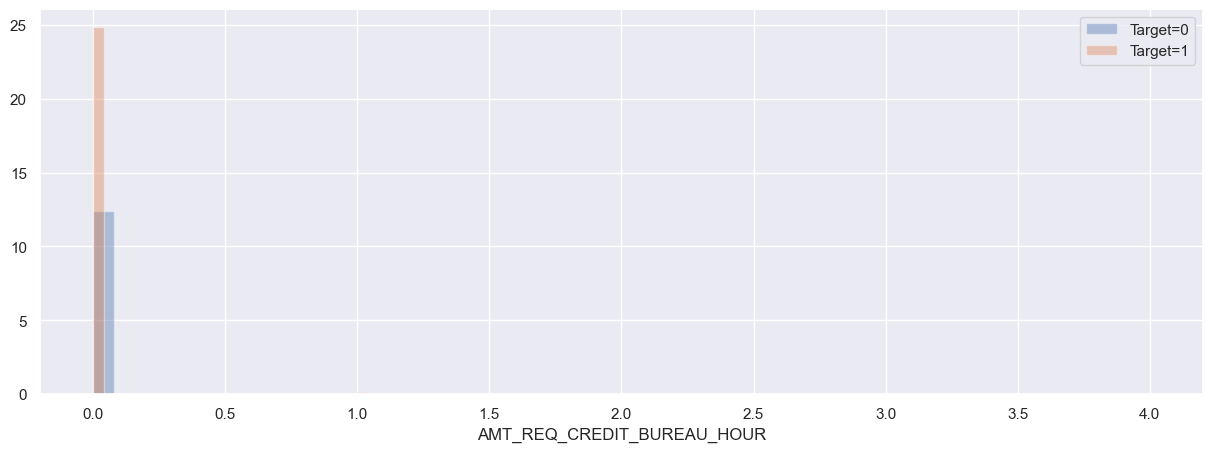

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_DAY


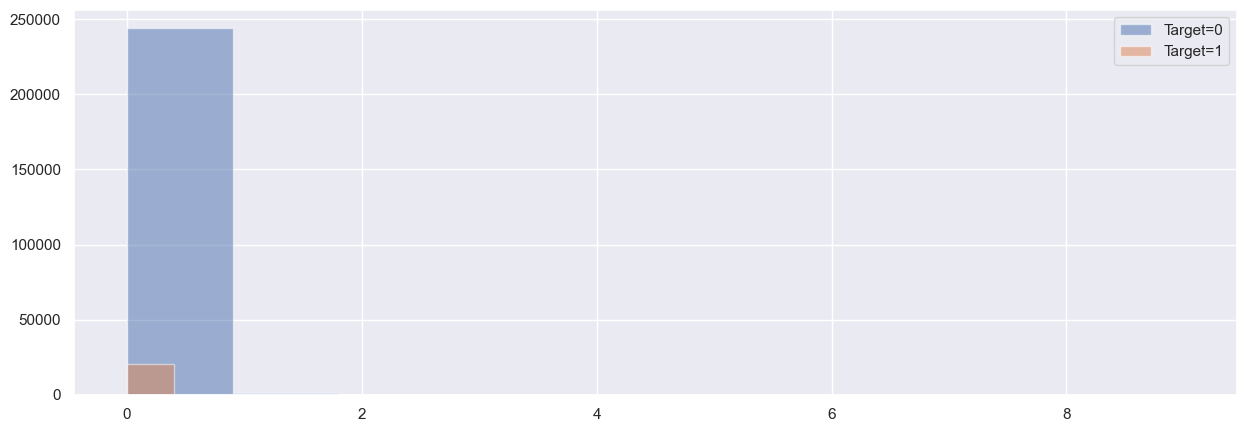

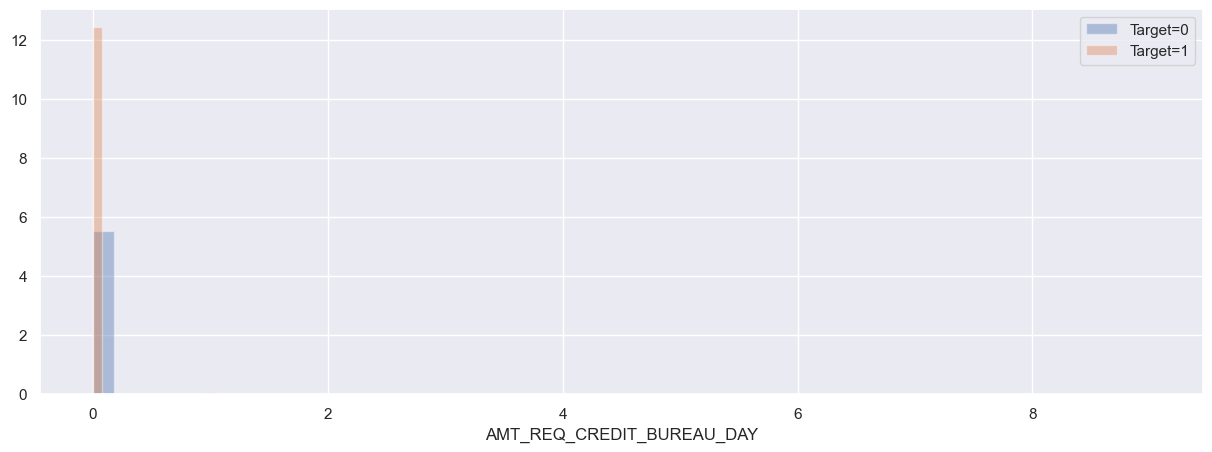

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_WEEK


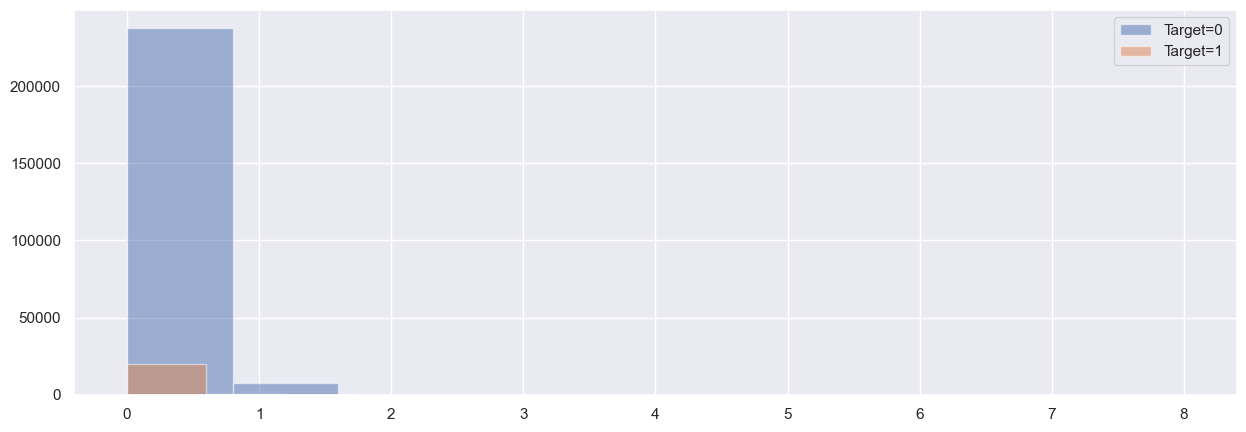

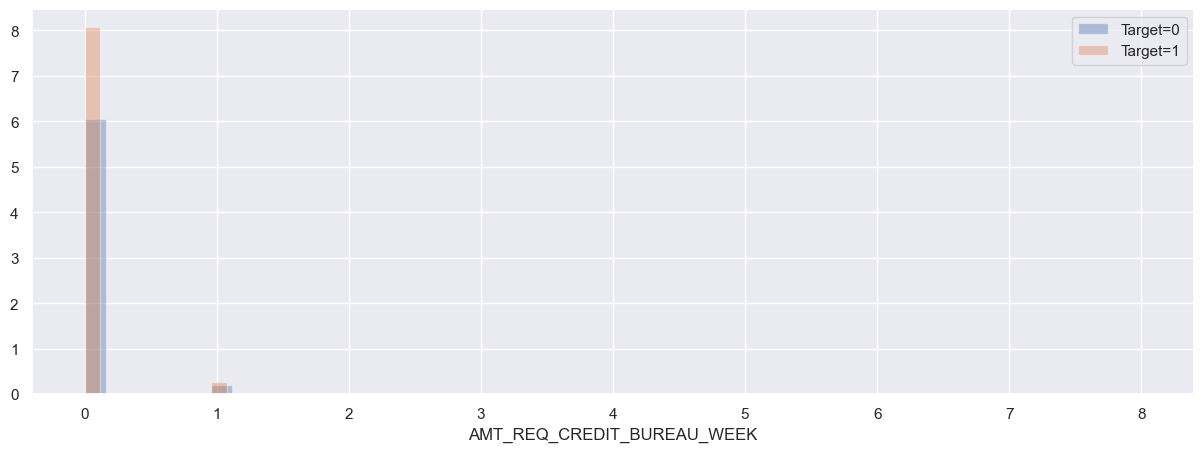

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_MON


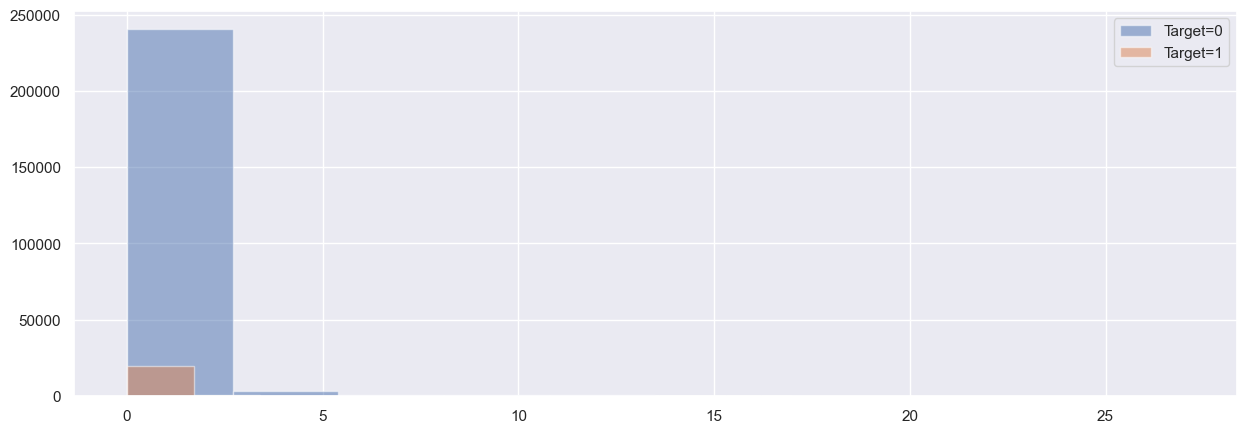

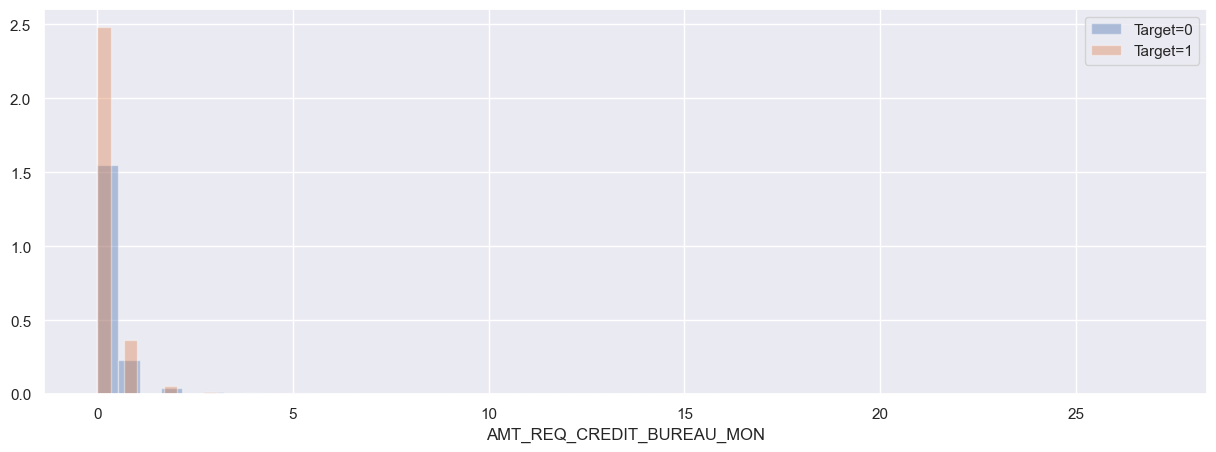

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_QRT


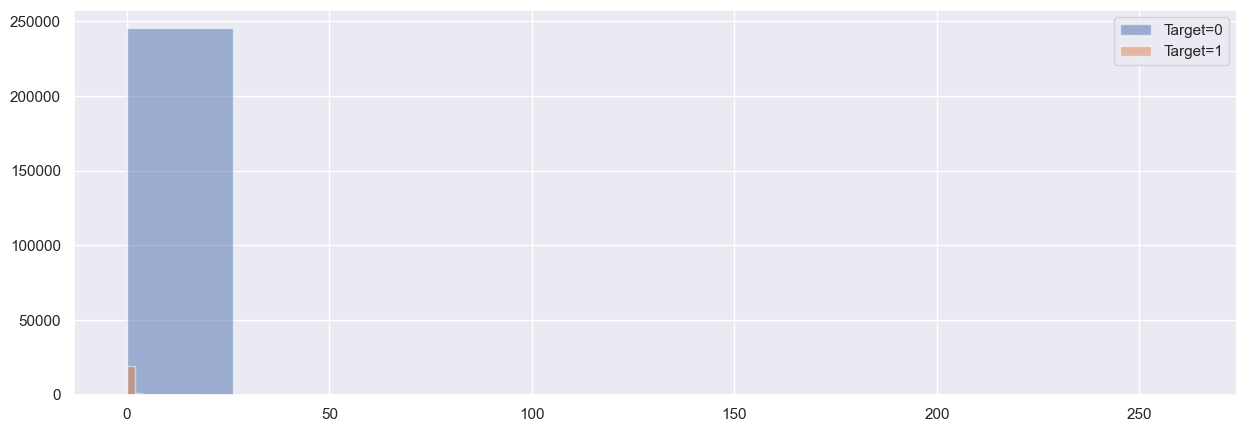

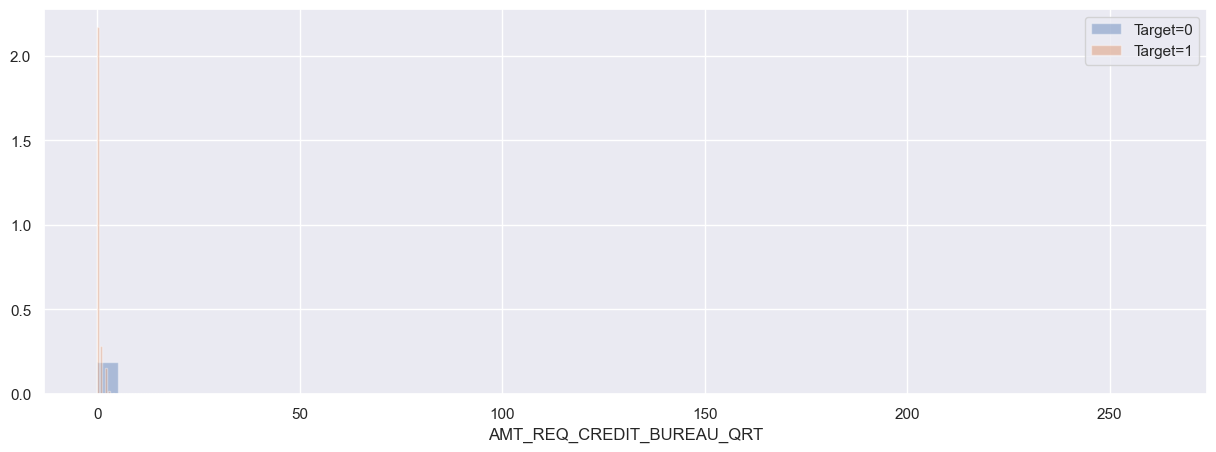

------------------------------------------------------------------------
Plot of AMT_REQ_CREDIT_BUREAU_YEAR


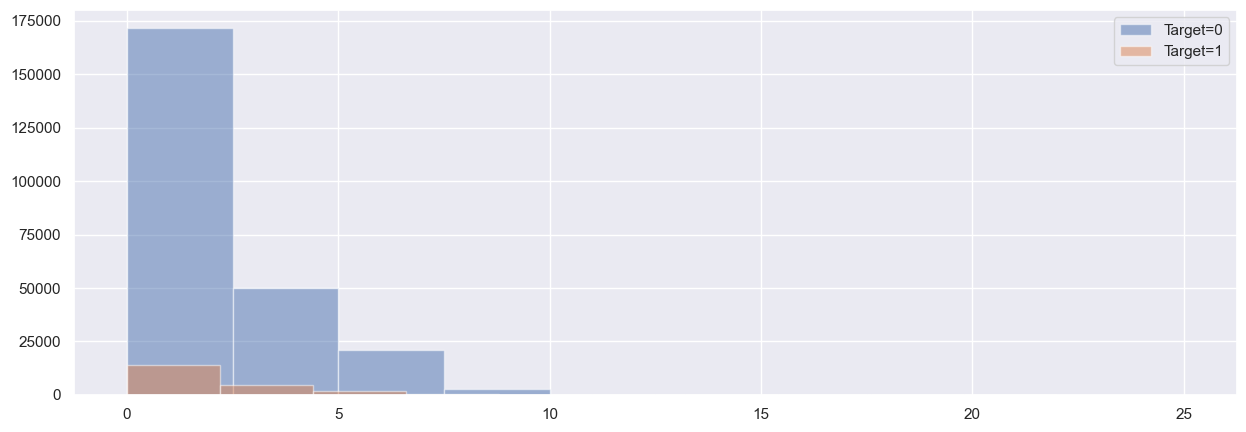

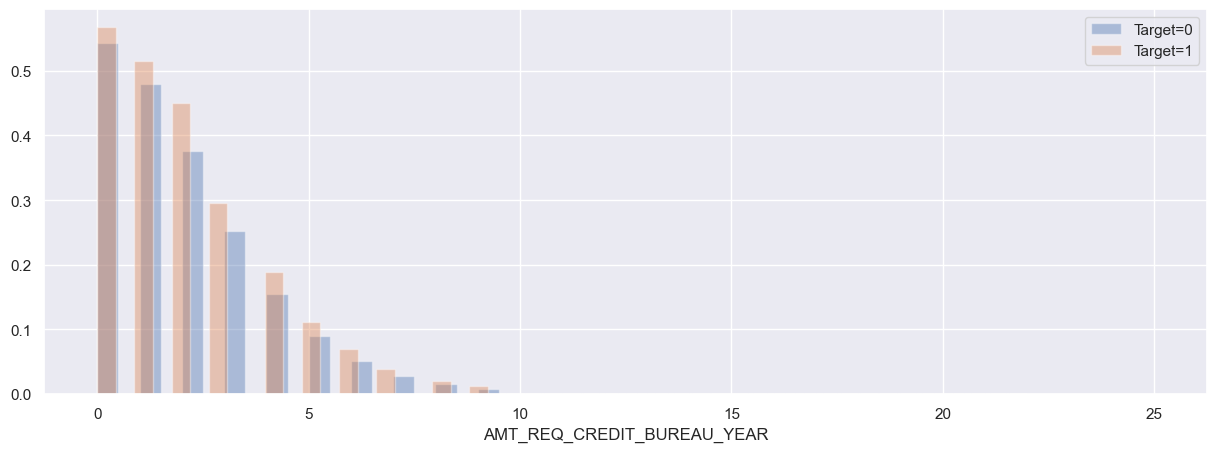

------------------------------------------------------------------------


In [156]:
# Iterate over each categorical column to generate plots
for column in train_categorical:
    # Construct and print the title for current plot
    title = "Plot of " + column
    print(title)

    # Plot histograms for the distribution of the variable for both TARGET categories
    plt.hist(train_0[column], alpha=0.5, label='Target=0')  # Histogram for category '0'
    plt.hist(train_1[column], alpha=0.5, label='Target=1')  # Histogram for category '1'
    plt.legend()  # Add a legend to distinguish between categories
    plt.show()  # Display the histogram

    # Plot distribution plots for the non-null values in both TARGET categories
    sns.distplot(train_0[column].dropna(), label='Target=0', kde=False, norm_hist=True)  # Distribution plot for '0'
    sns.distplot(train_1[column].dropna(), label='Target=1', kde=False, norm_hist=True)  # Distribution plot for '1'
    plt.legend()  # Add a legend to distinguish between categories
    plt.show()  # Display the distribution plot

    # Placeholder for a box plot function that might be defined elsewhere
    # box_plot(train_0, train_1, column)

    # Print a separator for readability between plots
    print("------------------------------------------------------------------------")

Column Insights For target = 0 and target = 1 are
- AMT_CREDIT:
- AMT_ANNUITY:
- AMT_GOODS_PRICE
- DAYS_BIRTH
- HOURS_APPR_PROCESS_START
- EXT_SOUCE_2
- EXT_SOURCE_3
- AMT_REQ_CREDIT_BUREAU_YEAR

## Reading previous application

In [157]:
# Read the data from the file 'previous_application.csv' into a DataFrame
previous_application = pd.read_csv("D:/Krishna's upGrad/Credit Risk Analysis/previous_application.csv")

# Display the first few rows of the DataFrame 'previous_application'
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [158]:
# Shape of previous application
previous_application.shape

(1670214, 37)

### There are duplicates 'SK_ID_CURR' as a person could have taken loan multiple times

In [159]:
# Number of unique id in previous application
previous_application.SK_ID_PREV.value_counts()

SK_ID_PREV
2030495    1
1035848    1
1526498    1
2148893    1
2437429    1
          ..
2811649    1
1221292    1
2780117    1
2194001    1
2418762    1
Name: count, Length: 1670214, dtype: int64

In [160]:
# Number of unique id in previous application
previous_application.SK_ID_CURR.value_counts()

SK_ID_CURR
187868    77
265681    73
173680    72
242412    68
206783    67
          ..
135285     1
311960     1
427136     1
241434     1
191629     1
Name: count, Length: 338857, dtype: int64


From the information provided, the shape of the previous application dataset is (1670214, 37), and the count of unique SK_ID_PREV entries matches this, standing at 1670214. However, the count of unique SK_ID_CURR entries is significantly lower, at 338857. This discrepancy indicates that the SK_ID_PREV values contain duplicates, suggesting that multiple entries pertain to the same current application ID (SK_ID_CURR).

# Merging Datasets

### Merging DataFrames: Train and Previous Application Based on SK_ID_PREV

In [161]:
# Merge 'train' DataFrame with 'previous_application' DataFrame based on 'SK_ID_CURR'
# Using 'inner' join to retain only common rows between the two DataFrames
previous_train = train.merge(previous_application, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [162]:
previous_train.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002      1           Cash loans           M            N   
1      100003      0           Cash loans           F            N   
2      100003      0           Cash loans           F            N   
3      100003      0           Cash loans           F            N   
4      100004      0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  ...  NAME_SELLER_INDUSTRY CNT_PAYMENT NAME_YIELD_GROUP  \
0        24700.5  ...       Auto technology        24.0       low_normal   
1        35698.5  ...                   XNA        12.0       low_normal   
2        35698.5  ...             Furniture         6.0           middle   
3        35698.5  ...  Consumer electronics        12.0           middle   
4         6750.0  ...          Connectivity         4.0           middle   

           PRODUCT_COMBINATION DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
0      POS other with interest           365243.0         -565.0   
1             Cash X-Sell: low           365243.0         -716.0   
2   POS industry with interest           365243.0         -797.0   
3  POS household with interest           365243.0        -2310.0   
4  POS mobile without interest           365243.0         -784.0   

   DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0                      125.0          -25.0             -17.0   
1                     -386.0         -536.0            -527.0   
2                     -647.0         -647.0            -639.0   
3                    -1980.0        -1980.0           -1976.0   
4                     -694.0         -724.0            -714.0   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0  
2                        0.0  
3                        1.0  
4                        0.0  

[5 rows x 118 columns]

### 8. Previous Application Analysis

### Interpretation Using Data Dictionary

To better understand the influence of variables, the `columns_description.csv` file was used. This helped identify the meaning and significance of variables such as:

- `NAME_CONTRACT_TYPE`: Type of loan the client applied for.
- `AMT_CREDIT`: Total credit amount of the loan.
- `NAME_INCOME_TYPE`: Source of income which reflects job stability.
- `EXT_SOURCE_2` and `EXT_SOURCE_3`: External risk scores which are highly predictive.

Incorporating these definitions enhanced the business interpretability of the insights derived.


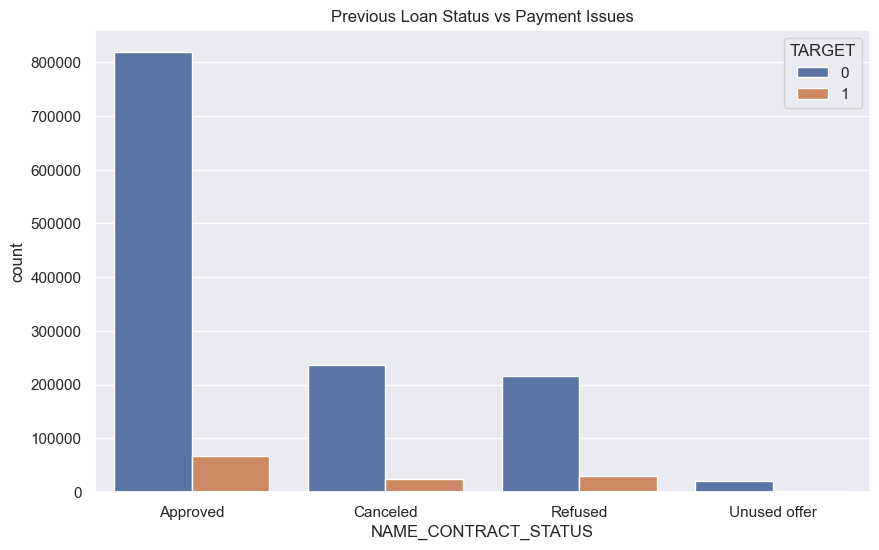

In [163]:
# 1. Check columns in prev_clean
#print("Columns in prev_clean:", prev_clean.columns.tolist())

# 2. Merge data
merged = pd.merge(
    application_train,
    previous_train[['SK_ID_CURR', 'NAME_CONTRACT_STATUS']],  # Ensure this column exists
    on='SK_ID_CURR',
    how='left',
    suffixes=('', '_prev')  # Suffix added only if there's a name clash
)

# 3. Verify merged column name
#print("Columns in merged data:", merged.columns.tolist())

# 4. Plot with the CORRECT column name
plt.figure(figsize=(10, 6))
sns.countplot(
    x='NAME_CONTRACT_STATUS',  # Adjust to match actual column name
    hue='TARGET',
    data=merged
)
plt.title('Previous Loan Status vs Payment Issues')
plt.show()

In [164]:
# Get the names of all columns in the DataFrame 'previous_application'
previous_application.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

### The merged dataframe also has multiple values for SK_ID_CURR

In [165]:
# Count the occurrences of each unique value in the 'SK_ID_CURR' column of the DataFrame 'previous_application' and display the top values
previous_application['SK_ID_CURR'].value_counts().head()

SK_ID_CURR
187868    77
265681    73
173680    72
242412    68
206783    67
Name: count, dtype: int64

### Segmenting the dataset Based on Target = 0 and Target = 1

In [166]:
# Create a subset of the DataFrame 'train' containing records where the 'TARGET' column is equal to '0'
train_0 = train.loc[train['TARGET'] == '0']

# Create a subset of the DataFrame 'train' containing records where the 'TARGET' column is equal to '1'
train_1 = train.loc[train['TARGET'] == '1']

In [167]:
# Create a subset of the DataFrame 'previous_train' containing records where the 'TARGET' column is equal to '0'
ptrain_0 = previous_train.loc[previous_train['TARGET'] == '0']

# Create a subset of the DataFrame 'previous_train' containing records where the 'TARGET' column is equal to '1'
ptrain_1 = previous_train.loc[previous_train['TARGET'] == '1']

## Plotting data

In [168]:
def plotting(column, hue):
    # Assign column and hue parameters to local variables
    col = column
    hue = hue

    # Create a figure for the plots with a specific size
    fig = plt.figure(figsize=(13,10))

    # Subplot 1: Pie chart showing the distribution of values in the column
    ax1 = plt.subplot(221)
    train[col].value_counts().plot.pie(autopct="%1.0f%%", ax=ax1)
    plt.title('Distribution of values for the column: '+ column)

    # Subplot 2: Bar plot displaying the distribution of values by target categories
    ax2 = plt.subplot(222)
    df = pd.DataFrame()
    df['0'] = ((train_0[col].value_counts()) / len(train_0))
    df['1'] = ((train_1[col].value_counts()) / len(train_1))
    df.plot.bar(ax=ax2)
    plt.title('Distribution of values by target category')

    # Subplot 3: Count plot showing the distribution of values for Target=0
    ax3 = plt.subplot(223)
    sns.countplot(x=col, hue=hue, data=ptrain_0, ax=ax3)
    plt.xticks(rotation=90)
    plt.title('Distribution of values for Target=0')

    # Subplot 4: Count plot showing the distribution of values for Target=1
    ax4 = plt.subplot(224)
    sns.countplot(x=col, hue=hue, data=ptrain_1, ax=ax4)
    plt.xticks(rotation=90)
    plt.title('Distribution of values for Target=1')

    # Adjust layout to prevent overlap
    fig.tight_layout()

    # Display the plots
    plt.show()


# Bivariate Analysis

### Plotting NAME_EDUCATION_TYPE

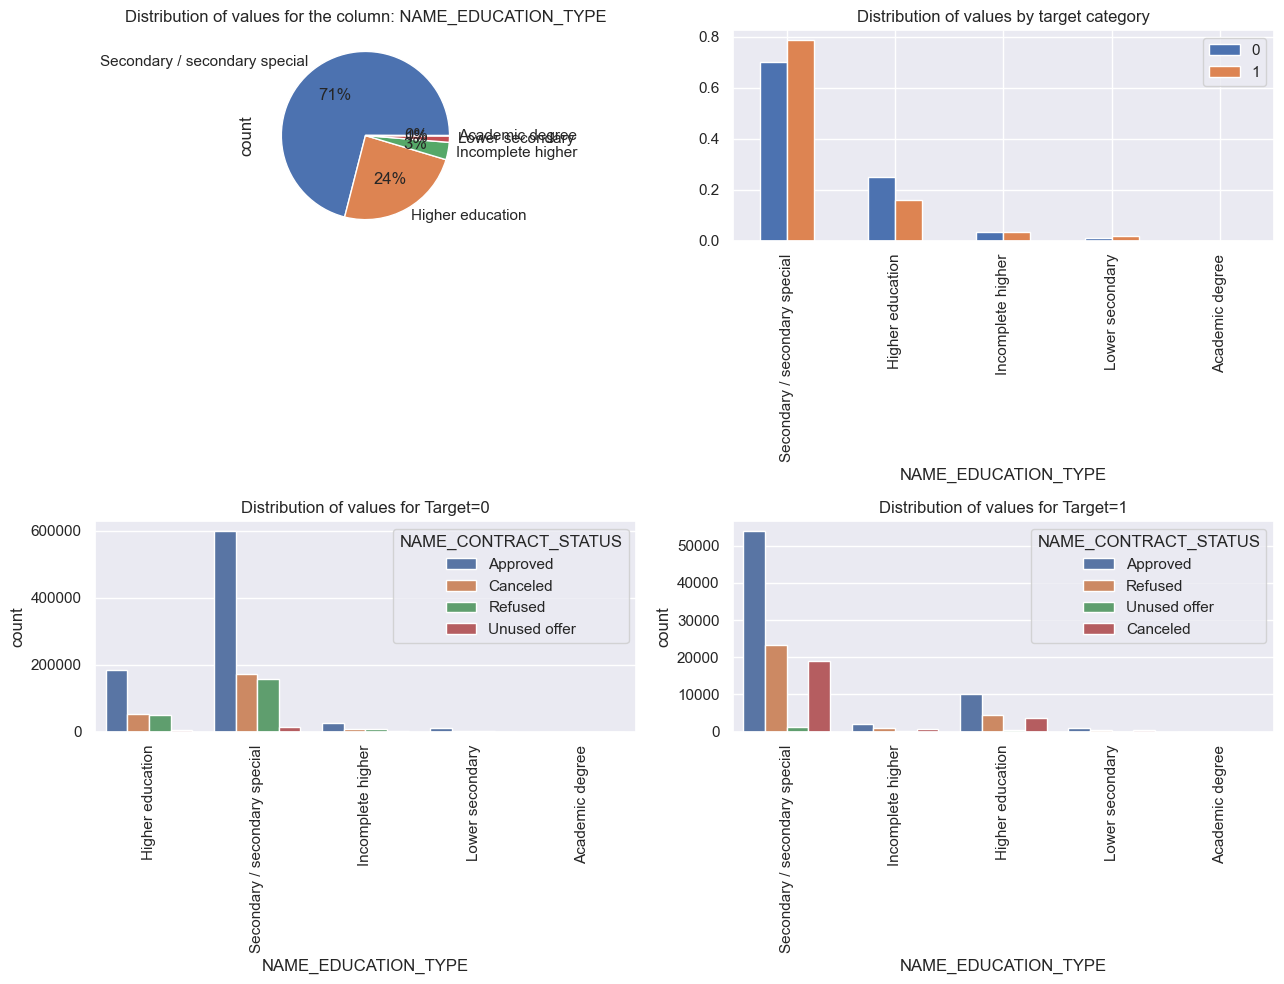

In [169]:
plotting('NAME_EDUCATION_TYPE','NAME_CONTRACT_STATUS')

Observation: People tend to make more loan for 'Secondary special' and their loan is also approved.

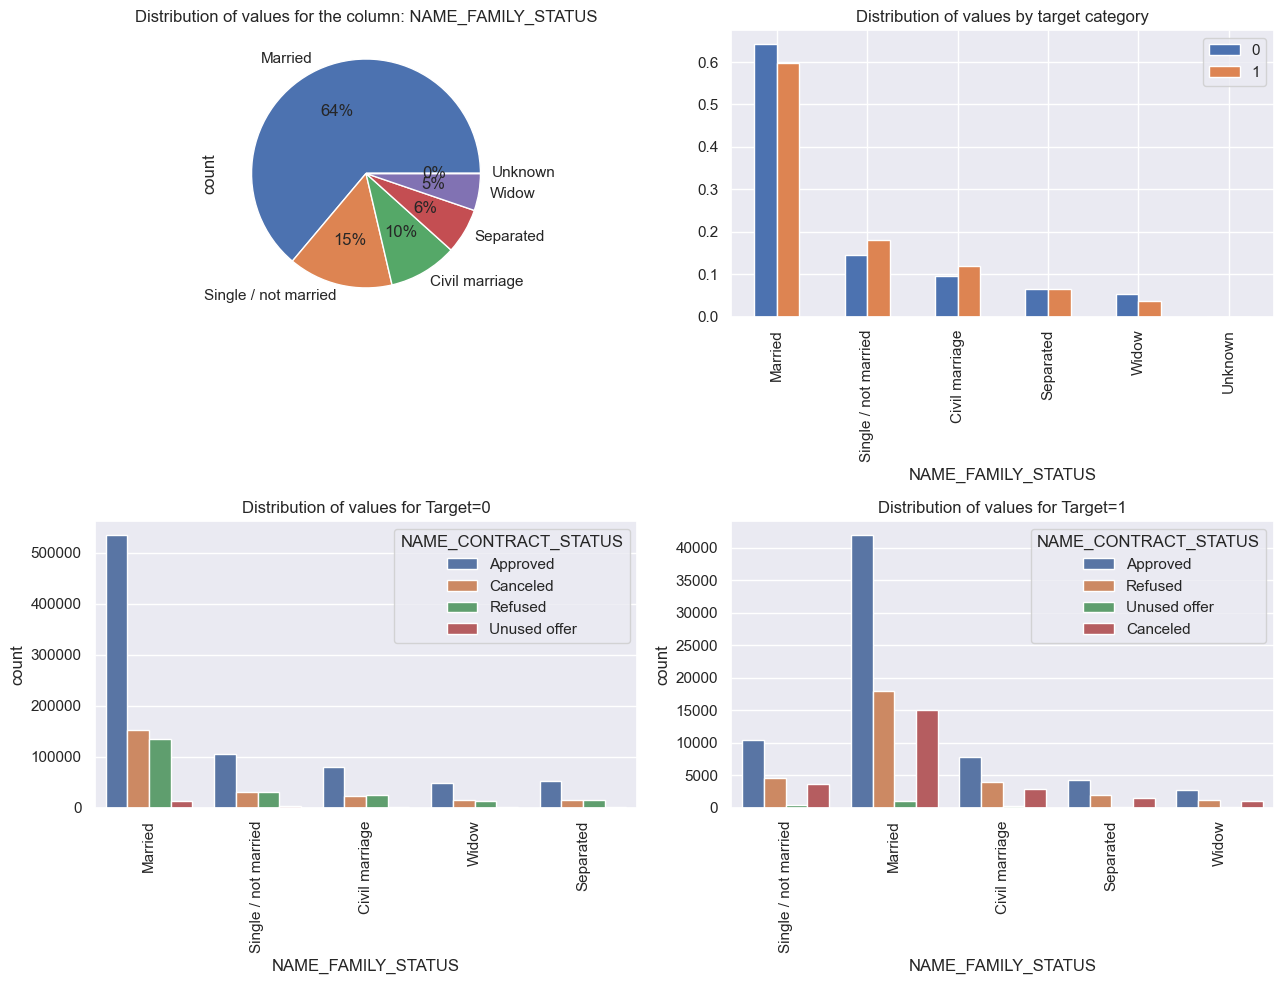

In [170]:
plotting('NAME_FAMILY_STATUS','NAME_CONTRACT_STATUS')

Observation: Married people are more likely to pay back their loans on time compared to single people, as indicated by the differences in loan approval statuses.

### Plotting: NAME_HOUSING_TYPE

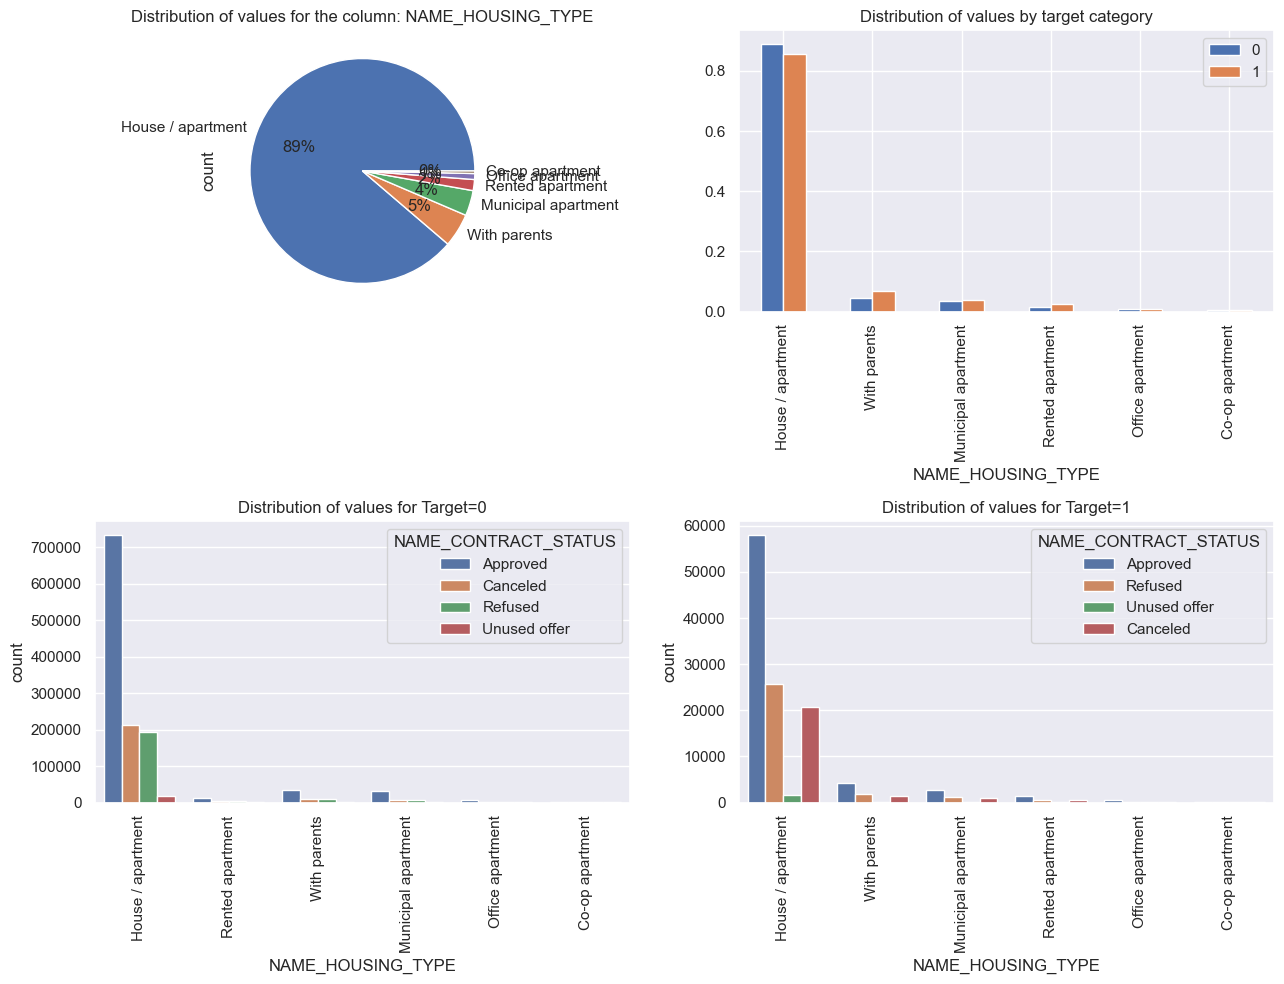

In [171]:
plotting('NAME_HOUSING_TYPE','NAME_CONTRACT_STATUS')

**Observation**: There's a distinct variation among the approval statuses ("Approved, Refused, Unused, and Cancelled") concerning the "House/apartment" category.

### Plotting: ORGANIZATION_TYPE

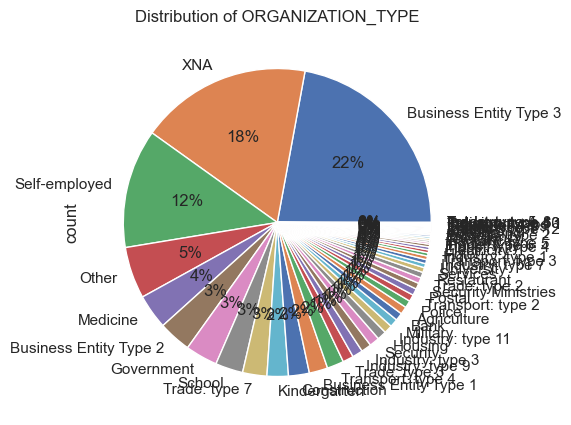

In [172]:
# Plot a pie chart to visualize the distribution of values in the 'ORGANIZATION_TYPE' column
col = 'ORGANIZATION_TYPE'
train[col].value_counts().plot.pie(autopct="%1.0f%%")
plt.title("Distribution of " + col)
plt.show()


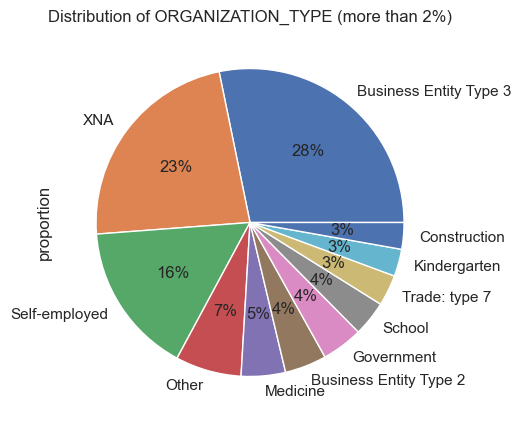

In [173]:
value_counts = train[col].value_counts(normalize=True) * 100  # Calculate percentage of each value count

# Filter out value counts that are more than 2 percent
value_counts_filtered = value_counts[value_counts > 2]

# Plot pie chart only if there are values with more than 2 percent count
if not value_counts_filtered.empty:
    value_counts_filtered.plot.pie(autopct="%1.0f%%")
    plt.title(f"Distribution of {col} (more than 2%)")
    plt.show()

<Axes: xlabel='ORGANIZATION_TYPE'>

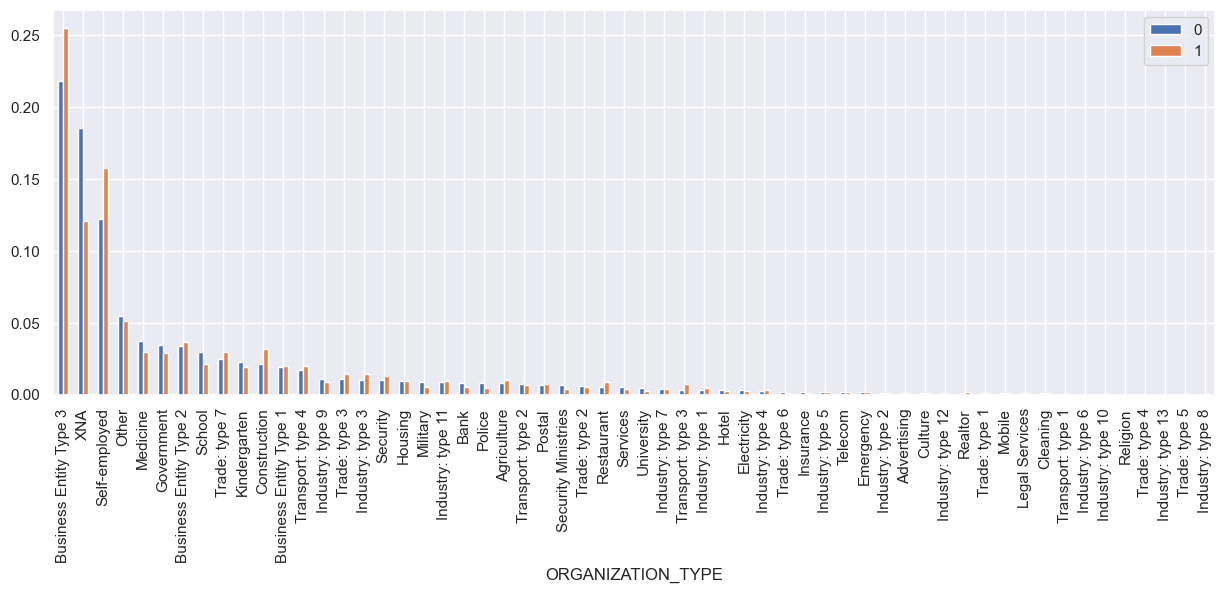

In [174]:
# Define the column of interest
col = 'ORGANIZATION_TYPE'

# Create an empty DataFrame to hold the proportions of each category for each target group
df = pd.DataFrame()

# Calculate the proportions of each category for Target=0 and Target=1 and store them in the DataFrame
df['0'] = train_0[col].value_counts(normalize=True)  # Proportions for Target=0
df['1'] = train_1[col].value_counts(normalize=True)  # Proportions for Target=1

# Set the figure size for the bar plot
sns.set(rc={'figure.figsize':(15,5)})

# Plot a bar plot showing the proportions of each category for both Target=0 and Target=1
df.plot.bar()


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57],
 [Text(0, 0, 'School'),
  Text(1, 0, 'Government'),
  Text(2, 0, 'Business Entity Type 3'),
  Text(3, 0, 'Religion'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'XNA'),
  Text(6, 0, 'Electricity'),
  Text(7, 0, 'Medicine'),
  Text(8, 0, 'Business Entity Type 2'),
  Text(9, 0, 'Self-employed'),
  Text(10, 0, 'Transport: type 2'),
  Text(11, 0, 'Construction'),
  Text(12, 0, 'Housing'),
  Text(13, 0, 'Kindergarten'),
  Text(14, 0, 'Trade: type 7'),
  Text(15, 0, 'Industry: type 11'),
  Text(16, 0, 'Military'),
  Text(17, 0, 'Services'),
  Text(18, 0, 'Security Ministries'),
  Text(19, 0, 'Transport: type 4'),
  Text(20, 0, 'Industry: type 1'),
  Text(21, 0, 'Eme

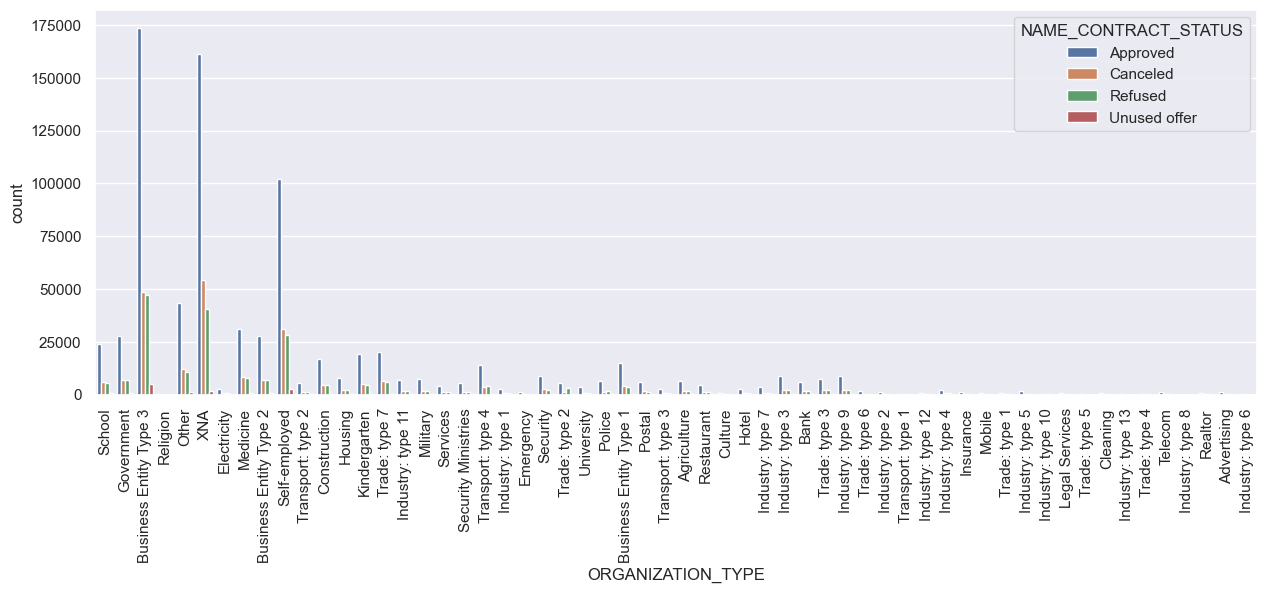

In [175]:
# Define the column of interest
col = 'ORGANIZATION_TYPE'
# Define the hue column for differentiation
hue = 'NAME_CONTRACT_STATUS'

# Create a count plot showing the distribution of values in 'col' column, differentiated by 'hue' column, for Target=0
sns.countplot(x=col, hue=hue, data=ptrain_0)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57],
 [Text(0, 0, 'Business Entity Type 3'),
  Text(1, 0, 'Self-employed'),
  Text(2, 0, 'Industry: type 4'),
  Text(3, 0, 'Trade: type 2'),
  Text(4, 0, 'Construction'),
  Text(5, 0, 'Other'),
  Text(6, 0, 'Trade: type 3'),
  Text(7, 0, 'XNA'),
  Text(8, 0, 'Industry: type 3'),
  Text(9, 0, 'Industry: type 9'),
  Text(10, 0, 'Security'),
  Text(11, 0, 'Medicine'),
  Text(12, 0, 'Agriculture'),
  Text(13, 0, 'School'),
  Text(14, 0, 'Transport: type 2'),
  Text(15, 0, 'Trade: type 7'),
  Text(16, 0, 'Government'),
  Text(17, 0, 'Transport: type 4'),
  Text(18, 0, 'Industry: type 1'),
  Text(19, 0, 'Advertising'),
  Text(20, 0, 'Electricity'),
  Text(21, 0, '

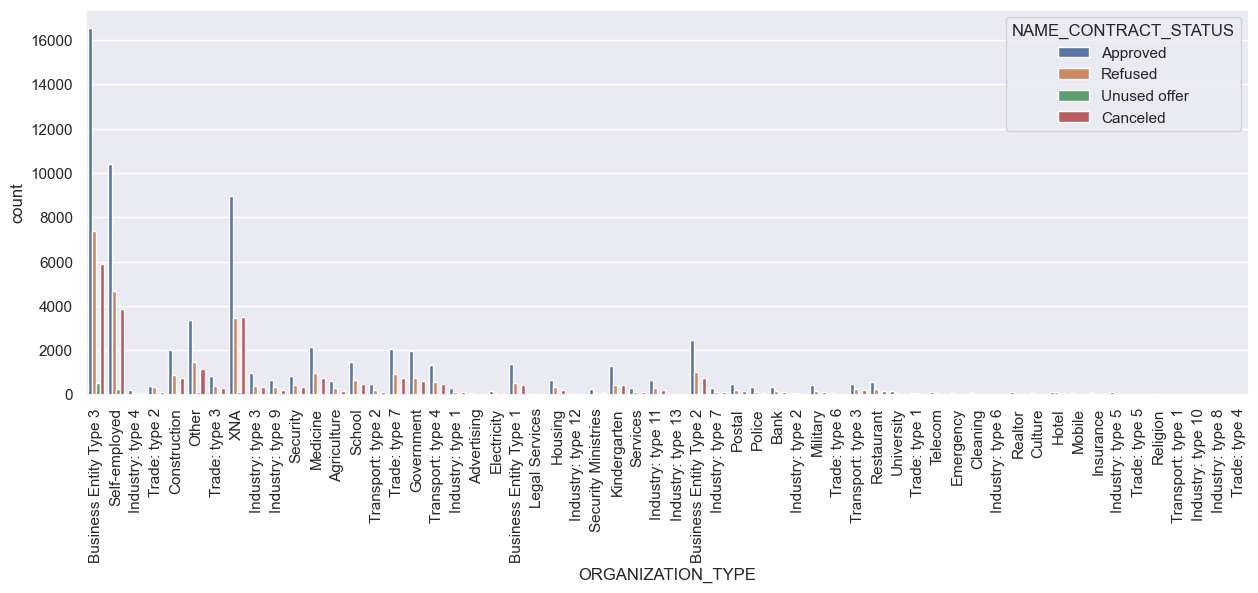

In [176]:
# Define the column of interest
col = 'ORGANIZATION_TYPE'
# Define the hue column for differentiation
hue = 'NAME_CONTRACT_STATUS'

# Create a count plot showing the distribution of values in 'col' column, differentiated by 'hue' column, for Target=1
sns.countplot(x=col, hue=hue, data=ptrain_1)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)


## Conclusion

- Through the series of tasks performed in this notebook, we gained valuable insights into the loan applicant dataset.
- We successfully identified missing values, explored the distribution of variables, analyzed outliers, and examined relationships between different attributes.
- This analysis provides a foundational understanding of the dataset and its potential implications for loan management and risk assessment.
- Moving forward, these insights can guide decision-making processes, such as developing predictive models or refining loan approval criteria, ultimately enhancing the effectiveness of lending practices and minimizing default risks.
- Cleaned data offers a solid base for building credit risk models.
- Identified features will guide predictive modeling.